# Initial setup

In [1]:
pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.5 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from tabulate import tabulate
from matplotlib import pyplot as plt
import os
import imageio
from seaborn.matrix import heatmap
from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import umap.umap_ as umap
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import IncrementalPCA
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from sklearn.preprocessing import normalize
from sklearn.cluster import AgglomerativeClustering


In [3]:
# from google.colab import files
# files.upload()

{}

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Uploading the data and choosing features

In [5]:
countries_csv = pd.read_csv('/content/drive/MyDrive/eksploracja_dane/final/kraje.csv', on_bad_lines = "skip")
countries = countries_csv.iloc[:,0].values
countries_list = countries_csv.iloc[:,1].values

In [6]:
len(countries)

75

In [7]:
characteristics = ['women in parlament growth','death rate',
                   'fertility rate dynamic', 'gdp growth',
                    'immunization','import','inflation','labor_women','labor growth',
                    'military_expenditure',
                    'urban_population growth', 'unemployment',
                   'urban_population_percentage', 'Population in agglomerations dynamic'
                ]
char_files = ['Proportion-of-seats-held-by-women-in-national-parliaments-growth.csv','Death-rate-crude-per-1000-people.csv',
              'Fertility-rate-total-births-per-woman-dynamic.csv', 'GDP-growth-annual-.csv',
              'Immunization-measles-of-children-ages-12-23-months.csv','Imports-of-goods-and-services-of-GDP.csv', 'Inflation-GDP-deflator-annual-.csv',
               'Labor-force-female-of-total-labor-force.csv','Labor-force-growth.csv','Military-expenditure-of-GDP.csv',
               'Urban-population-of-total-population-dynamic.csv', 'Unemployment-total-of-total-labor-force-modeled-ILO-estimate.csv' ,
               'Urban-population-growth-annual-.csv', 'Population-in-urban-agglomerations-of-more-than-1-million-of-total-population-dynamic.csv'
              ] # got rid of export, mortality children and population growth

##Creating own datasets:

In [8]:
def create_own_dataset(base_dataset, new_name):
  df = pd.read_csv(base_dataset, index_col = 0)
  column_names = [str(col) for col in list(df.columns)[3:] if int(col) > 1995 and int(col) < 2021]
  df_t = df.loc[:, column_names]
  df_t = df_t.pct_change(axis='columns')
  df_t.insert(0,'Country Code', df['Country Code'], True)
  df_t.to_csv(new_name)


## CSV cleaning function:

In [9]:
def clean_csv(file):
  df = pd.read_csv(file, index_col = 0)
  column_names = [str(col) for col in list(df.columns)[3:] if int(col) > 1999 and int(col) < 2020]
  column_names = ['Country Code'] + column_names
  df = df.loc[:, column_names]
  df = df.dropna(thresh=17)
  # df = df.fillna(df.interpolate, axis=1)
  df.replace([np.inf, -np.inf], np.nan, inplace=True)
  df =df.interpolate()
  #ploting the data for each variable
  world = df.iloc[:,1: ] #delete the country code column

  # plt.figure(figsize=(15, 5))
  # plt.style.use('seaborn')
  # plt.plot(world.columns, world.loc['World'].values, '-o' ) #x_values are years, y_values values for World row
  # plt.xlabel('Years',fontsize=15)
  # plt.ylabel('Value',fontsize=15)
  # plt.title(f'{file}',fontsize=20)
  # plt.show()

  return df[df['Country Code'].isin(countries_list)].iloc[:,1: ] #ten iloc tu na potrzeby mojego full dataframe

## Reading the data for each year:

In [10]:
all_data_frames=[]
for year in range(2001,2020):
  df = pd.DataFrame(index=countries) #save only data from 2001 to 2020

  for idx in range(len(char_files)):
    df[characteristics[idx]] = clean_csv("/content/drive/MyDrive/eksploracja_dane/final/"+char_files[idx])[str(year)] #append each variable for each year as a column in new df

  all_data_frames.append(df)

len(all_data_frames)



<ipython-input-9-ef22c5eb2408>:9: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df =df.interpolate()
<ipython-input-9-ef22c5eb2408>:9: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df =df.interpolate()
<ipython-input-9-ef22c5eb2408>:9: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df =df.interpolate()
<ipython-input-9-ef22c5eb2408>:9: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df =df.interpolate()
<ipython-input-9-ef22c5eb2408>:9: FutureWarning: DataFrame.interpolate with object dtype is 

19

In [11]:
all_data_frames[0]

women in parlament growth  death rate  fertility rate dynamic  \
Angola                          0.000000   17.597000                6.601000   
Armenia                         0.000000    8.612000                1.634000   
Australia                       0.000000    6.600000                1.739000   
Austria                         0.000000    9.300000                1.330000   
Azerbaijan                     -0.126344    5.600000                1.800000   
...                                  ...         ...                     ...   
Uganda                          0.386513   15.757000                6.823000   
Ukraine                         0.000000   15.300000                1.078000   
Uruguay                         0.000000    9.404000                2.211000   
United States                   0.051724    8.500000                2.030500   
World                           0.013396    8.513022                2.666349   

               gdp growth  immunization     import   inflation  labor_women  \
Angola           4.205999     60.000000  74.946851  106.352125    49.189641   
Armenia          9.600000     93.000000  45.718412    4.027969    46.299348   
Australia        2.038301     92.000000  22.098148    4.617100    43.962995   
Austria          1.267168     79.000000  42.919109    1.947105    44.035926   
Azerbaijan       9.900000     68.000000  37.316578    2.515010    49.128412   
...                   ...           ...        ...         ...          ...   
Uganda           5.183661     59.000000  23.811894    4.534476    47.239874   
Ukraine          8.800000     99.000000  49.277140   10.200916    50.502456   
Uruguay         -3.844130     94.000000  19.504853    4.826618    43.728913   
United States    0.998341     91.000000  13.263870    2.193425    45.819073   
World            2.000111     73.130803  23.024740    3.860901    39.649692   

               labor growth  military_expenditure  urban_population growth  \
Angola             0.033833              4.524354                51.274000   
Armenia            0.007264              3.127249                64.385000   
Australia          0.019041              1.870094                84.100000   
Austria           -0.001518              0.908240                59.934000   
Azerbaijan        -0.004371              2.312063                51.587000   
...                     ...                   ...                      ...   
Uganda             0.030252              1.683245                15.201000   
Ukraine           -0.007720              1.886871                67.183000   
Uruguay            0.026998              2.502578                92.303000   
United States      0.008306              3.123810                79.234000   
World              0.014446              2.241664                47.137532   

               unemployment  urban_population_percentage  \
Angola             4.004000                     5.643395   
Armenia           10.912000                    -1.053497   
Australia          6.740000                     1.187961   
Austria            4.010000                    -0.081625   
Azerbaijan        10.910000                     1.165156   
...                     ...                          ...   
Uganda             3.274000                     5.844161   
Ukraine           11.060000                    -0.994344   
Uruguay           15.050000                     0.471020   
United States      4.730000                     1.213380   
World              5.856253                     2.270416   

               Population in agglomerations dynamic  
Angola                                    17.773852  
Armenia                                   36.227229  
Australia                                 58.242188  
Austria                                   19.308921  
Azerbaijan                                22.414254  
...                                             ...  
Uganda                                     5.310232  
Ukraine        

# Data exploration

In [12]:
# counting naan values
nany = { i: 0 for i in countries}

for df in all_data_frames:
  for i in range(0,len(countries)):
    x = df.iloc[[i]].isna().sum().sum()
    o = df.index[i]
    nany[o] += x

set(nany.values())

{0}

## Statistic description od datasets and boxplots for each variable in each dataset


╒═══════╤═════════════════════════════╤══════════════╤══════════════════════════╤══════════════╤════════════════╤════════════════════════╤═══════════════════════════╤═══════════════════════════════╕
│       │   women in parlament growth │   death rate │   fertility rate dynamic │   gdp growth │   labor growth │   military_expenditure │   urban_population growth │   urban_population_percentage │
╞═══════╪═════════════════════════════╪══════════════╪══════════════════════════╪══════════════╪════════════════╪════════════════════════╪═══════════════════════════╪═══════════════════════════════╡
│ count │                  74         │     74       │                 74       │     74       │    74          │               74       │                   74      │                     74        │
├───────┼─────────────────────────────┼──────────────┼──────────────────────────┼──────────────┼────────────────┼────────────────────────┼───────────────────────────┼───────────────────────────────┤
│ mea

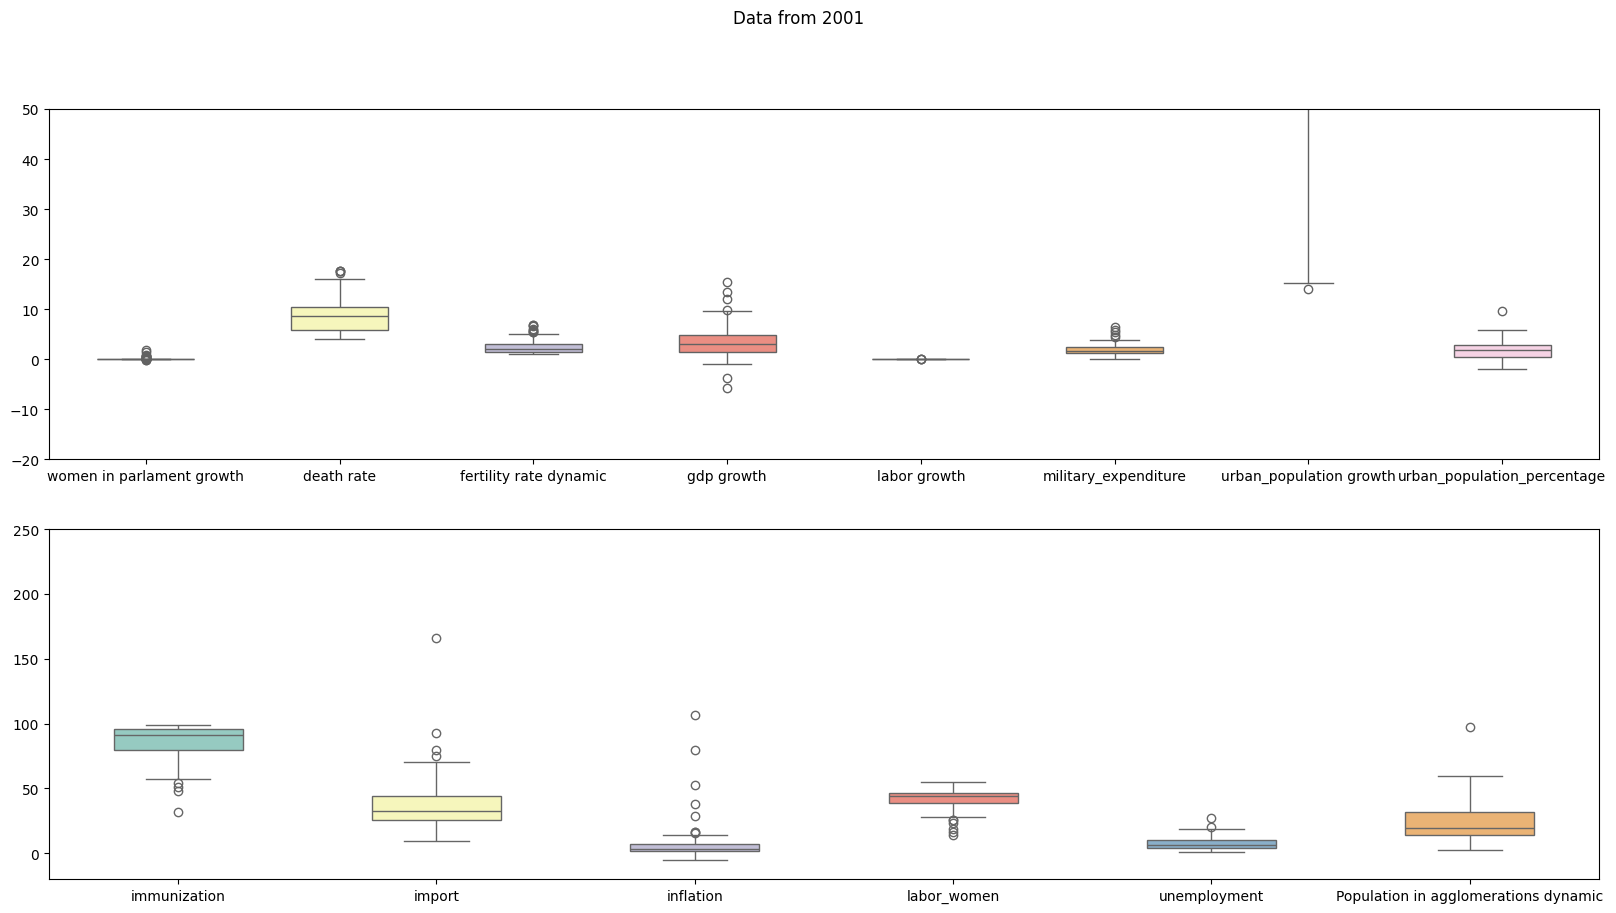

╒═══════╤═════════════════════════════╤══════════════╤══════════════════════════╤══════════════╤════════════════╤════════════════════════╤═══════════════════════════╤═══════════════════════════════╕
│       │   women in parlament growth │   death rate │   fertility rate dynamic │   gdp growth │   labor growth │   military_expenditure │   urban_population growth │   urban_population_percentage │
╞═══════╪═════════════════════════════╪══════════════╪══════════════════════════╪══════════════╪════════════════╪════════════════════════╪═══════════════════════════╪═══════════════════════════════╡
│ count │                  74         │     74       │                 74       │     74       │    74          │               74       │                   74      │                     74        │
├───────┼─────────────────────────────┼──────────────┼──────────────────────────┼──────────────┼────────────────┼────────────────────────┼───────────────────────────┼───────────────────────────────┤
│ mea

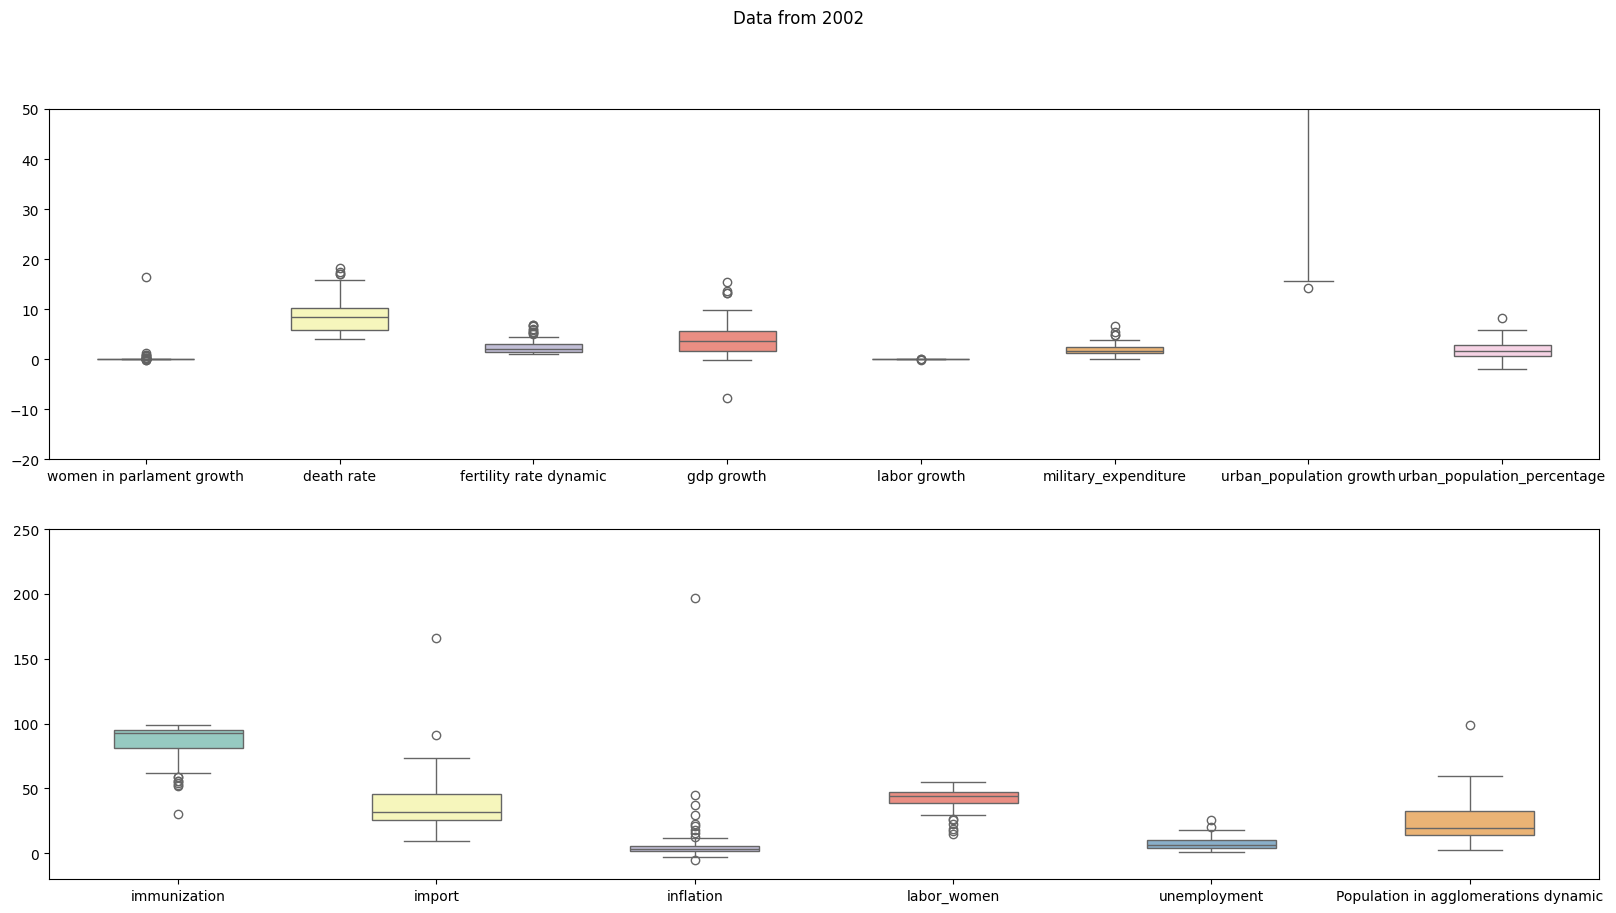

╒═══════╤═════════════════════════════╤══════════════╤══════════════════════════╤══════════════╤════════════════╤════════════════════════╤═══════════════════════════╤═══════════════════════════════╕
│       │   women in parlament growth │   death rate │   fertility rate dynamic │   gdp growth │   labor growth │   military_expenditure │   urban_population growth │   urban_population_percentage │
╞═══════╪═════════════════════════════╪══════════════╪══════════════════════════╪══════════════╪════════════════╪════════════════════════╪═══════════════════════════╪═══════════════════════════════╡
│ count │                  74         │     74       │                 74       │    74        │    74          │               74       │                   74      │                     74        │
├───────┼─────────────────────────────┼──────────────┼──────────────────────────┼──────────────┼────────────────┼────────────────────────┼───────────────────────────┼───────────────────────────────┤
│ mea

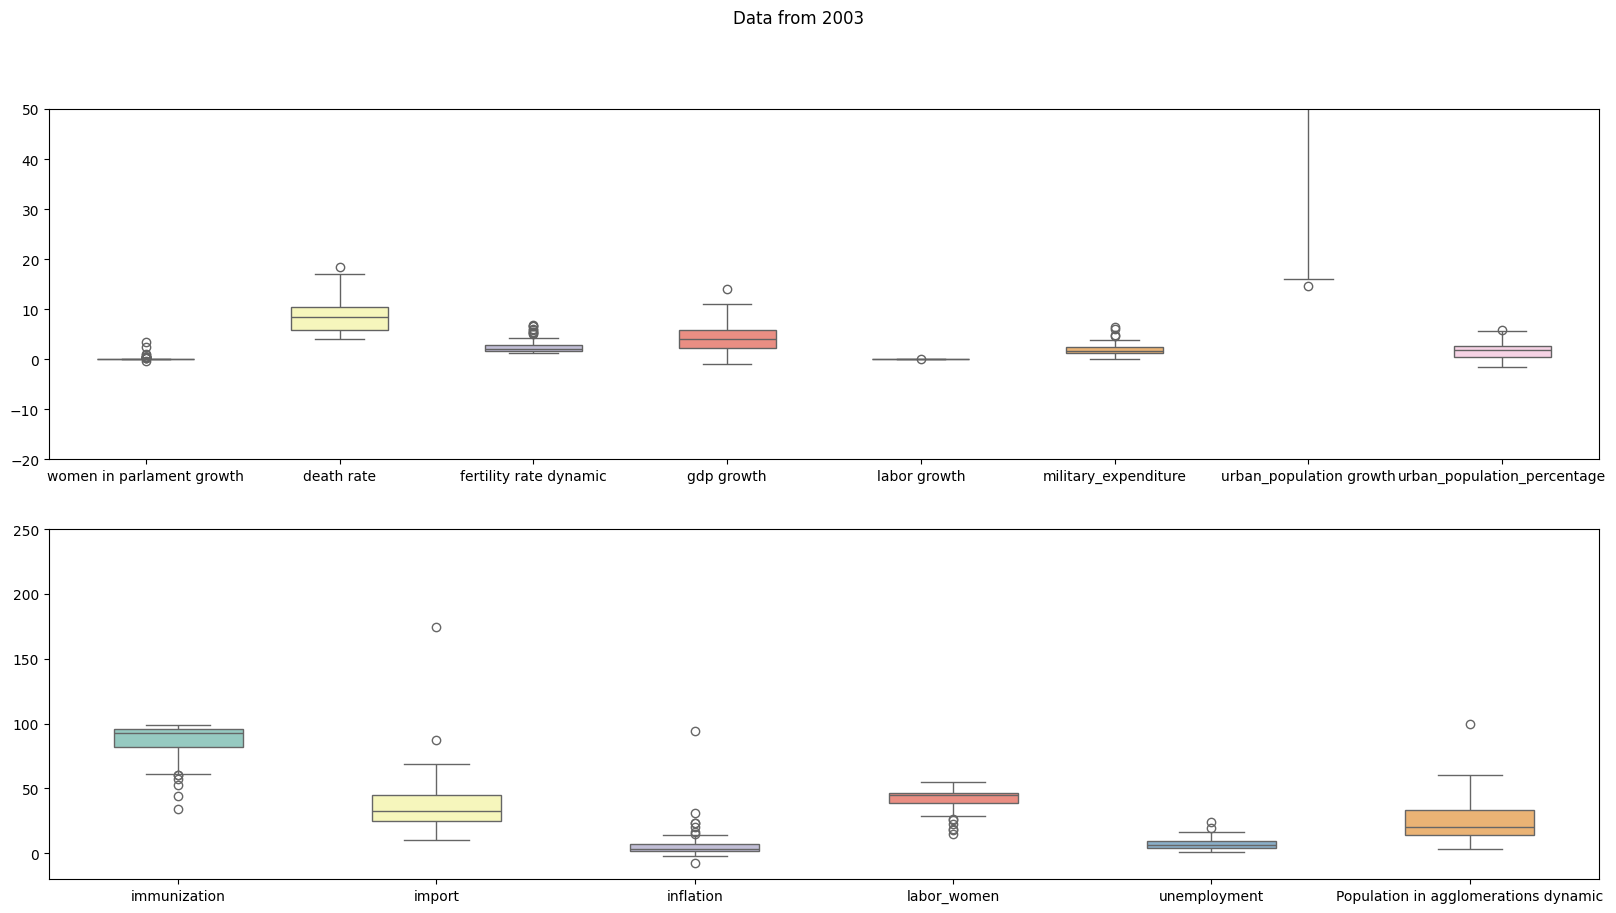

╒═══════╤═════════════════════════════╤══════════════╤══════════════════════════╤══════════════╤════════════════╤════════════════════════╤═══════════════════════════╤═══════════════════════════════╕
│       │   women in parlament growth │   death rate │   fertility rate dynamic │   gdp growth │   labor growth │   military_expenditure │   urban_population growth │   urban_population_percentage │
╞═══════╪═════════════════════════════╪══════════════╪══════════════════════════╪══════════════╪════════════════╪════════════════════════╪═══════════════════════════╪═══════════════════════════════╡
│ count │                 74          │     74       │                 74       │    74        │    74          │               74       │                   74      │                     74        │
├───────┼─────────────────────────────┼──────────────┼──────────────────────────┼──────────────┼────────────────┼────────────────────────┼───────────────────────────┼───────────────────────────────┤
│ mea

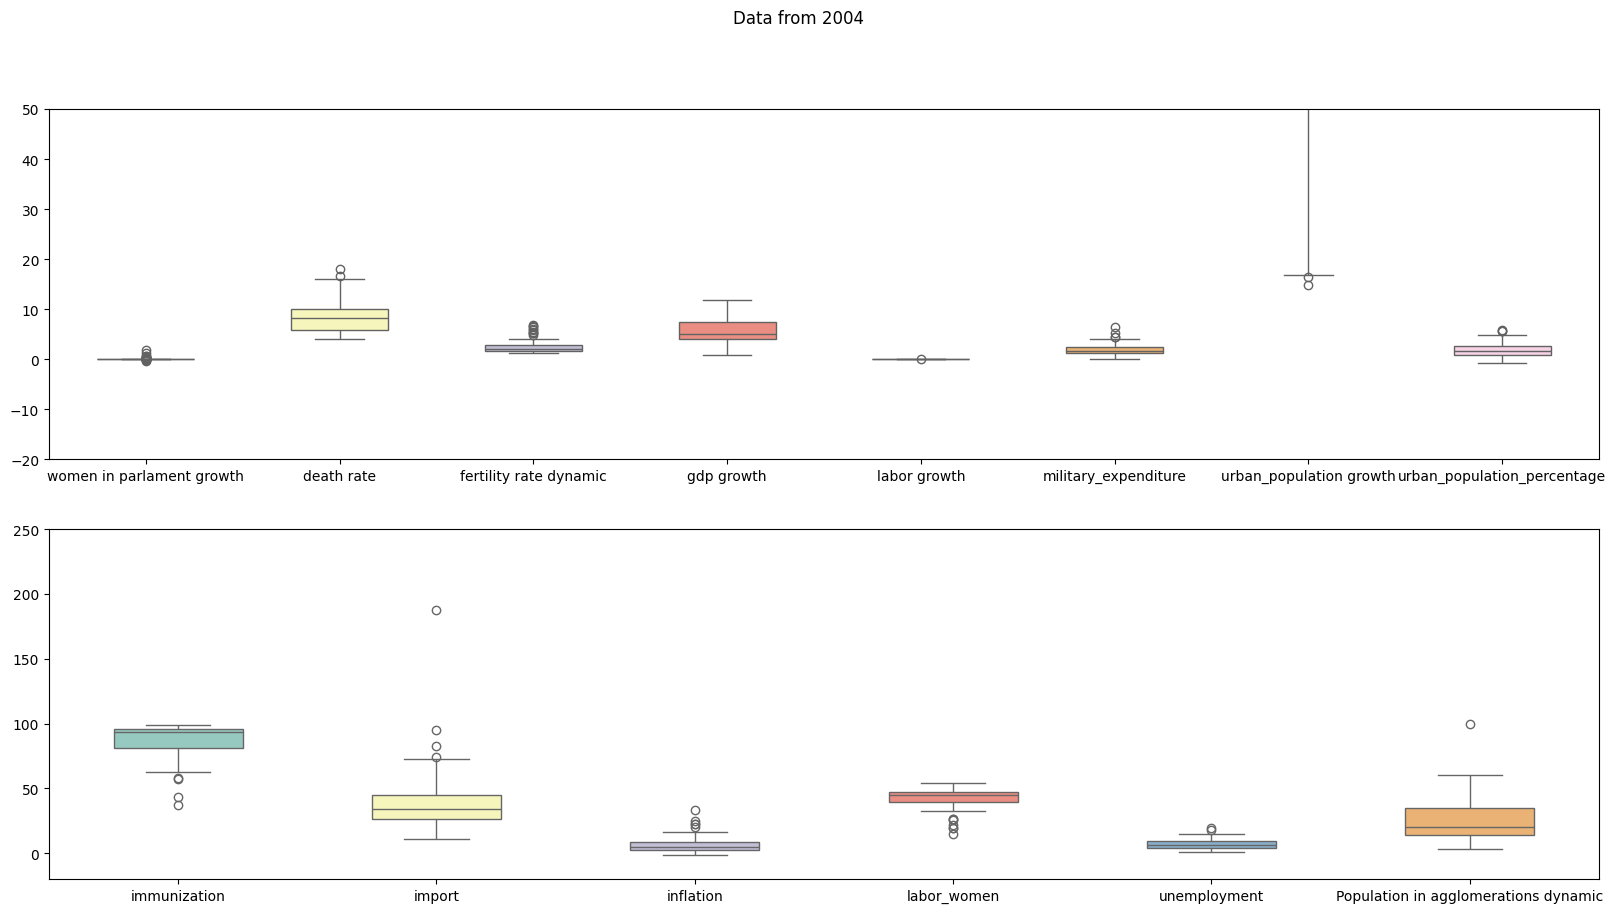

╒═══════╤═════════════════════════════╤══════════════╤══════════════════════════╤══════════════╤════════════════╤════════════════════════╤═══════════════════════════╤═══════════════════════════════╕
│       │   women in parlament growth │   death rate │   fertility rate dynamic │   gdp growth │   labor growth │   military_expenditure │   urban_population growth │   urban_population_percentage │
╞═══════╪═════════════════════════════╪══════════════╪══════════════════════════╪══════════════╪════════════════╪════════════════════════╪═══════════════════════════╪═══════════════════════════════╡
│ count │                  74         │     74       │                 74       │    74        │    74          │               74       │                   74      │                     74        │
├───────┼─────────────────────────────┼──────────────┼──────────────────────────┼──────────────┼────────────────┼────────────────────────┼───────────────────────────┼───────────────────────────────┤
│ mea

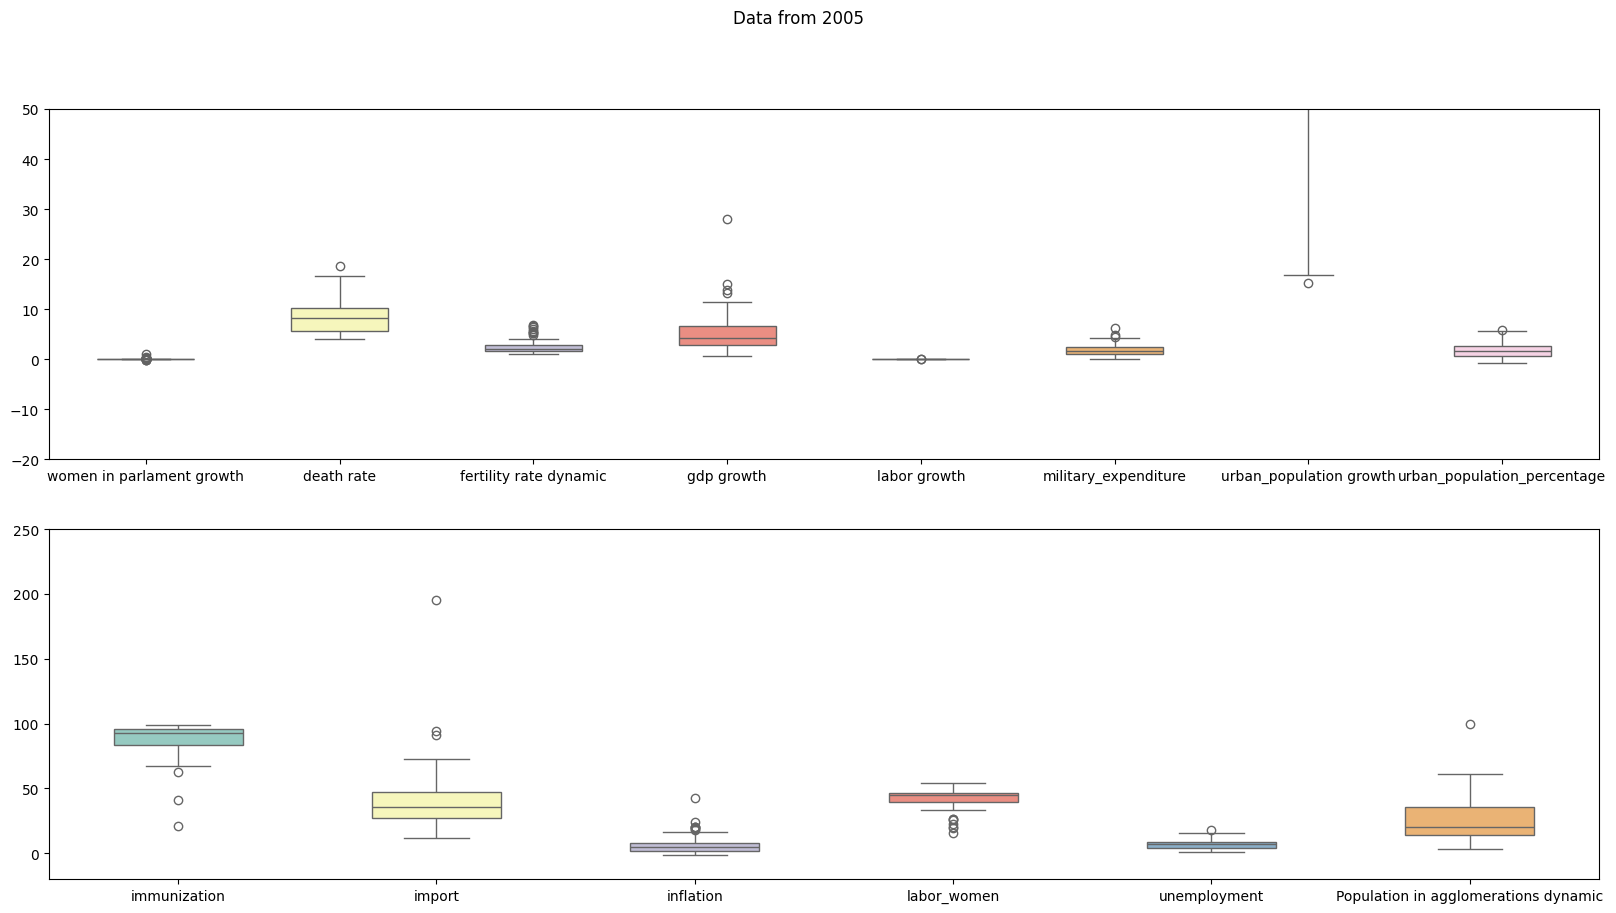

╒═══════╤═════════════════════════════╤══════════════╤══════════════════════════╤══════════════╤════════════════╤════════════════════════╤═══════════════════════════╤═══════════════════════════════╕
│       │   women in parlament growth │   death rate │   fertility rate dynamic │   gdp growth │   labor growth │   military_expenditure │   urban_population growth │   urban_population_percentage │
╞═══════╪═════════════════════════════╪══════════════╪══════════════════════════╪══════════════╪════════════════╪════════════════════════╪═══════════════════════════╪═══════════════════════════════╡
│ count │                   74        │     74       │                 74       │     74       │    74          │               74       │                   74      │                     74        │
├───────┼─────────────────────────────┼──────────────┼──────────────────────────┼──────────────┼────────────────┼────────────────────────┼───────────────────────────┼───────────────────────────────┤
│ mea

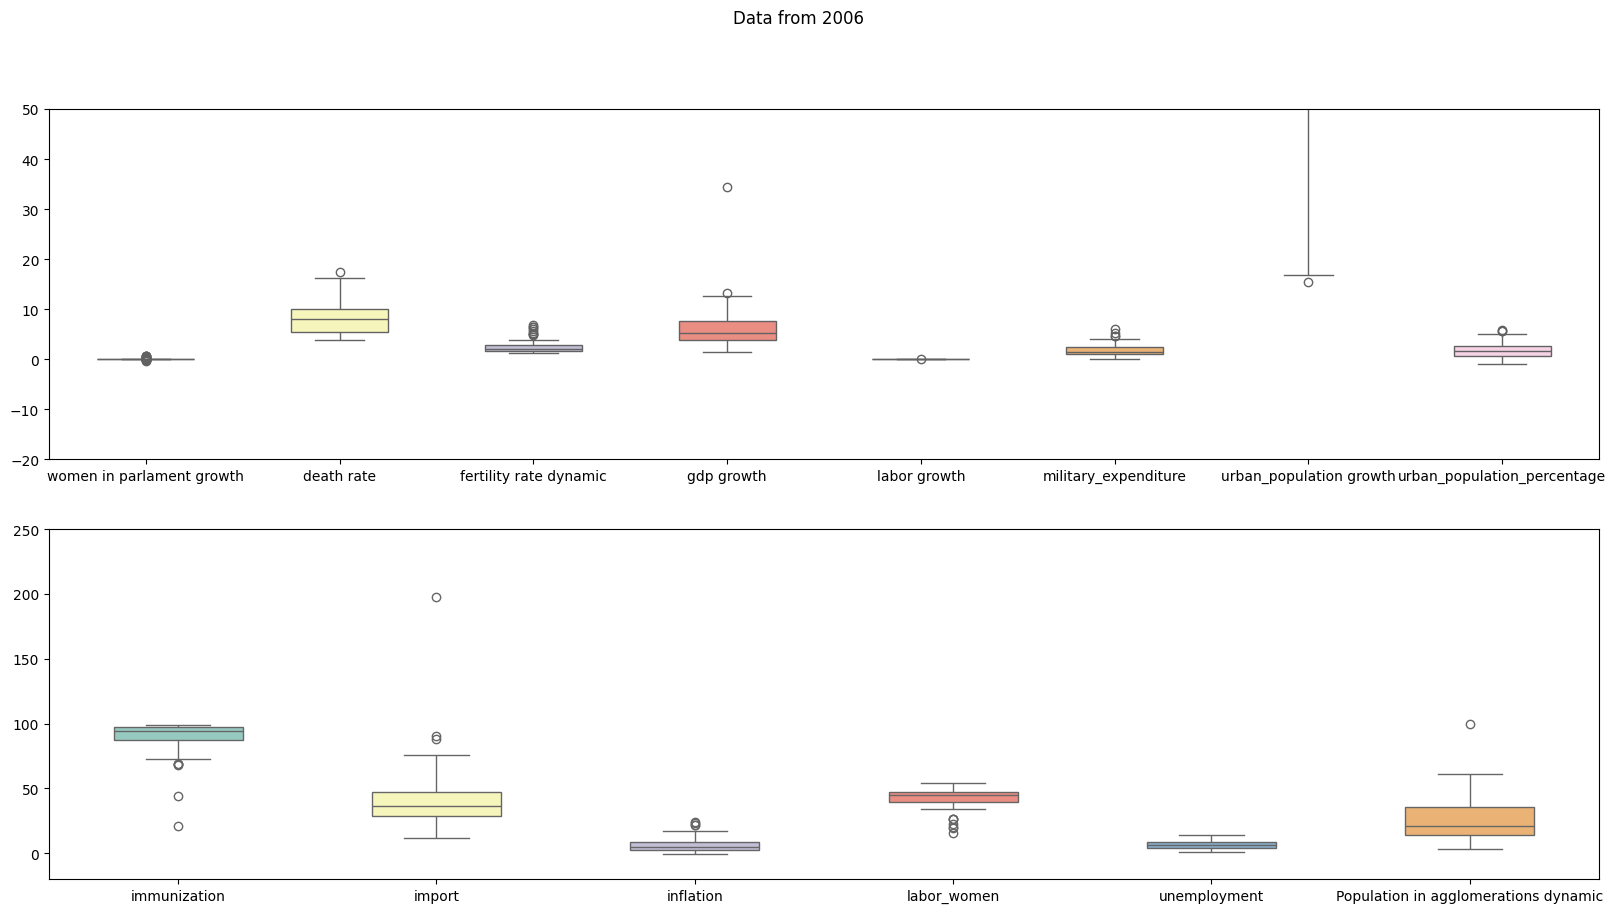

╒═══════╤═════════════════════════════╤══════════════╤══════════════════════════╤══════════════╤════════════════╤════════════════════════╤═══════════════════════════╤═══════════════════════════════╕
│       │   women in parlament growth │   death rate │   fertility rate dynamic │   gdp growth │   labor growth │   military_expenditure │   urban_population growth │   urban_population_percentage │
╞═══════╪═════════════════════════════╪══════════════╪══════════════════════════╪══════════════╪════════════════╪════════════════════════╪═══════════════════════════╪═══════════════════════════════╡
│ count │                   74        │     74       │                 74       │    74        │    74          │               74       │                   74      │                     74        │
├───────┼─────────────────────────────┼──────────────┼──────────────────────────┼──────────────┼────────────────┼────────────────────────┼───────────────────────────┼───────────────────────────────┤
│ mea

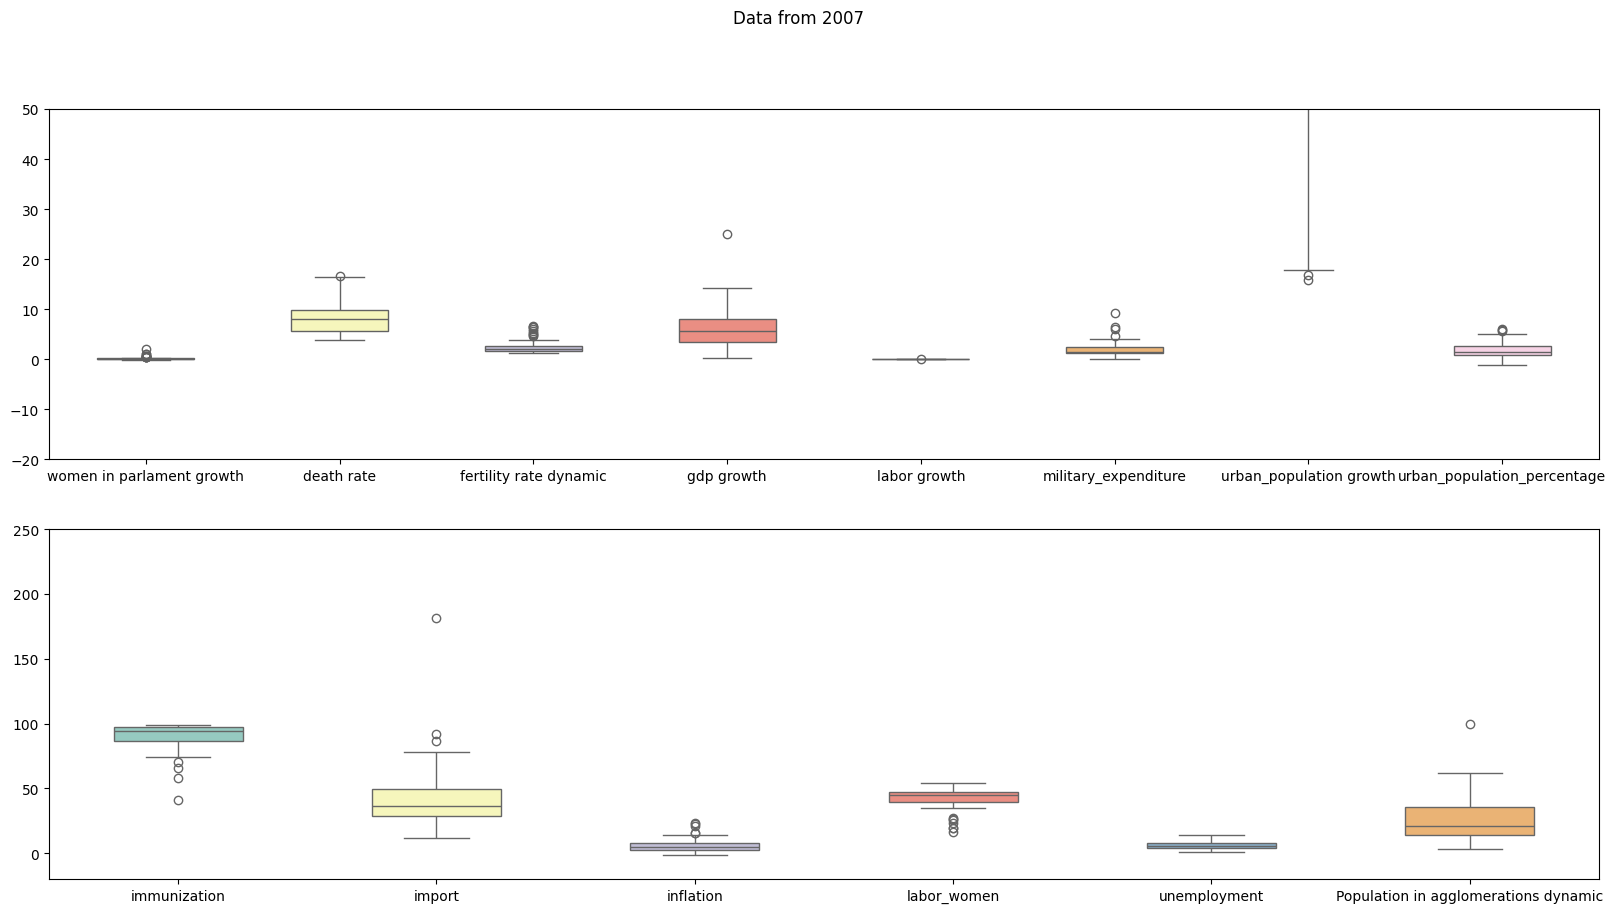

╒═══════╤═════════════════════════════╤══════════════╤══════════════════════════╤══════════════╤════════════════╤════════════════════════╤═══════════════════════════╤═══════════════════════════════╕
│       │   women in parlament growth │   death rate │   fertility rate dynamic │   gdp growth │   labor growth │   military_expenditure │   urban_population growth │   urban_population_percentage │
╞═══════╪═════════════════════════════╪══════════════╪══════════════════════════╪══════════════╪════════════════╪════════════════════════╪═══════════════════════════╪═══════════════════════════════╡
│ count │                  74         │     74       │                 74       │    74        │    74          │               74       │                   74      │                     74        │
├───────┼─────────────────────────────┼──────────────┼──────────────────────────┼──────────────┼────────────────┼────────────────────────┼───────────────────────────┼───────────────────────────────┤
│ mea

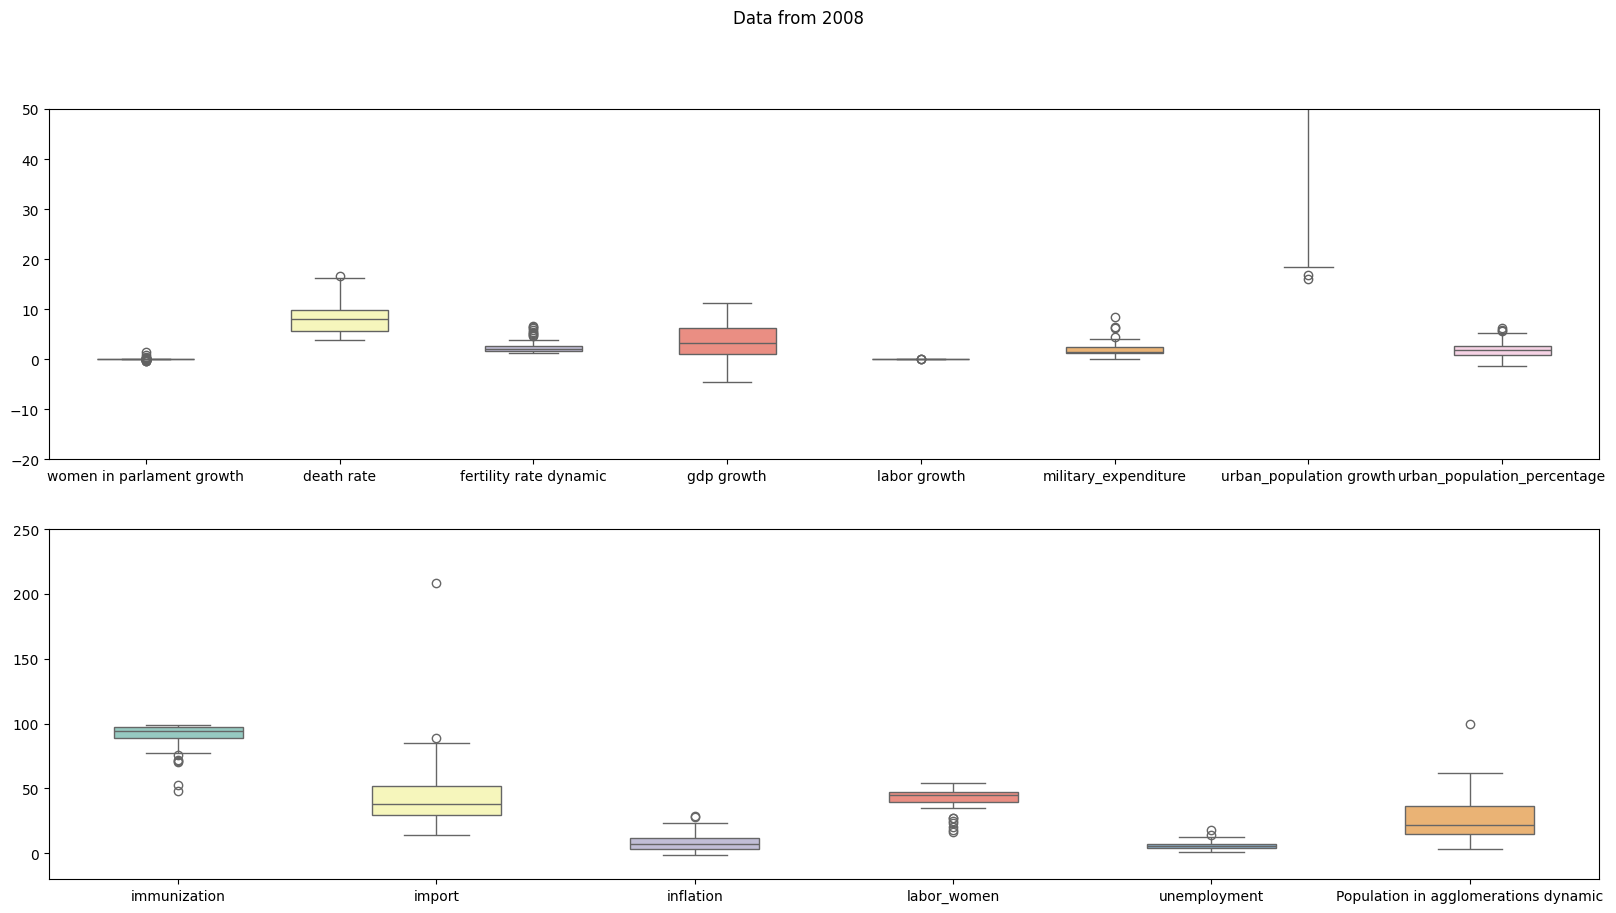

╒═══════╤═════════════════════════════╤══════════════╤══════════════════════════╤══════════════╤════════════════╤════════════════════════╤═══════════════════════════╤═══════════════════════════════╕
│       │   women in parlament growth │   death rate │   fertility rate dynamic │   gdp growth │   labor growth │   military_expenditure │   urban_population growth │   urban_population_percentage │
╞═══════╪═════════════════════════════╪══════════════╪══════════════════════════╪══════════════╪════════════════╪════════════════════════╪═══════════════════════════╪═══════════════════════════════╡
│ count │                  74         │     74       │                 74       │    74        │    74          │               74       │                   74      │                     74        │
├───────┼─────────────────────────────┼──────────────┼──────────────────────────┼──────────────┼────────────────┼────────────────────────┼───────────────────────────┼───────────────────────────────┤
│ mea

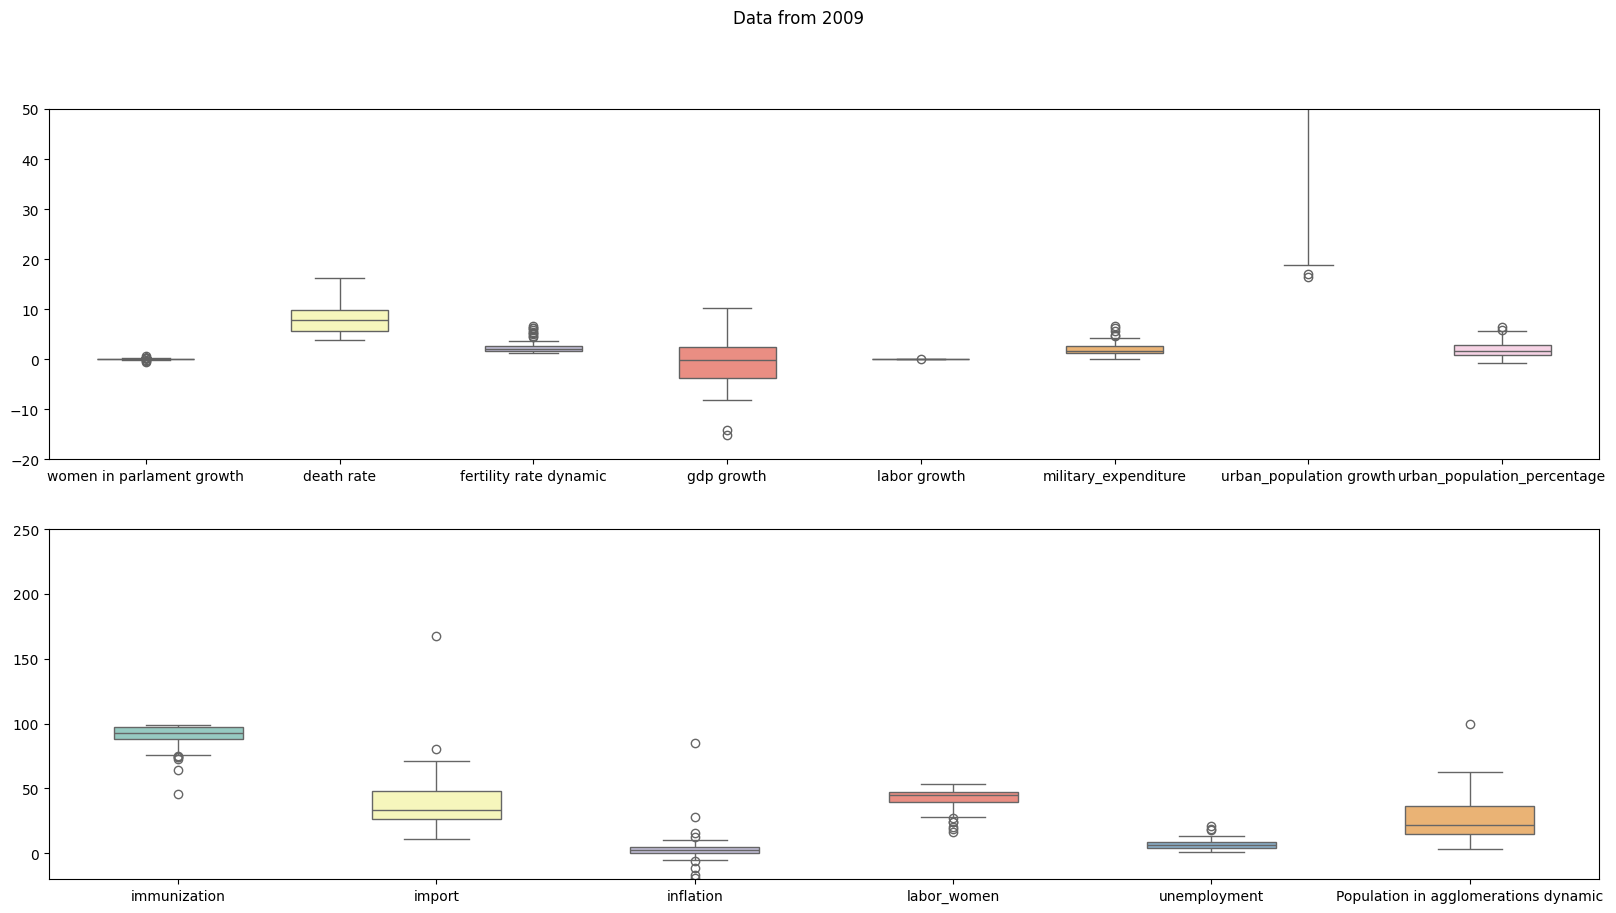

╒═══════╤═════════════════════════════╤══════════════╤══════════════════════════╤══════════════╤════════════════╤════════════════════════╤═══════════════════════════╤═══════════════════════════════╕
│       │   women in parlament growth │   death rate │   fertility rate dynamic │   gdp growth │   labor growth │   military_expenditure │   urban_population growth │   urban_population_percentage │
╞═══════╪═════════════════════════════╪══════════════╪══════════════════════════╪══════════════╪════════════════╪════════════════════════╪═══════════════════════════╪═══════════════════════════════╡
│ count │                  74         │     74       │                 74       │     74       │   74           │               74       │                   74      │                     74        │
├───────┼─────────────────────────────┼──────────────┼──────────────────────────┼──────────────┼────────────────┼────────────────────────┼───────────────────────────┼───────────────────────────────┤
│ mea

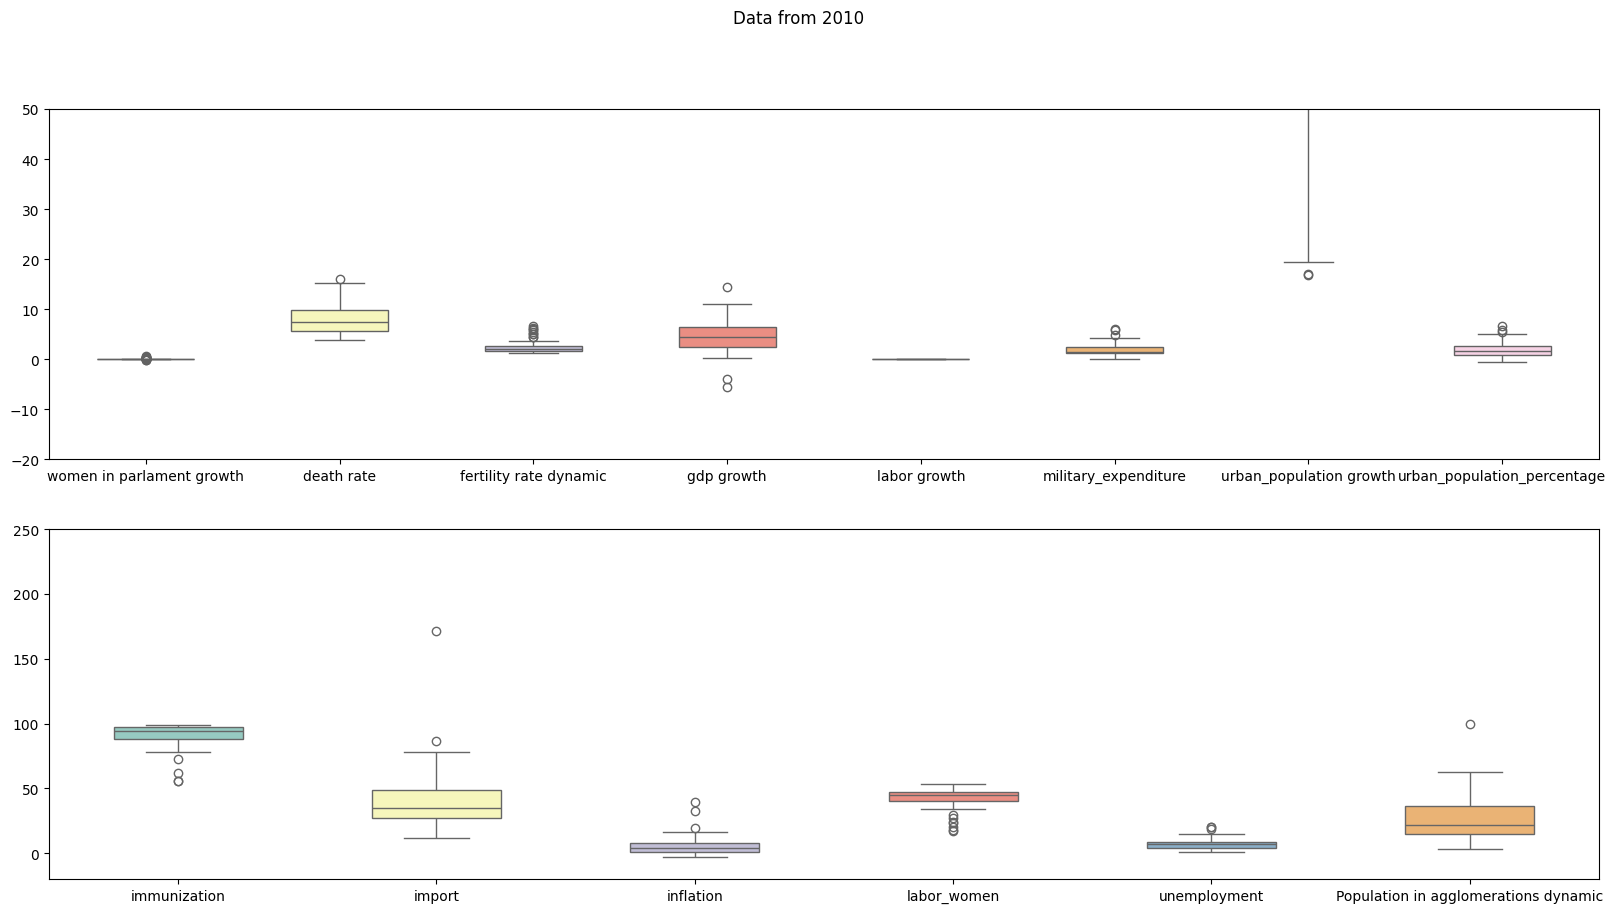

╒═══════╤═════════════════════════════╤══════════════╤══════════════════════════╤══════════════╤════════════════╤════════════════════════╤═══════════════════════════╤═══════════════════════════════╕
│       │   women in parlament growth │   death rate │   fertility rate dynamic │   gdp growth │   labor growth │   military_expenditure │   urban_population growth │   urban_population_percentage │
╞═══════╪═════════════════════════════╪══════════════╪══════════════════════════╪══════════════╪════════════════╪════════════════════════╪═══════════════════════════╪═══════════════════════════════╡
│ count │                  74         │     74       │                 74       │     74       │   74           │               74       │                   74      │                     74        │
├───────┼─────────────────────────────┼──────────────┼──────────────────────────┼──────────────┼────────────────┼────────────────────────┼───────────────────────────┼───────────────────────────────┤
│ mea

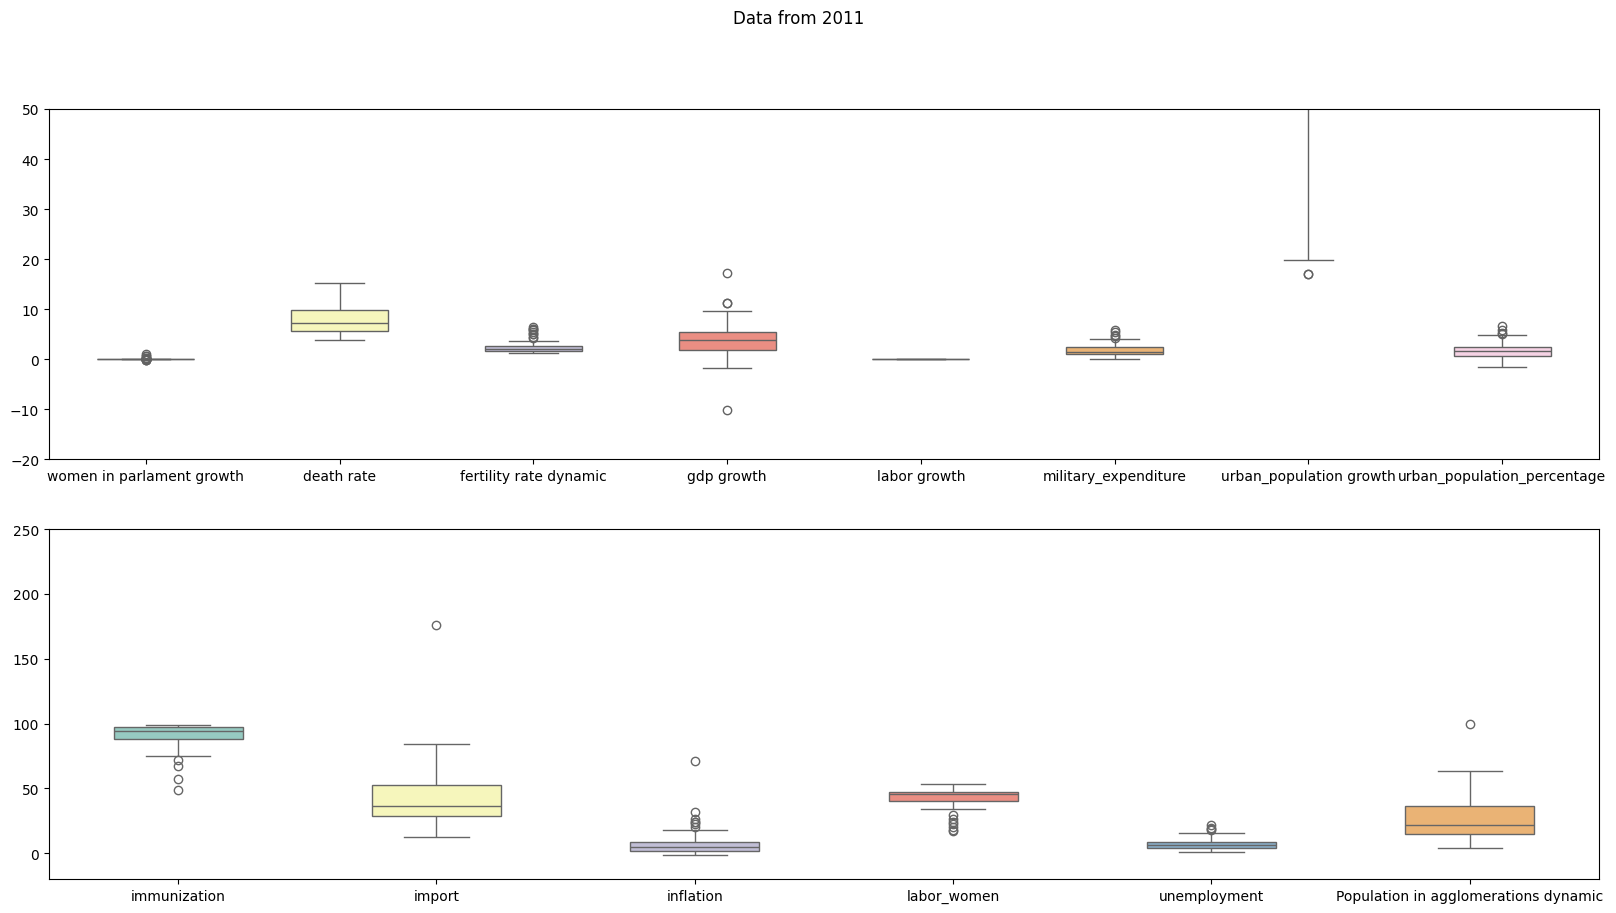

╒═══════╤═════════════════════════════╤══════════════╤══════════════════════════╤══════════════╤════════════════╤════════════════════════╤═══════════════════════════╤═══════════════════════════════╕
│       │   women in parlament growth │   death rate │   fertility rate dynamic │   gdp growth │   labor growth │   military_expenditure │   urban_population growth │   urban_population_percentage │
╞═══════╪═════════════════════════════╪══════════════╪══════════════════════════╪══════════════╪════════════════╪════════════════════════╪═══════════════════════════╪═══════════════════════════════╡
│ count │                   74        │     74       │                 74       │    74        │    74          │               74       │                   74      │                     74        │
├───────┼─────────────────────────────┼──────────────┼──────────────────────────┼──────────────┼────────────────┼────────────────────────┼───────────────────────────┼───────────────────────────────┤
│ mea

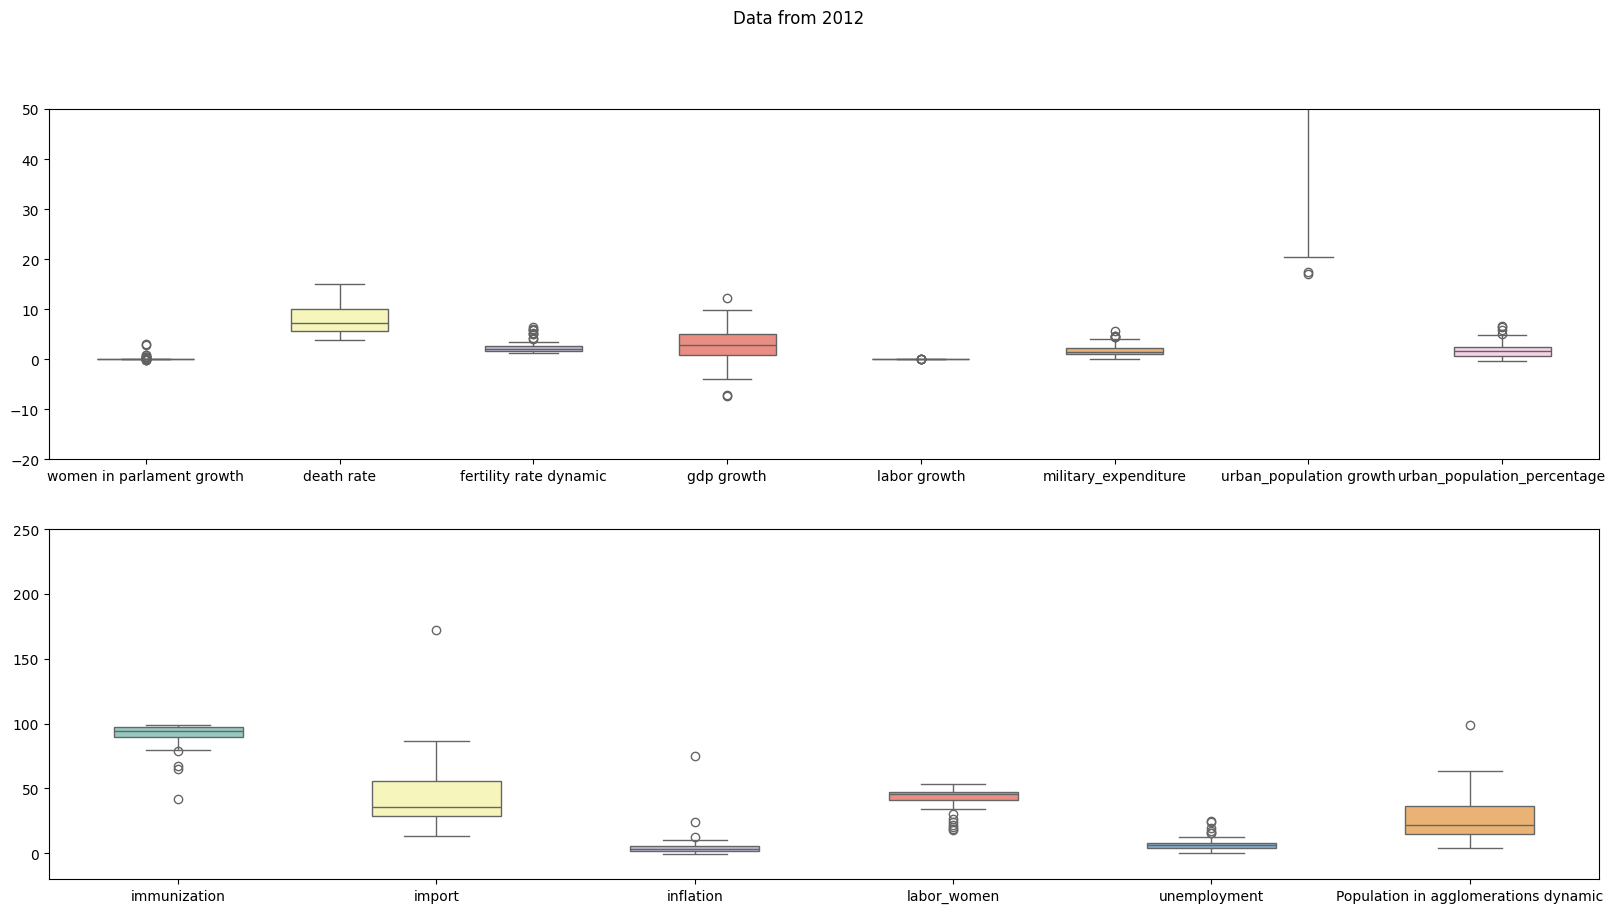

╒═══════╤═════════════════════════════╤══════════════╤══════════════════════════╤══════════════╤════════════════╤════════════════════════╤═══════════════════════════╤═══════════════════════════════╕
│       │   women in parlament growth │   death rate │   fertility rate dynamic │   gdp growth │   labor growth │   military_expenditure │   urban_population growth │   urban_population_percentage │
╞═══════╪═════════════════════════════╪══════════════╪══════════════════════════╪══════════════╪════════════════╪════════════════════════╪═══════════════════════════╪═══════════════════════════════╡
│ count │                  74         │     74       │                 74       │     74       │    74          │               74       │                   74      │                     74        │
├───────┼─────────────────────────────┼──────────────┼──────────────────────────┼──────────────┼────────────────┼────────────────────────┼───────────────────────────┼───────────────────────────────┤
│ mea

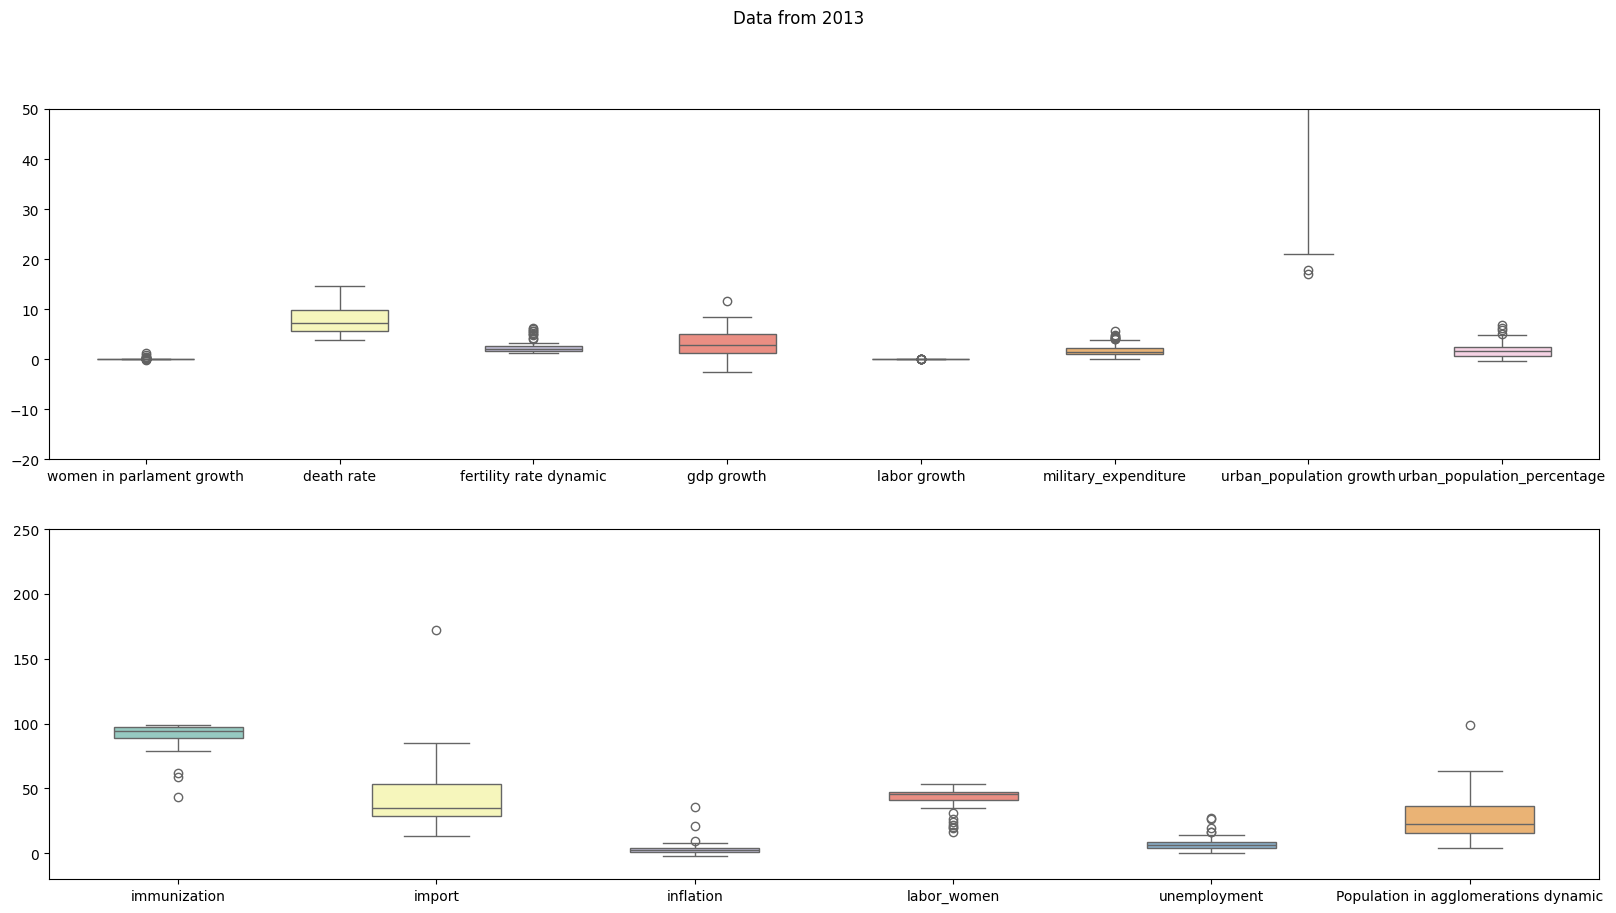

╒═══════╤═════════════════════════════╤══════════════╤══════════════════════════╤══════════════╤════════════════╤════════════════════════╤═══════════════════════════╤═══════════════════════════════╕
│       │   women in parlament growth │   death rate │   fertility rate dynamic │   gdp growth │   labor growth │   military_expenditure │   urban_population growth │   urban_population_percentage │
╞═══════╪═════════════════════════════╪══════════════╪══════════════════════════╪══════════════╪════════════════╪════════════════════════╪═══════════════════════════╪═══════════════════════════════╡
│ count │                  74         │     74       │                 74       │     74       │    74          │               74       │                   74      │                     74        │
├───────┼─────────────────────────────┼──────────────┼──────────────────────────┼──────────────┼────────────────┼────────────────────────┼───────────────────────────┼───────────────────────────────┤
│ mea

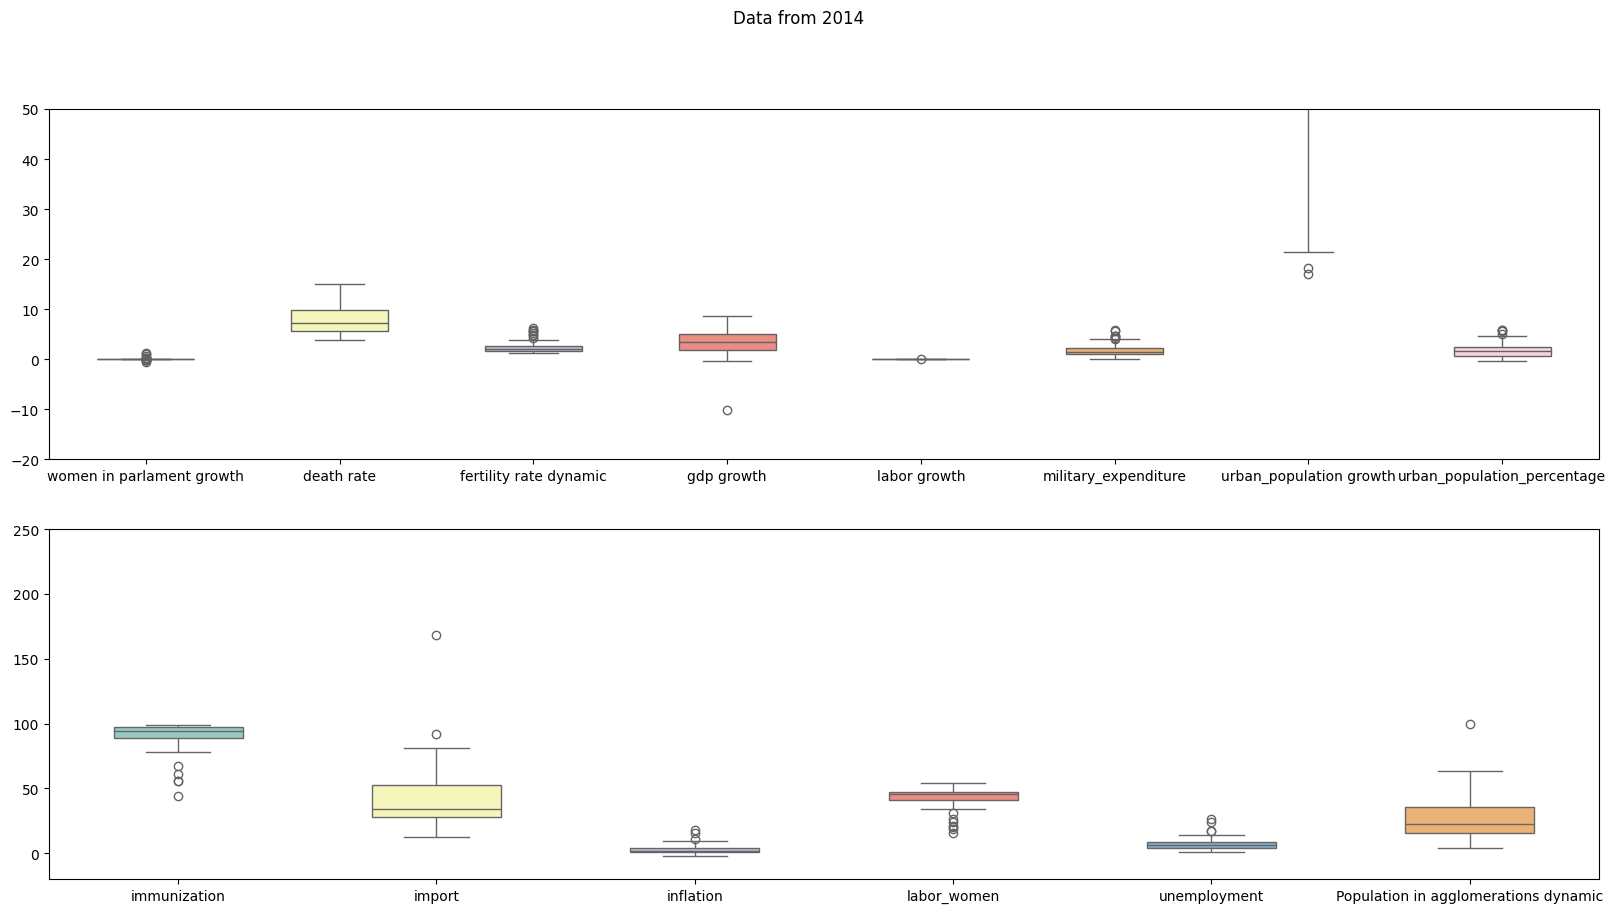

╒═══════╤═════════════════════════════╤══════════════╤══════════════════════════╤══════════════╤════════════════╤════════════════════════╤═══════════════════════════╤═══════════════════════════════╕
│       │   women in parlament growth │   death rate │   fertility rate dynamic │   gdp growth │   labor growth │   military_expenditure │   urban_population growth │   urban_population_percentage │
╞═══════╪═════════════════════════════╪══════════════╪══════════════════════════╪══════════════╪════════════════╪════════════════════════╪═══════════════════════════╪═══════════════════════════════╡
│ count │                  74         │     74       │                 74       │     74       │    74          │               74       │                   74      │                     74        │
├───────┼─────────────────────────────┼──────────────┼──────────────────────────┼──────────────┼────────────────┼────────────────────────┼───────────────────────────┼───────────────────────────────┤
│ mea

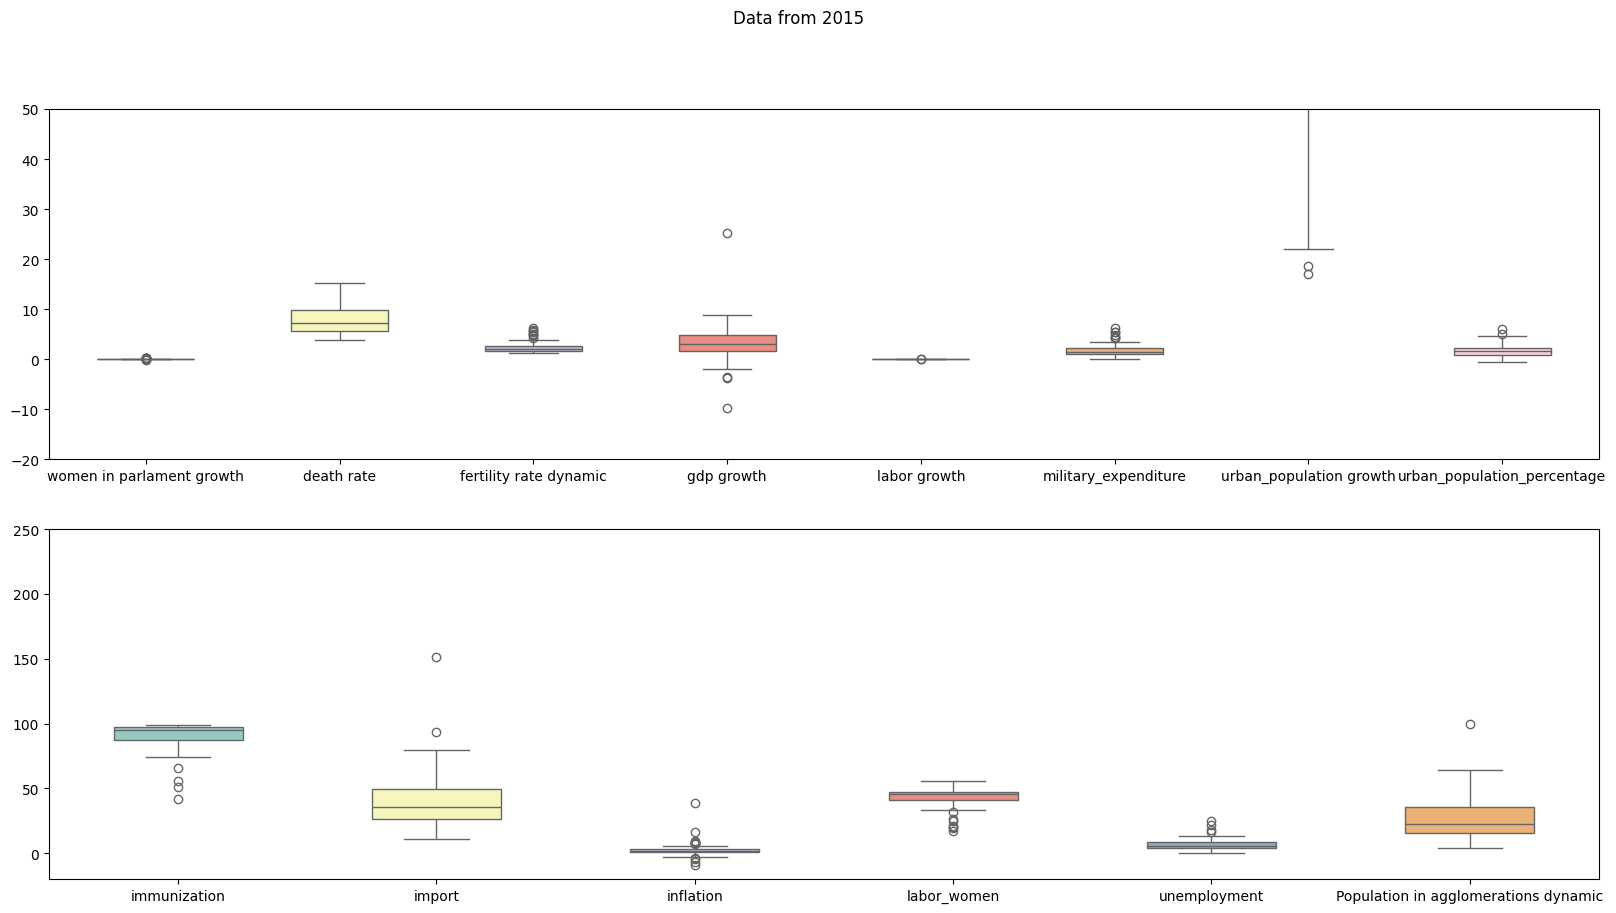

╒═══════╤═════════════════════════════╤══════════════╤══════════════════════════╤══════════════╤════════════════╤════════════════════════╤═══════════════════════════╤═══════════════════════════════╕
│       │   women in parlament growth │   death rate │   fertility rate dynamic │   gdp growth │   labor growth │   military_expenditure │   urban_population growth │   urban_population_percentage │
╞═══════╪═════════════════════════════╪══════════════╪══════════════════════════╪══════════════╪════════════════╪════════════════════════╪═══════════════════════════╪═══════════════════════════════╡
│ count │                  74         │     74       │                 74       │     74       │    74          │               74       │                   74      │                     74        │
├───────┼─────────────────────────────┼──────────────┼──────────────────────────┼──────────────┼────────────────┼────────────────────────┼───────────────────────────┼───────────────────────────────┤
│ mea

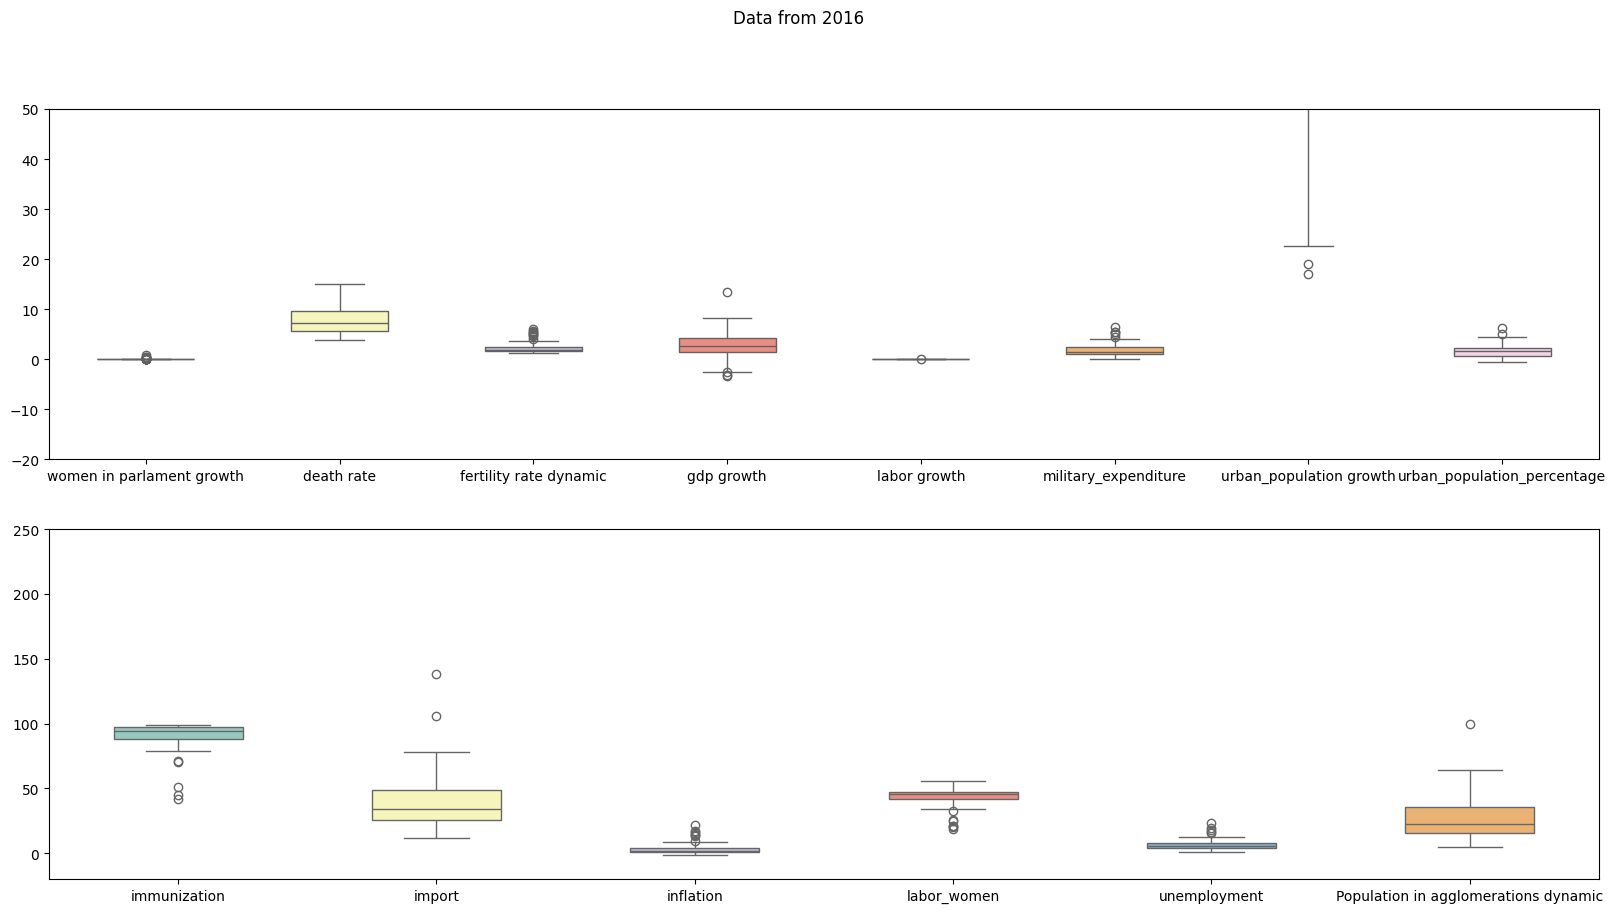

╒═══════╤═════════════════════════════╤══════════════╤══════════════════════════╤══════════════╤════════════════╤════════════════════════╤═══════════════════════════╤═══════════════════════════════╕
│       │   women in parlament growth │   death rate │   fertility rate dynamic │   gdp growth │   labor growth │   military_expenditure │   urban_population growth │   urban_population_percentage │
╞═══════╪═════════════════════════════╪══════════════╪══════════════════════════╪══════════════╪════════════════╪════════════════════════╪═══════════════════════════╪═══════════════════════════════╡
│ count │                  74         │     74       │                 74       │    74        │    74          │               74       │                   74      │                     74        │
├───────┼─────────────────────────────┼──────────────┼──────────────────────────┼──────────────┼────────────────┼────────────────────────┼───────────────────────────┼───────────────────────────────┤
│ mea

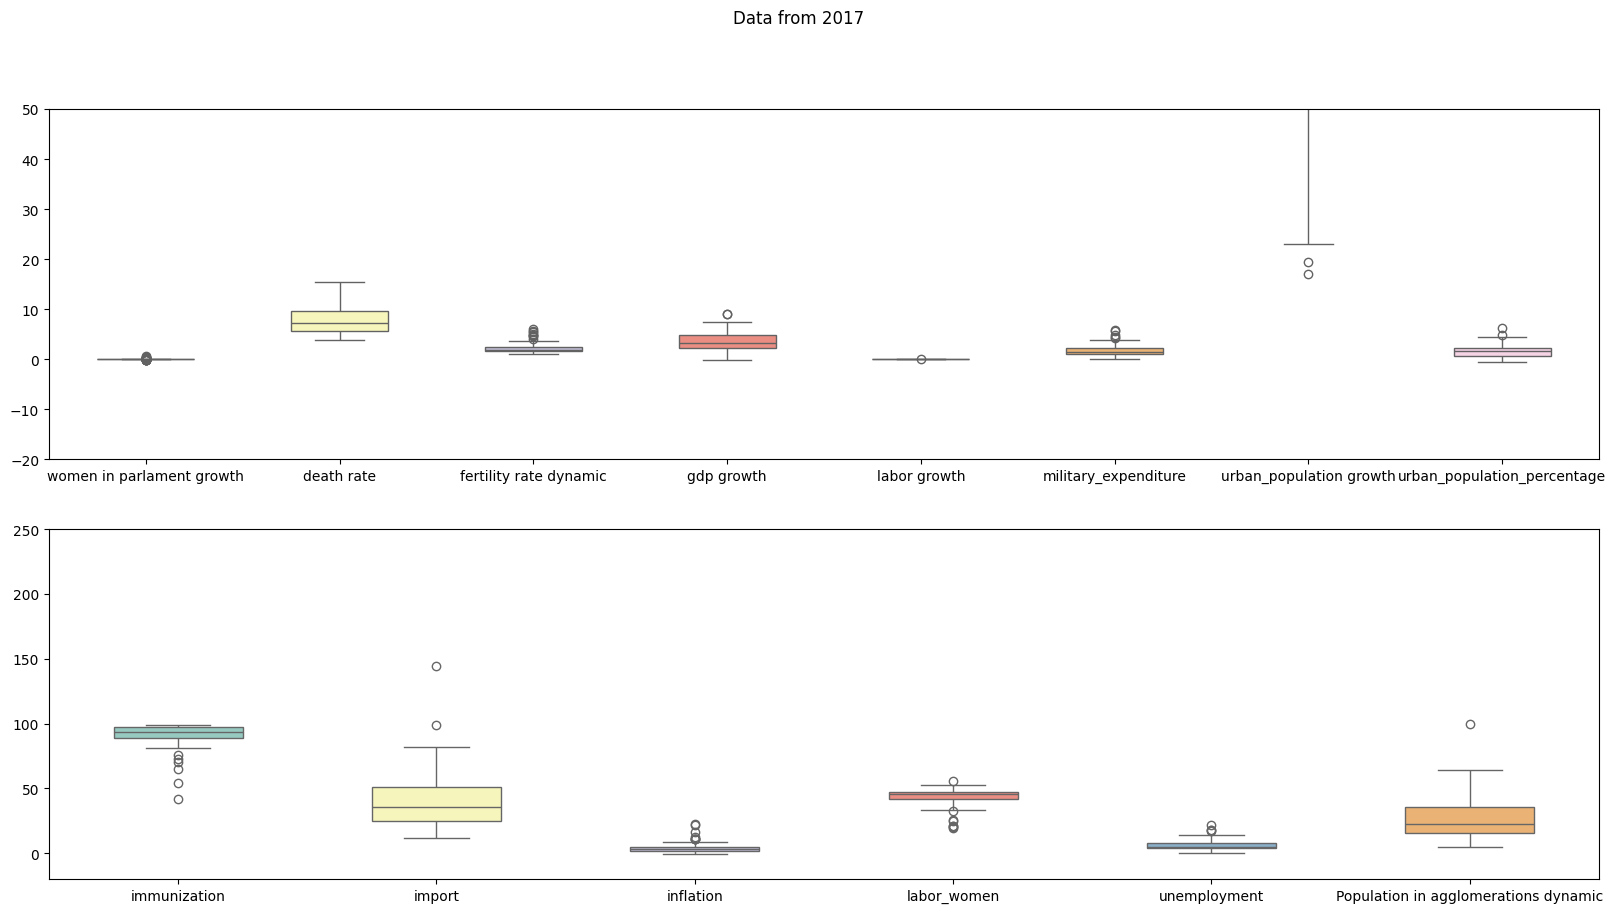

╒═══════╤═════════════════════════════╤══════════════╤══════════════════════════╤══════════════╤════════════════╤════════════════════════╤═══════════════════════════╤═══════════════════════════════╕
│       │   women in parlament growth │   death rate │   fertility rate dynamic │   gdp growth │   labor growth │   military_expenditure │   urban_population growth │   urban_population_percentage │
╞═══════╪═════════════════════════════╪══════════════╪══════════════════════════╪══════════════╪════════════════╪════════════════════════╪═══════════════════════════╪═══════════════════════════════╡
│ count │                 74          │     74       │                 74       │     74       │    74          │               74       │                   74      │                     74        │
├───────┼─────────────────────────────┼──────────────┼──────────────────────────┼──────────────┼────────────────┼────────────────────────┼───────────────────────────┼───────────────────────────────┤
│ mea

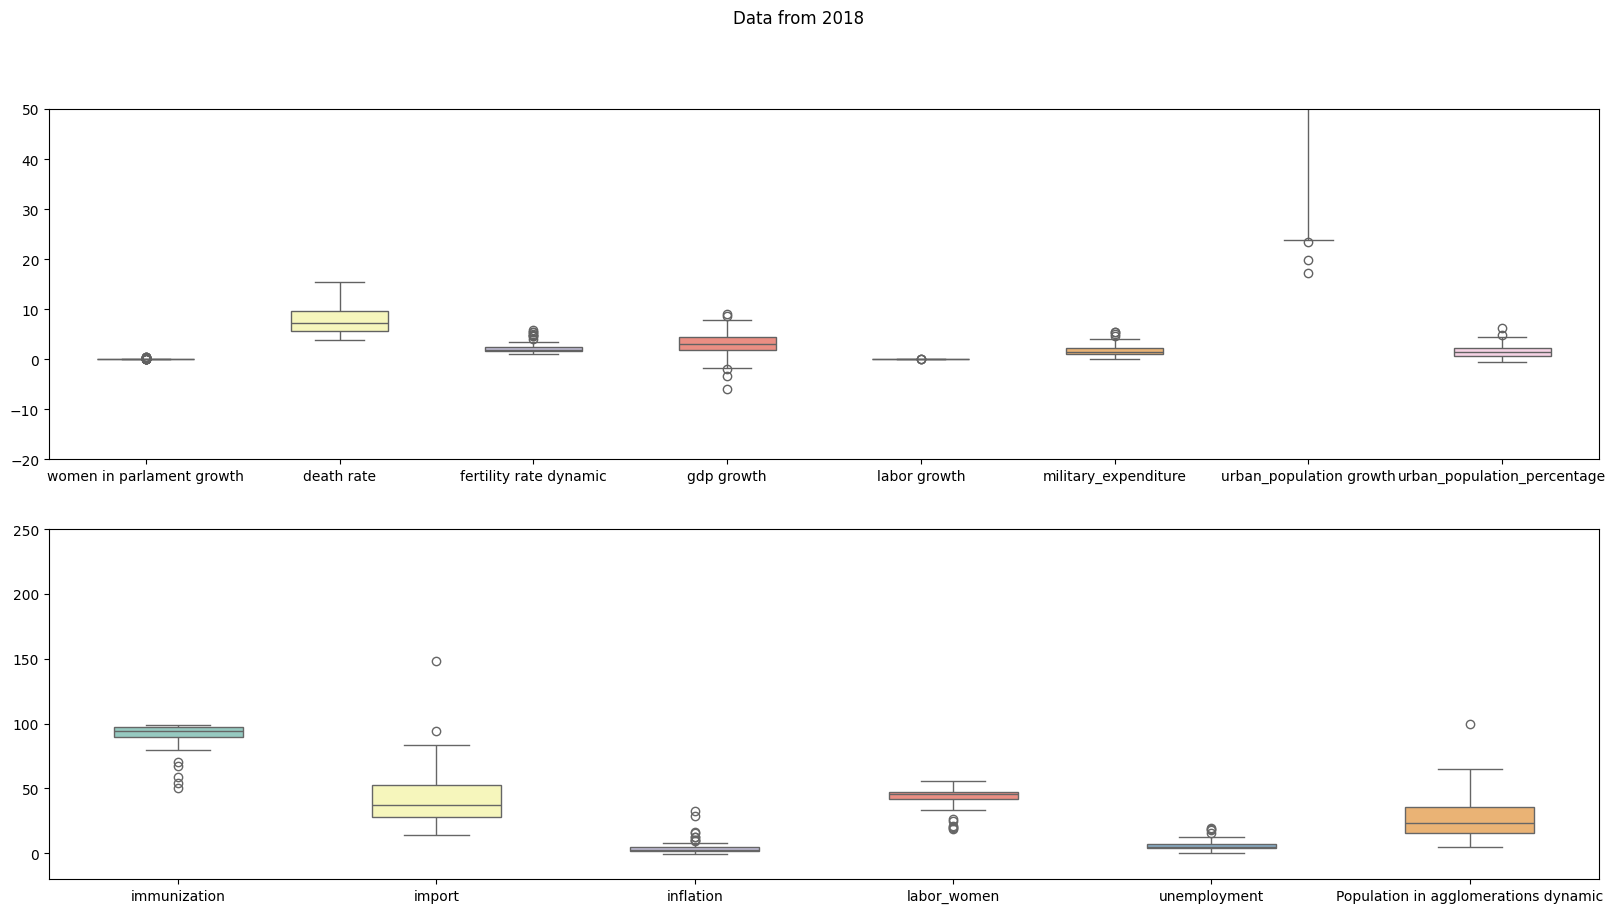

╒═══════╤═════════════════════════════╤══════════════╤══════════════════════════╤══════════════╤════════════════╤════════════════════════╤═══════════════════════════╤═══════════════════════════════╕
│       │   women in parlament growth │   death rate │   fertility rate dynamic │   gdp growth │   labor growth │   military_expenditure │   urban_population growth │   urban_population_percentage │
╞═══════╪═════════════════════════════╪══════════════╪══════════════════════════╪══════════════╪════════════════╪════════════════════════╪═══════════════════════════╪═══════════════════════════════╡
│ count │                  74         │     74       │                 74       │     74       │     74         │               74       │                   74      │                     74        │
├───────┼─────────────────────────────┼──────────────┼──────────────────────────┼──────────────┼────────────────┼────────────────────────┼───────────────────────────┼───────────────────────────────┤
│ mea

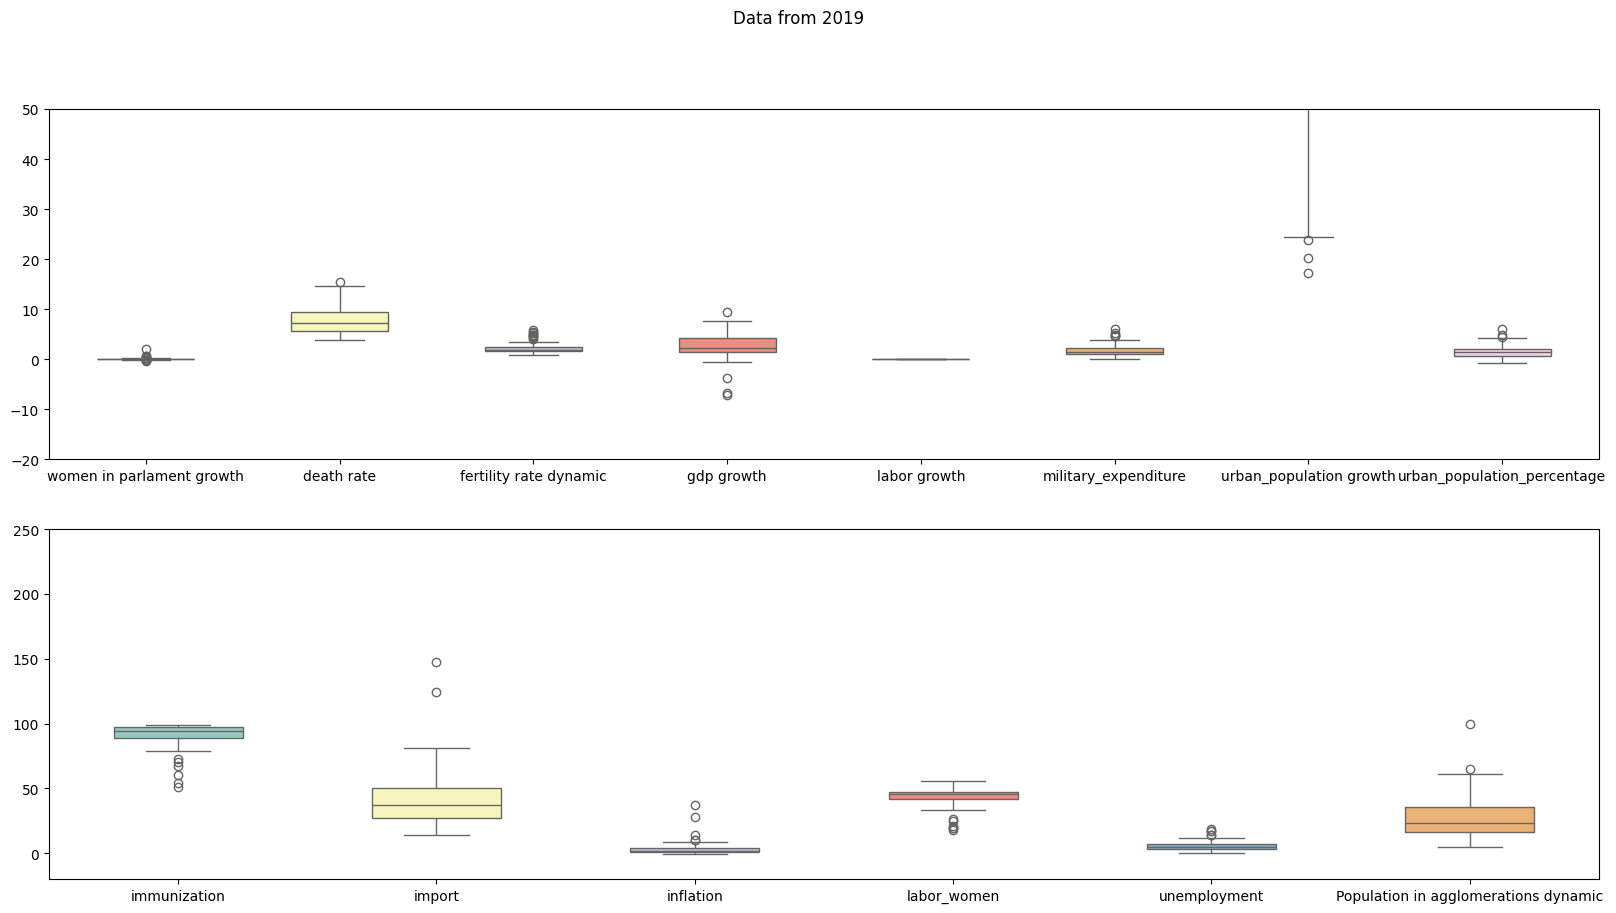

In [13]:

filenames = [] #filenames to make gif animation

for year in range(19):
  trydf = all_data_frames[year]

  # create file name and append it to a list, files will be used to do a gif animation
  filename = f'boxplot{year}.png'
  filenames.append(filename)


  #for better view the data is splitted into two datasets
  description = trydf.iloc[:-1, [0,1,2,3,8,9,10,12]].describe(include="all")
  print(tabulate(description, headers = 'keys', tablefmt = 'fancy_grid'))

  description = trydf.iloc[:-1, [4,5,6,7,11,13]].describe(include="all")
  print(tabulate(description, headers = 'keys', tablefmt = 'fancy_grid'))

  fig, axes = plt.subplots(2,1, figsize=(20, 10))
  fig.suptitle(f'Data from {year + 2001}')

  sns.boxplot(ax=axes[0], data = trydf.iloc[:-1, [0,1,2,3,8,9,10,12]], palette="Set3", width=0.5).set_ylim([-20, 50])
  sns.boxplot(ax=axes[1], data = trydf.iloc[:-1, [4,5,6,7,11,13]], palette="Set3", width=0.5).set_ylim([-20, 250])

  plt.savefig(filename) #save plot for the gif animation
  plt.show()


## Code to make the gif animation out of the boxplots


In [14]:
#the gif animation will be saved into boxplots.png file
with imageio.get_writer('boxplots.gif', mode='I', duration=0.5) as writer:  #change the duration value to slow down/speed up the animation
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

# Remove png files
for filename in set(filenames):
    os.remove(filename)

<ipython-input-14-fdad324e1ac1>:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


## Correlation Matrix:

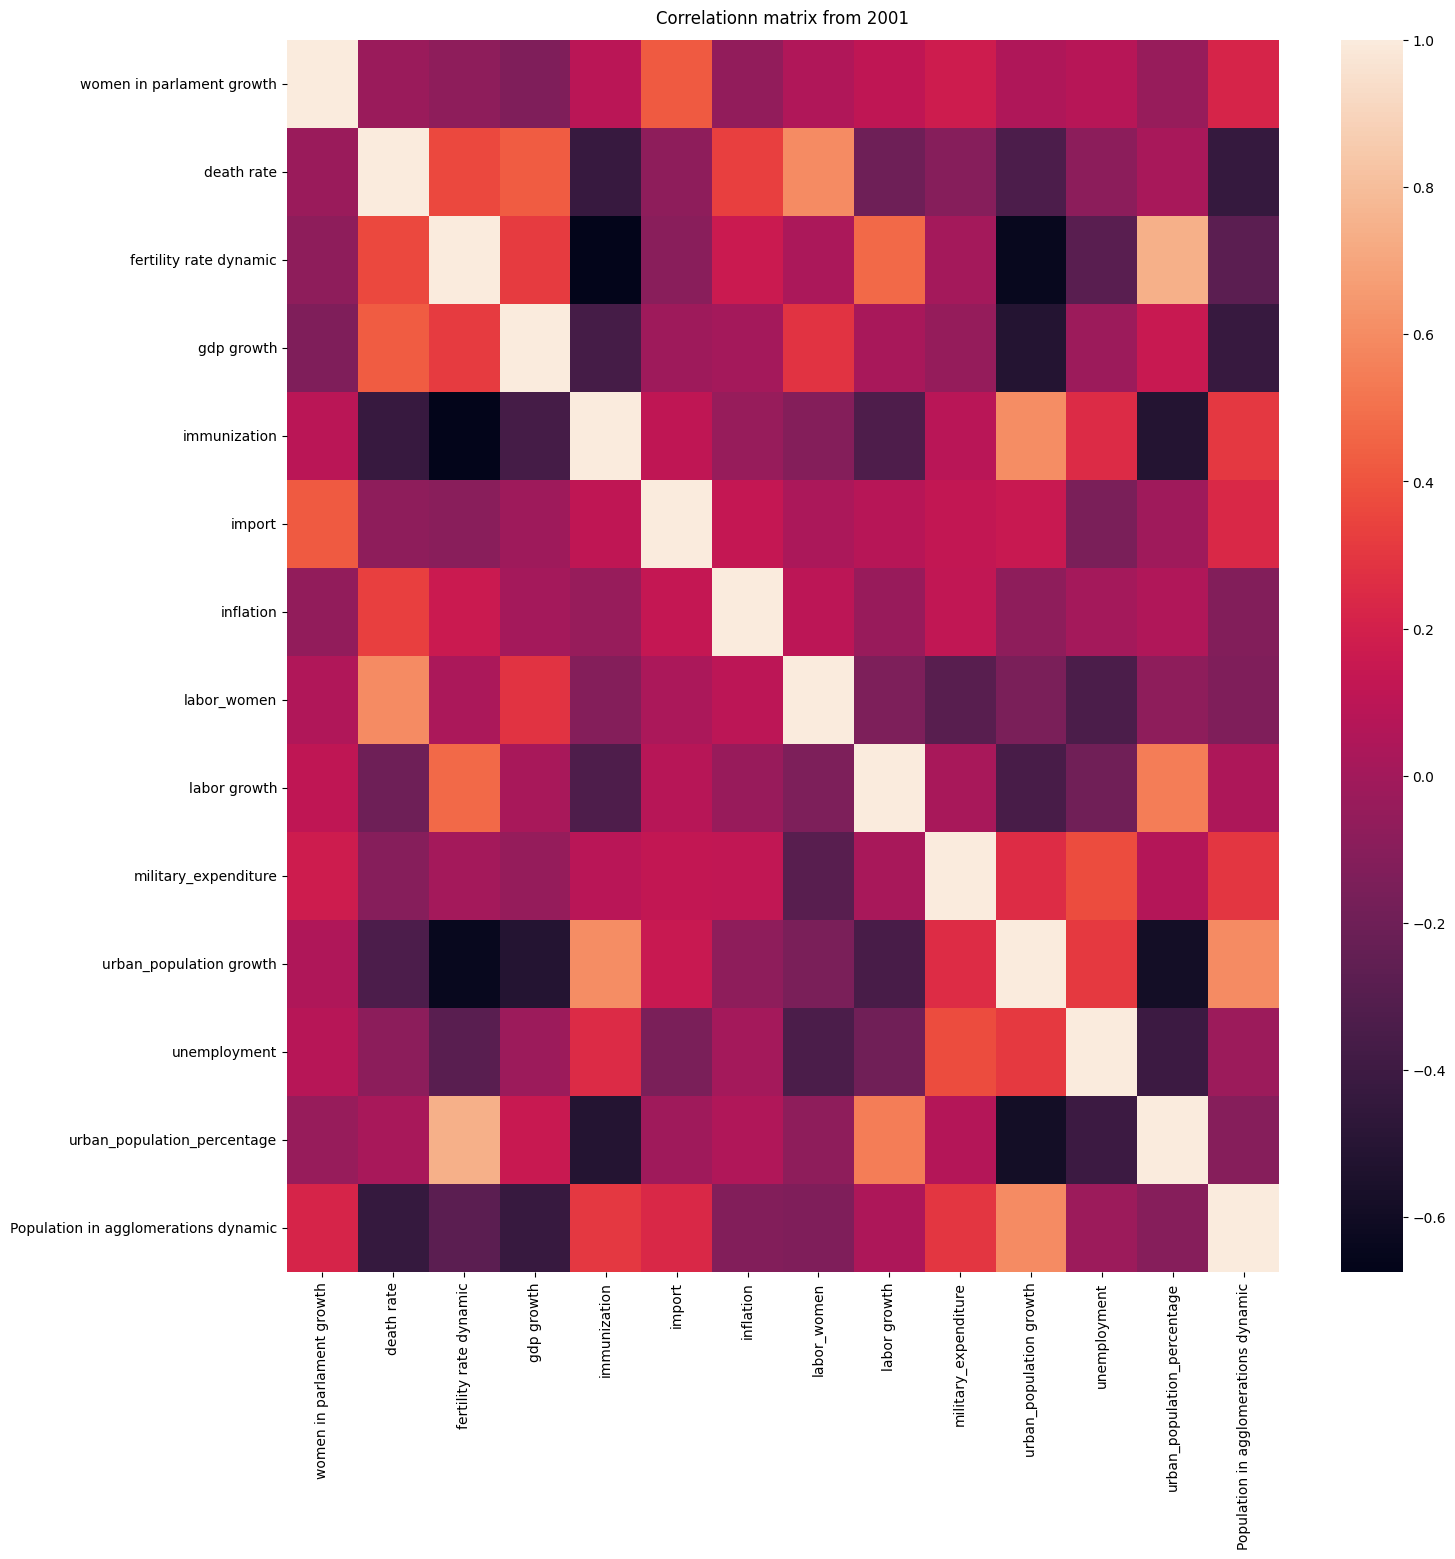

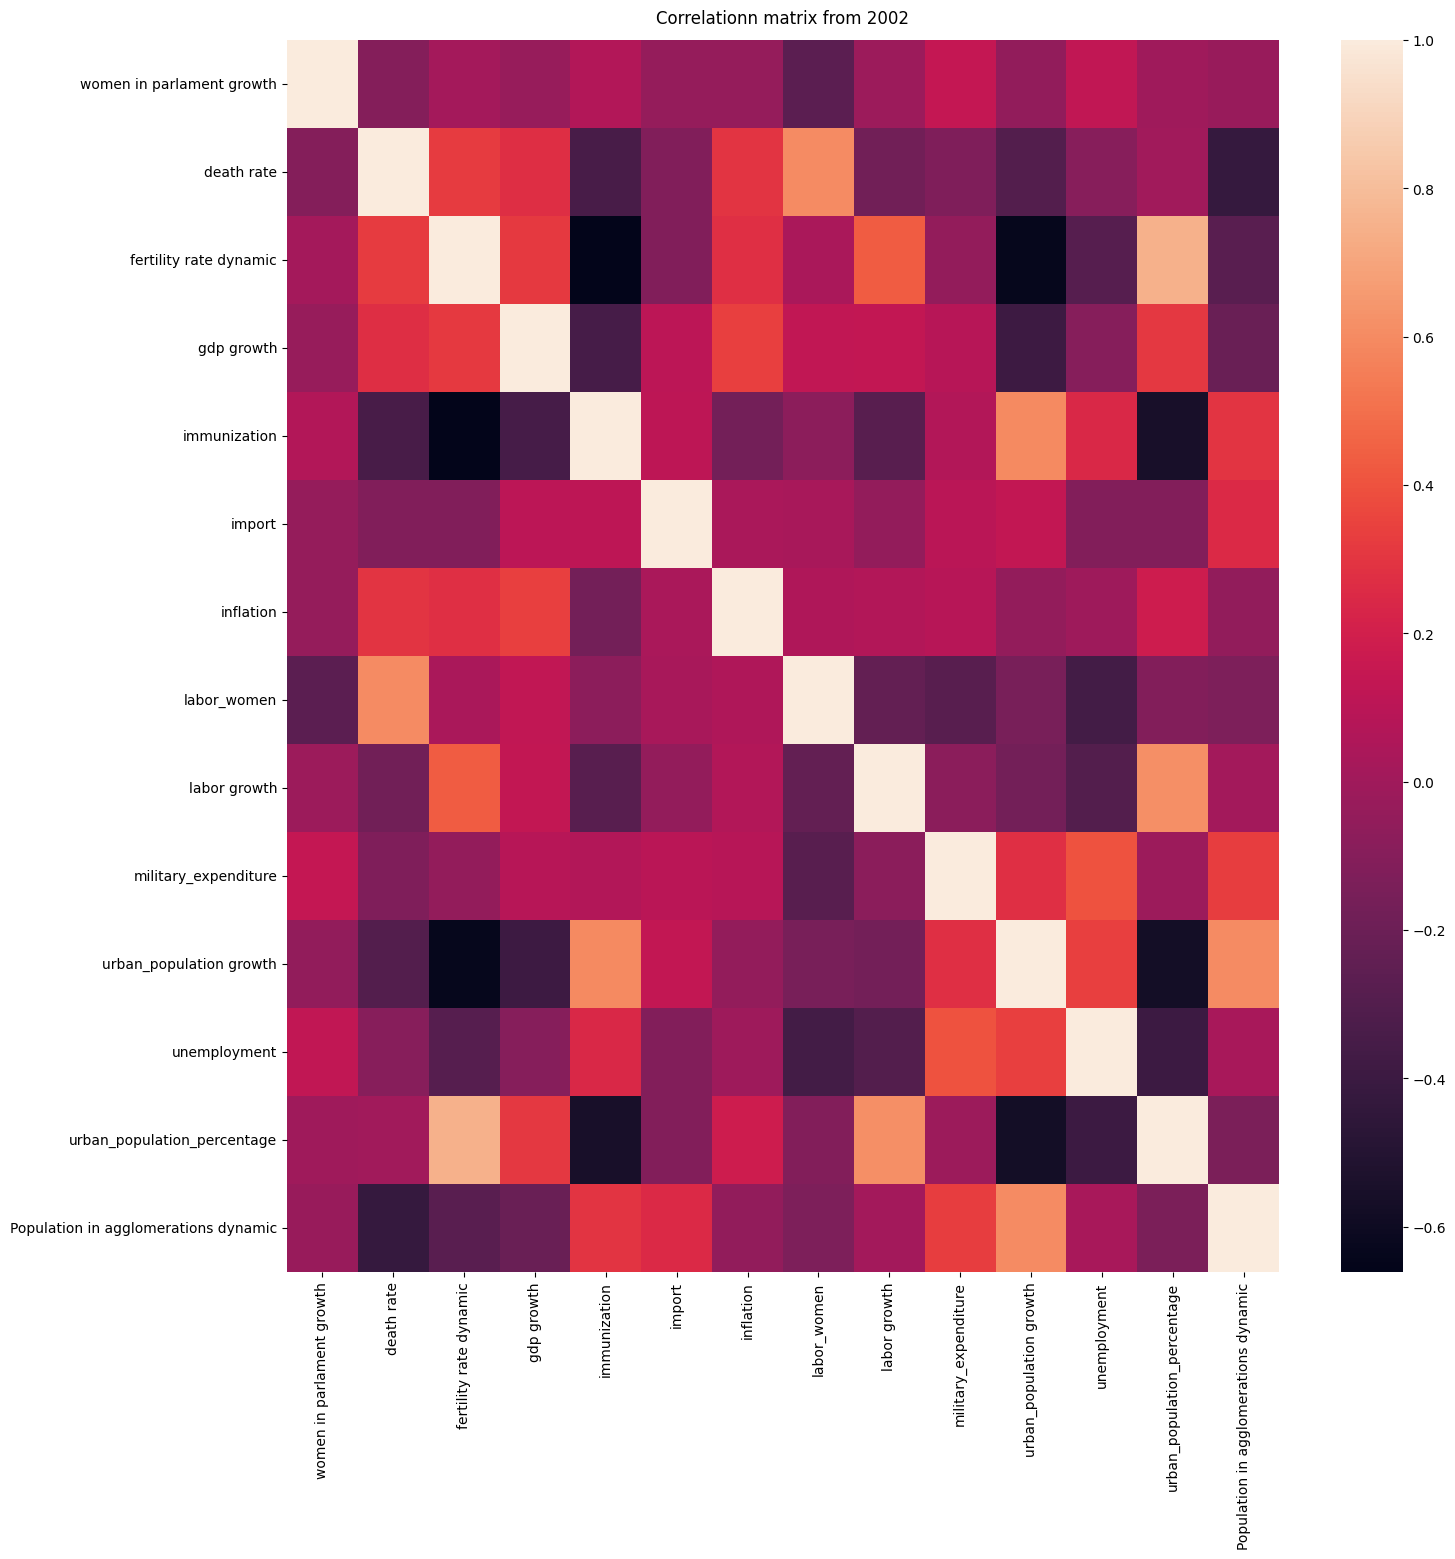

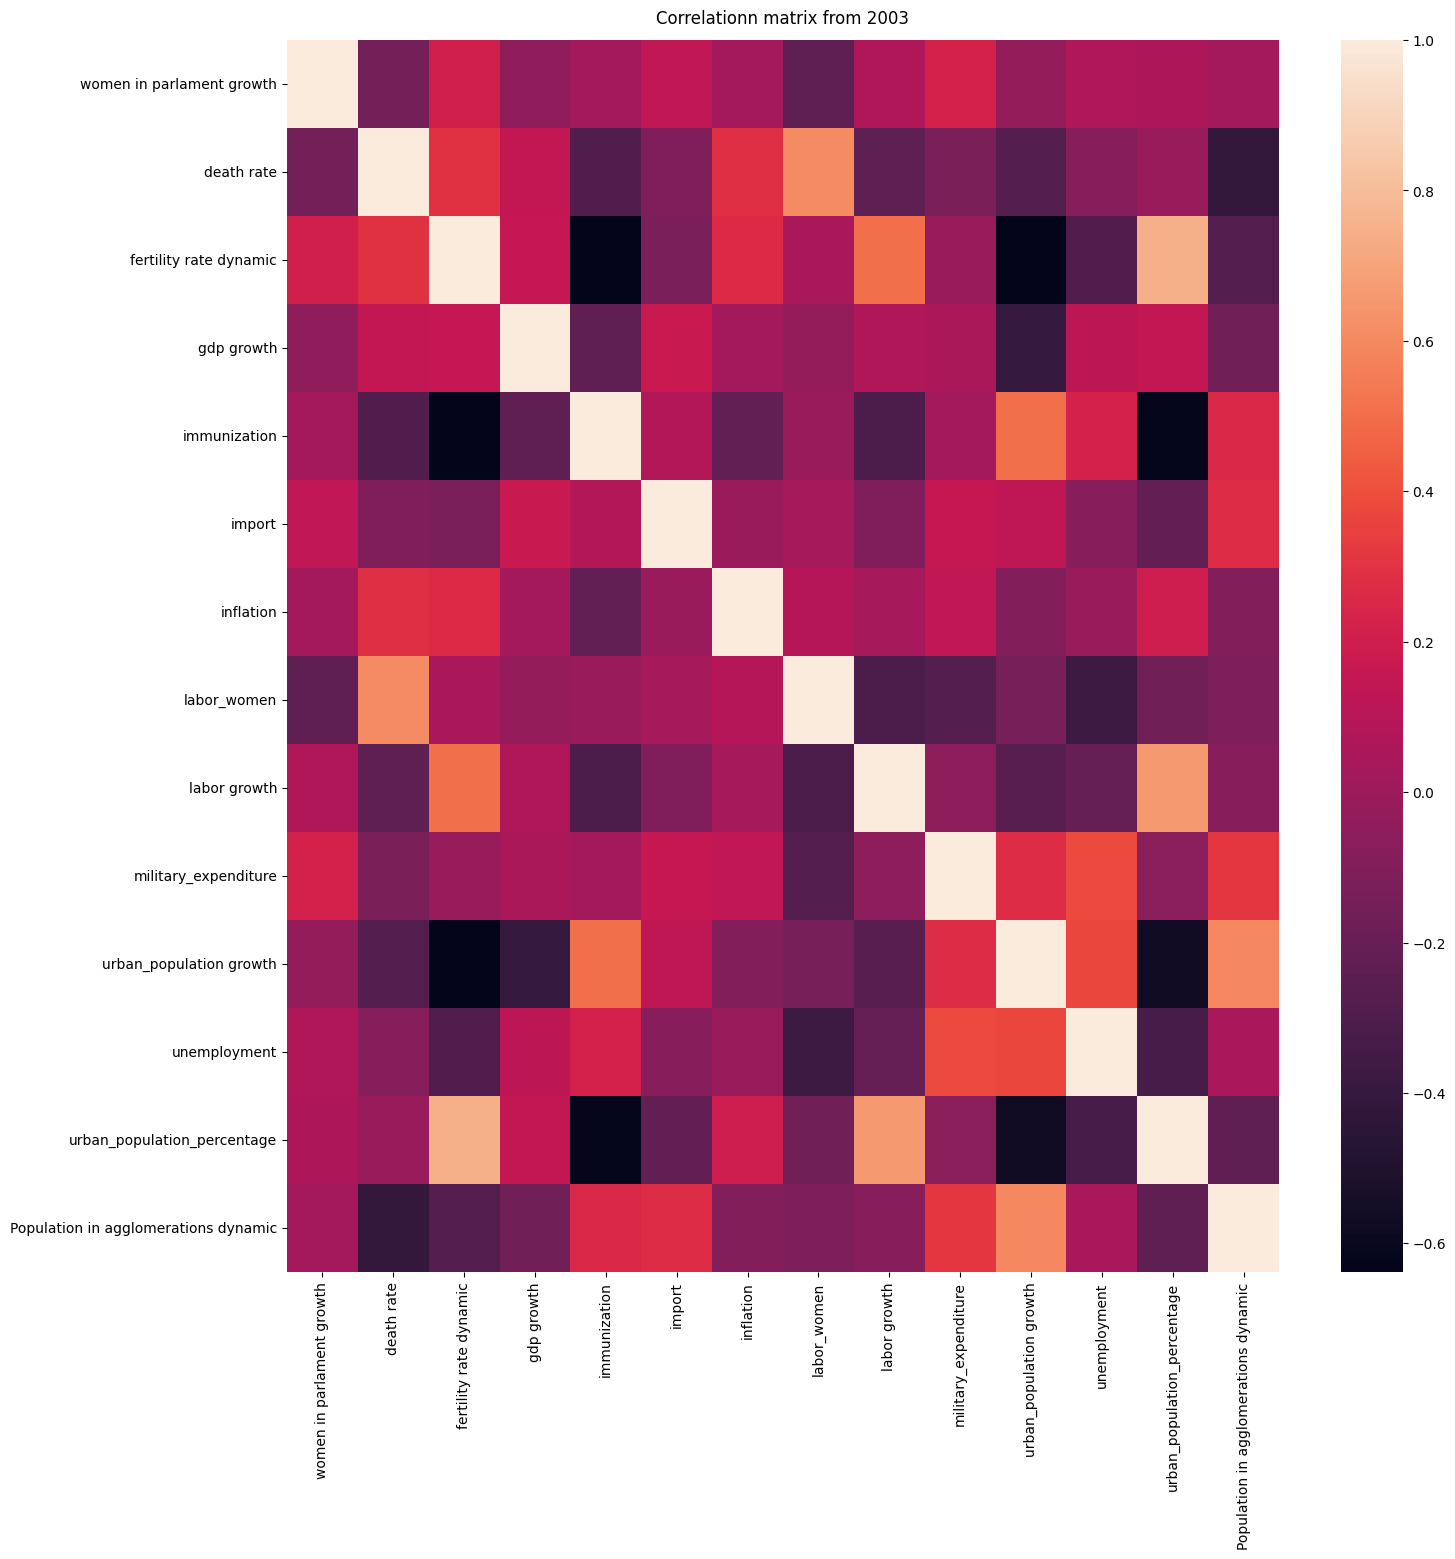

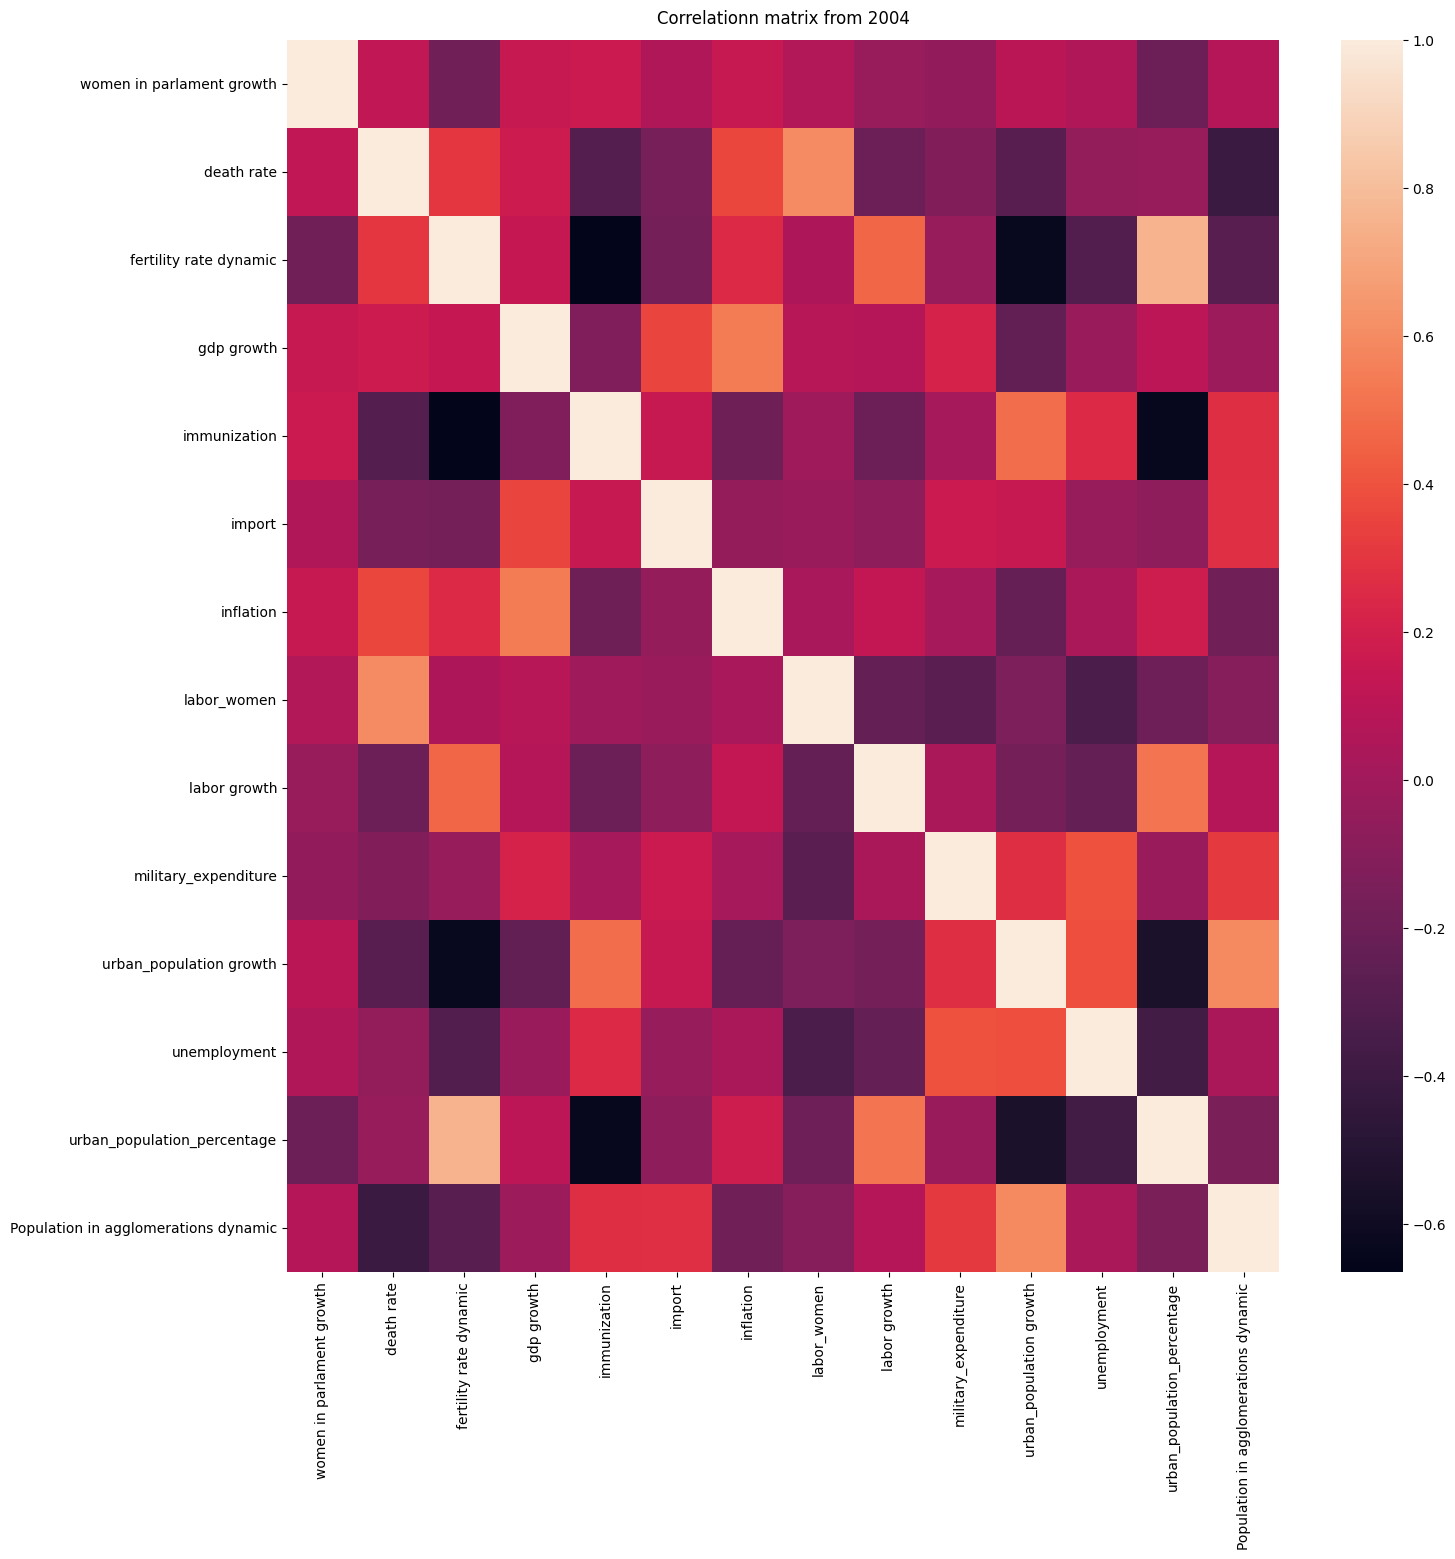

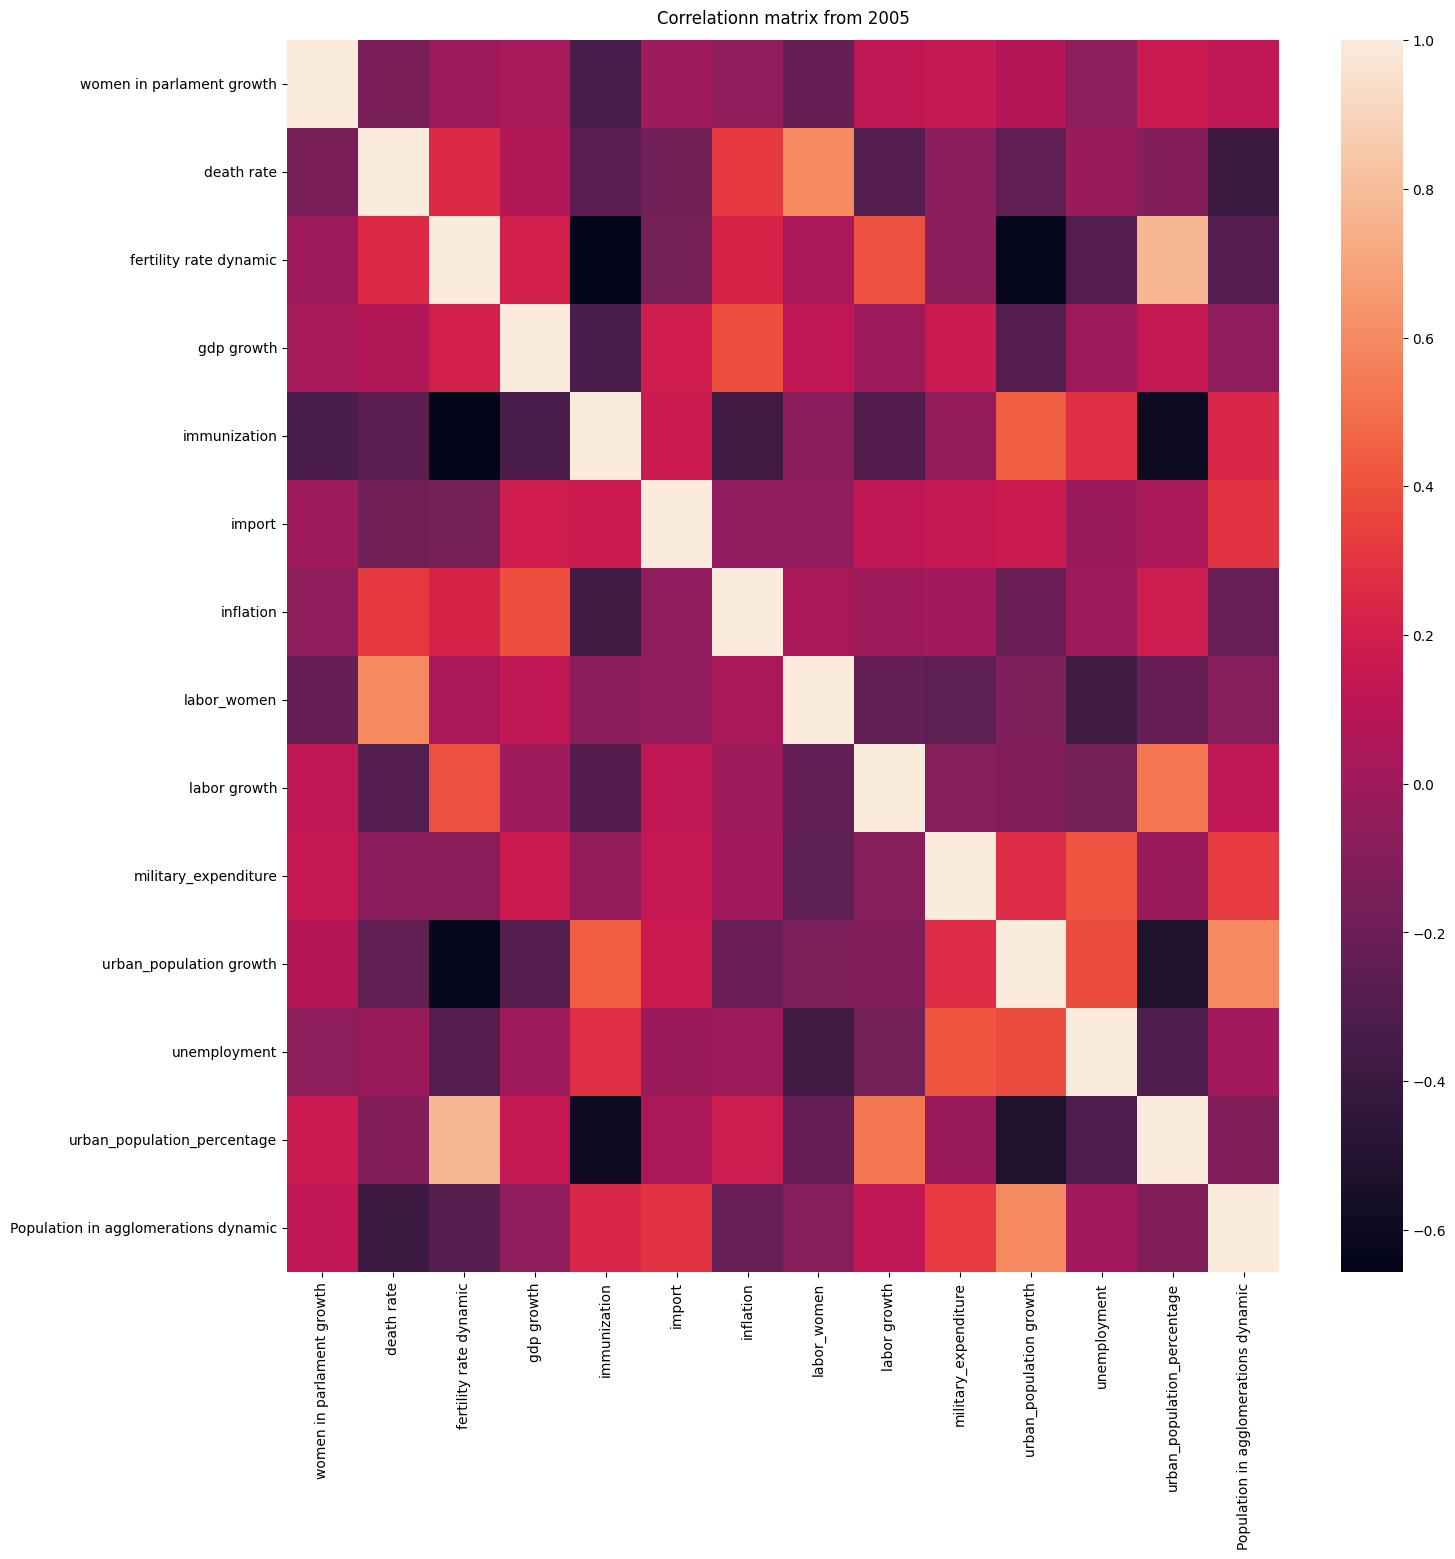

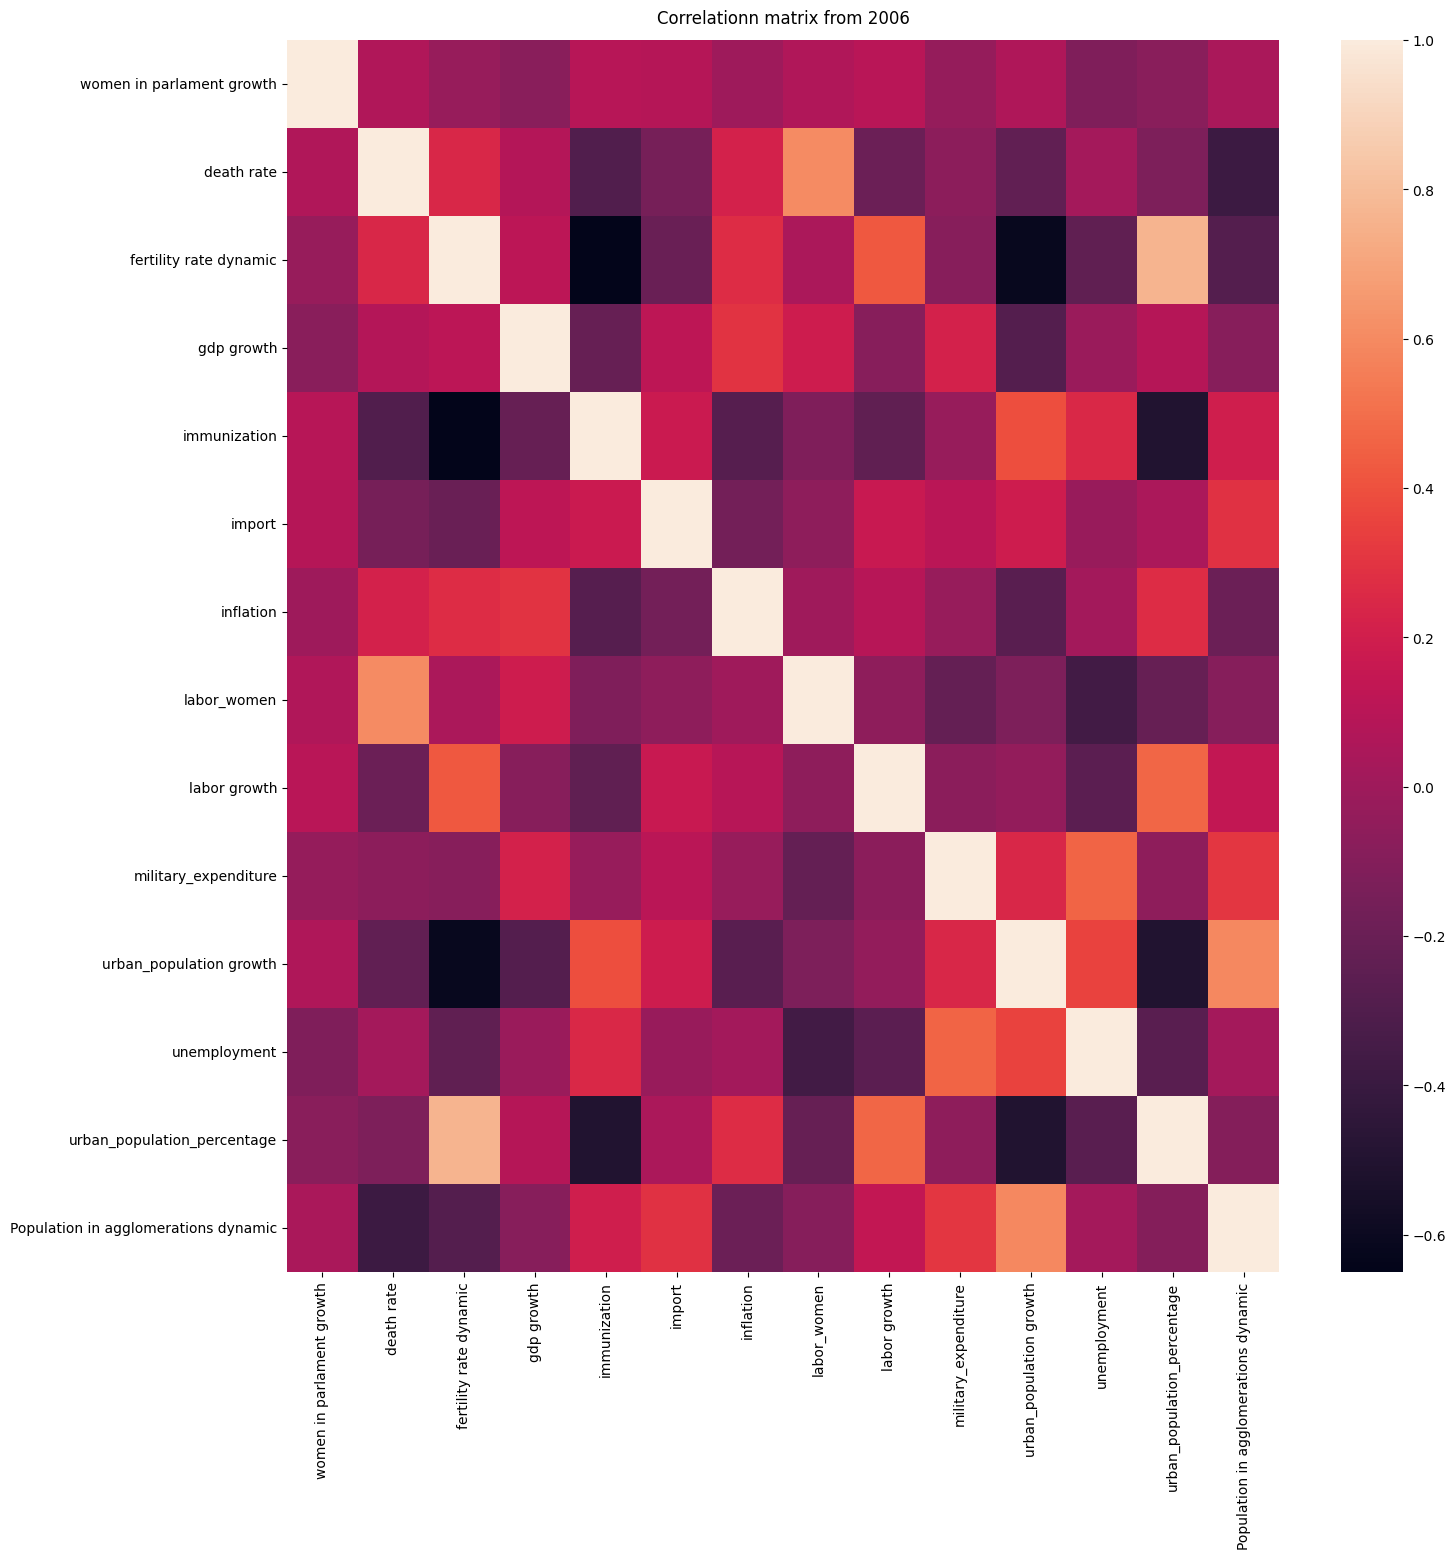

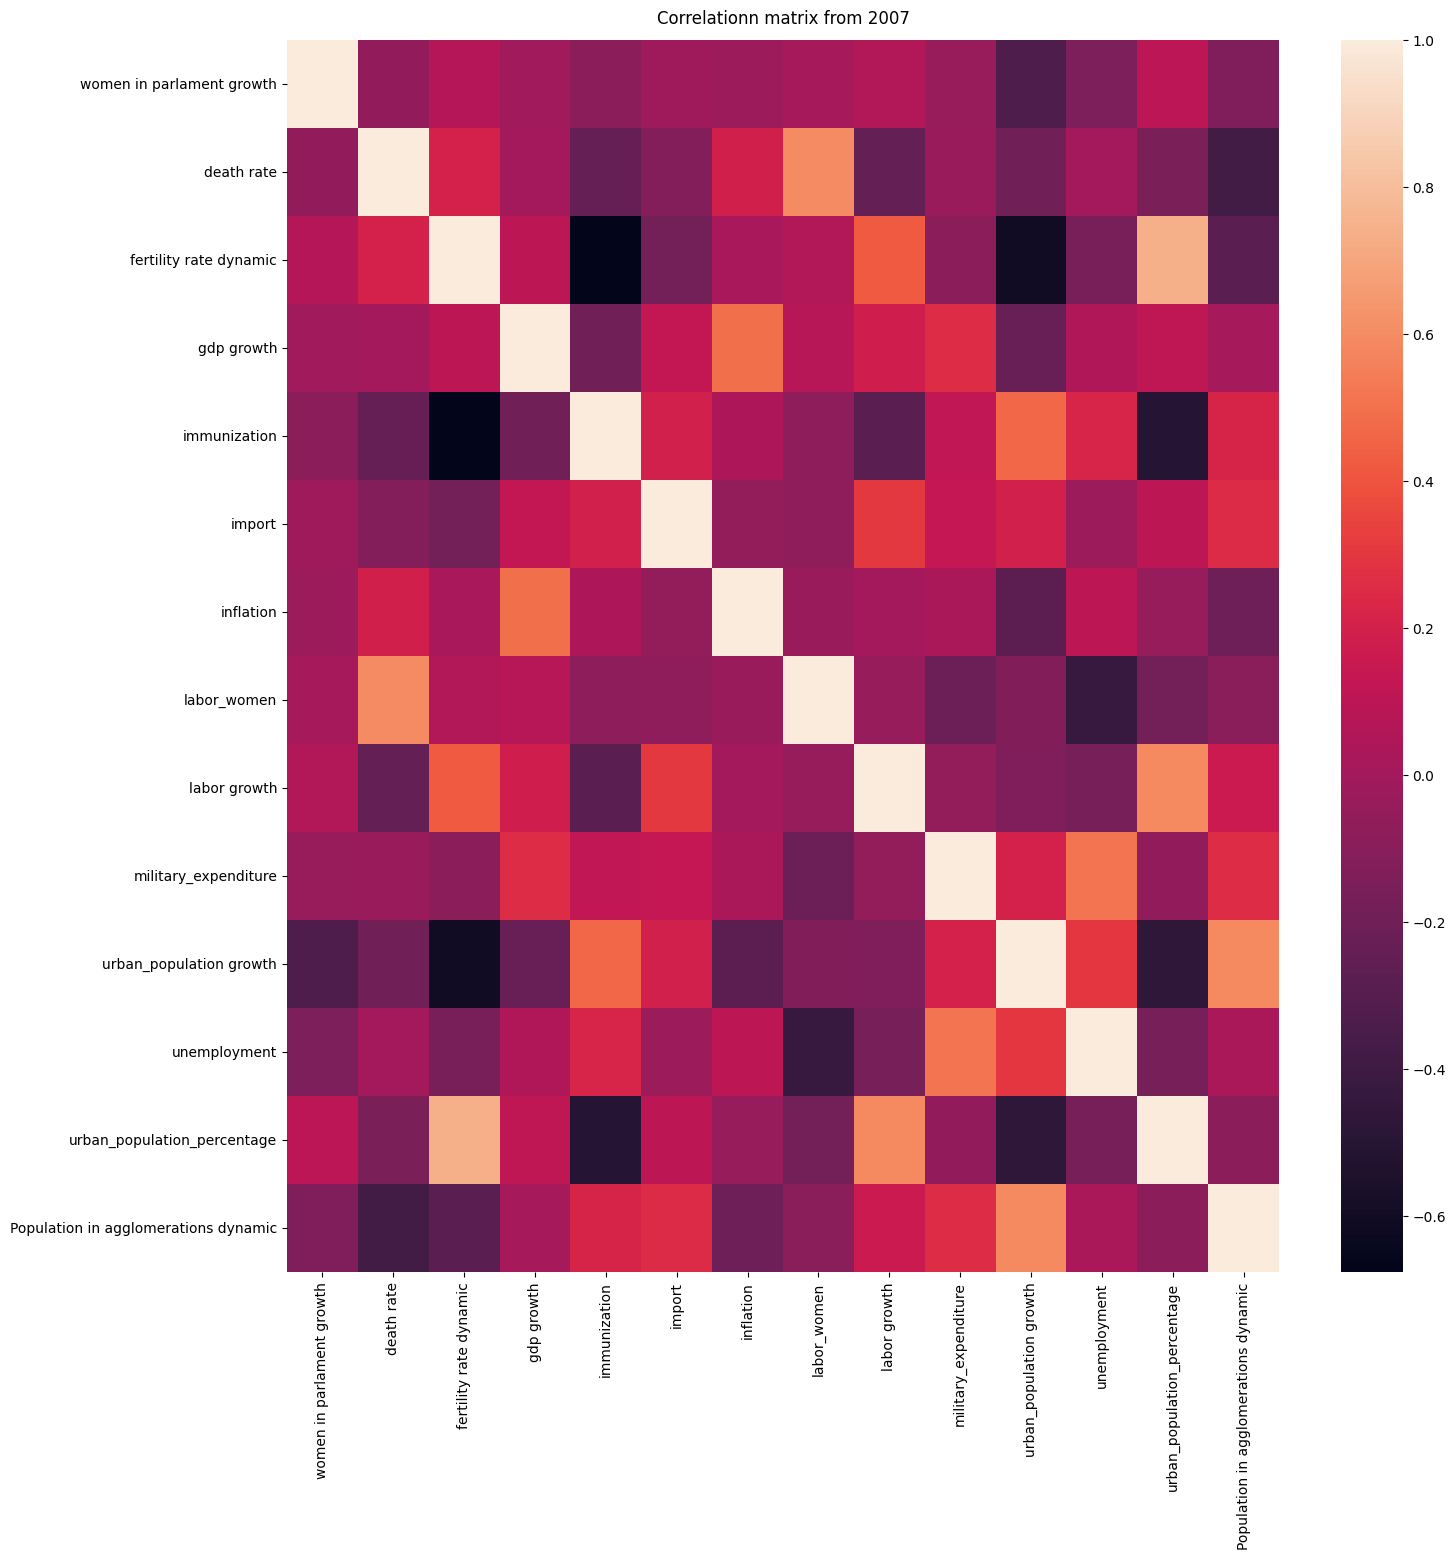

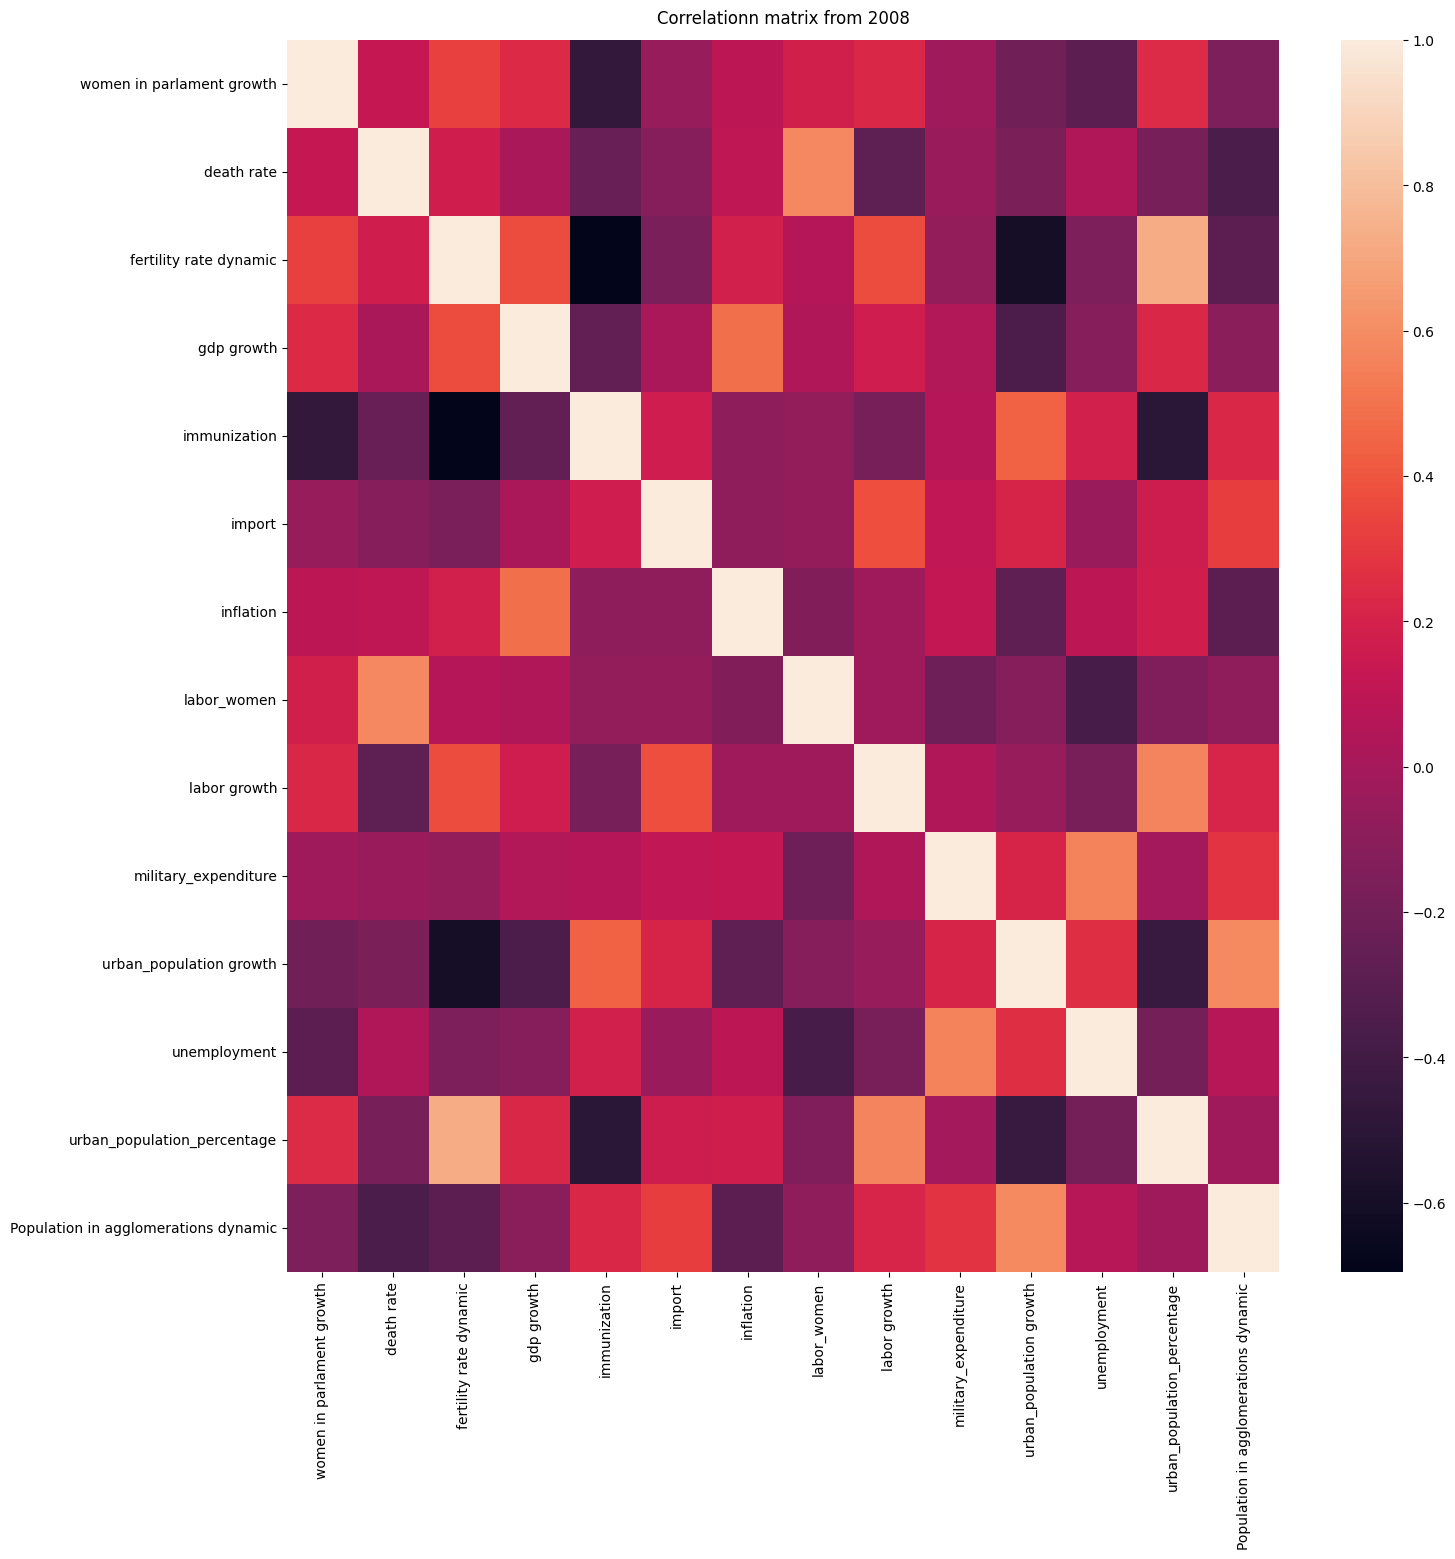

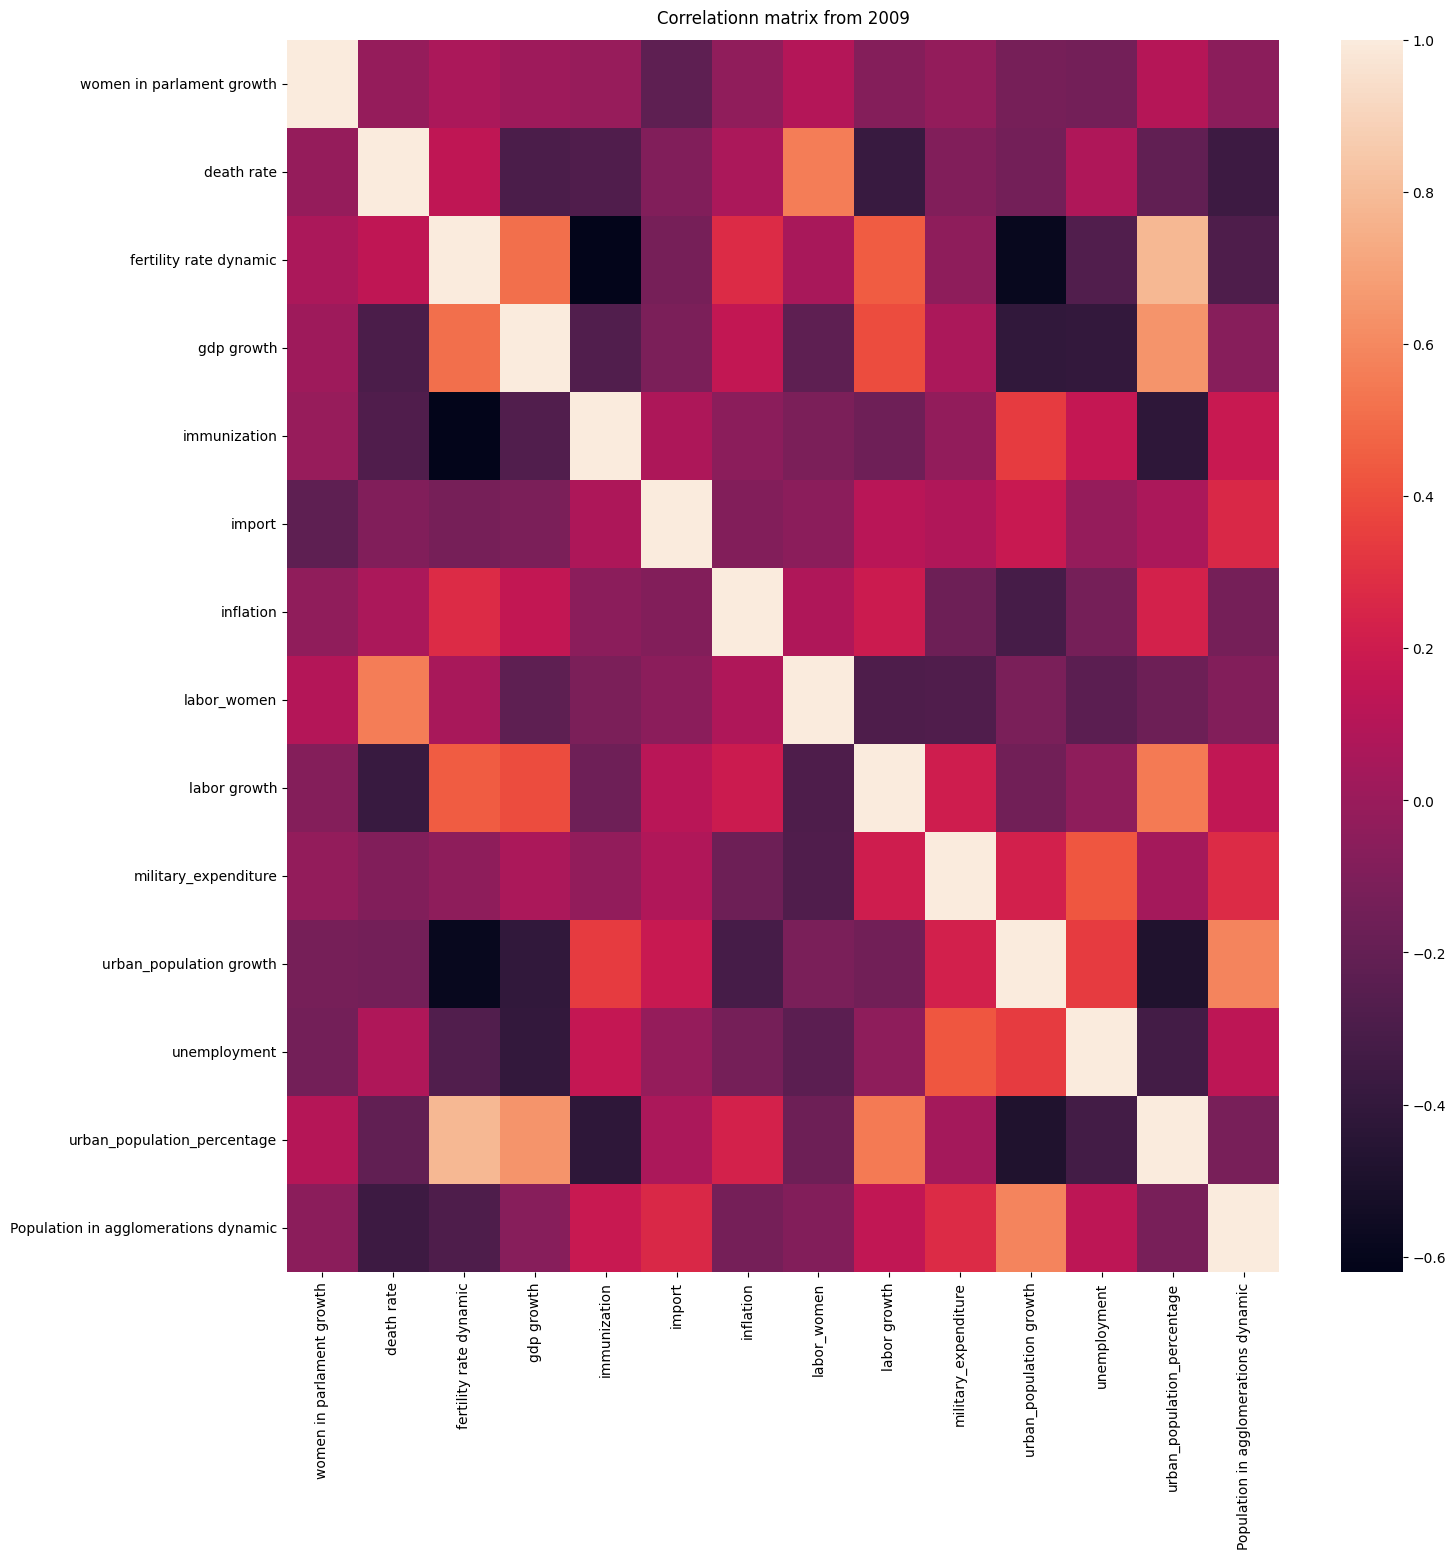

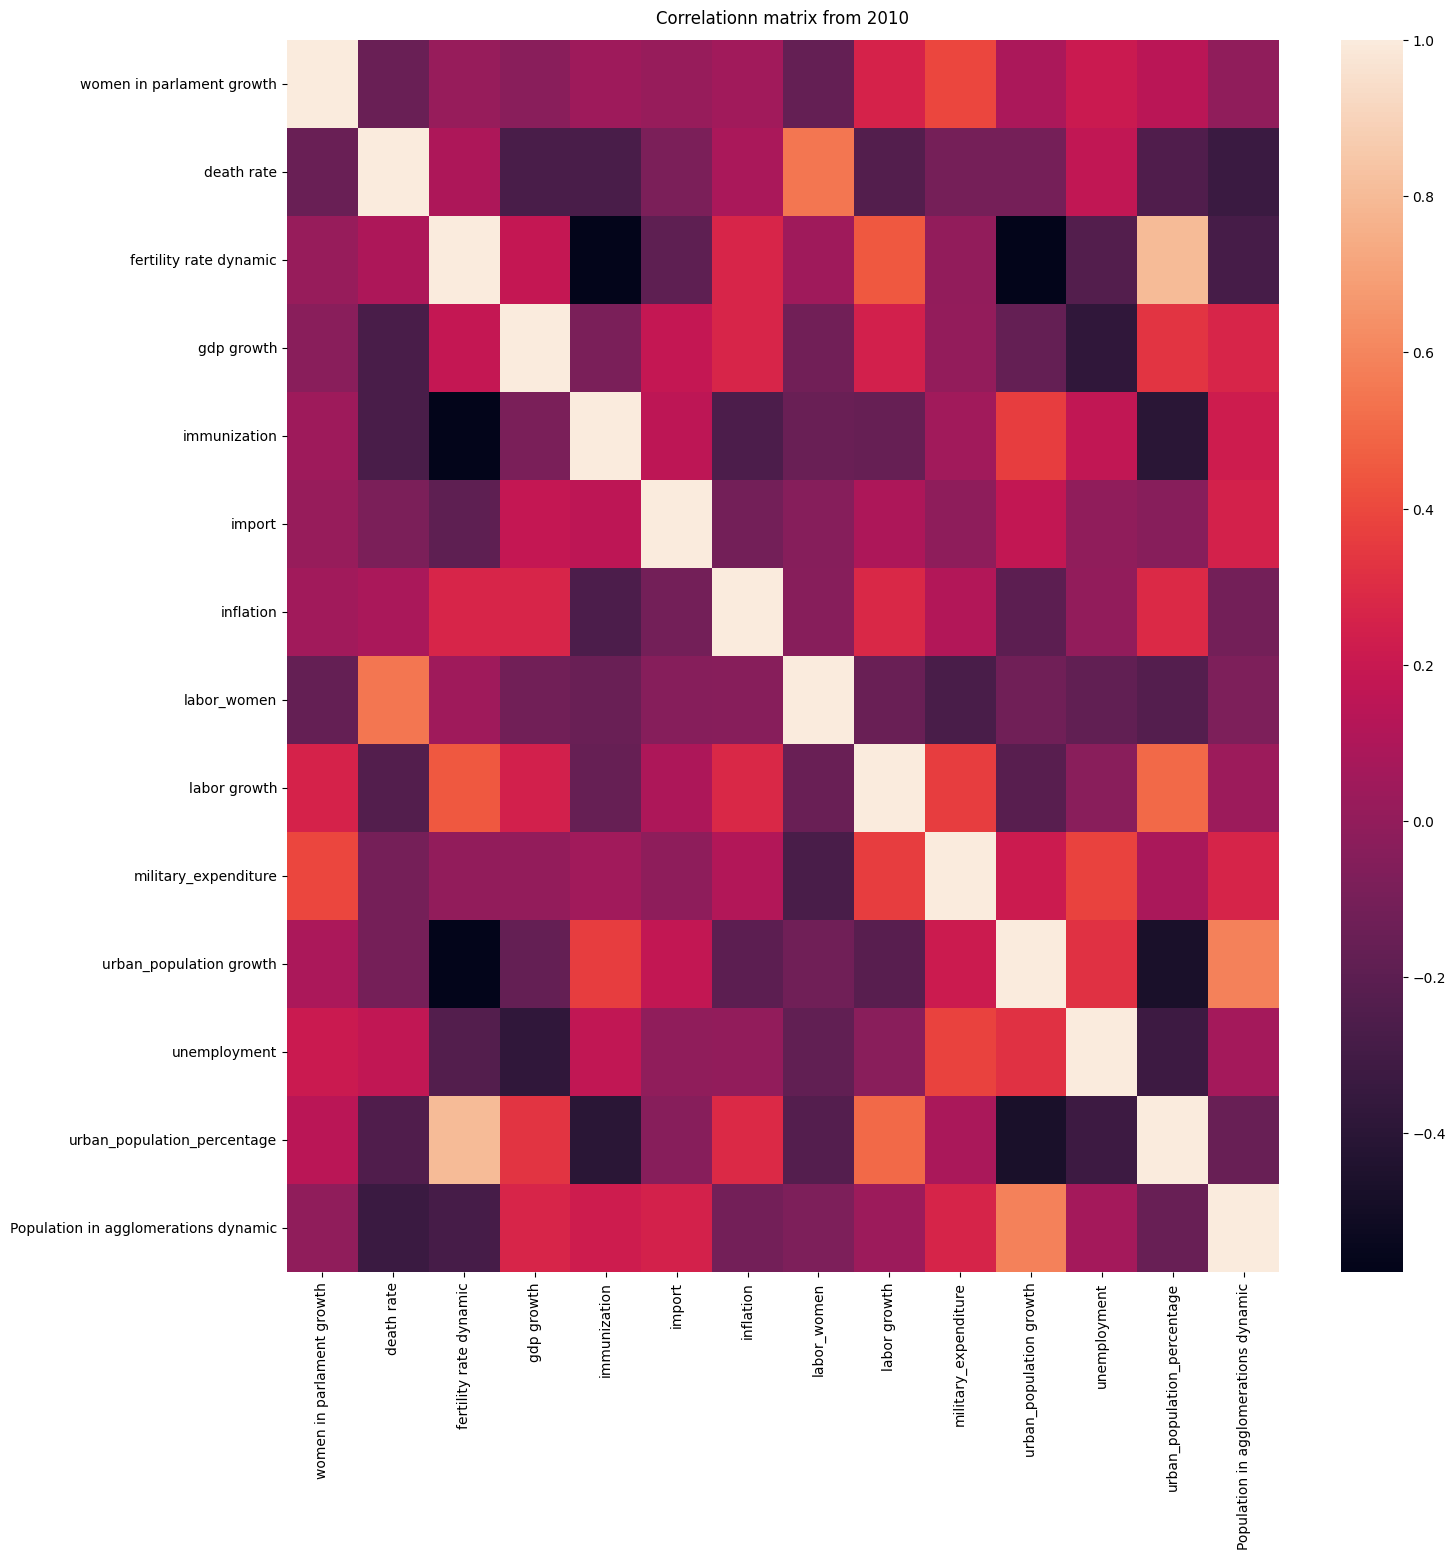

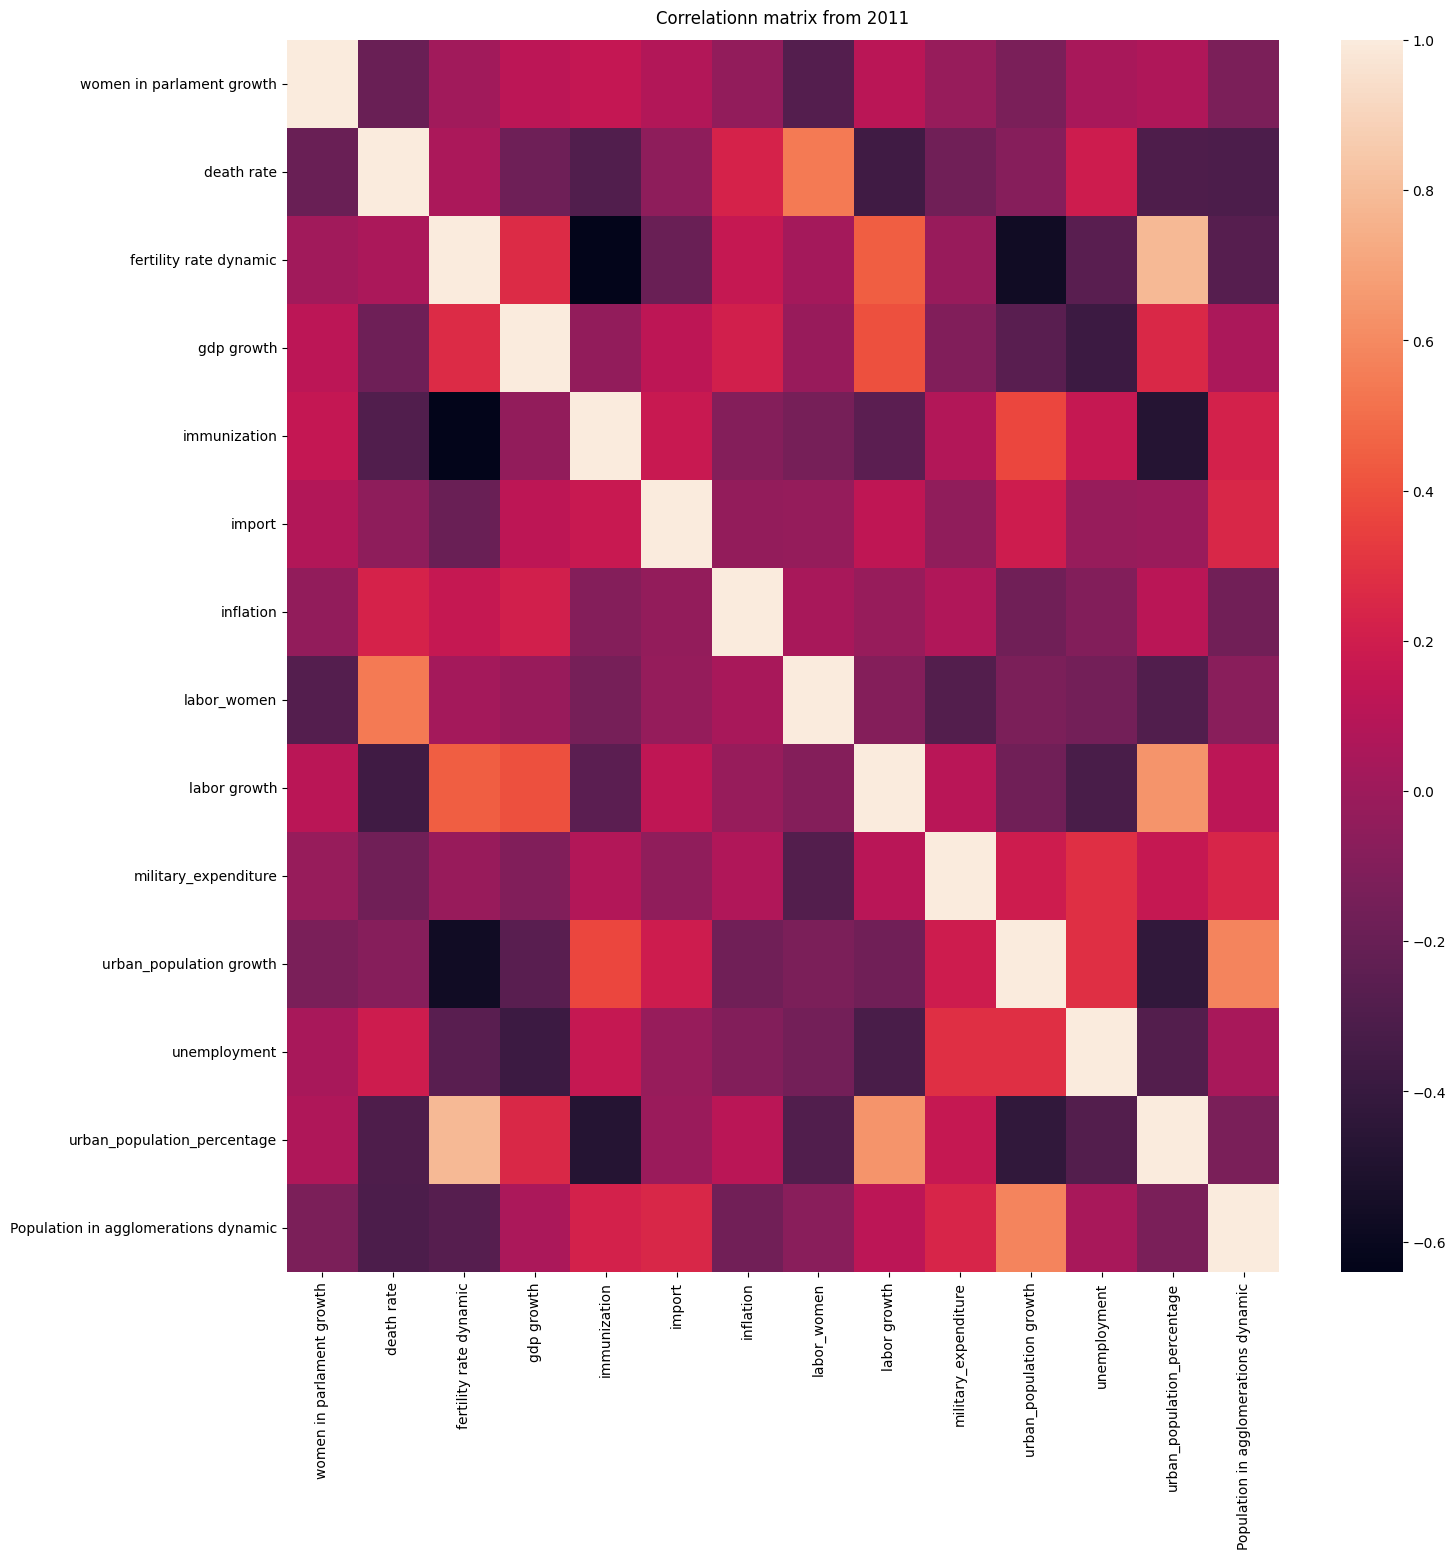

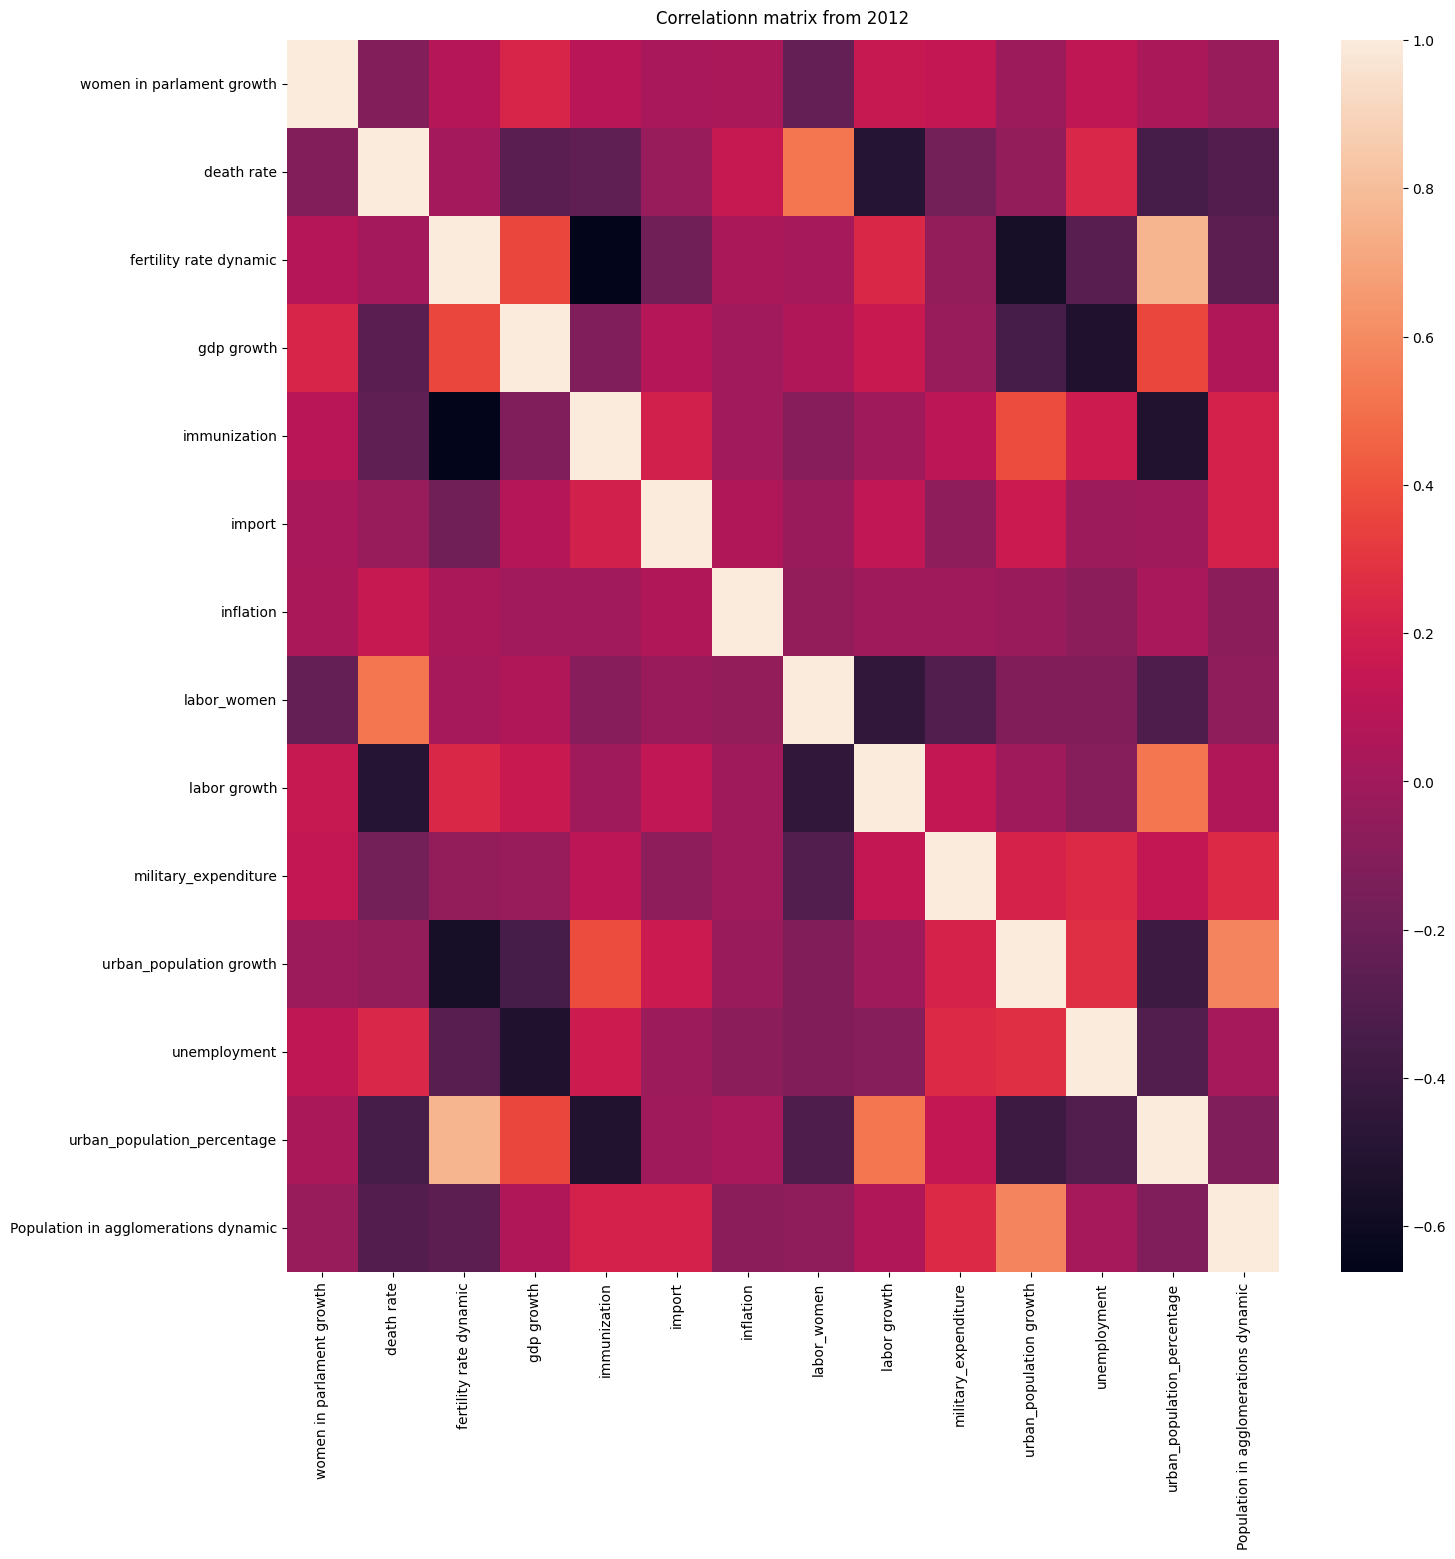

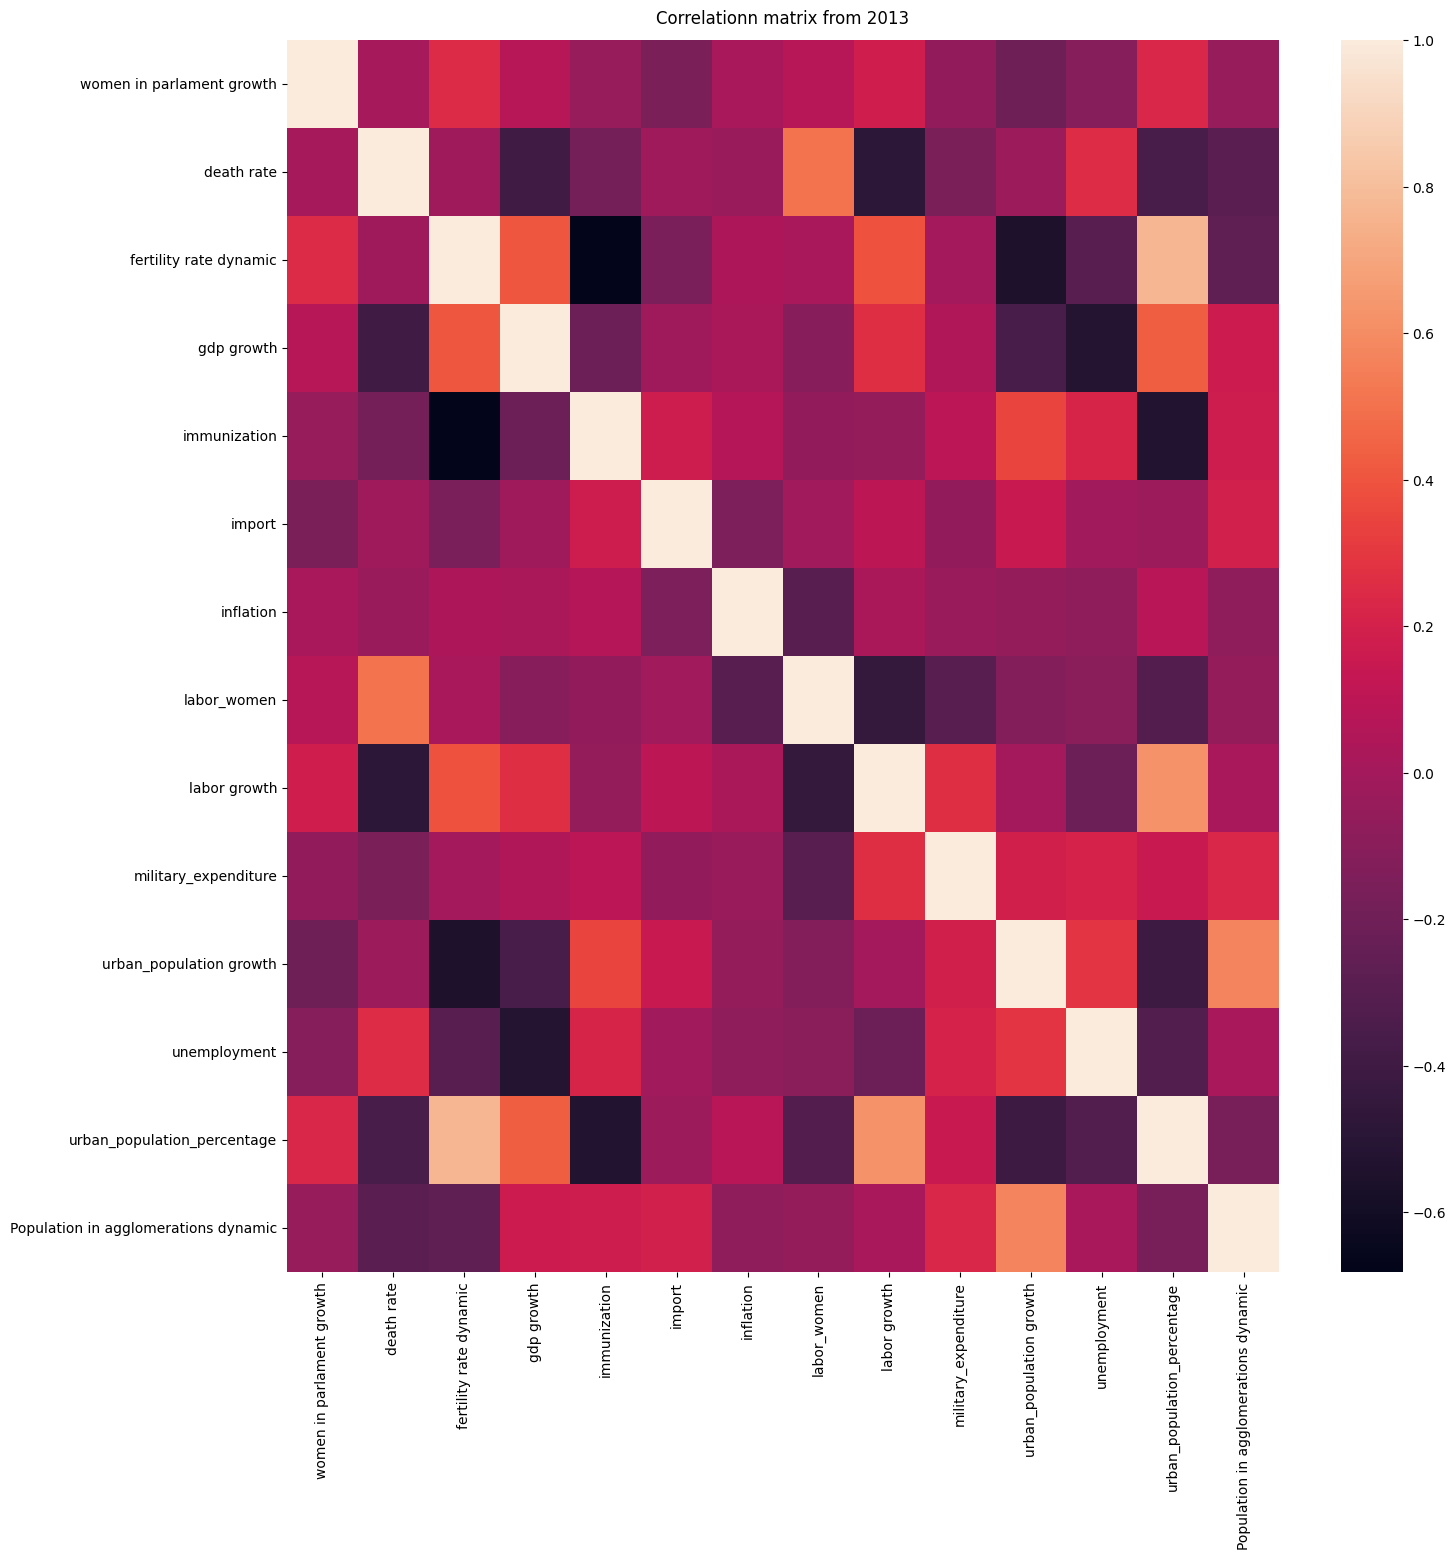

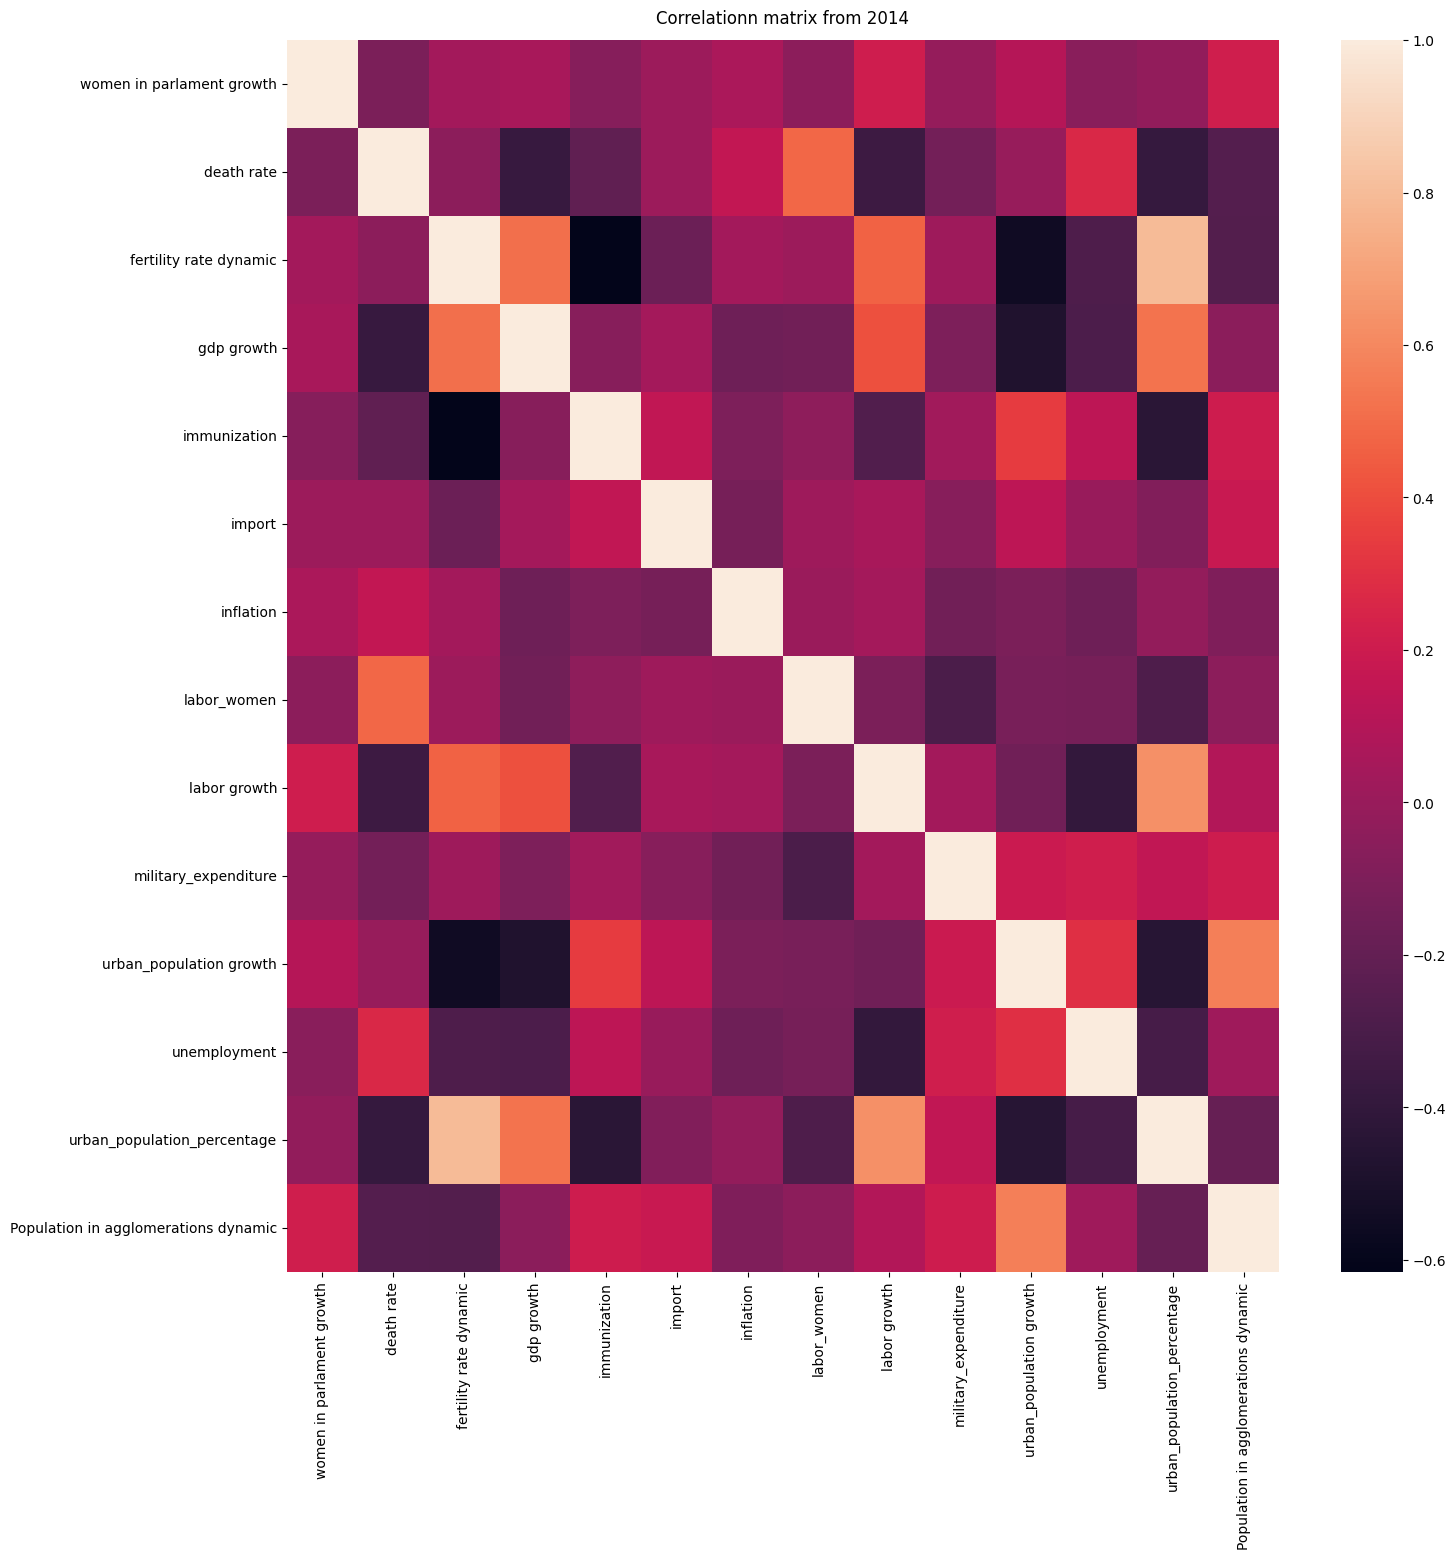

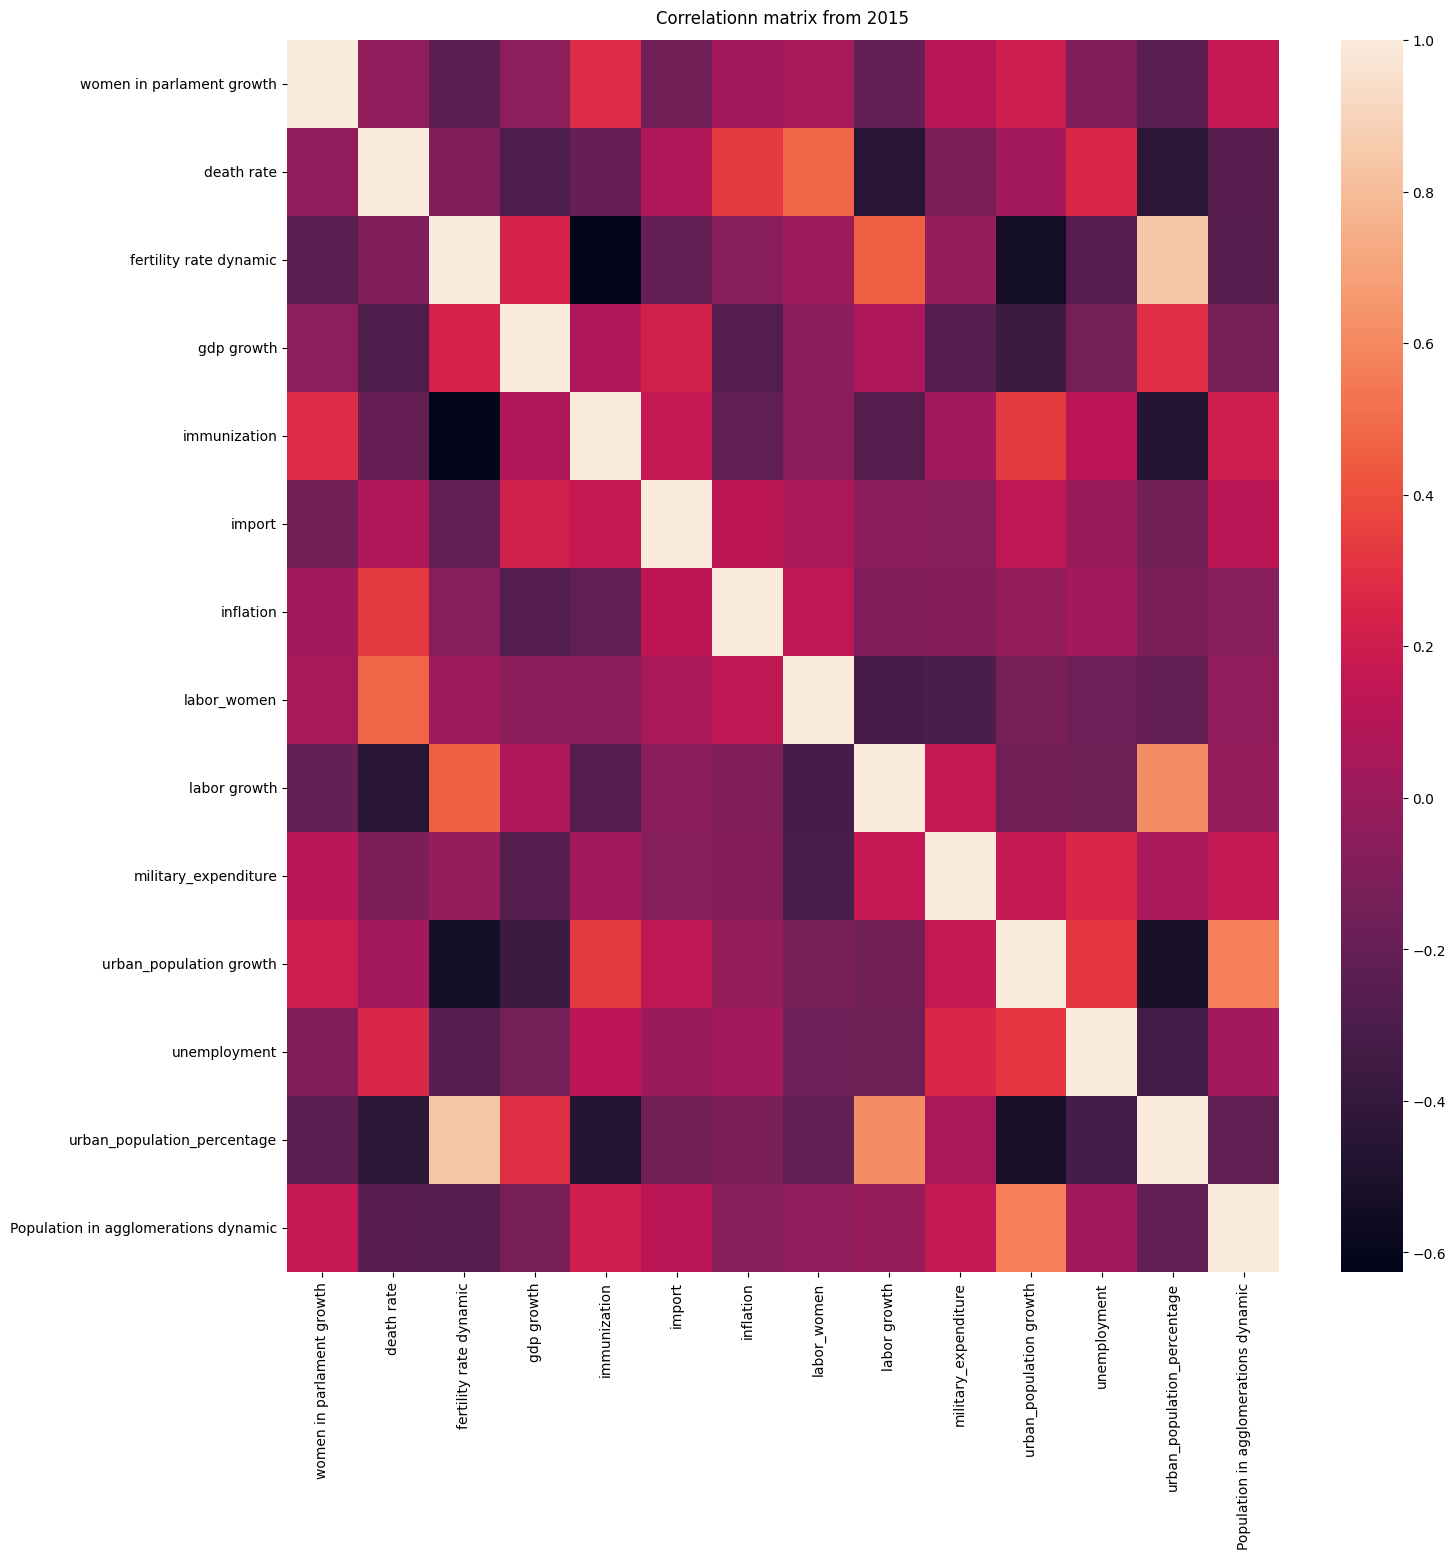

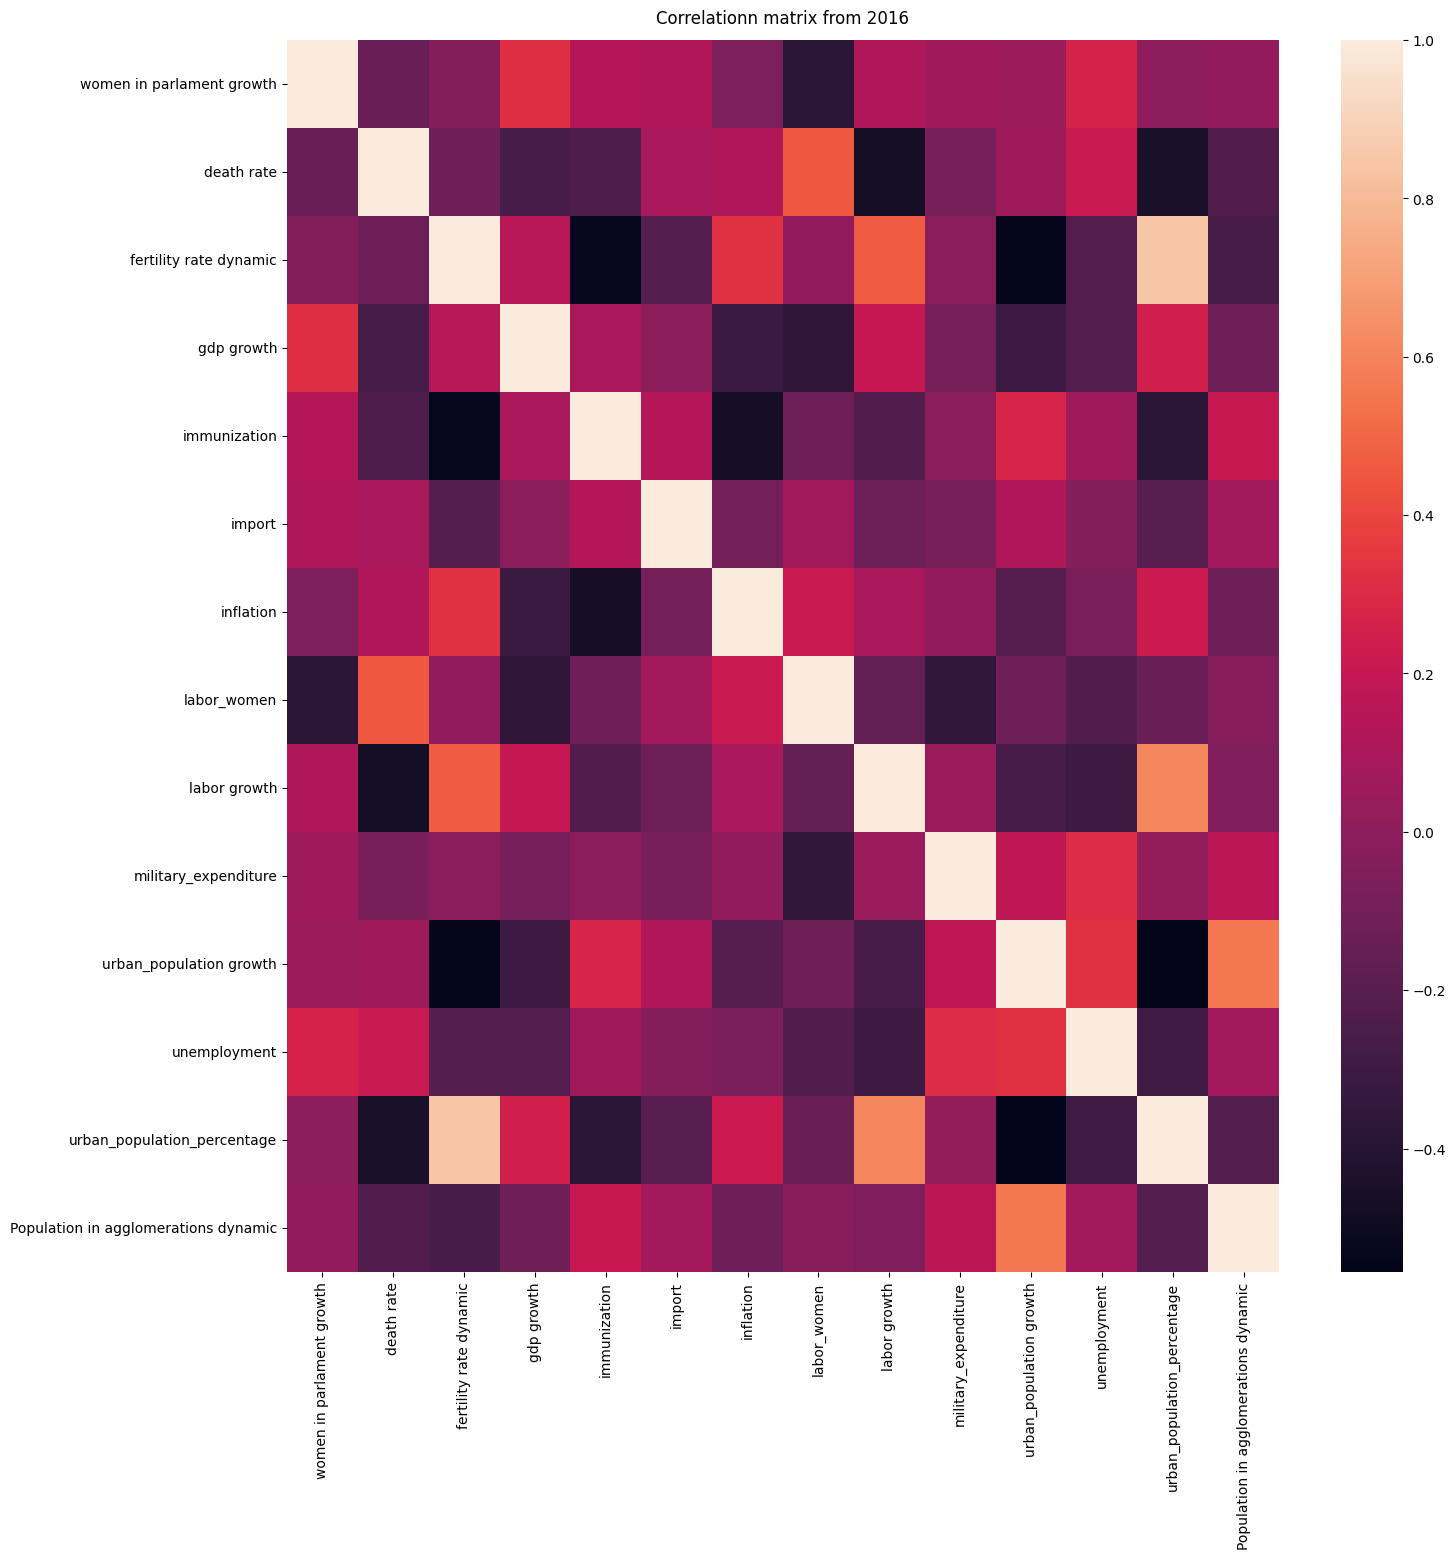

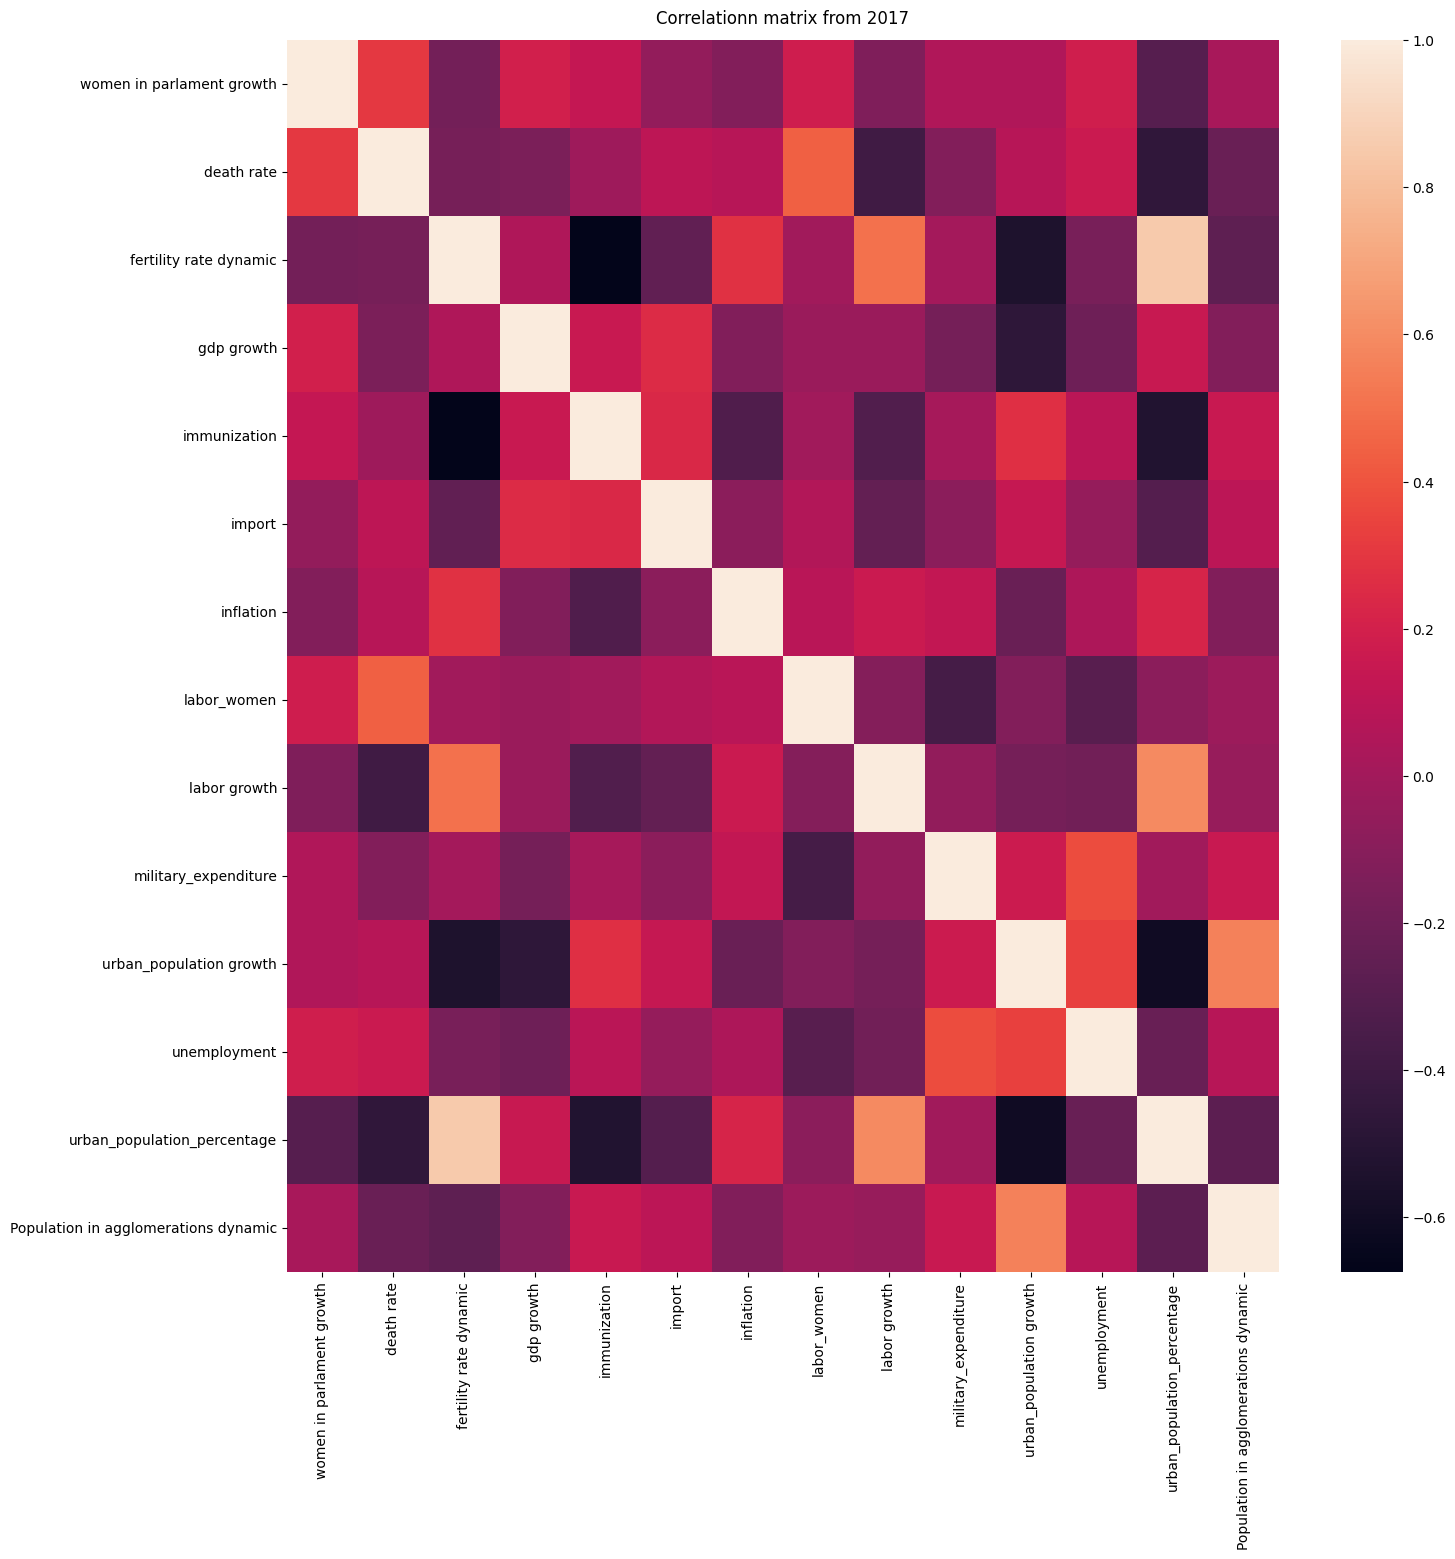

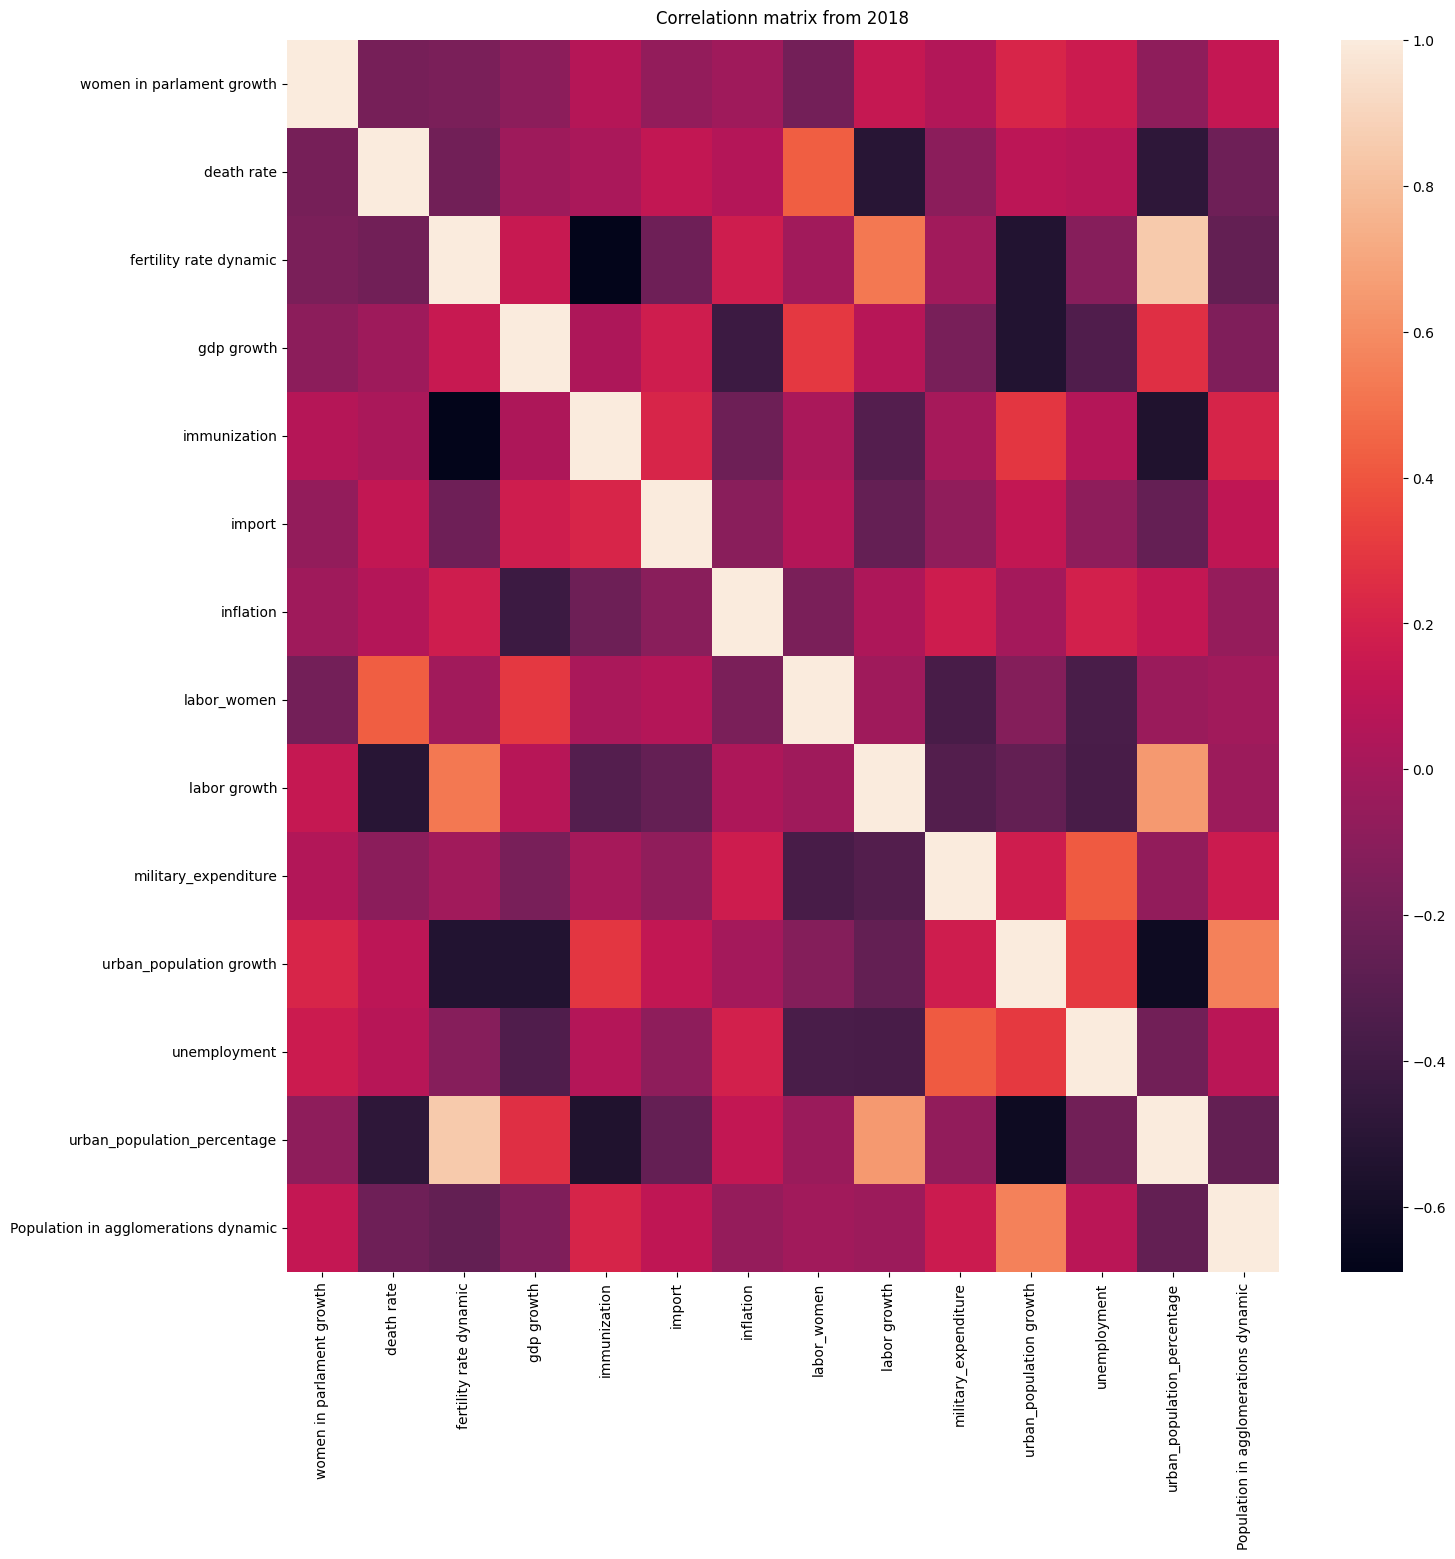

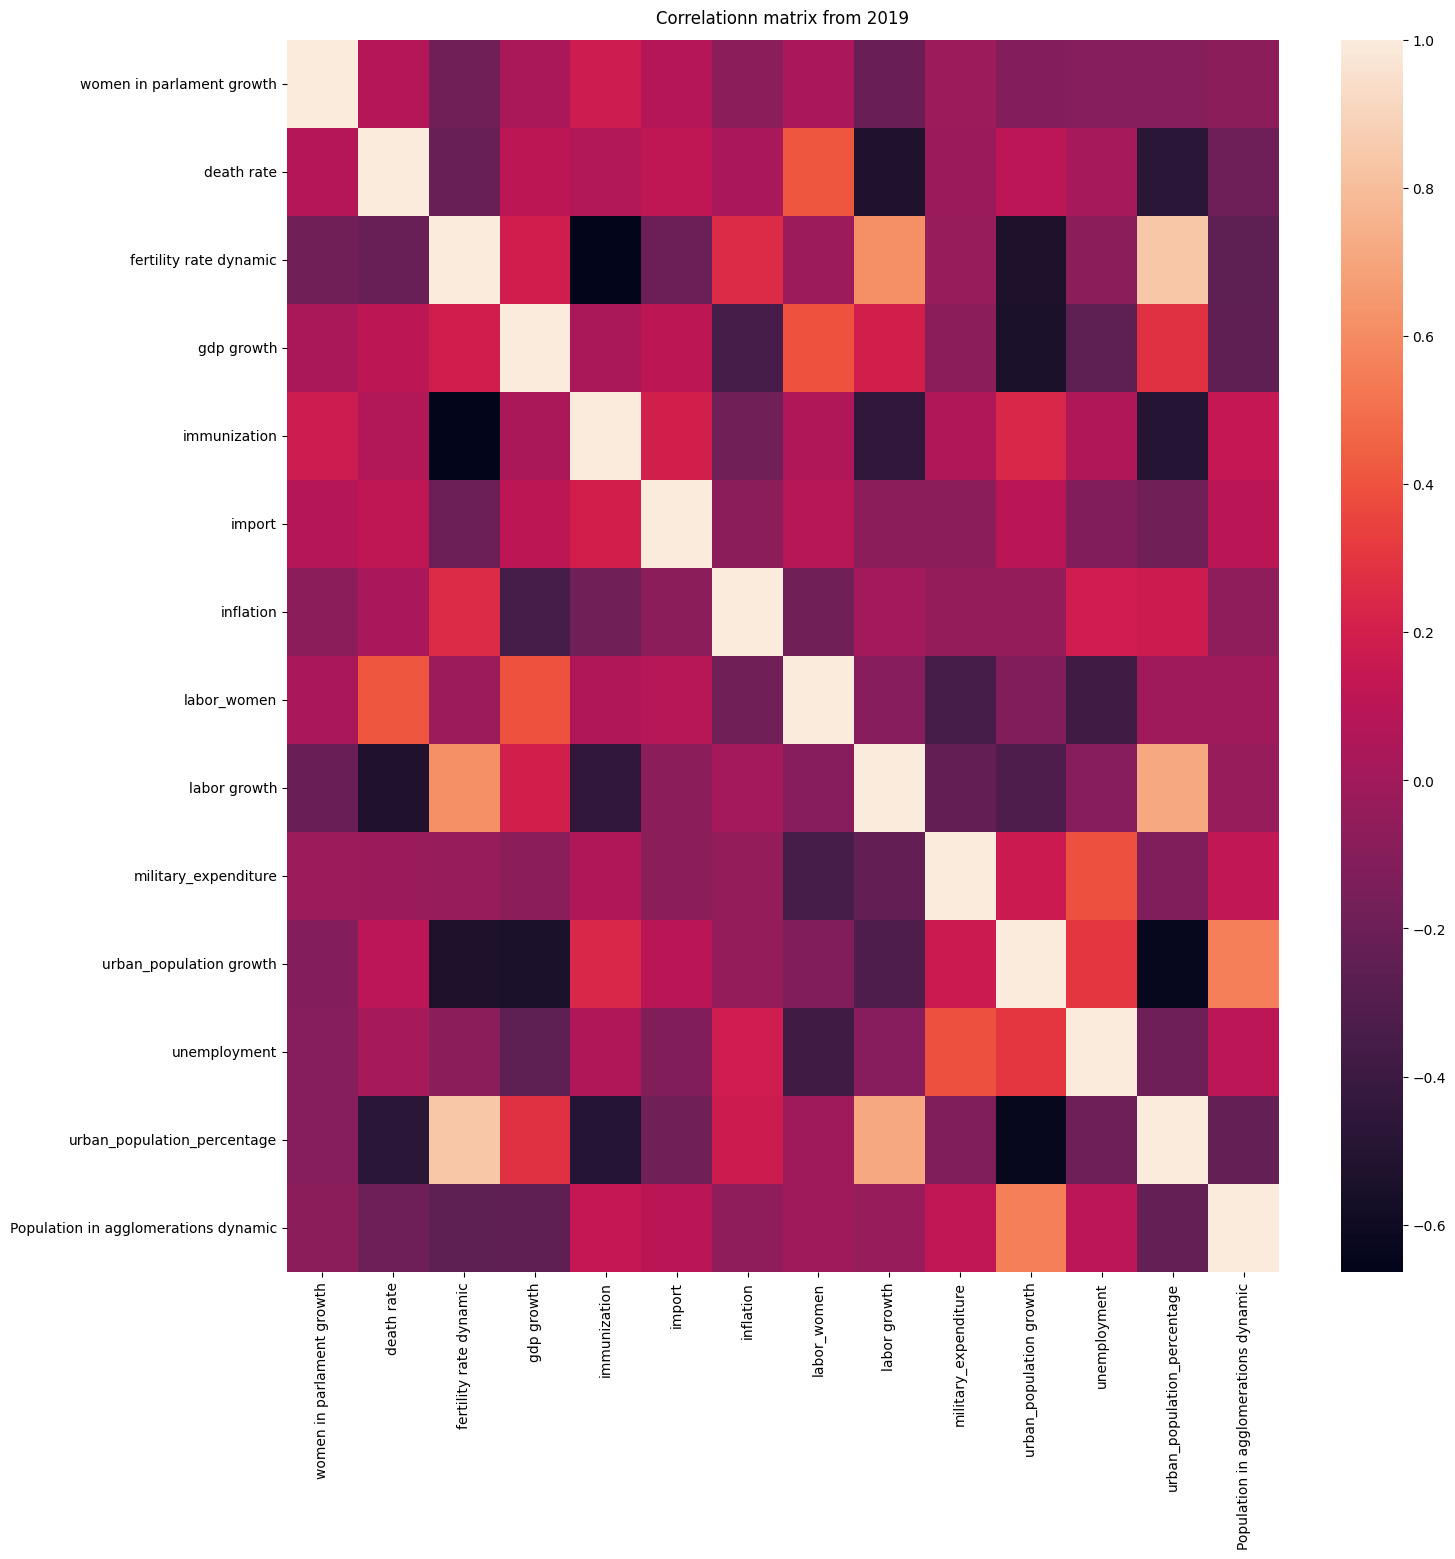

<ipython-input-15-68ef35af6a87>:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


In [15]:
filenames = [] #filenames to make gif animation

for year in range(19):
  filename = f'corr{year}.png'
  filenames.append(filename)


  plt.figure(figsize=(16, 16))
  heatmap = sns.heatmap(all_data_frames[year].corr(), annot=False)
  heatmap.set_title(f'Correlationn matrix from {year + 2001}', fontdict={'fontsize':12}, pad=12);\
  plt.savefig(filename)
  plt.show()

with imageio.get_writer('corr.gif', mode='I', duration=1) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

# Remove png files
for filename in set(filenames):
    os.remove(filename)

## Biplots

In [16]:

def plot1(score, coeff, labels=None):
    plt.figure(figsize=(17, 14))
    plt.xlabel('PC{}'.format(1), fontsize=20)
    plt.ylabel('PC{}'.format(2), fontsize=20)
    # plt.title('Biplot from 2000', fontsize=15)
    x1 = score[:, 0]
    y1 = score[:, 1]
    n = coeff.shape[0]
    scale_x = 1.0/(x1.max() - x1.min())
    scale_y = 1.0/(y1.max() - y1.min())
    plt.scatter(x1 * scale_x, y1 * scale_y, color='blue', s=70, edgecolor='g')
    for i in range(n):
        plt.arrow(0,0,coeff[i,0],coeff[i,1], color='r',alpha=0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15,coeff[i,1] * 1.15, 'Var'+str(i+1), color='g', ha= 'center', va = 'center', fontsize=20)
        else:
            plt.text(coeff[i,0]* 1.15,coeff[i,1] * 1.15, labels[i], color='g', ha= 'center', va = 'center', fontsize=20)
    plt.grid()
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.figure(figsize=(17, 14))
    plt.show()

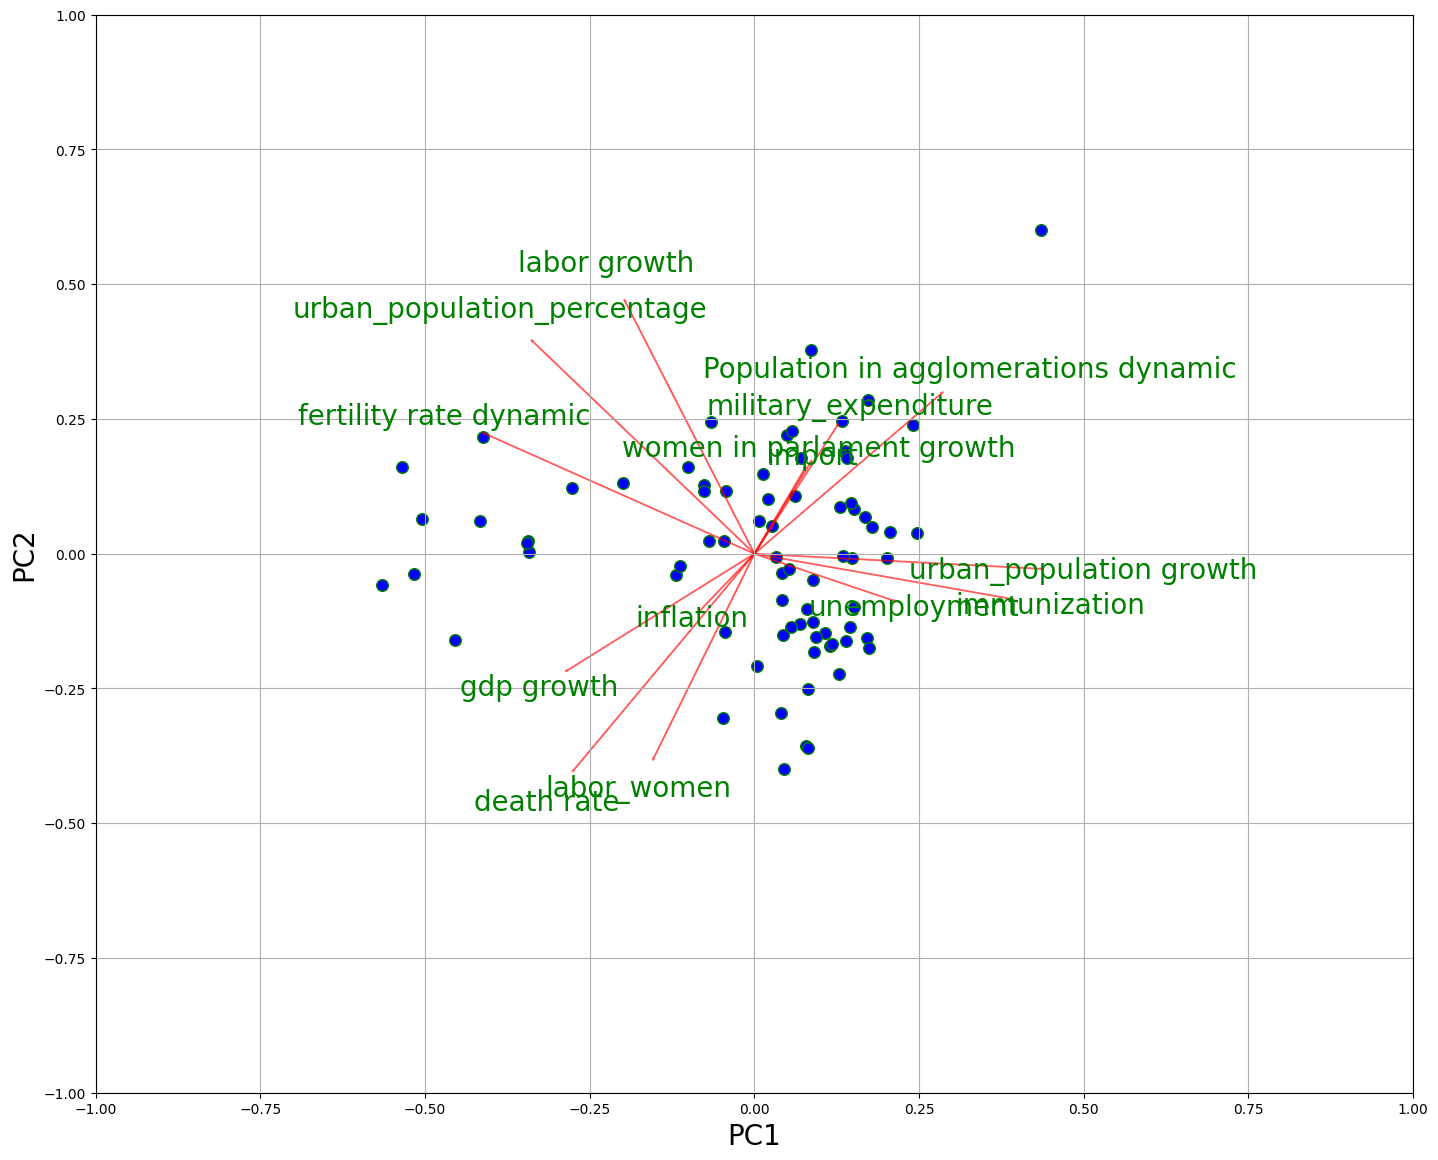

<Figure size 1700x1400 with 0 Axes>

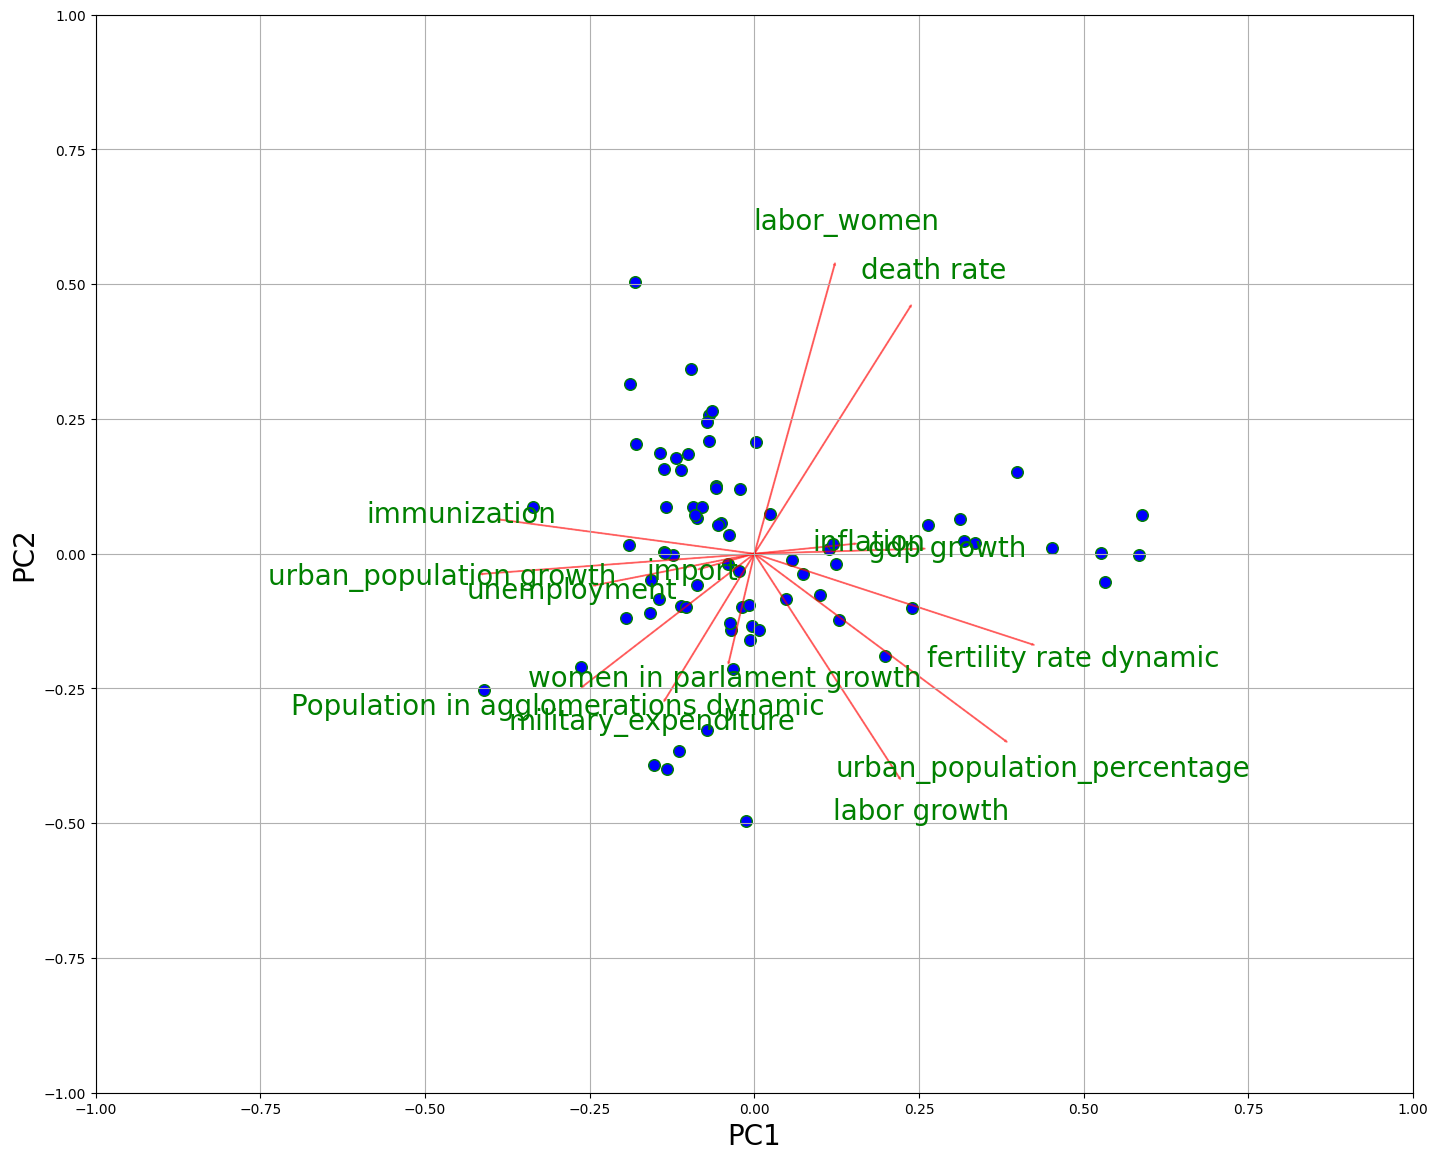

<Figure size 1700x1400 with 0 Axes>

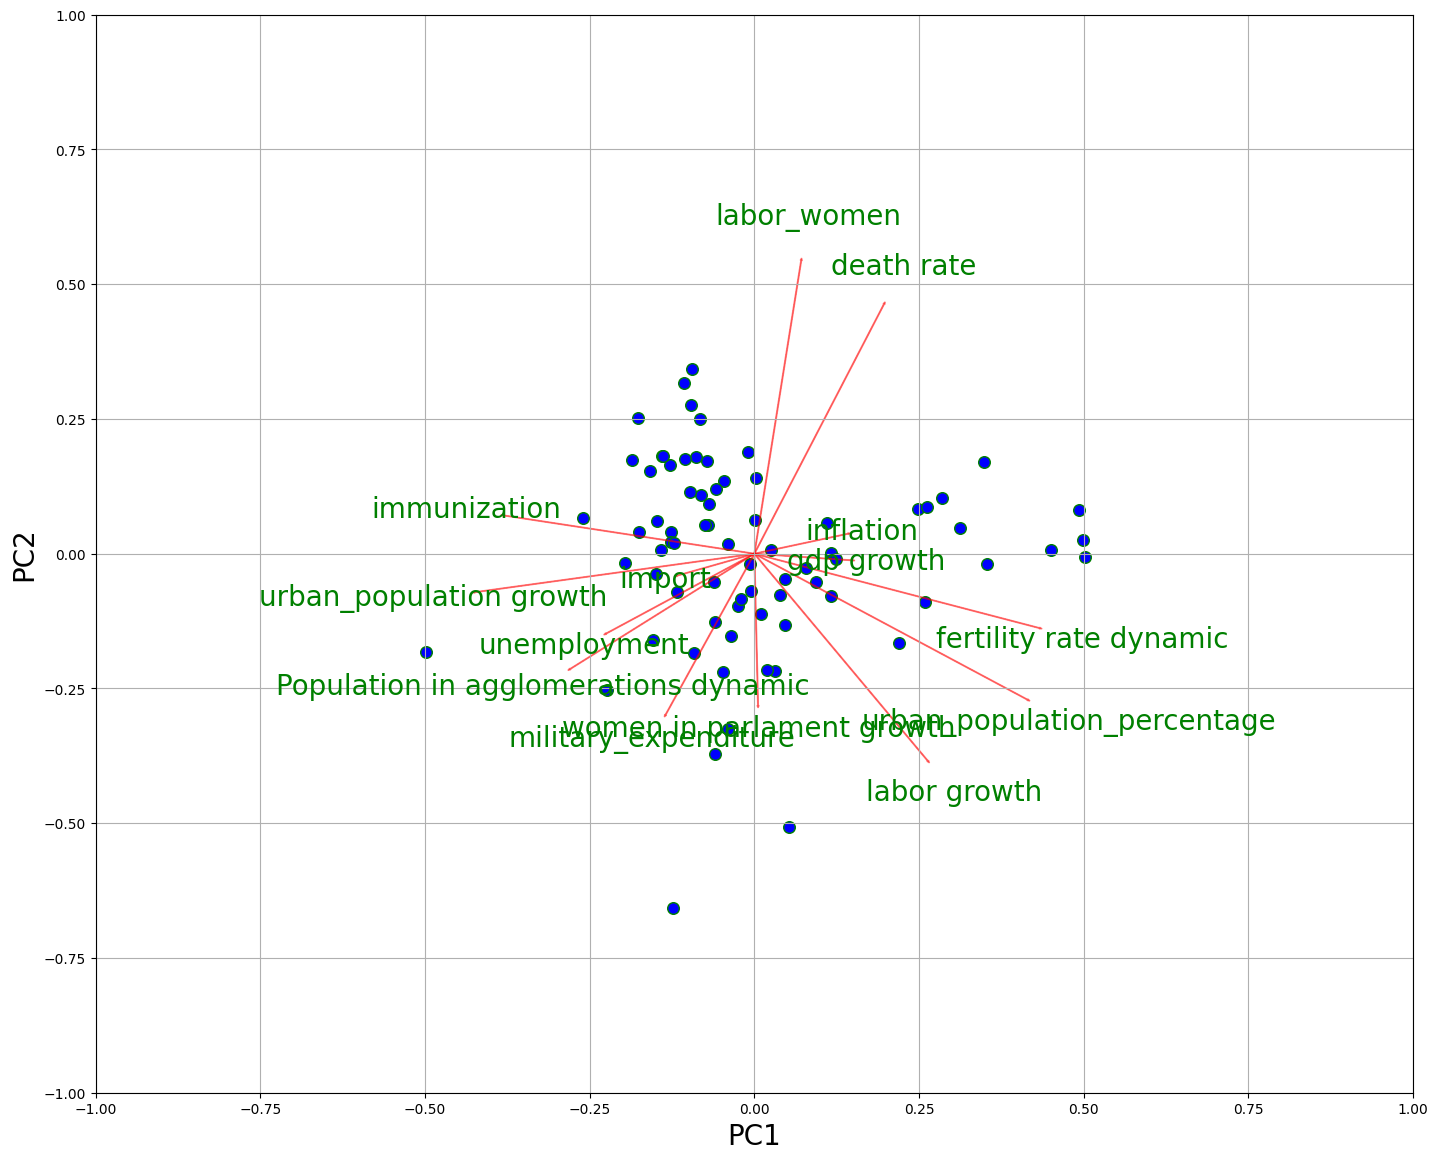

<Figure size 1700x1400 with 0 Axes>

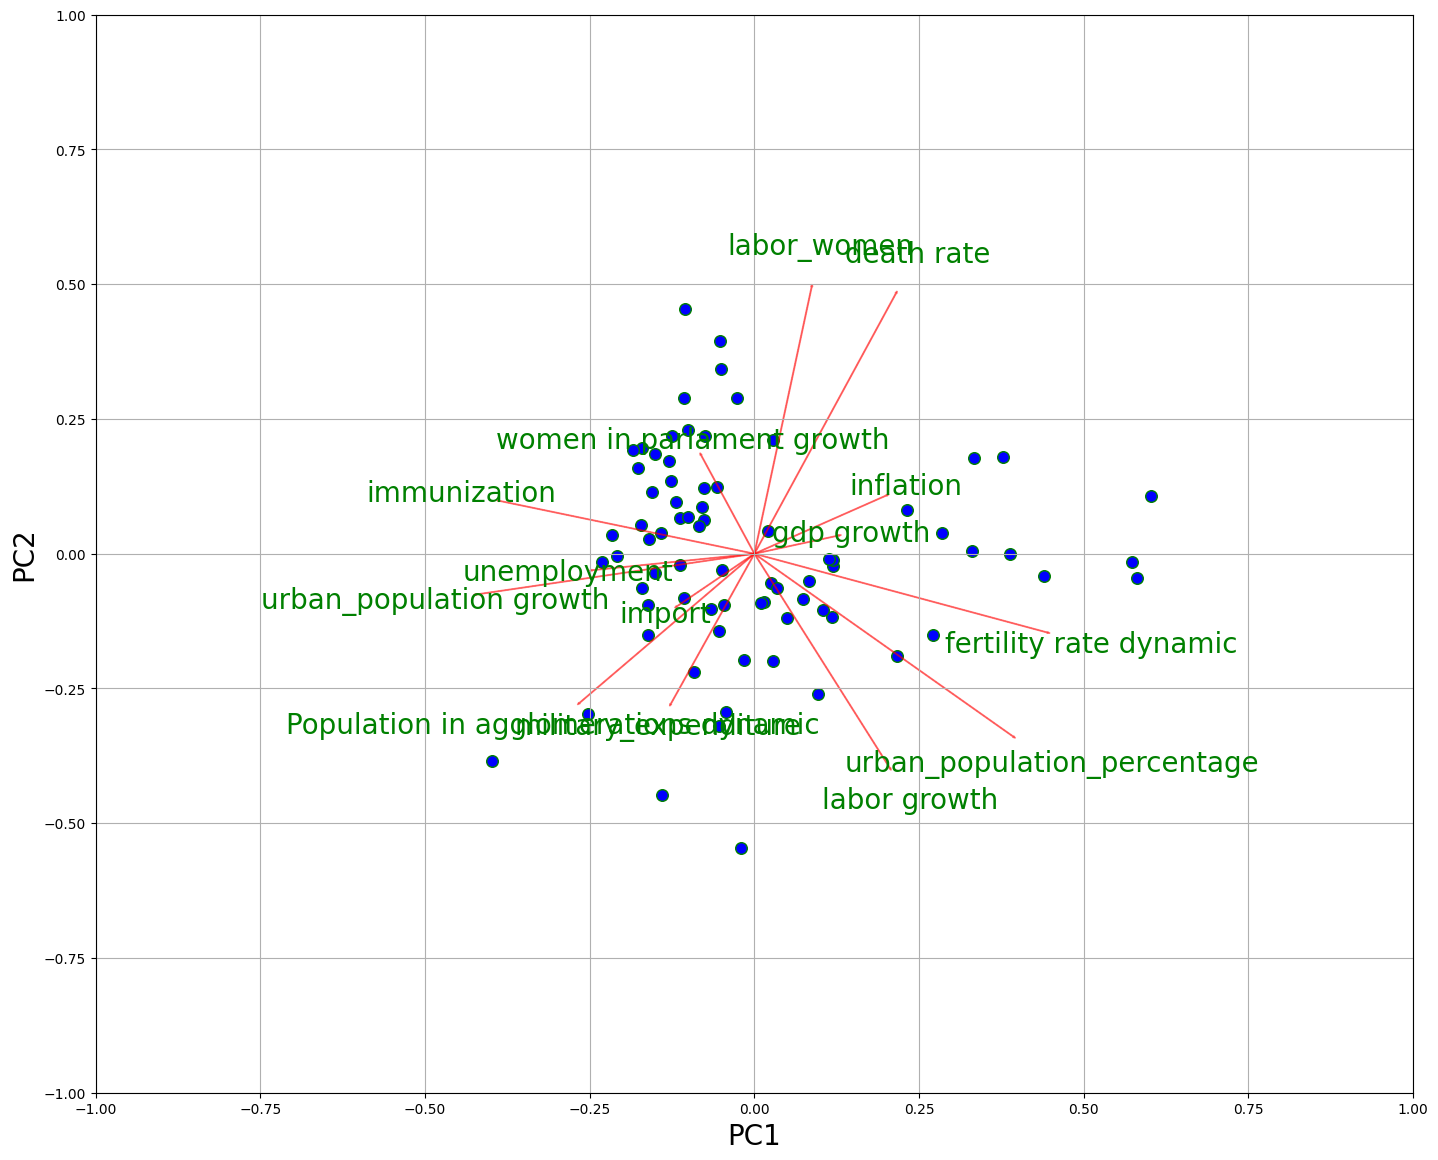

<Figure size 1700x1400 with 0 Axes>

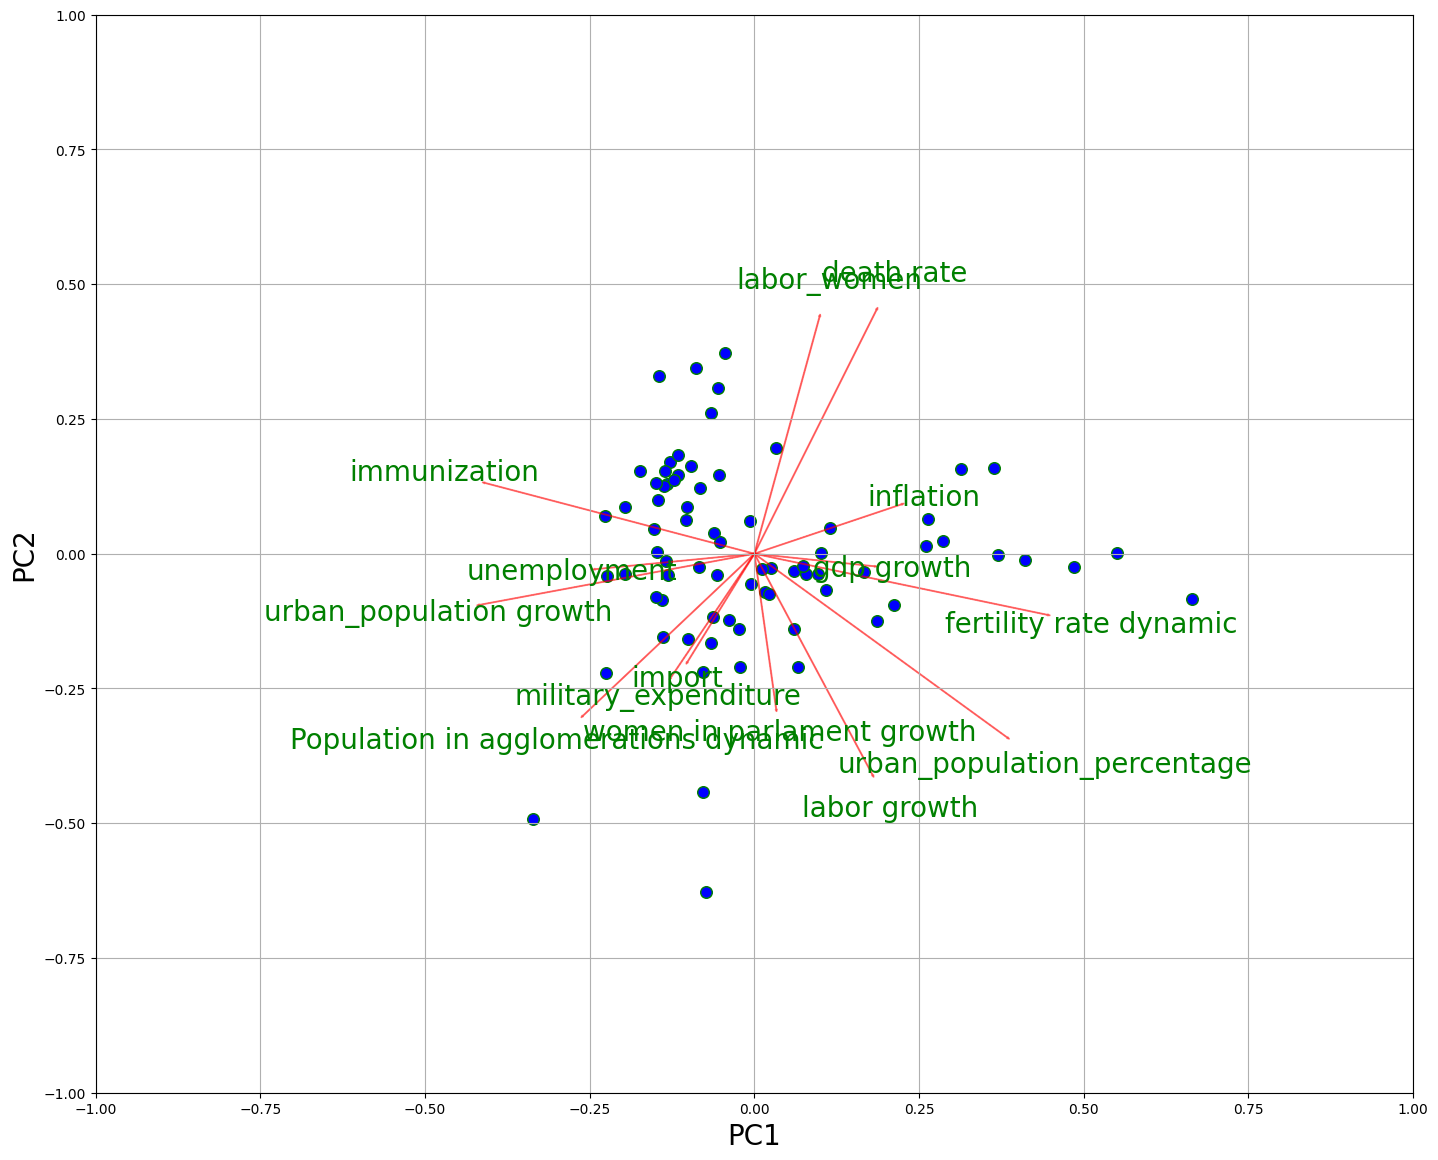

<Figure size 1700x1400 with 0 Axes>

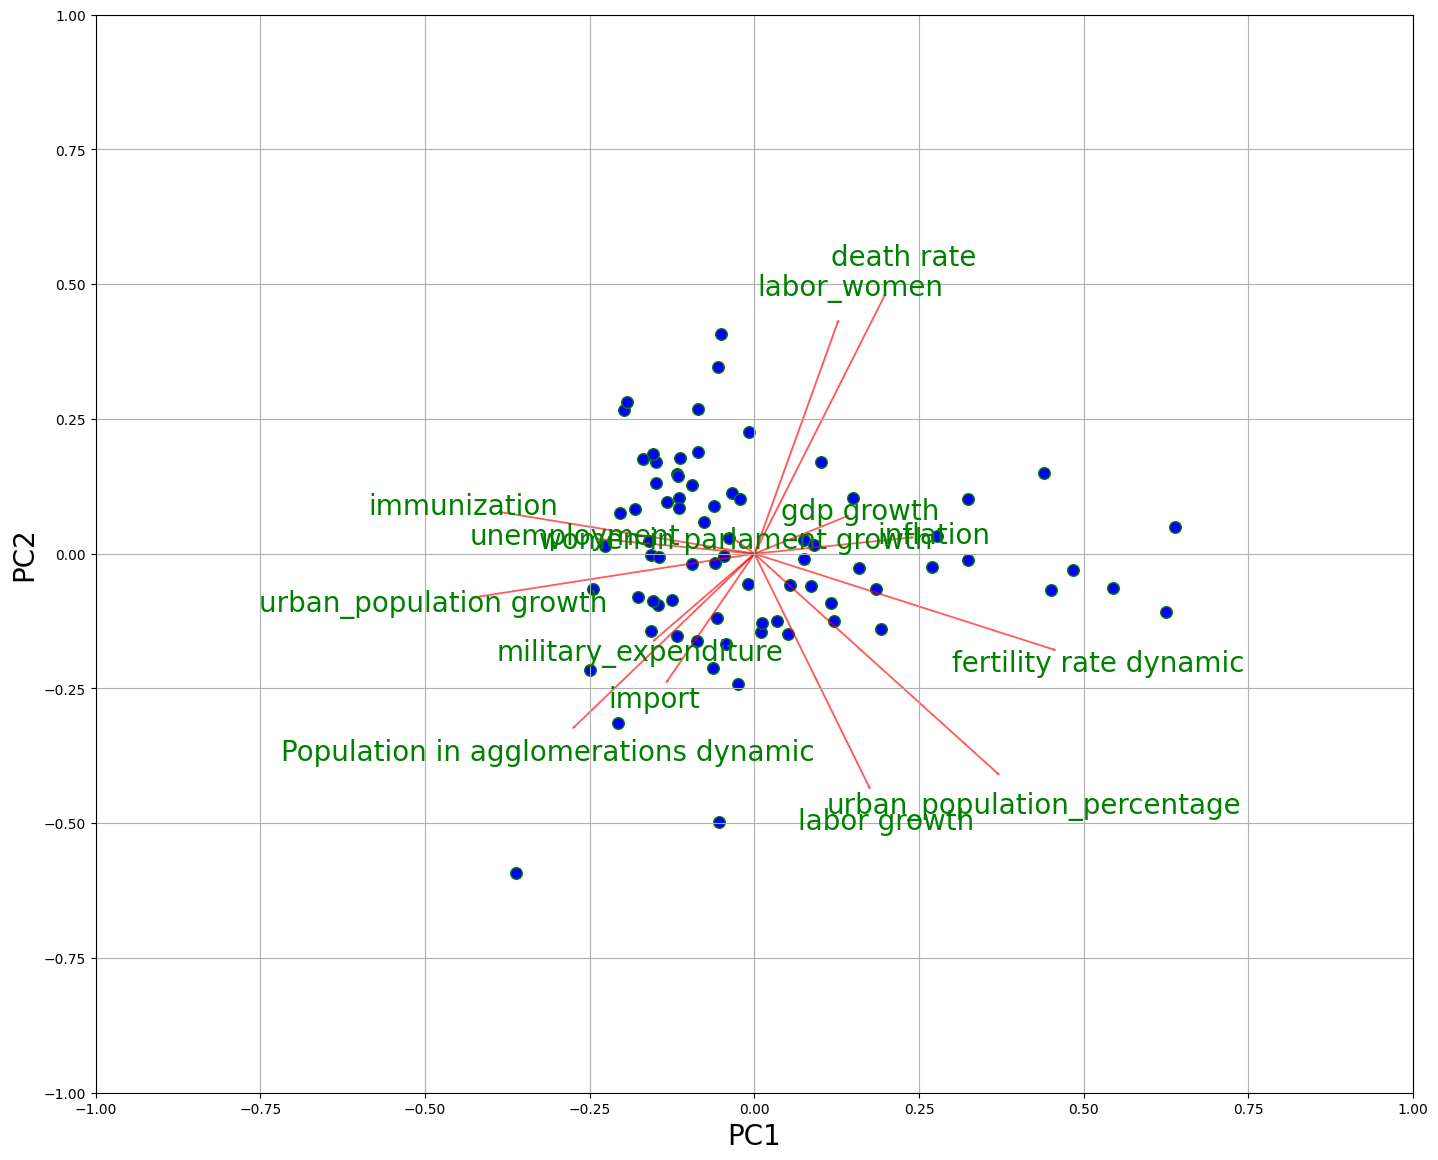

<Figure size 1700x1400 with 0 Axes>

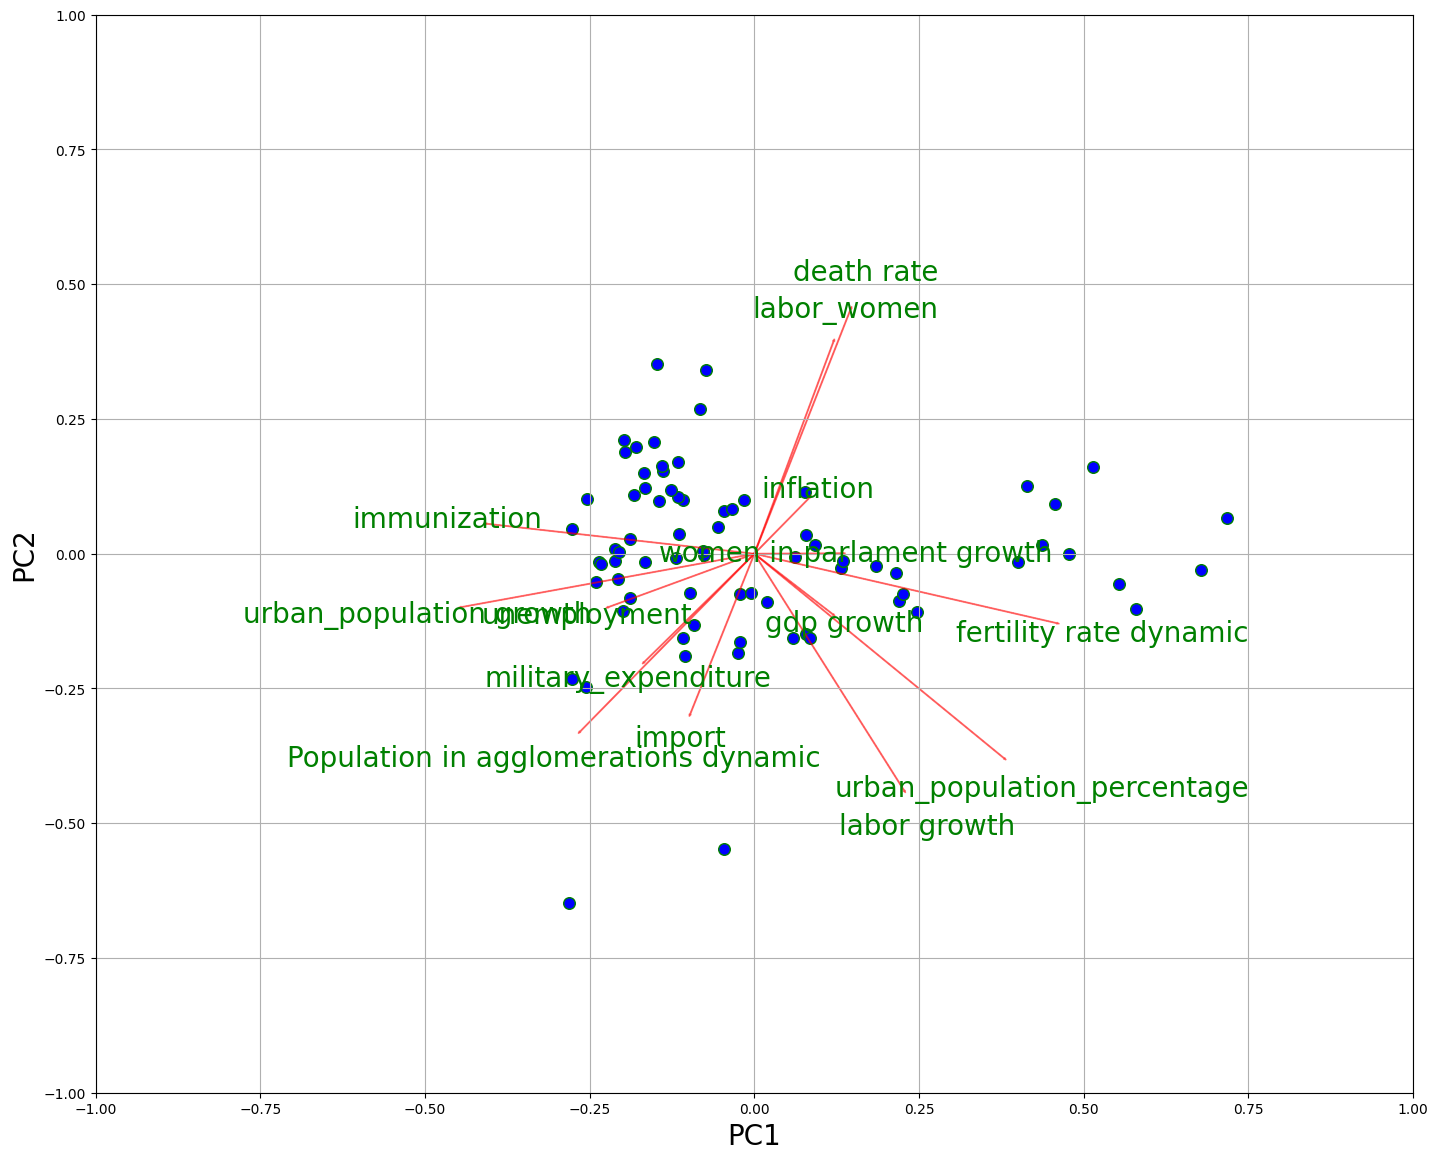

<Figure size 1700x1400 with 0 Axes>

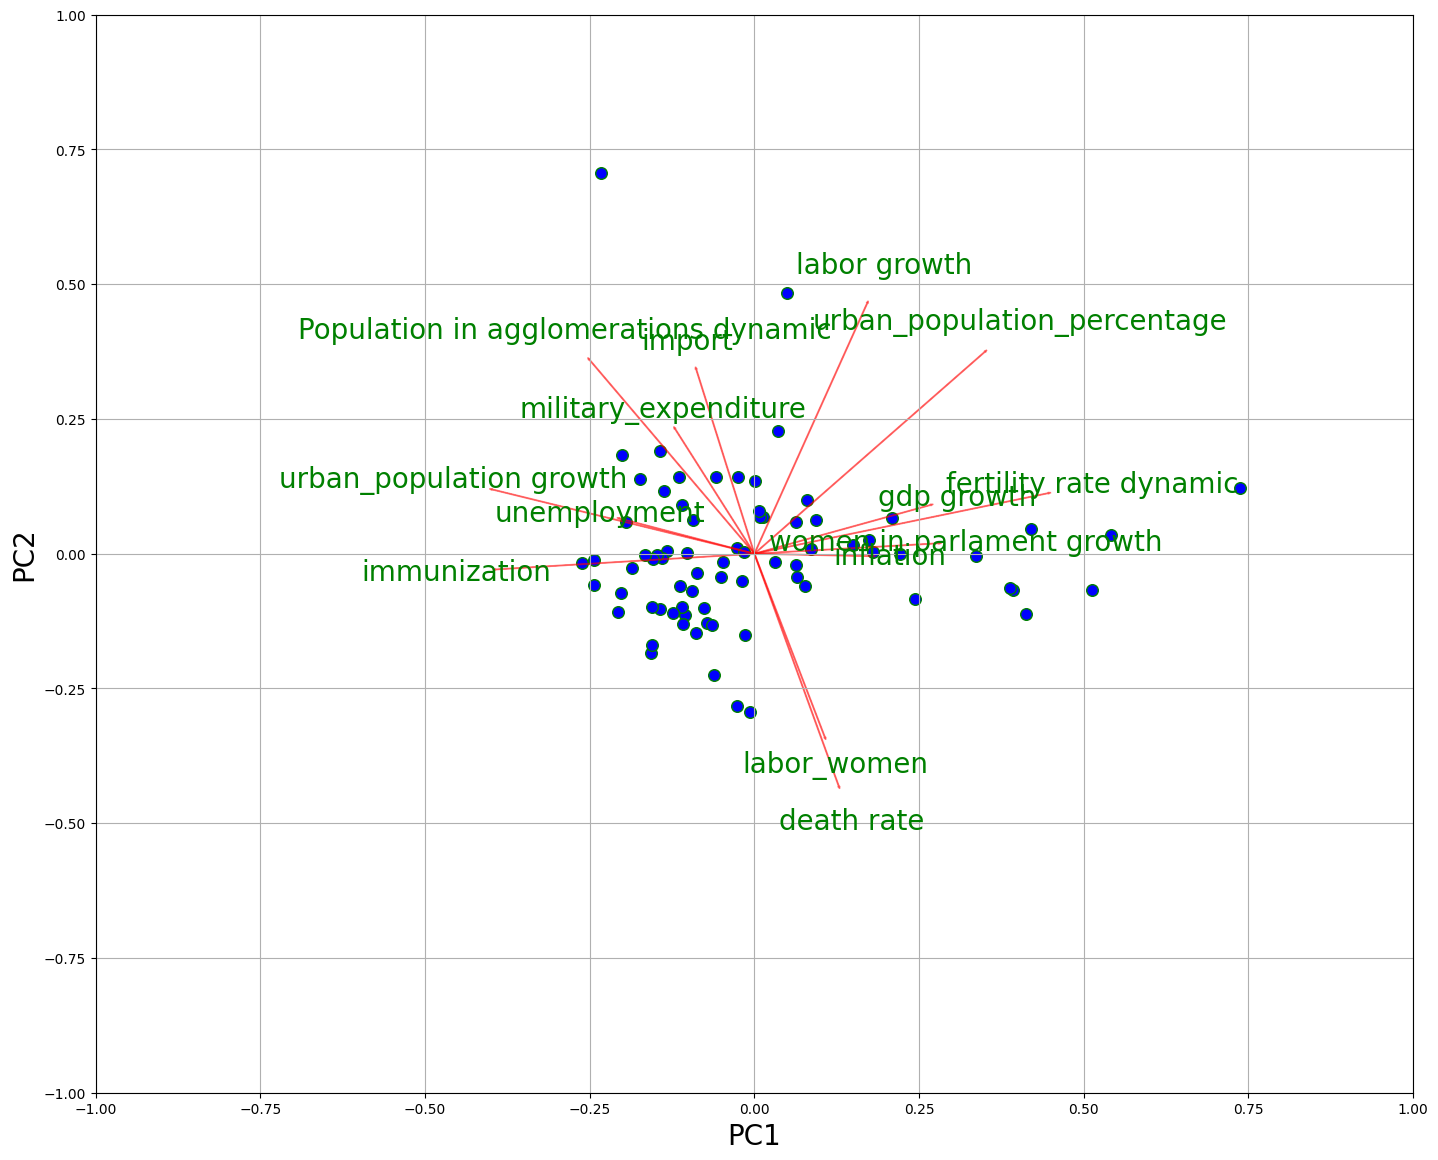

<Figure size 1700x1400 with 0 Axes>

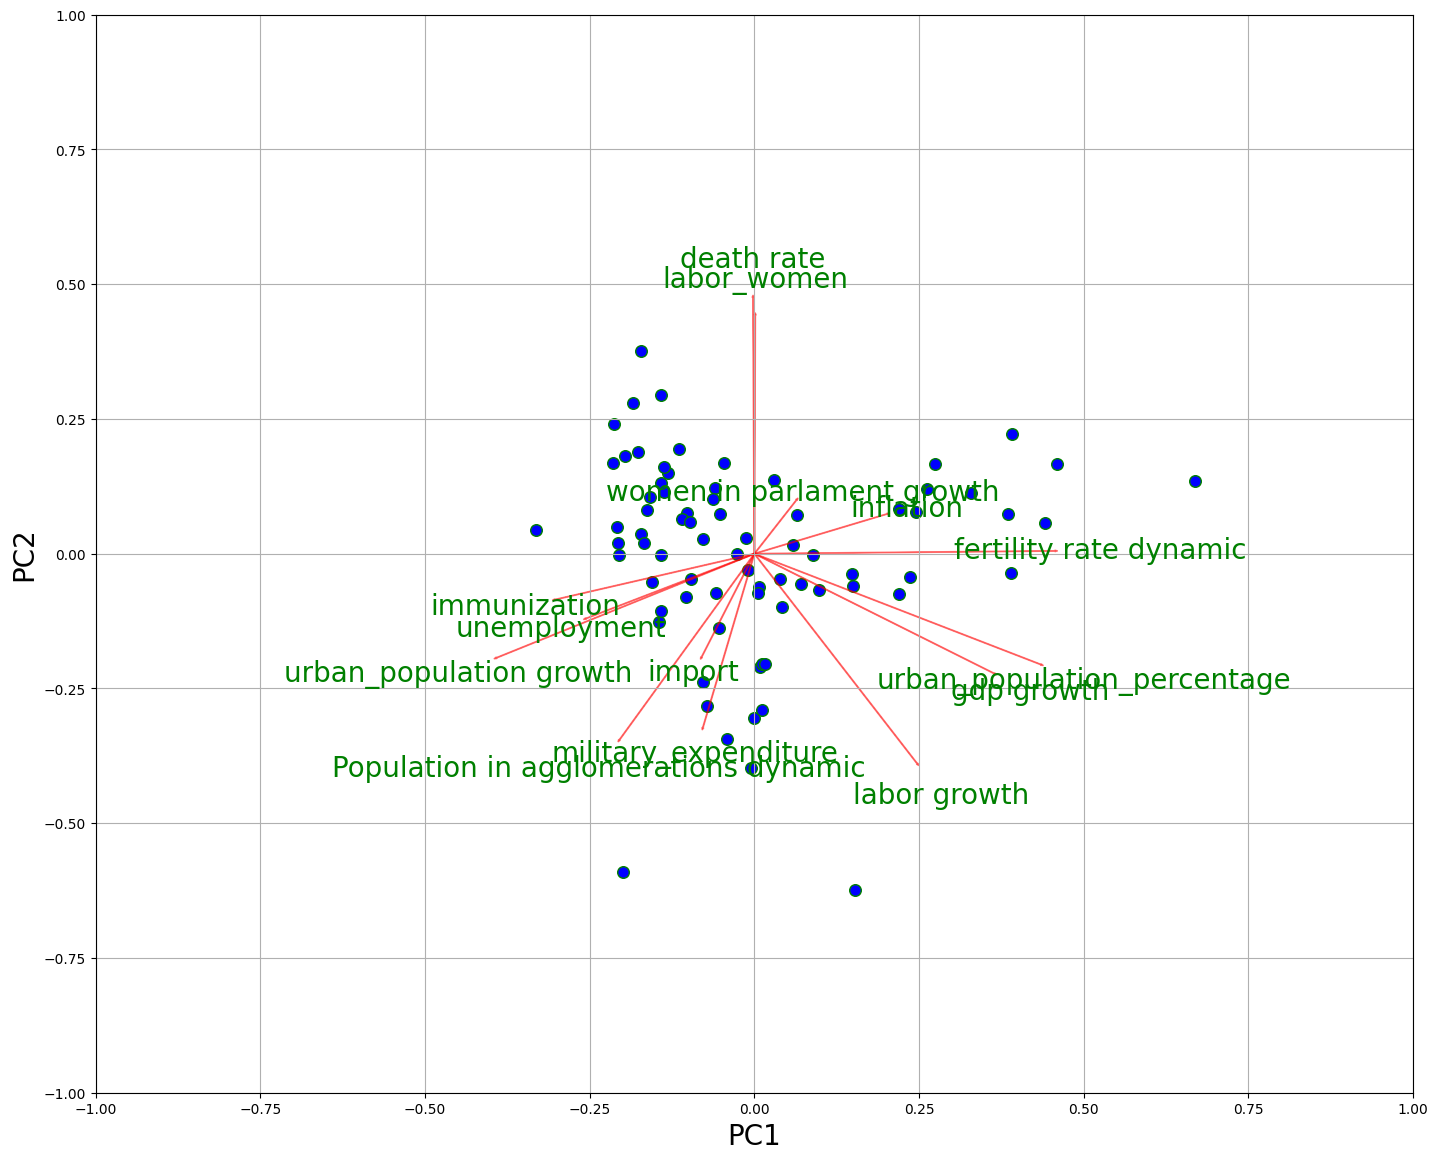

<Figure size 1700x1400 with 0 Axes>

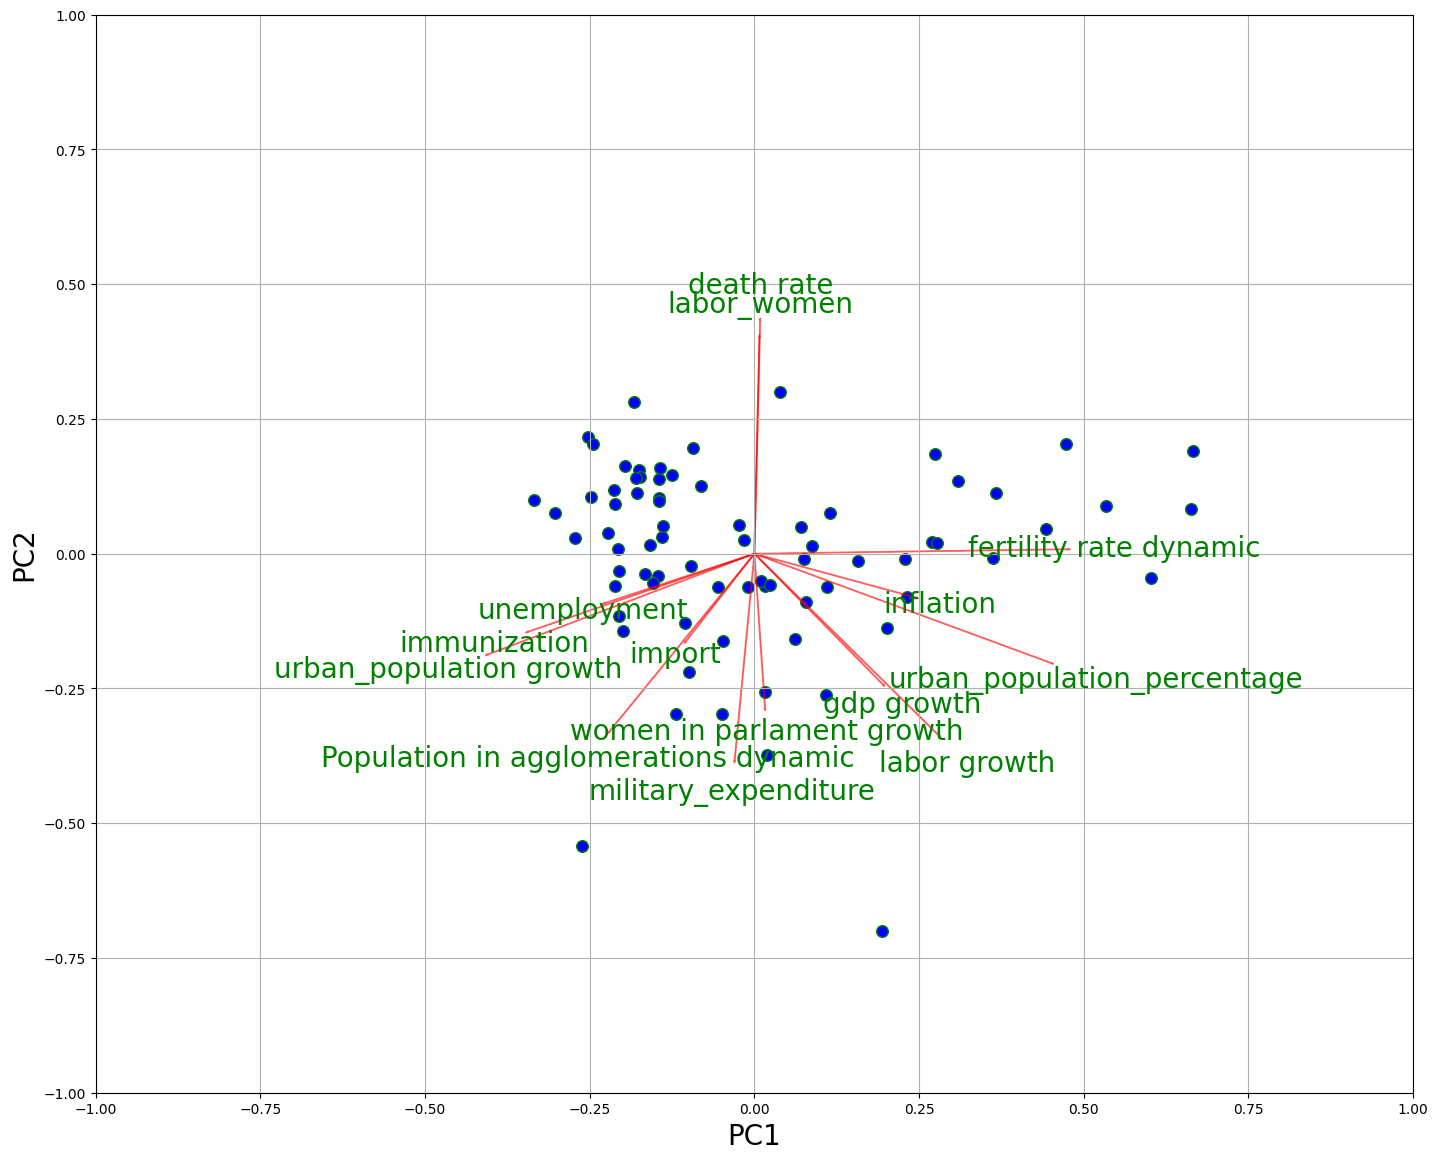

<Figure size 1700x1400 with 0 Axes>

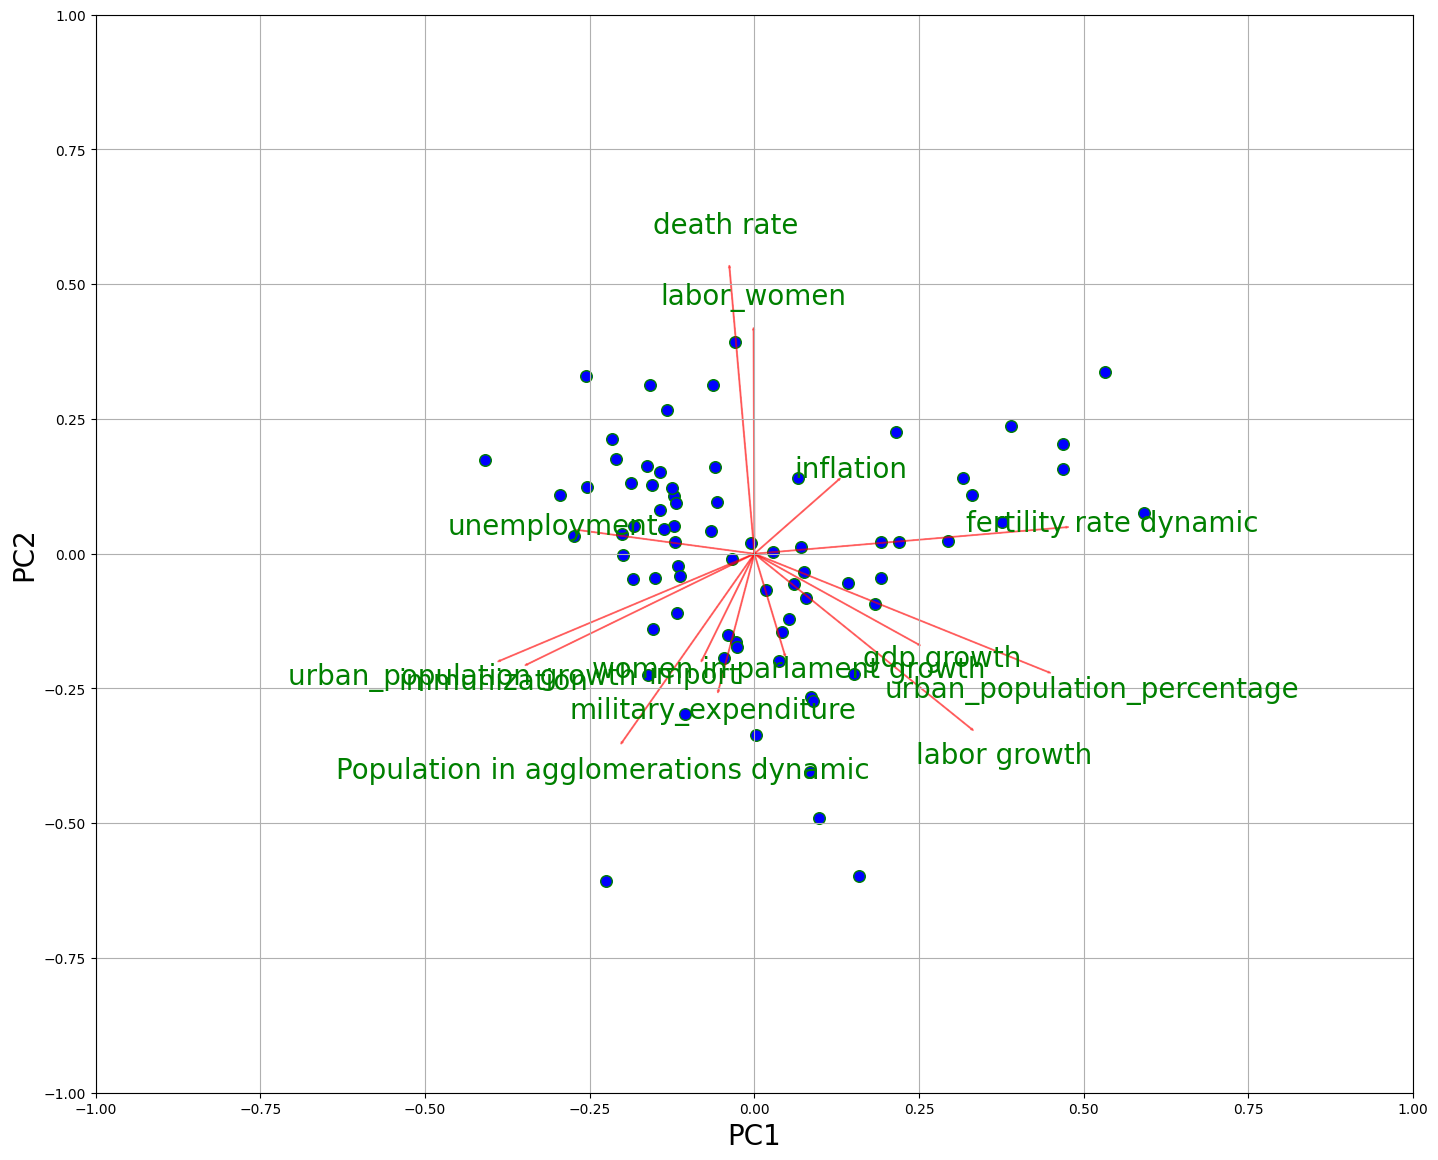

<Figure size 1700x1400 with 0 Axes>

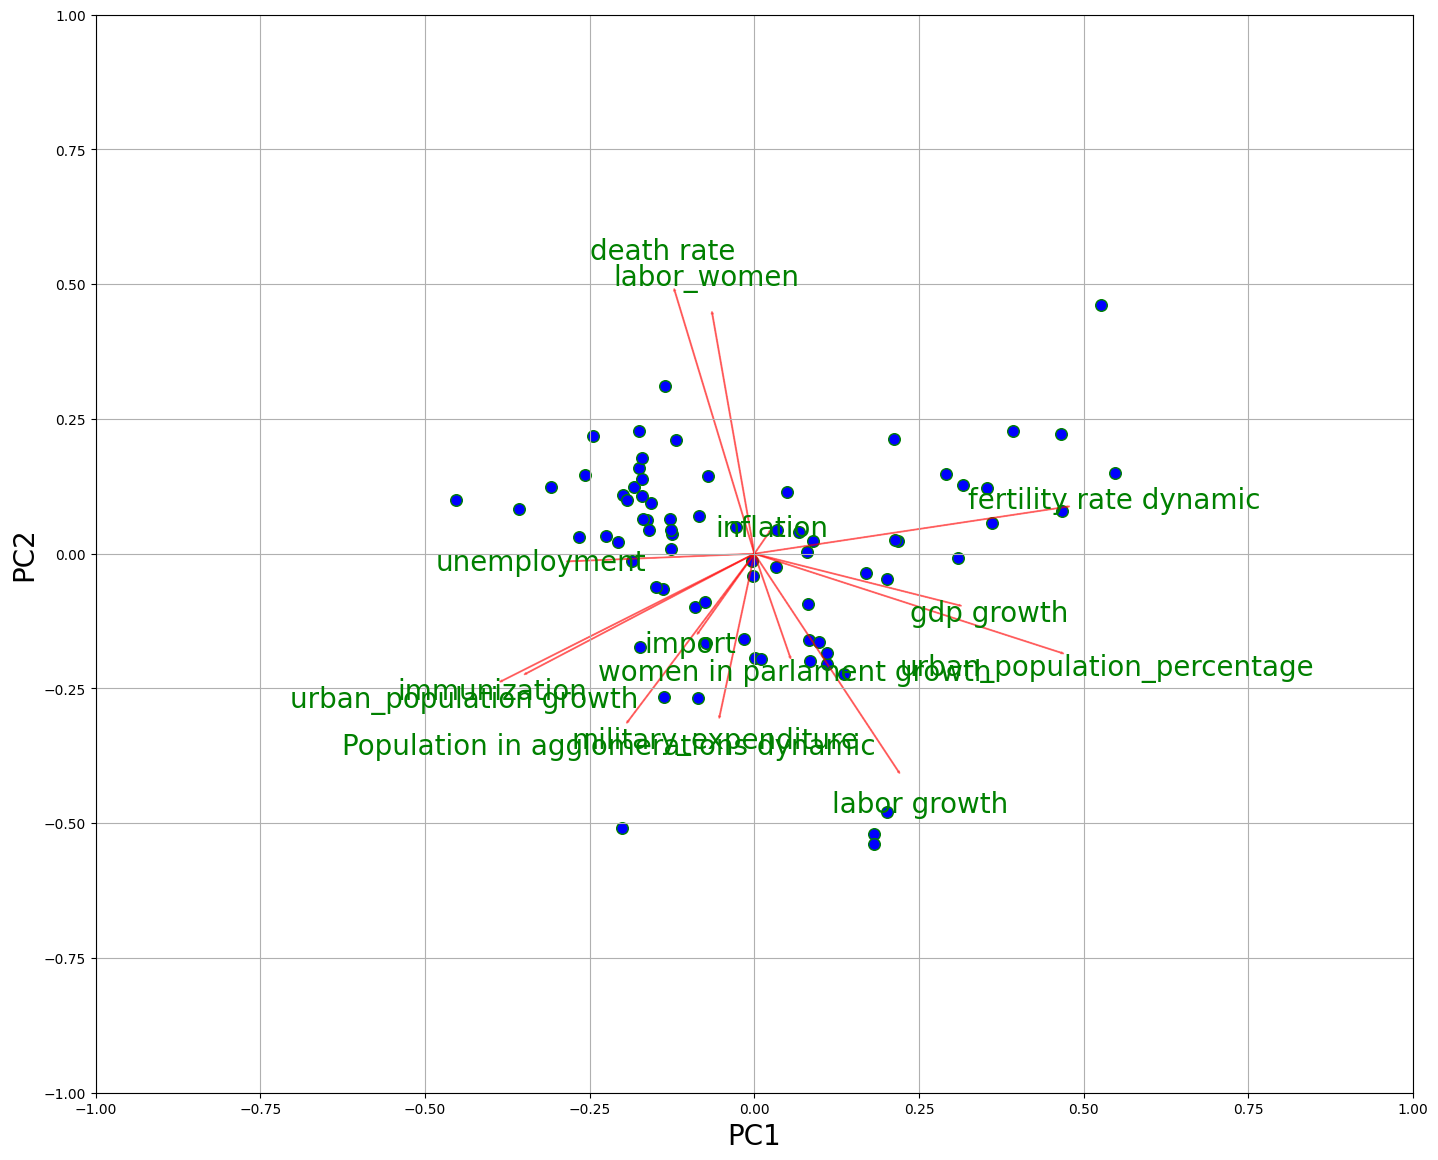

<Figure size 1700x1400 with 0 Axes>

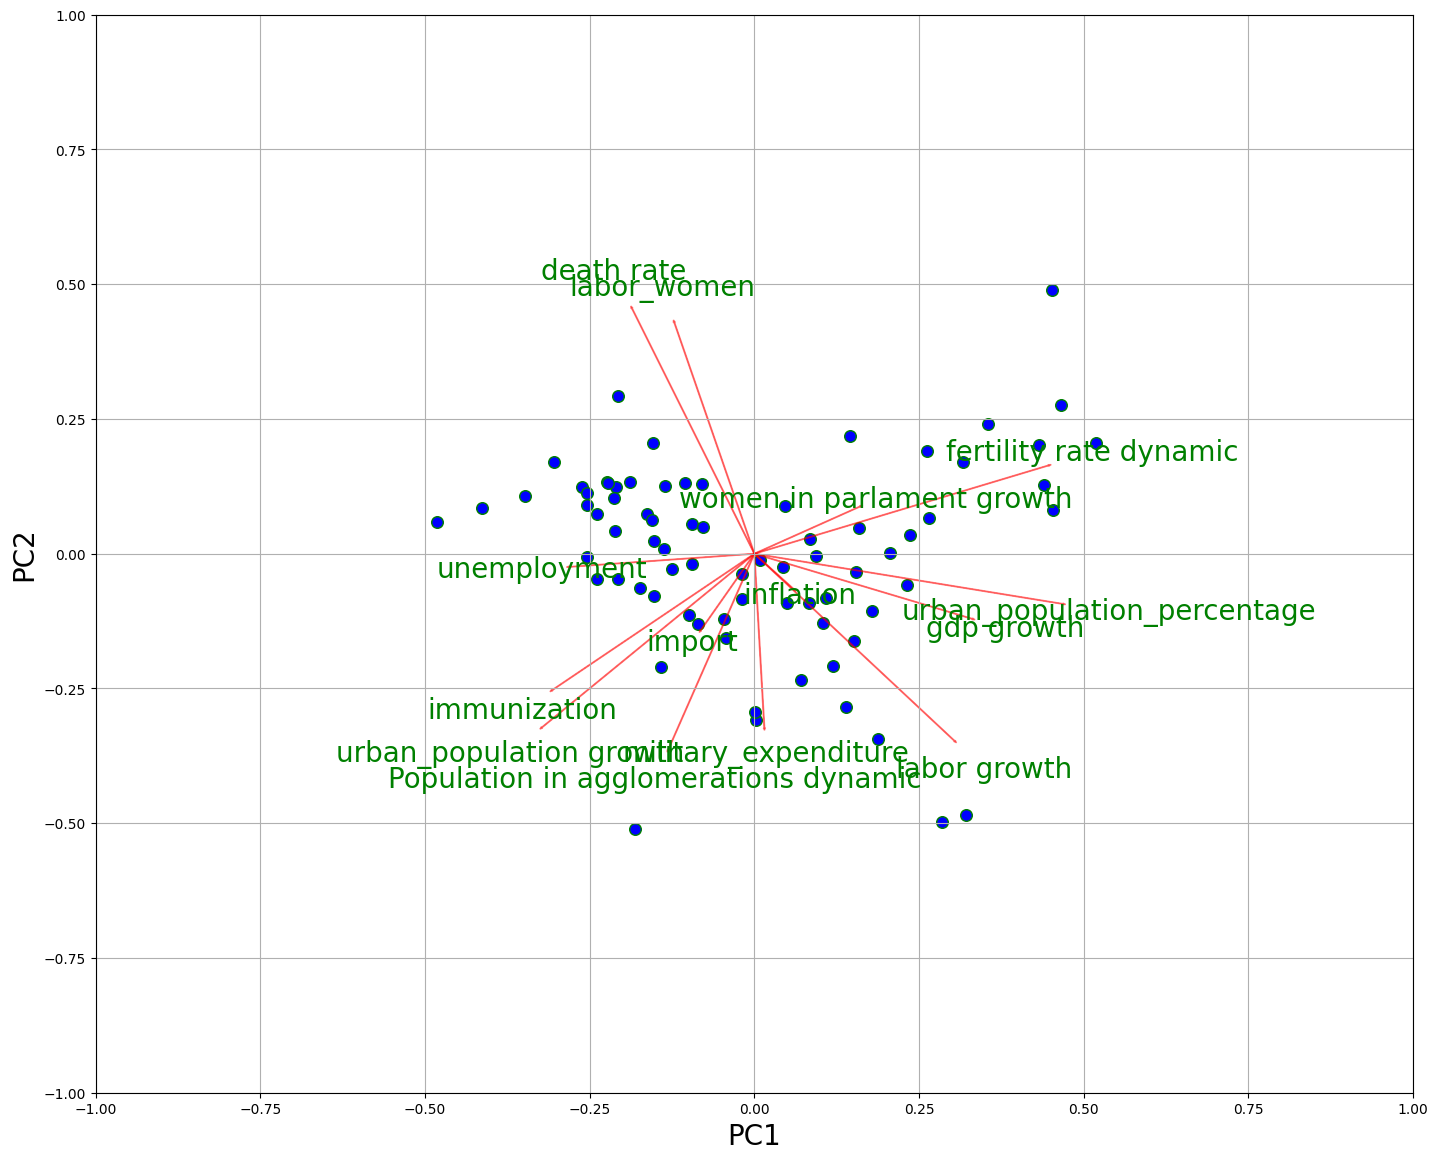

<Figure size 1700x1400 with 0 Axes>

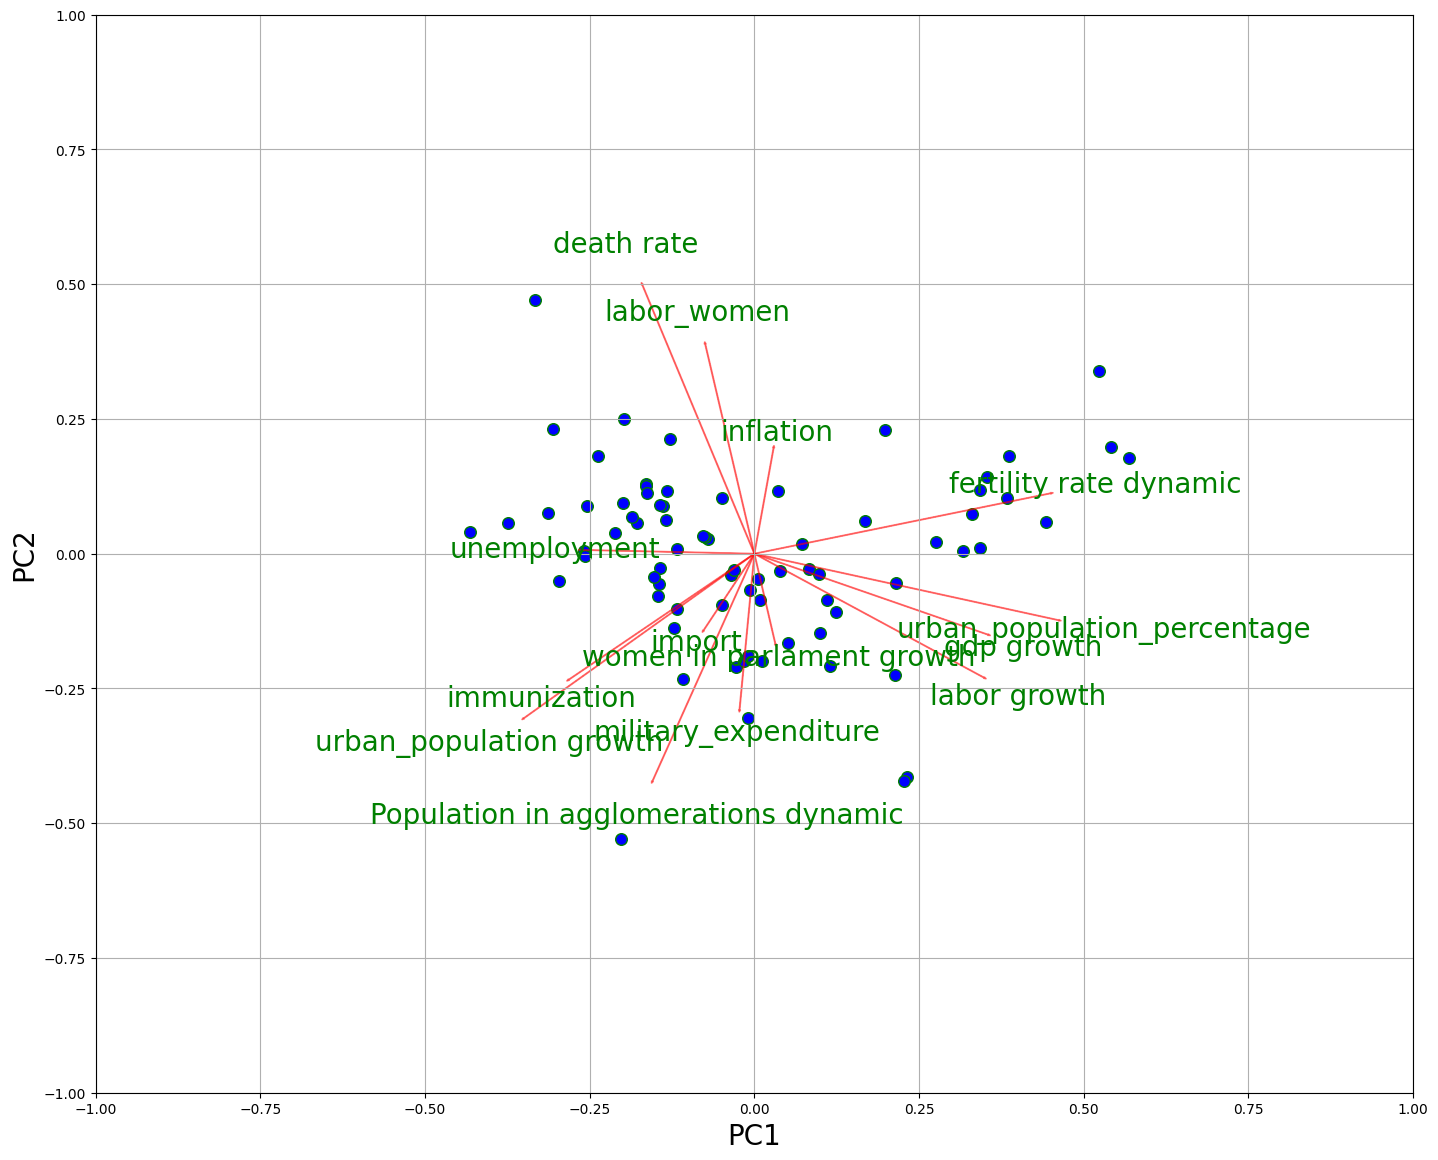

<Figure size 1700x1400 with 0 Axes>

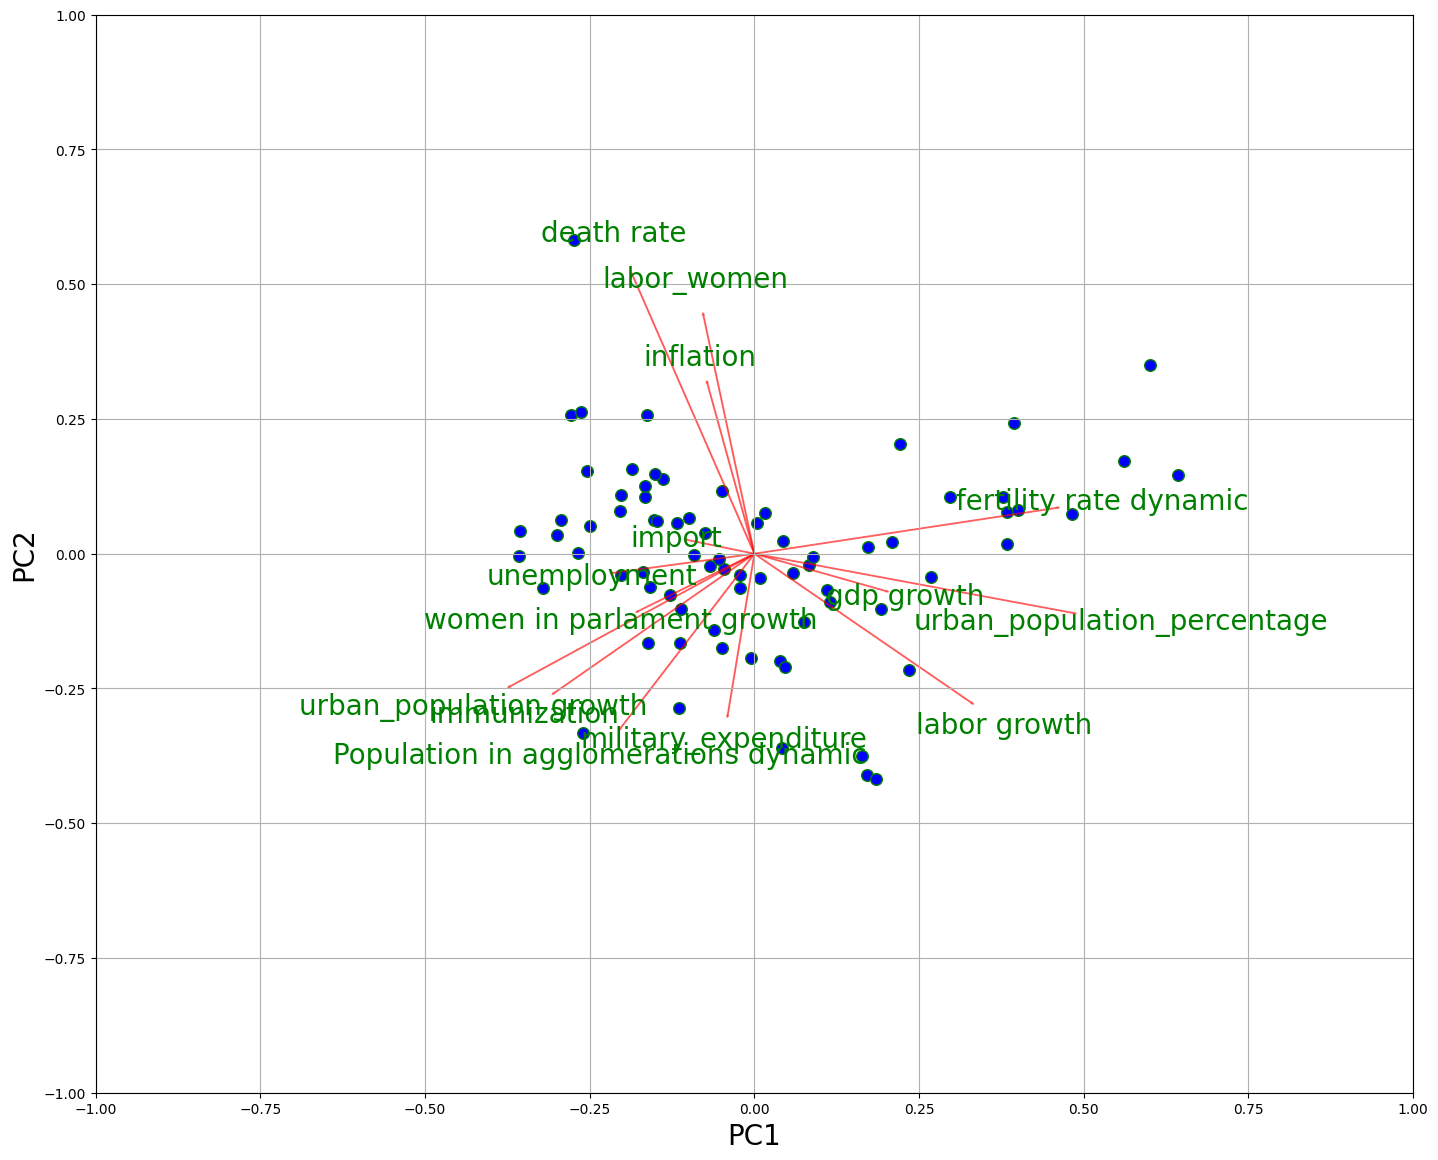

<Figure size 1700x1400 with 0 Axes>

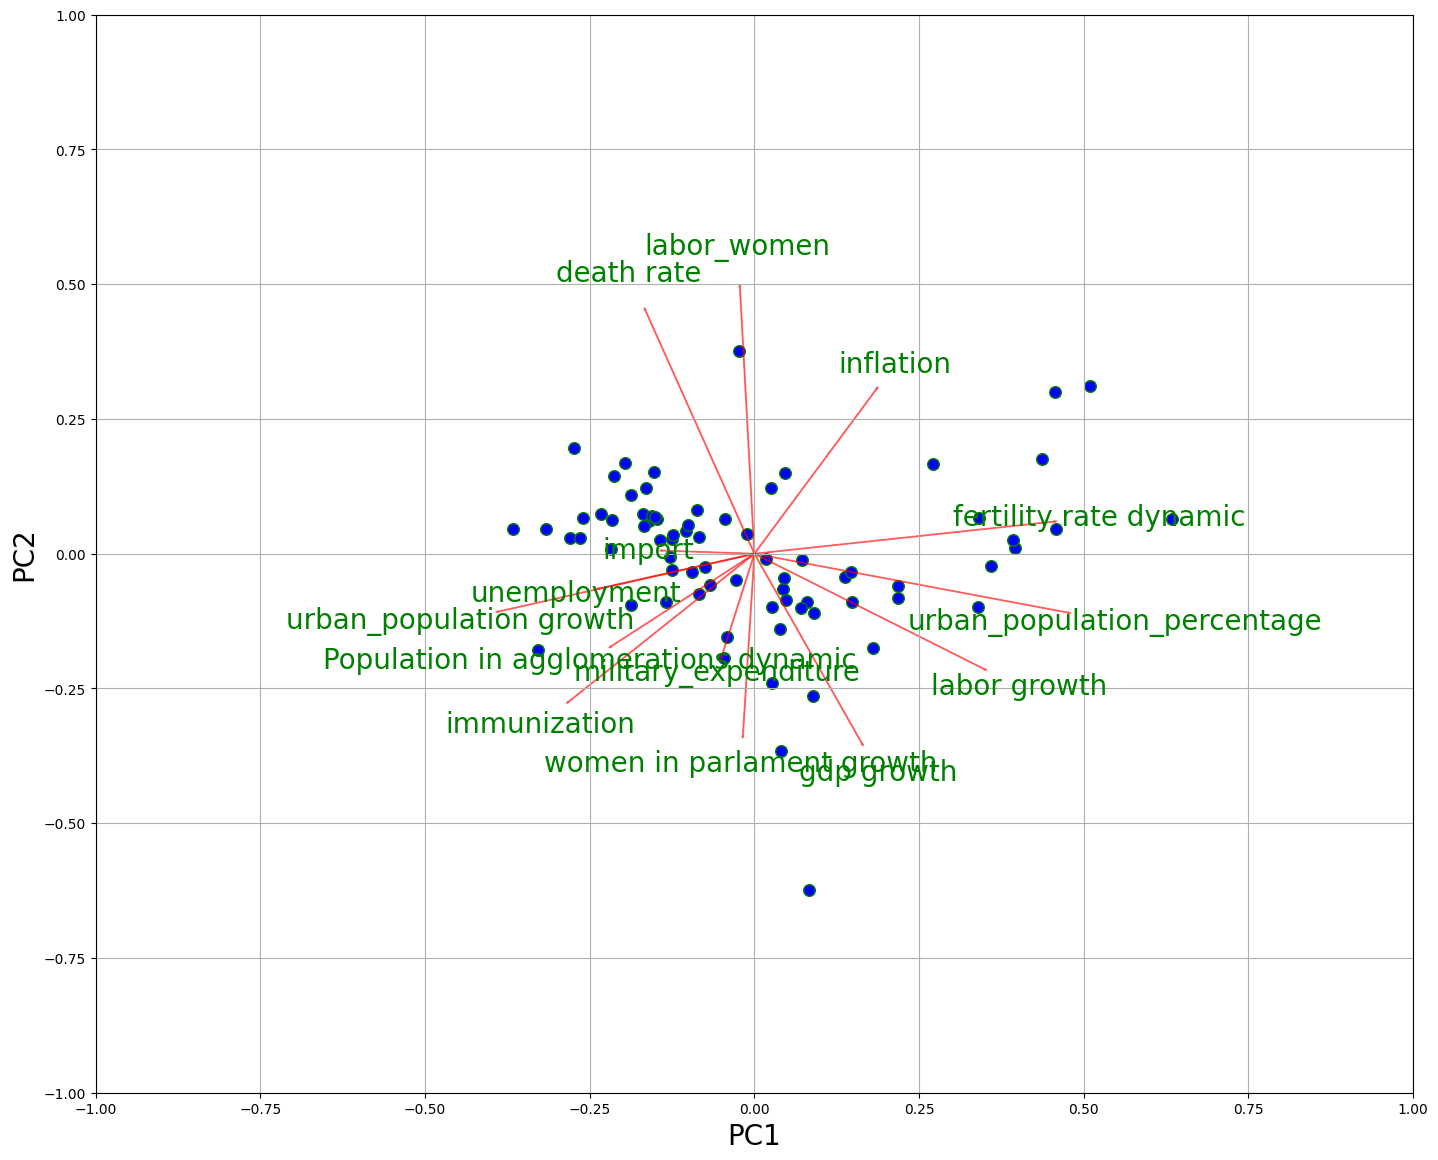

<Figure size 1700x1400 with 0 Axes>

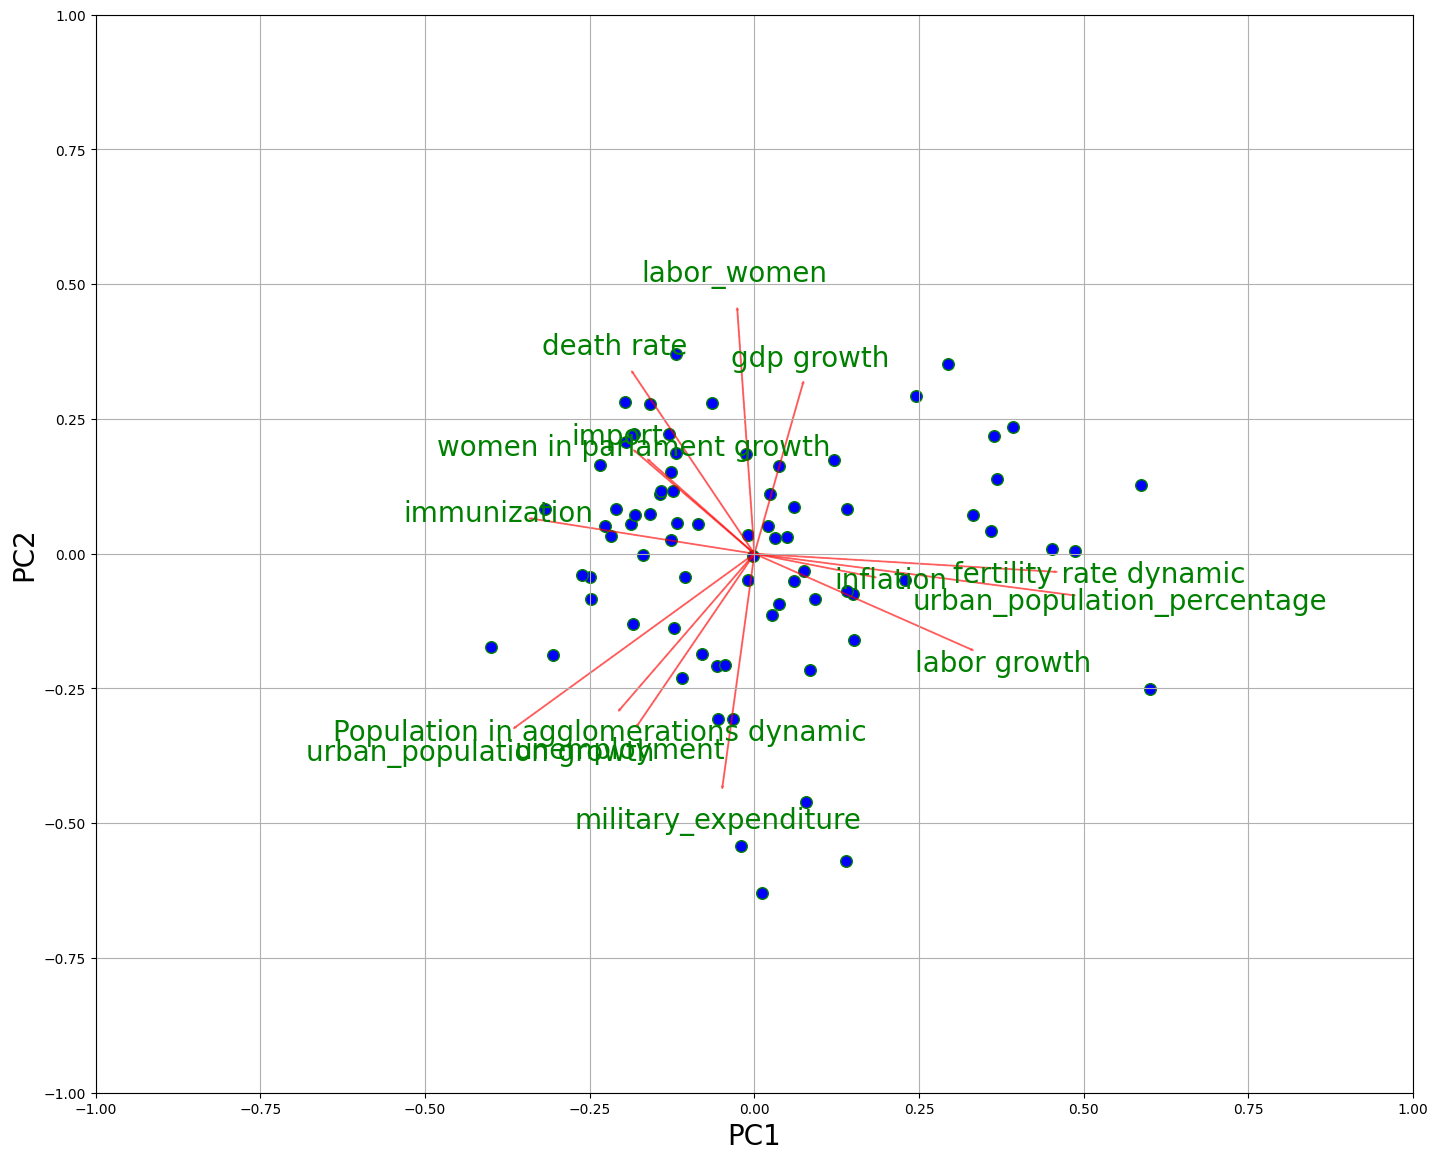

<Figure size 1700x1400 with 0 Axes>

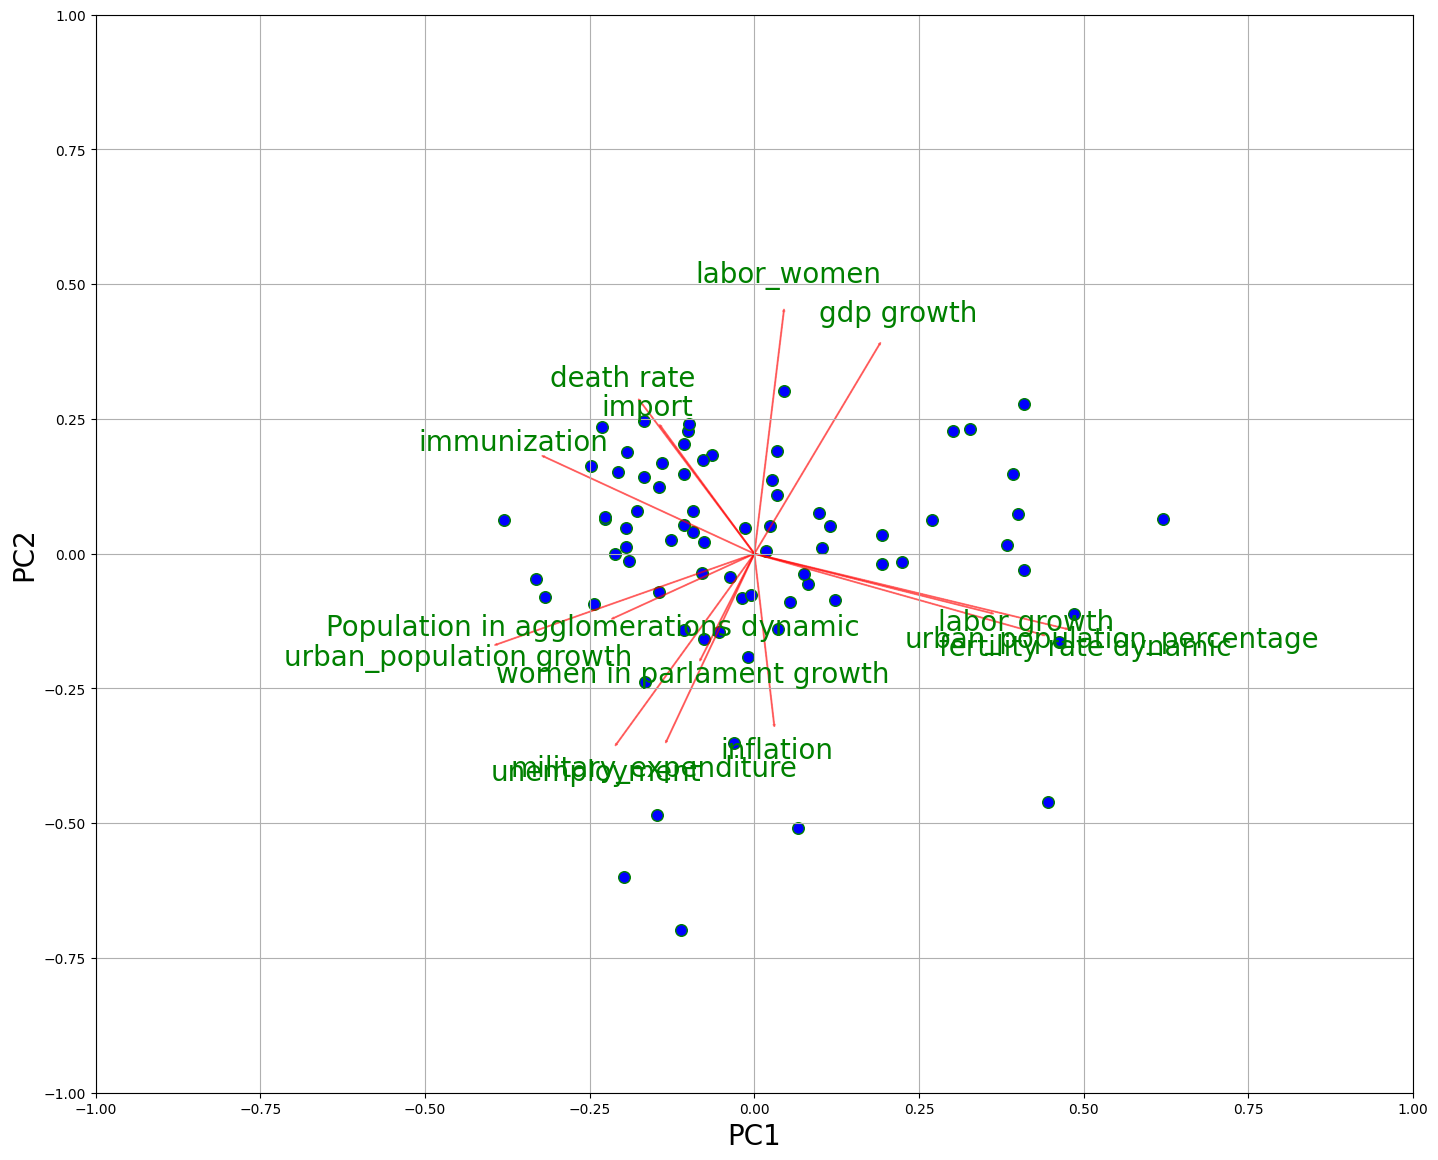

<Figure size 1700x1400 with 0 Axes>

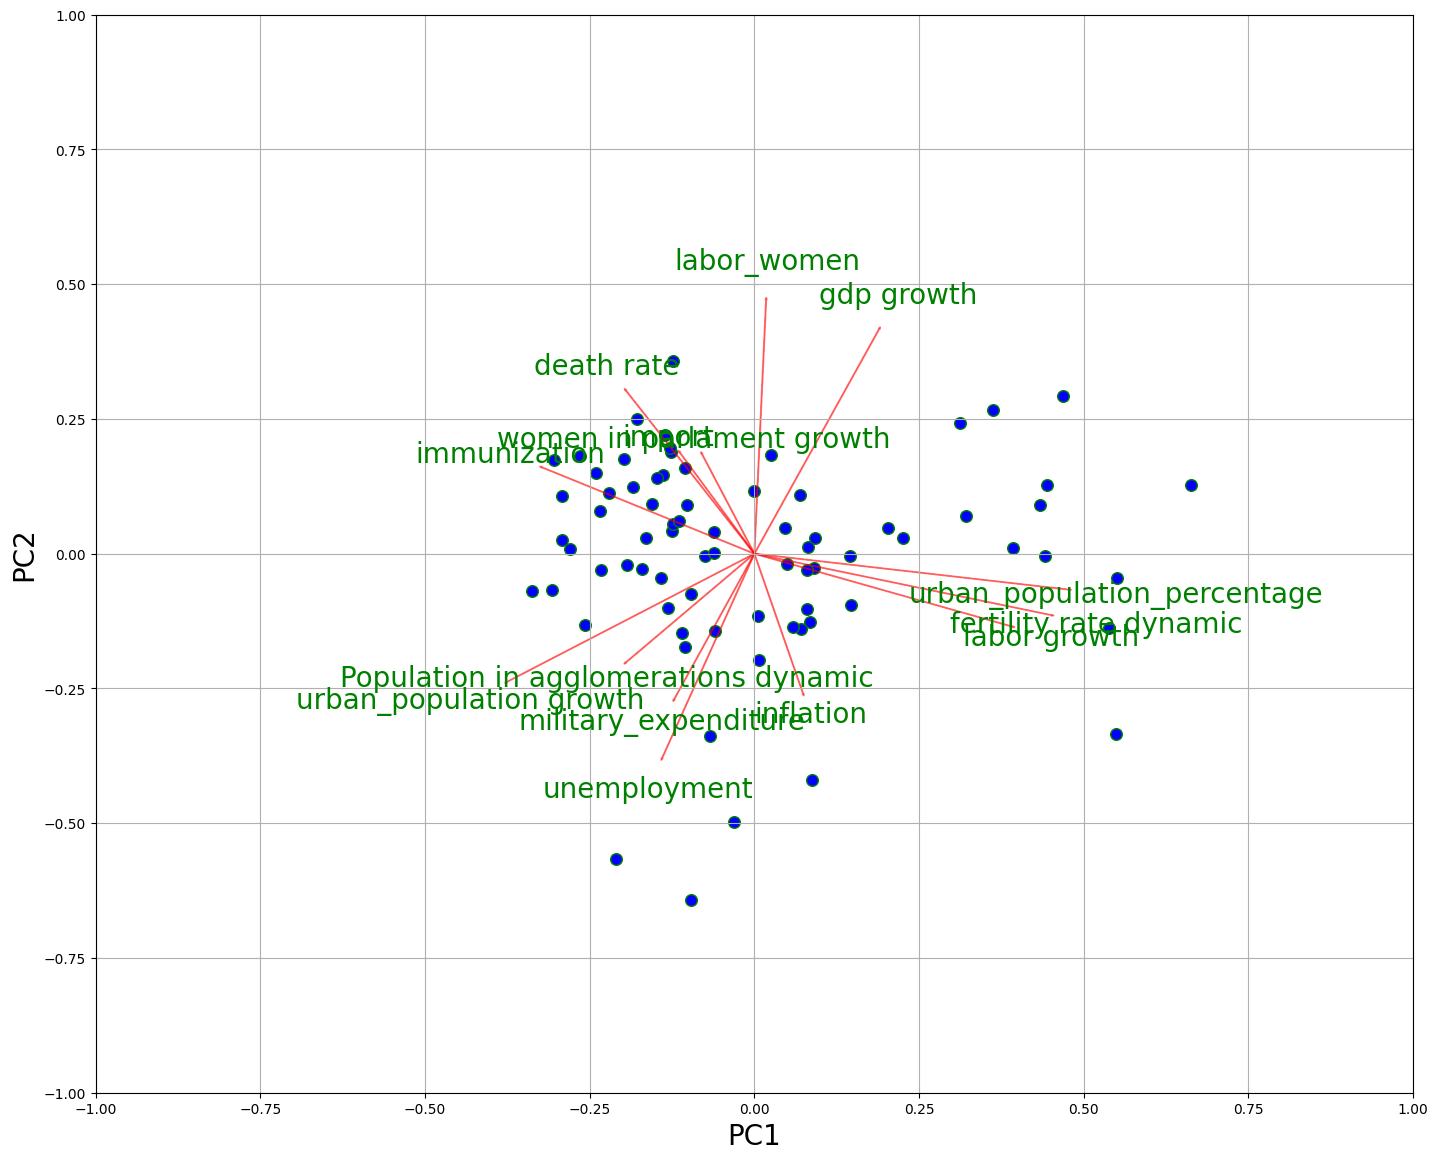

<Figure size 1700x1400 with 0 Axes>

In [17]:
for year in range(19):
  df = all_data_frames[year]
  scaled = preprocessing.scale(df)
  model = PCA()
  x_pca = model.fit_transform(scaled)
  attributes = df.columns.values
  plot1(x_pca,np.transpose(model.components_[0:2, :]),labels=attributes)

# Working with the approach of combining each dataframe into one with new column "year"

## Getting a full DF

In [18]:
# df = clean_csv('Imports-of-goods-and-services-of-GDP.csv')
all_data_frames_by_feature=[clean_csv("/content/drive/MyDrive/eksploracja_dane/final/"+char_files[idx]) for idx in range(len(characteristics))] #list of all dataframes by feature

features = {i:[] for i in characteristics} # creating df from dict
features['year'] = []
df_indexes = []

for outer_index, df in enumerate(all_data_frames_by_feature):
  df = df.drop('2000', axis='columns') if '2000' in df.columns else df
  for country, df_series in df.iterrows():
    year = df_series.index
    for inner_index,row in enumerate(df_series):
      df_indexes.append(country) if len(df_indexes) <1425 else df_indexes #tworze liste krajow po 19 razy wypisanych zeby uzyc jako index w dfce
      features['year'].append(year[inner_index]) if len(features['year']) <1425 else features['year'] # to samo z latami bo leca 2001-2019 dla kazdego kraju
      features[characteristics[outer_index]].append(row) #do dickta z featurami jako klucze dopisuje kazda wartość z oryginalnej dfki

full_df = pd.DataFrame(features, index=df_indexes)
full_df

<ipython-input-9-ef22c5eb2408>:9: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df =df.interpolate()
<ipython-input-9-ef22c5eb2408>:9: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df =df.interpolate()
<ipython-input-9-ef22c5eb2408>:9: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df =df.interpolate()
<ipython-input-9-ef22c5eb2408>:9: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df =df.interpolate()
<ipython-input-9-ef22c5eb2408>:9: FutureWarning: DataFrame.interpolate with object dtype is 

women in parlament growth  death rate  fertility rate dynamic  \
Angola                   0.000000   17.597000                6.601000   
Angola                   0.000000   17.090000                6.567000   
Angola                   0.000000   16.522000                6.533000   
Angola                  -0.029412   15.903000                6.499000   
Angola                   0.000000   15.240000                6.461000   
...                           ...         ...                     ...   
World                    0.029791    7.619720                2.455270   
World                    0.010594    7.569241                2.444646   
World                    0.021608    7.565904                2.427212   
World                    0.021515    7.556927                2.415040   
World                    0.022356    7.524270                2.401804   

        gdp growth  immunization     import   inflation  labor_women  \
Angola    4.205999     60.000000  74.946851  106.352125    49.189641   
Angola   13.665687     59.000000  48.216747  196.984105    49.263864   
Angola    2.989850     44.000000  49.579889   93.926854    49.344129   
Angola   10.952862     43.000000  45.199579   33.440179    49.426600   
Angola   15.028915     21.000000  41.064694   42.375561    49.505936   
...            ...           ...        ...         ...          ...   
World     3.168373     84.949254  27.584486    2.219377    39.230014   
World     2.825118     85.204317  26.657103    1.716663    39.275524   
World     3.394423     85.257266  27.579101    2.961143    39.332571   
World     3.269673     85.648060  28.555188    2.703272    39.353295   
World     2.600878     85.696183  27.758059    2.381348    39.459695   

        labor growth  military_expenditure  urban_population growth  \
Angola      0.033833              4.524354                51.274000   
Angola      0.034805              2.869932                52.461000   
Angola      0.035752              3.761479                53.645000   
Angola      0.036578              3.471180                54.827000   
Angola      0.037271              3.692241                56.000000   
...              ...                   ...                      ...   
World       0.011702              2.255158                53.916450   
World       0.010771              2.217949                54.373633   
World       0.010560              2.172526                54.827803   
World       0.010259              2.148184                55.276691   
World       0.012260              2.186864                55.720431   

        unemployment  urban_population_percentage  \
Angola      4.004000                     5.643395   
Angola      3.961000                     5.617892   
Angola      3.958000                     5.610613   
Angola      3.916000                     5.632438   
Angola      3.882000                     5.654497   
...              ...                          ...   
World       5.620230                     2.048361   
World       5.656575                     2.027240   
World       5.557731                     1.996714   
World       5.389808                     1.935414   
World       5.357098                     1.876032   

        Population in agglomerations dynamic  year  
Angola                             17.773852  2001  
Angola                             18.306162  2002  
Angola                             18.845081  2003  
Angola                             19.387159  2004  
Angola                             19.924508  2005  
...                                      ...   ...  
World                              23.282972  2015  
World                              23.509088  2016  
World                              23.734265  2017  
World                              23.975931  2018  
World                              24.184512  2019  

[1425 rows x 15 columns]

In [19]:
 full_df['year'].unique()

array(['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019'], dtype=object)

In [20]:
full_df.columns


Index(['women in parlament growth', 'death rate', 'fertility rate dynamic',
       'gdp growth', 'immunization', 'import', 'inflation', 'labor_women',
       'labor growth', 'military_expenditure', 'urban_population growth',
       'unemployment', 'urban_population_percentage',
       'Population in agglomerations dynamic', 'year'],
      dtype='object')

In [21]:
data_for_viz = full_df.groupby(full_df.index).sum([full_df.columns])
data_for_viz.columns

Index(['women in parlament growth', 'death rate', 'fertility rate dynamic',
       'gdp growth', 'immunization', 'import', 'inflation', 'labor_women',
       'labor growth', 'military_expenditure', 'urban_population growth',
       'unemployment', 'urban_population_percentage',
       'Population in agglomerations dynamic'],
      dtype='object')

In [22]:
model = umap.UMAP(random_state=42)
umap_data = model.fit_transform(data_for_viz)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


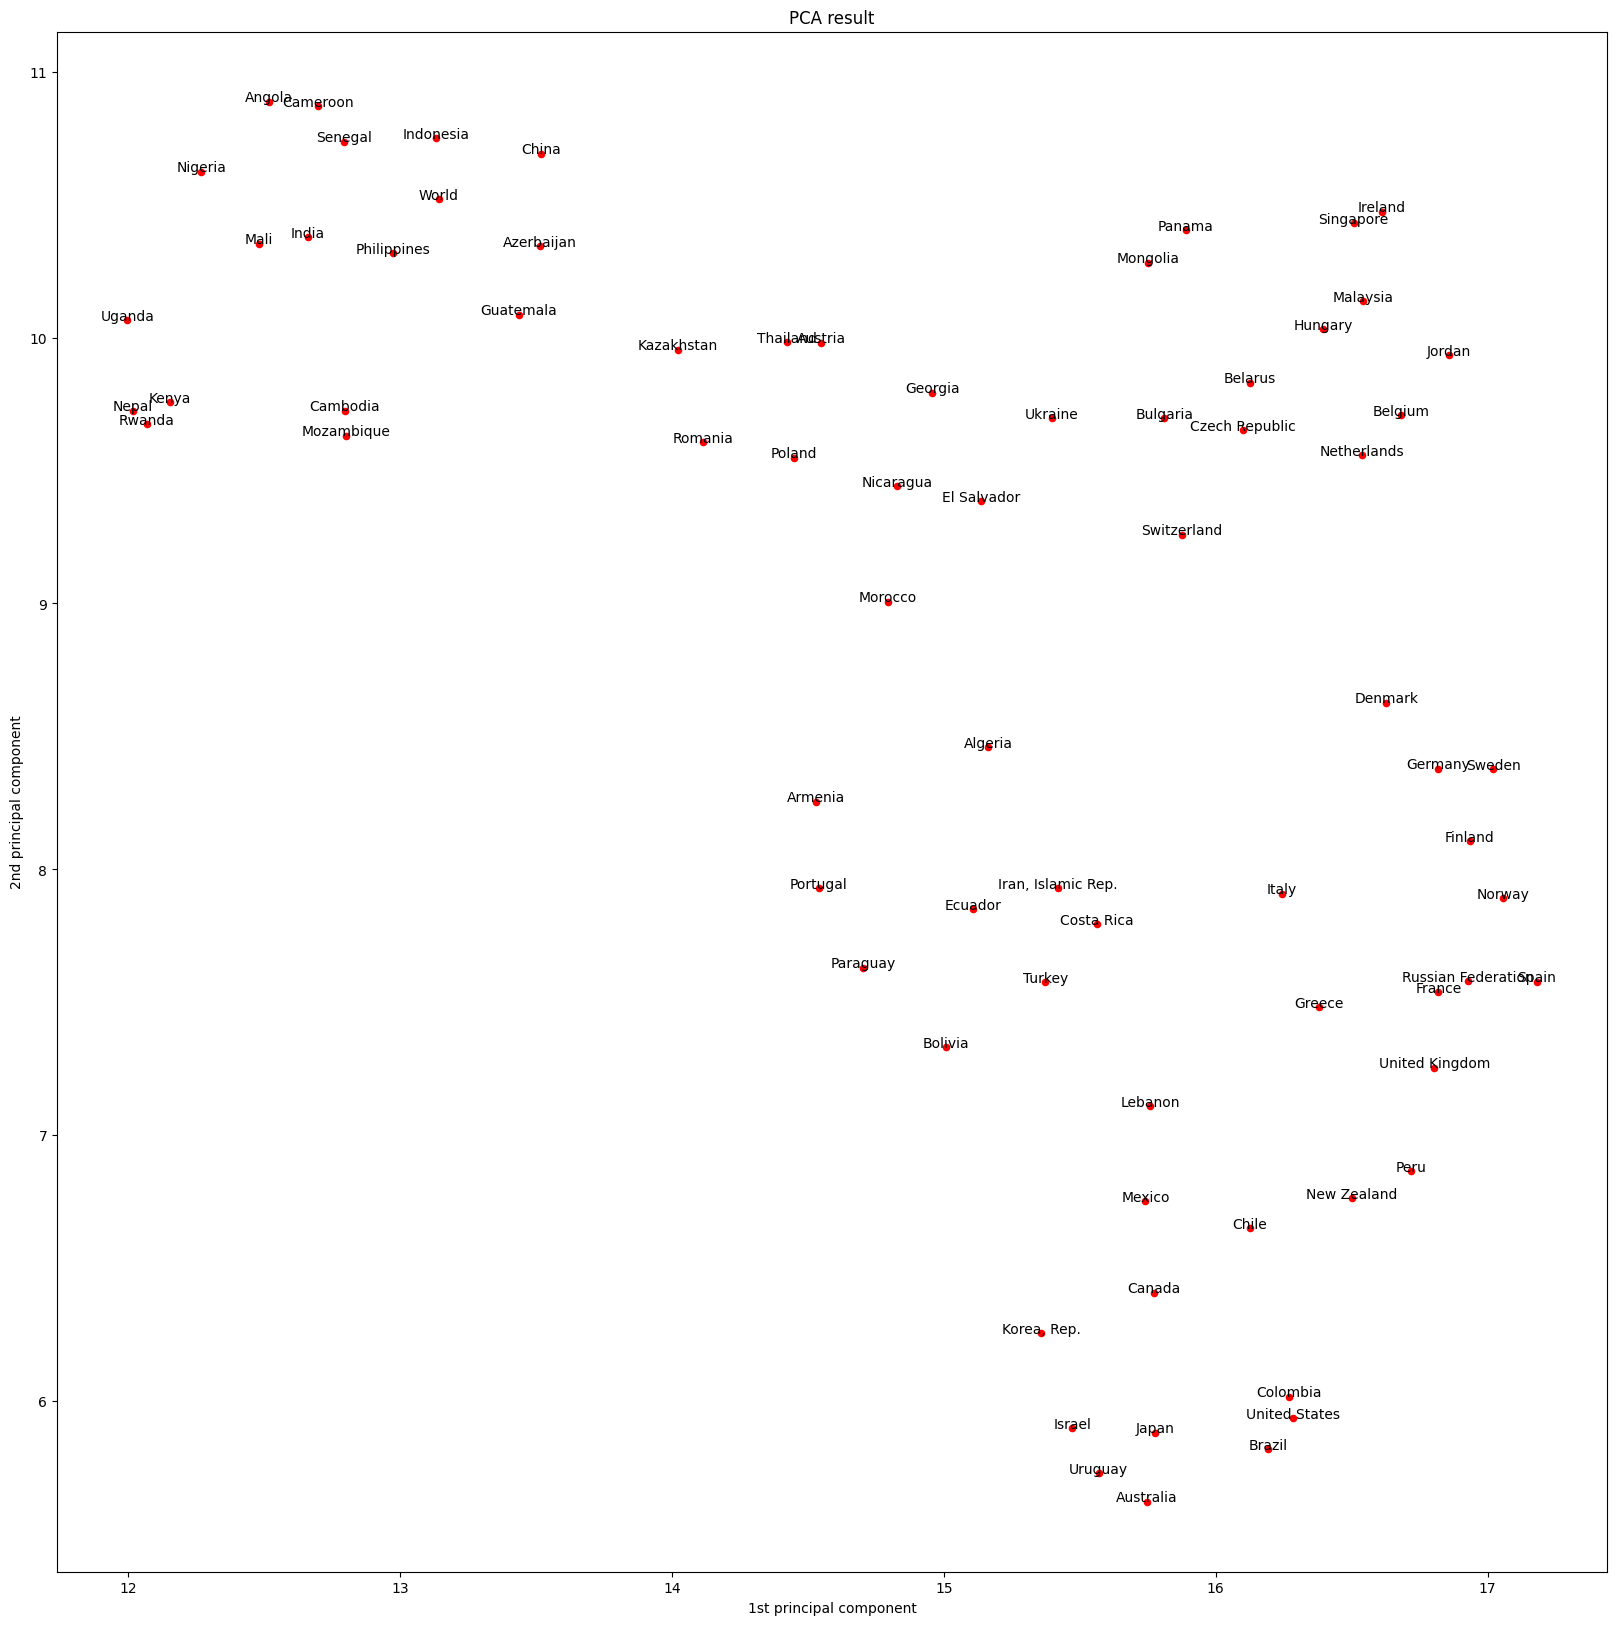

In [23]:
plt.figure(figsize=(20,20))
x = umap_data[:, 0]
y = umap_data[:, 1]
plt.scatter(x, y, c='r', s=20)
plt.title('PCA result')
plt.xlabel('1st principal component')
plt.ylabel('2nd principal component')
labels = list(data_for_viz.index)
for i, txt in enumerate(labels):
 plt.annotate(txt, (x[i], y[i]), ha='center', size=10)
plt.show()

## k-means clustering

### Silhouette score

In [24]:
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(full_df)
    sse_.append([k, silhouette_score(full_df, kmeans.labels_)])

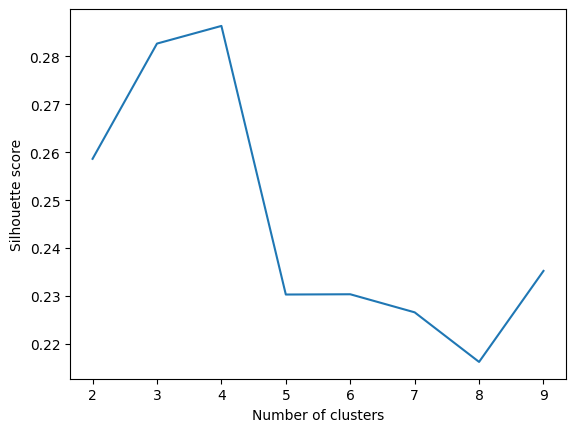

In [25]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])

plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

### Elbow method:

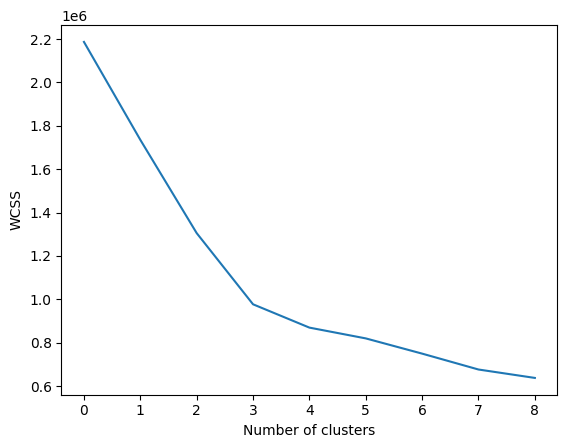

In [26]:
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(full_df)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


### K-means with 3 clusters

Kmeans for dataset that has countries as rows from every year

In [58]:
pca_final = IncrementalPCA(n_components=2)
df_pca = pca_final.fit_transform(full_df)
df_pca

array([[ -1.33654449,  56.06620416],
       [-28.6956169 ,  51.83605129],
       [-20.33980138,  37.85439634],
       ...,
       [-16.59435848,  -2.16400237],
       [-15.42712944,  -1.98777988],
       [-15.62633543,  -2.97982702]])

In [59]:
model_clus2 = KMeans(n_clusters = 3, max_iter=50, random_state = 50)
model_clus2.fit(df_pca)

KMeans(max_iter=50, n_clusters=3, random_state=50)

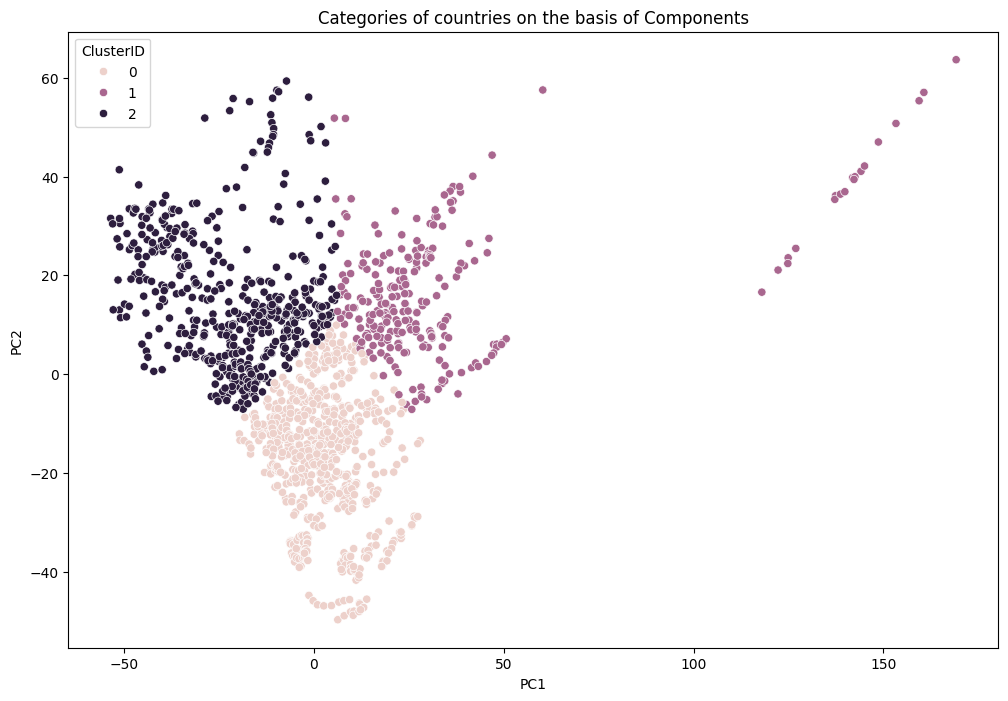

In [60]:
df = pd.DataFrame(df_pca, columns = ['PC1','PC2'])
dat_km = pd.concat([df, pd.Series(model_clus2.labels_)], axis=1)
dat_km.columns = ['PC1', 'PC2','ClusterID']

fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=dat_km)

plt.title('Categories of countries on the basis of Components')
plt.show()

# Approach for dataset that has values from every year combined as columns and every country occurs one time as a row

In [31]:
df_col_merged = pd.concat([all_data_frames[i] for i in range(19)], axis=1)
df_col_merged

women in parlament growth  death rate  fertility rate dynamic  \
Angola                          0.000000   17.597000                6.601000   
Armenia                         0.000000    8.612000                1.634000   
Australia                       0.000000    6.600000                1.739000   
Austria                         0.000000    9.300000                1.330000   
Azerbaijan                     -0.126344    5.600000                1.800000   
...                                  ...         ...                     ...   
Uganda                          0.386513   15.757000                6.823000   
Ukraine                         0.000000   15.300000                1.078000   
Uruguay                         0.000000    9.404000                2.211000   
United States                   0.051724    8.500000                2.030500   
World                           0.013396    8.513022                2.666349   

               gdp growth  immunization     import   inflation  labor_women  \
Angola           4.205999     60.000000  74.946851  106.352125    49.189641   
Armenia          9.600000     93.000000  45.718412    4.027969    46.299348   
Australia        2.038301     92.000000  22.098148    4.617100    43.962995   
Austria          1.267168     79.000000  42.919109    1.947105    44.035926   
Azerbaijan       9.900000     68.000000  37.316578    2.515010    49.128412   
...                   ...           ...        ...         ...          ...   
Uganda           5.183661     59.000000  23.811894    4.534476    47.239874   
Ukraine          8.800000     99.000000  49.277140   10.200916    50.502456   
Uruguay         -3.844130     94.000000  19.504853    4.826618    43.728913   
United States    0.998341     91.000000  13.263870    2.193425    45.819073   
World            2.000111     73.130803  23.024740    3.860901    39.649692   

               labor growth  military_expenditure  ...  immunization  \
Angola             0.033833              4.524354  ...     51.000000   
Armenia            0.007264              3.127249  ...     95.000000   
Australia          0.019041              1.870094  ...     95.000000   
Austria           -0.001518              0.908240  ...     94.000000   
Azerbaijan        -0.004371              2.312063  ...     98.000000   
...                     ...                   ...  ...           ...   
Uganda             0.030252              1.683245  ...     87.000000   
Ukraine           -0.007720              1.886871  ...     93.000000   
Uruguay            0.026998              2.502578  ...     96.000000   
United States      0.008306              3.123810  ...     90.000000   
World              0.014446              2.241664  ...     85.696183   

                  import  inflation  labor_women  labor growth  \
Angola         24.944753  28.090677    49.690052      0.036080   
Armenia        54.763353   1.065623    45.135644      0.017759   
Australia      21.675312   3.418786    46.711028      0.019212   
Austria        52.036021   1.622589    46.660825      0.003544   
Azerbaijan     36.767518  -0.241308    48.723135      0.002425   
...                  ...        ...          ...           ...   
Uganda         22.251996   3.000012    49.471584      0.042840   
Ukraine        49.279543   8.246226    47.809126     -0.006677   
Uruguay        21.856853   8.522967    46.266812      0.000449   
United States  14.538130   1.785152    46.299590      0.010453   
World          27.758059   2.381348    39.459695      0.012260   

               military_expenditure  urban_population growth  unemployment  \
Angola                     1.643740                66.177000      7.421000   
Armenia                    4.768968                63.219000     18.299999   
Australia                  1.879743                86.124000      5.160000   
Austria                    0.727409                58.515000      4.490000   
Azerbaijan                 3.873412                56.031

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


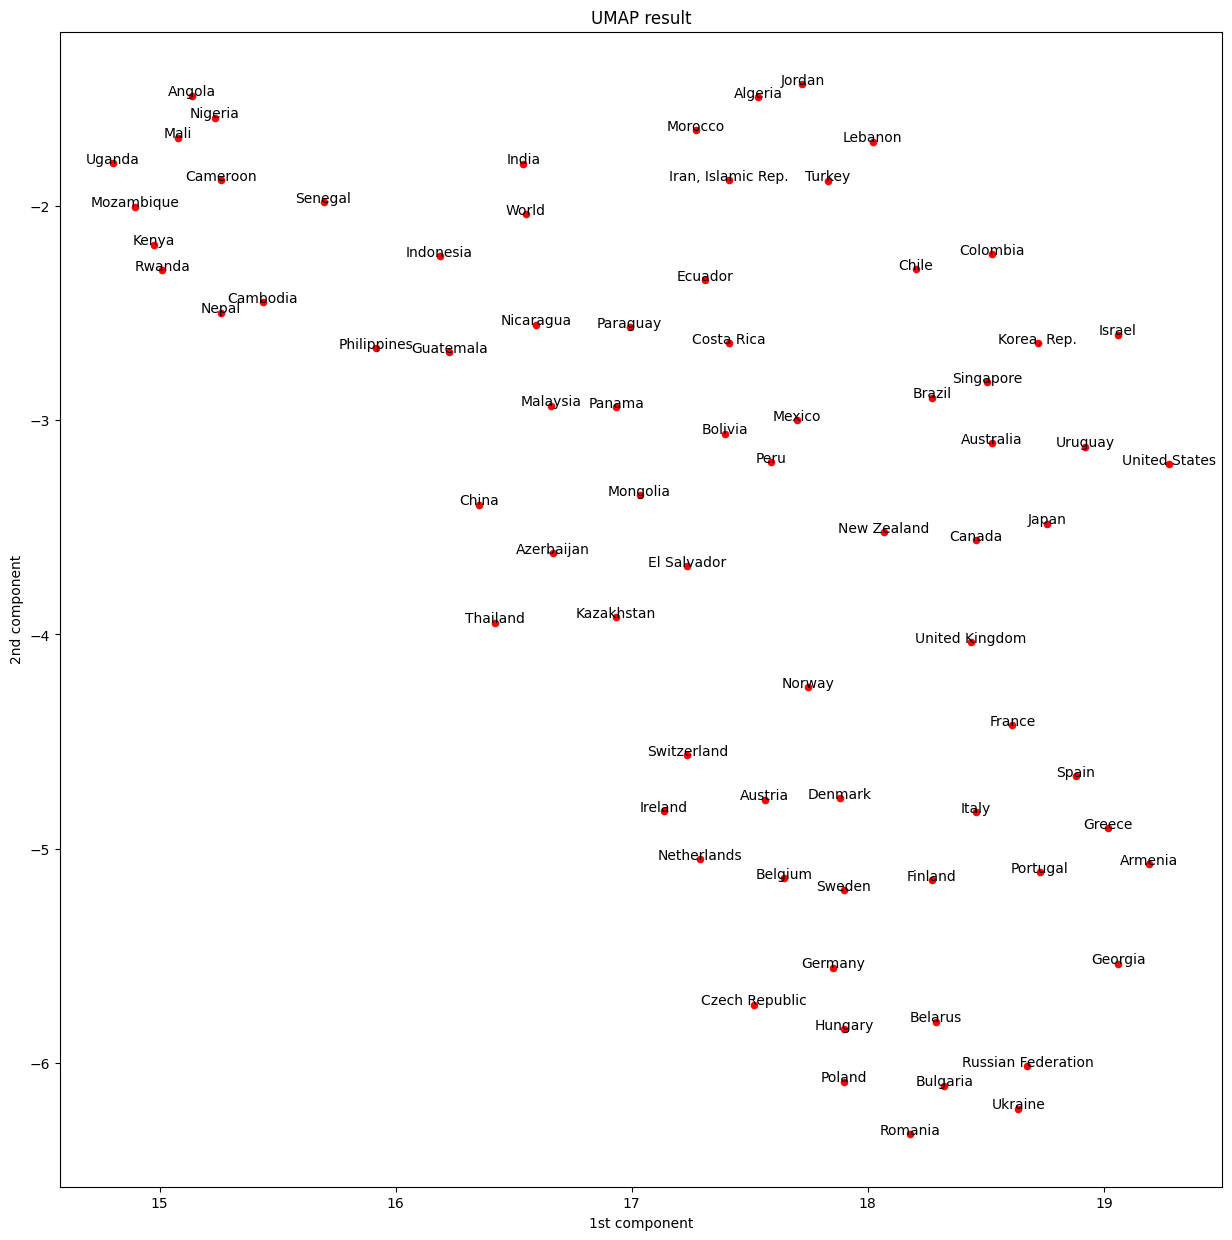

In [93]:
scaled = preprocessing.scale(df_col_merged)
model = umap.UMAP(n_components=2)
umap_df = model.fit_transform(scaled)


plt.figure(figsize=(15,15))
x = umap_df[:, 0]
y = umap_df[:, 1]
plt.scatter(x, y, c='r', s=20)
plt.title('UMAP result')
plt.xlabel('1st component')
plt.ylabel('2nd component')
labels = list(df_col_merged.index)
for i, txt in enumerate(labels):
 plt.annotate(txt, (x[i], y[i]), ha='center', size=10)
plt.show()

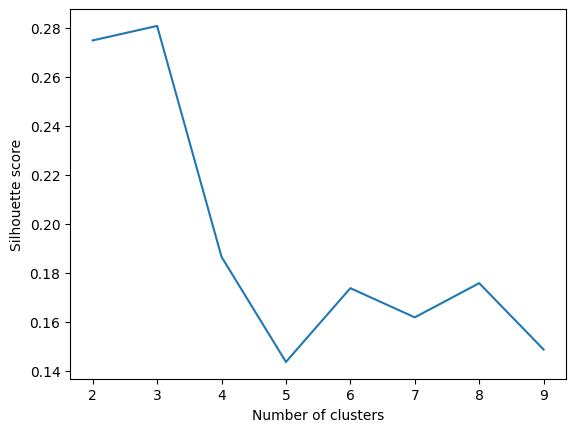

In [37]:
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(df_col_merged)
    sse_.append([k, silhouette_score(df_col_merged, kmeans.labels_)])

plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])

plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

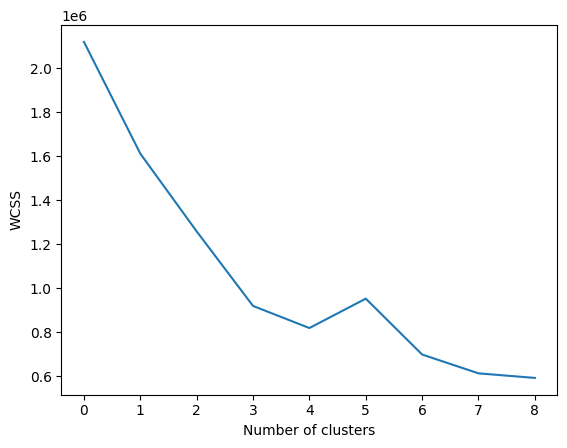

In [38]:
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(df_col_merged)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [39]:
scaled = preprocessing.scale(df_col_merged)
model = umap.UMAP(n_components=2)
pca = model.fit_transform(scaled)

model_clus3 = KMeans(n_clusters = 3, max_iter=50, random_state = 50)
model_clus3.fit(pca)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


KMeans(max_iter=50, n_clusters=3, random_state=50)

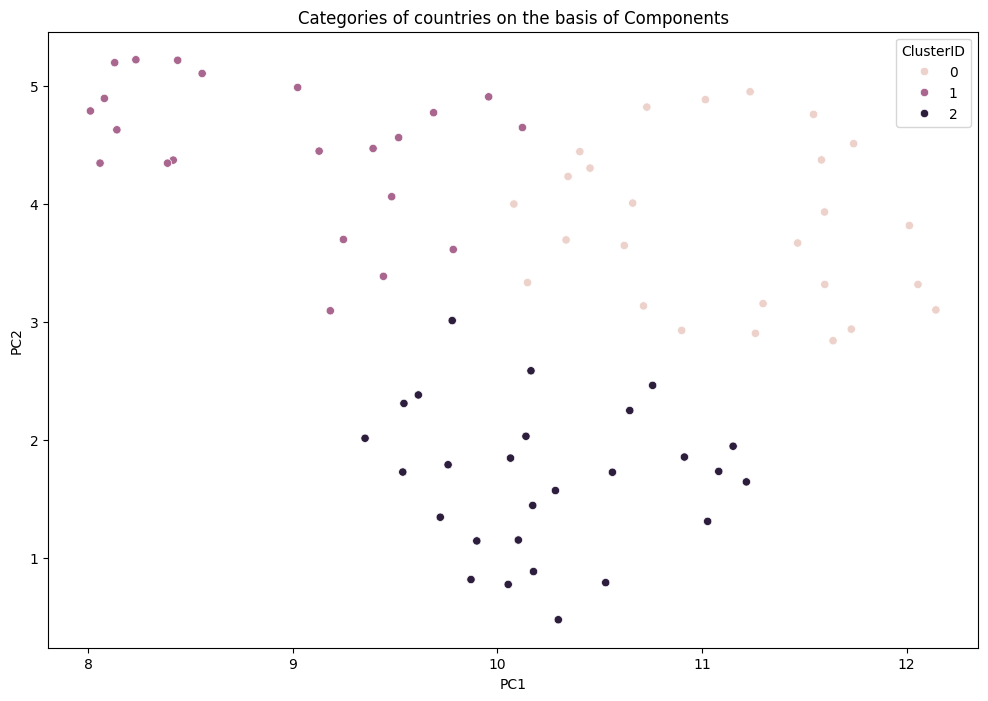

In [40]:
df = pd.DataFrame(pca, columns = ['PC1','PC2'])
dat_km = pd.concat([df, pd.Series(model_clus3.labels_)], axis=1)
dat_km.columns = ['PC1', 'PC2','ClusterID']

fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=dat_km)

plt.title('Categories of countries on the basis of Components')
plt.show()

Analysis of created clusters:

In [41]:
km_clusterID_list = dat_km['ClusterID'].tolist()
df_merged = df_col_merged
df_merged['ClusterID'] = km_clusterID_list
df_merged.loc[df_merged['ClusterID'] == 1].head(10)

women in parlament growth  death rate  fertility rate dynamic  \
Angola                       0.000000      17.597                   6.601   
Azerbaijan                  -0.126344       5.600                   1.800   
China                        0.000000       6.430                   1.597   
Cameroon                     0.000000      14.269                   5.524   
Guatemala                    0.000000       6.075                   4.490   
Indonesia                    0.000000       7.461                   2.509   
India                       -0.018604       8.555                   3.244   
Kenya                        0.000000      12.489                   5.112   
Cambodia                     0.000000       8.983                   3.654   
Mali                         0.000000      17.725                   6.878   

            gdp growth  immunization     import   inflation  labor_women  \
Angola        4.205999          60.0  74.946851  106.352125    49.189641   
Azerbaijan    9.900000          68.0  37.316578    2.515010    49.128412   
China         8.335733          85.0  18.215214    2.047049    44.936710   
Cameroon      4.324261          51.0  26.311052    2.469359    48.446296   
Guatemala     2.332575          91.0  42.005485   -5.610145    34.769800   
Indonesia     3.643466          76.0  30.761068   14.295715    37.395294   
India         4.823966          57.0  13.434875    3.215616    25.965782   
Kenya         3.779906          77.0  33.015260    1.573120    49.419118   
Cambodia      8.148386          59.0  61.599804    2.646541    51.861265   
Mali         15.376239          54.0  33.888366    4.678362    44.353087   

            labor growth  military_expenditure  ...     import  inflation  \
Angola          0.033833              4.524354  ...  24.944753  28.090677   
Azerbaijan     -0.004371              2.312063  ...  36.767518  -0.241308   
China           0.007753              1.976186  ...  17.480104   1.287452   
Cameroon        0.029571              1.290360  ...  23.528423   1.169772   
Guatemala       0.029810              1.052063  ...  27.947399   3.680606   
Indonesia       0.007834              0.572793  ...  19.002476   1.598798   
India           0.025280              2.924436  ...  20.957385   3.566001   
Kenya           0.032230              1.504755  ...  20.295931   4.590191   
Cambodia        0.108123              1.774811  ...  62.465227   3.235372   
Mali            0.028439              1.295172  ...  37.953412   1.930542   

            labor_women  labor growth  military_expenditure  \
Angola        49.690052      0.036080              1.643740   
Azerbaijan    48.723135      0.002425              3.873412   
China         44.804092      0.000677              1.727828   
Cameroon      46.855725      0.030334              1.086759   
Guatemala     33.440351      0.026011              0.465832   
Indonesia     39.491377      0.024073              0.804335   
India         21.213170      0.019597              2.519121   
Kenya         49.464803      0.031054              1.167691   
Cambodia      48.932465      0.014689              2.228561   
Mali          42.630863      0.034238              2.713526   

            urban_population growth  unemployment  \
Angola                       66.177         7.421   
Azerbaijan                   56.031         4.850   
China                        60.308         4.520   
Cameroon                     56.968         3.638   
Guatemala                    51.439         2.190   
Indonesia                    55.985         3.620   
India                        34.472         5.270   
Kenya                        27.507         5.010   
Cambodia                     23.805         0.147   
Mali                         43.136         7.442   

            urban_population_percentage  Population in agglomerations dynamic  \
Angola                         4.249824                             25.277799   
Azerbaijan                     1.475065

In [42]:
Cluster_immunization=pd.DataFrame(df_merged.groupby(["ClusterID"]).immunization.mean())
Cluster_military_expenditure=pd.DataFrame(df_merged.groupby(["ClusterID"]).military_expenditure.mean())
Cluster_inflation=pd.DataFrame(df_merged.groupby(["ClusterID"]).inflation.mean())
Cluster_unemployment=pd.DataFrame(df_merged.groupby(["ClusterID"]).unemployment.mean())
Cluster_labor_women=pd.DataFrame(df_merged.groupby(["ClusterID"]).labor_women.mean())

In [74]:
group_by_clusters = pd.concat([Cluster_immunization, Cluster_military_expenditure, Cluster_unemployment], axis=1)
mean_of_clusters = group_by_clusters.groupby(by=group_by_clusters.columns, axis=1).mean()

mean_of_clusters.rename(index={0: 'Developed Countries'},inplace=True)
mean_of_clusters.rename(index={1: 'Under-developed Countries'},inplace=True)
mean_of_clusters.rename(index={2: 'Developing Countries'},inplace=True)
mean_of_clusters

<ipython-input-74-b2fc6840635f>:2: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  mean_of_clusters = group_by_clusters.groupby(by=group_by_clusters.columns, axis=1).mean()


immunization  military_expenditure  unemployment
ClusterID                                                                  
Developed Countries           92.894737              2.337553      7.179358
Under-developed Countries     80.755231              1.561217      4.217461
Developing Countries          93.415205              1.707525      8.377080

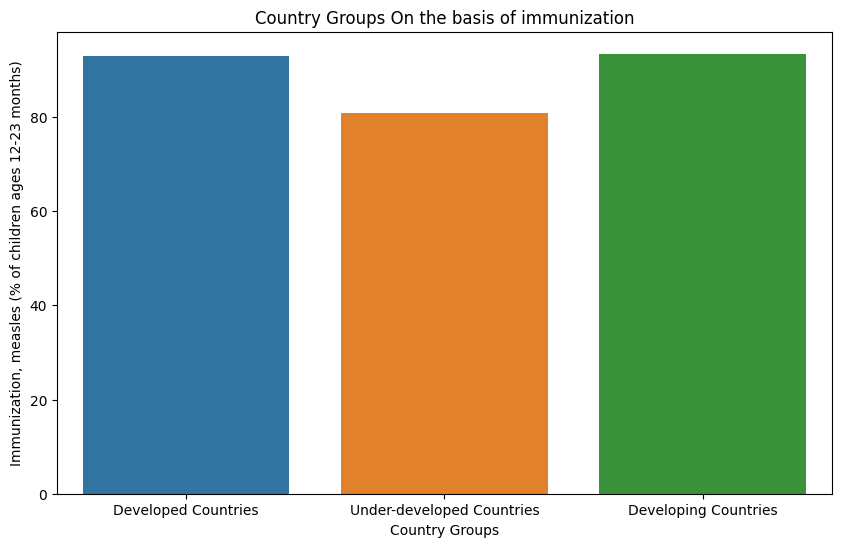

In [81]:
fig = plt.figure(figsize = (10,6))

s=sns.barplot(x=mean_of_clusters.index,y='immunization',data=mean_of_clusters,hue=mean_of_clusters.index, legend=False)
plt.xlabel('Country Groups', fontsize=10)
plt.ylabel('Immunization, measles (% of children ages 12-23 months)', fontsize=10)
plt.title('Country Groups On the basis of immunization')
plt.show()

In [70]:
mean_of_clusters.index

Index(['Developed Countries', 'Developing Countries',
       'Under-developed Countries'],
      dtype='object', name='ClusterID')

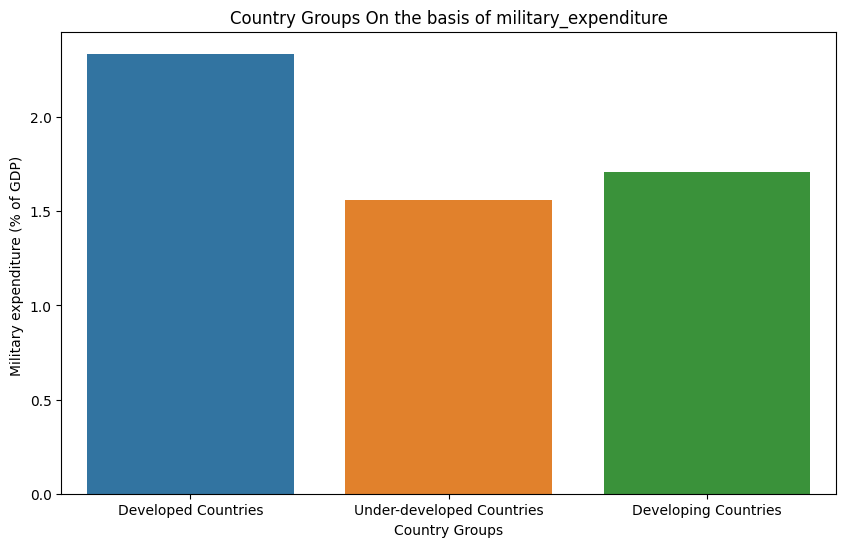

In [80]:
fig = plt.figure(figsize = (10,6))
s=sns.barplot(x=mean_of_clusters.index,y='military_expenditure',data=mean_of_clusters,hue=mean_of_clusters.index, legend=False)
plt.xlabel('Country Groups', fontsize=10)
plt.ylabel('Military expenditure (% of GDP) ', fontsize=10)
plt.title('Country Groups On the basis of military_expenditure')
plt.show()

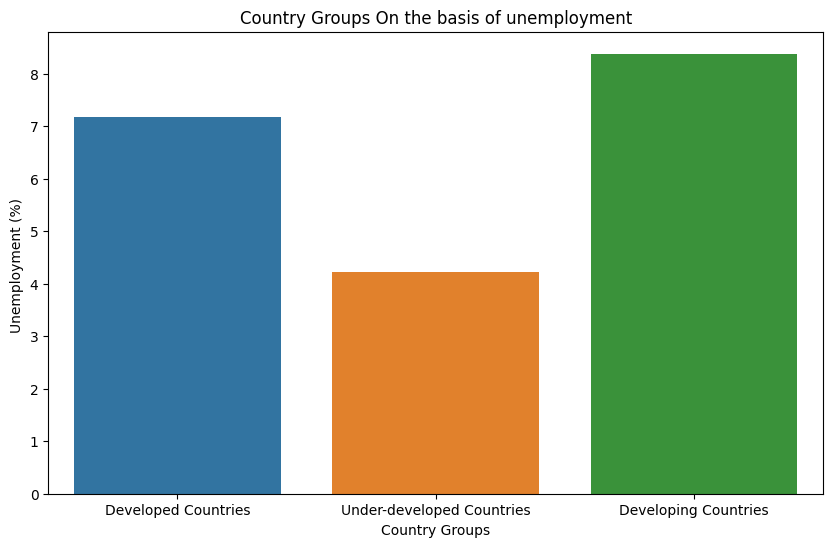

In [79]:
fig = plt.figure(figsize = (10,6))
s=sns.barplot(x=mean_of_clusters.index,y='unemployment',data=mean_of_clusters,hue=mean_of_clusters.index, legend=False)
plt.xlabel('Country Groups', fontsize=10)
plt.ylabel('Unemployment (%) ', fontsize=10)
plt.title('Country Groups On the basis of unemployment')
plt.show()

# Agglomerative clustering

In [47]:
array = full_df.index + full_df["year"]

### Scale the data

In [48]:
data_scaled = normalize(full_df)
data_scaled = pd.DataFrame(data_scaled, columns=full_df.columns, index =  full_df.index)
data_scaled.head()

women in parlament growth  death rate  fertility rate dynamic  \
Angola                   0.000000    0.008765                0.003288   
Angola                   0.000000    0.008483                0.003260   
Angola                   0.000000    0.008229                0.003254   
Angola                  -0.000015    0.007924                0.003238   
Angola                   0.000000    0.007591                0.003218   

        gdp growth  immunization    import  inflation  labor_women  \
Angola    0.002095      0.029887  0.037332   0.052976     0.024502   
Angola    0.006783      0.029286  0.023933   0.097777     0.024453   
Angola    0.001489      0.021914  0.024694   0.046781     0.024576   
Angola    0.005458      0.021427  0.022523   0.016663     0.024629   
Angola    0.007486      0.010460  0.020455   0.021107     0.024659   

        labor growth  military_expenditure  urban_population growth  \
Angola      0.000017              0.002254                 0.025540   
Angola      0.000017              0.001425                 0.026040   
Angola      0.000018              0.001873                 0.026718   
Angola      0.000018              0.001730                 0.027320   
Angola      0.000019              0.001839                 0.027894   

        unemployment  urban_population_percentage  \
Angola      0.001994                     0.002811   
Angola      0.001966                     0.002789   
Angola      0.001971                     0.002794   
Angola      0.001951                     0.002807   
Angola      0.001934                     0.002817   

        Population in agglomerations dynamic      year  
Angola                              0.008853  0.996728  
Angola                              0.009087  0.993735  
Angola                              0.009386  0.997607  
Angola                              0.009661  0.998595  
Angola                              0.009924  0.998701

### Dendograms

Hierarchical clustering usinf linkage function

In [49]:
row_cluster = linkage(data_scaled.values, method='complete', metric='euclidean')
row_cluster_w = linkage(data_scaled.values, method='ward', metric='euclidean')

pd.DataFrame(row_cluster, columns = ['First row', 'Second row', 'Distance', 'Number of elements in cluster'])

First row  Second row  Distance  Number of elements in cluster
0         359.0       360.0  0.000196                            2.0
1        1418.0      1419.0  0.000321                            2.0
2         473.0       474.0  0.000374                            2.0
3          52.0        53.0  0.000379                            2.0
4         475.0       476.0  0.000382                            2.0
...         ...         ...       ...                            ...
1419     2841.0      2843.0  0.055775                         1160.0
1420     2842.0      2844.0  0.063971                         1399.0
1421        1.0      2839.0  0.068648                            7.0
1422     2845.0      2846.0  0.108955                         1406.0
1423     2834.0      2847.0  0.136009                         1425.0

[1424 rows x 4 columns]

Euclidean method

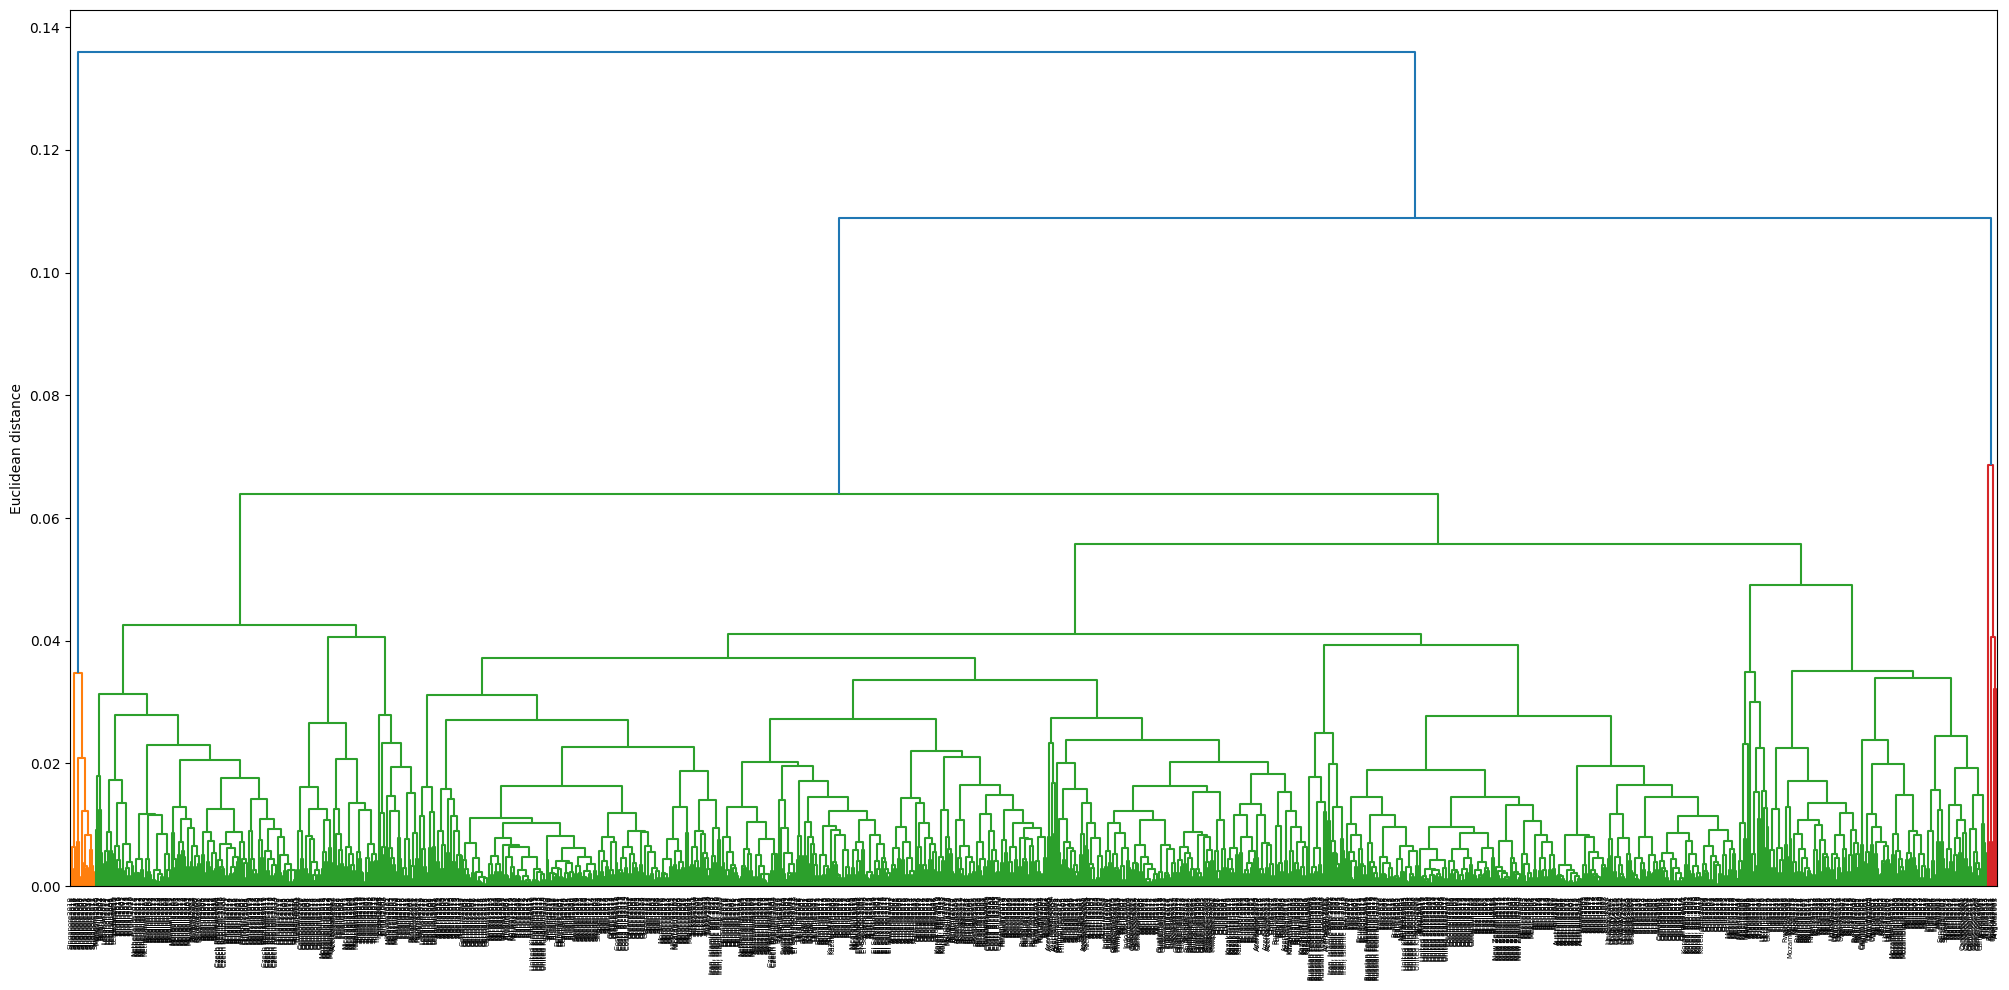

In [50]:
plt.figure(figsize=(20, 10))
row_dendr = dendrogram( row_cluster, labels = array.values)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

Ward Method

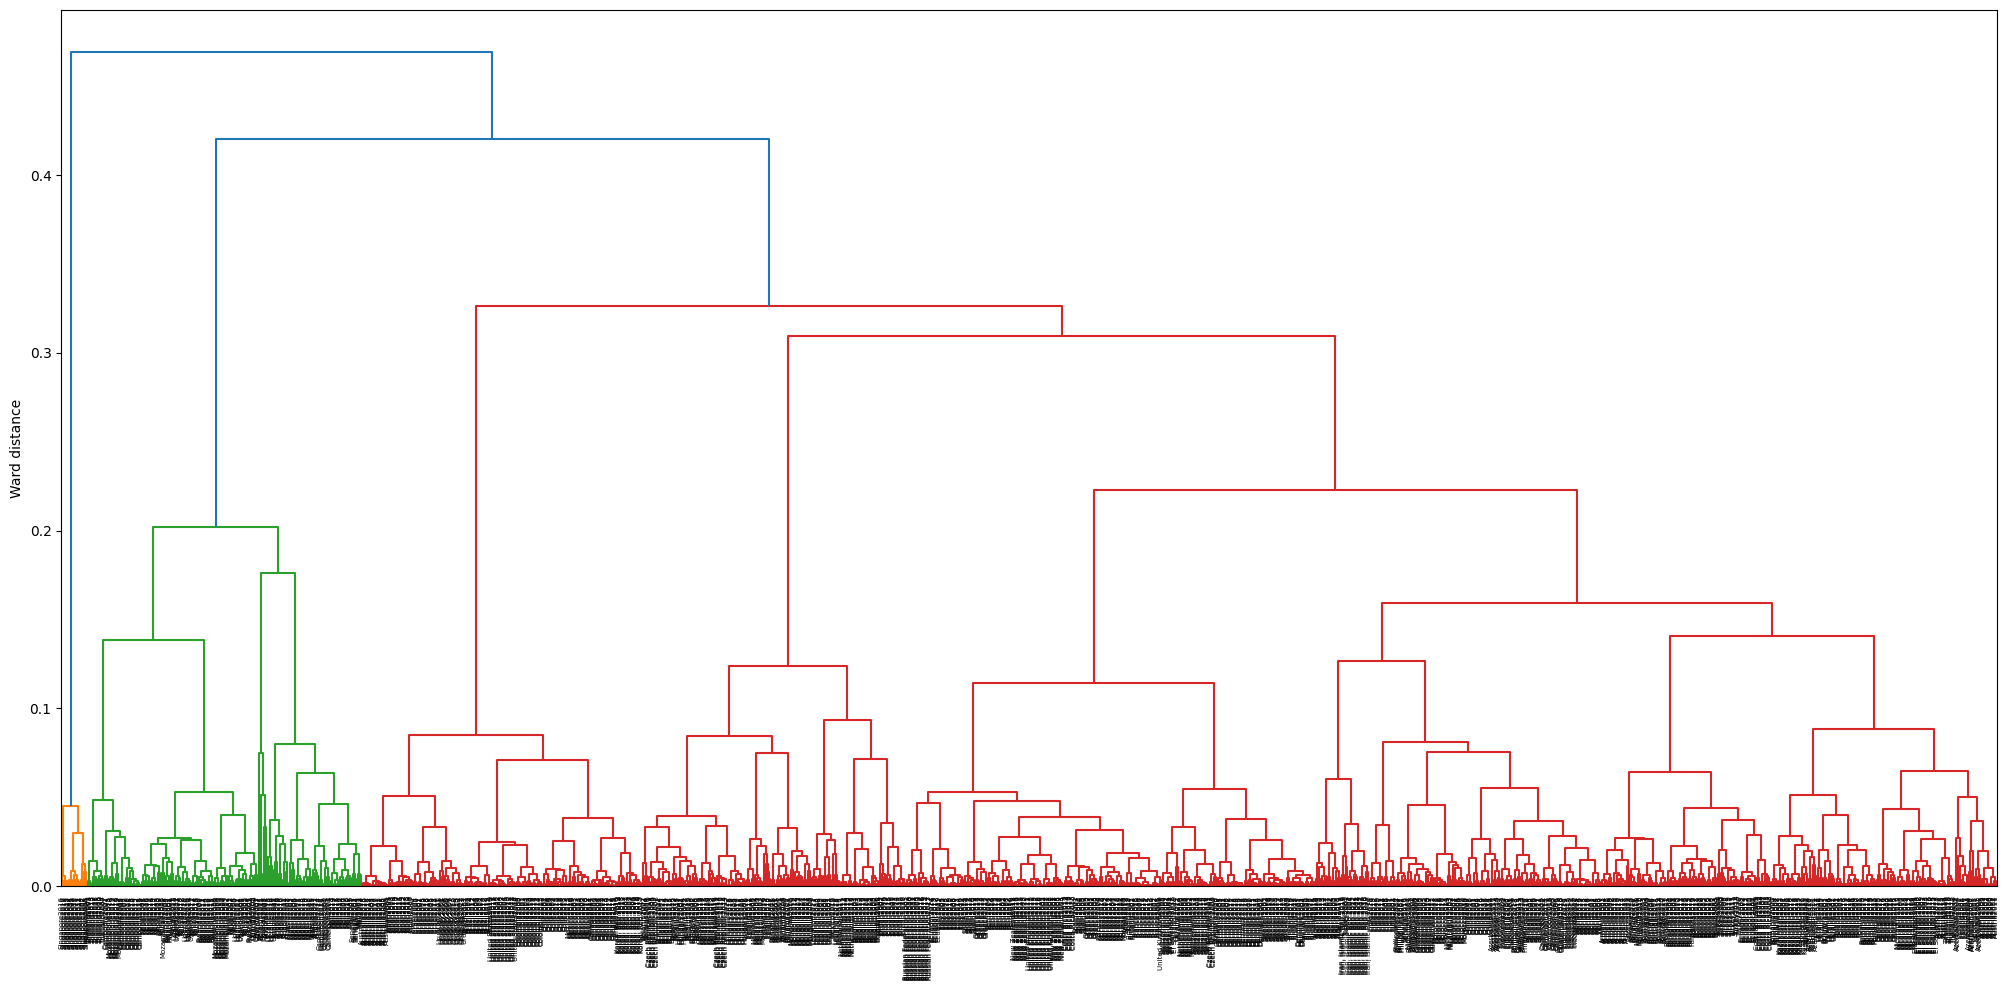

In [51]:
plt.figure(figsize=(20, 10))
row_dendr = dendrogram( row_cluster_w, labels = array.values)
plt.tight_layout()
plt.ylabel('Ward distance')
plt.show()

Using t-SNE to make 2-dimensional embedding

In [52]:
df_tsne = TSNE(n_components=2, init='pca').fit_transform(data_scaled)
df_tsne


array([[-24.003822 ,  25.39699  ],
       [-23.614107 ,  25.427227 ],
       [-24.135769 ,  25.430779 ],
       ...,
       [-29.280464 ,   3.8694937],
       [-29.047577 ,   4.05696  ],
       [-29.05388  ,   3.7828376]], dtype=float32)

Agglomerative Clustering function from sklearn

In [54]:
cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
cluster.fit_predict(df_tsne)

array([1, 1, 1, ..., 1, 1, 1])

Visualising the clusters

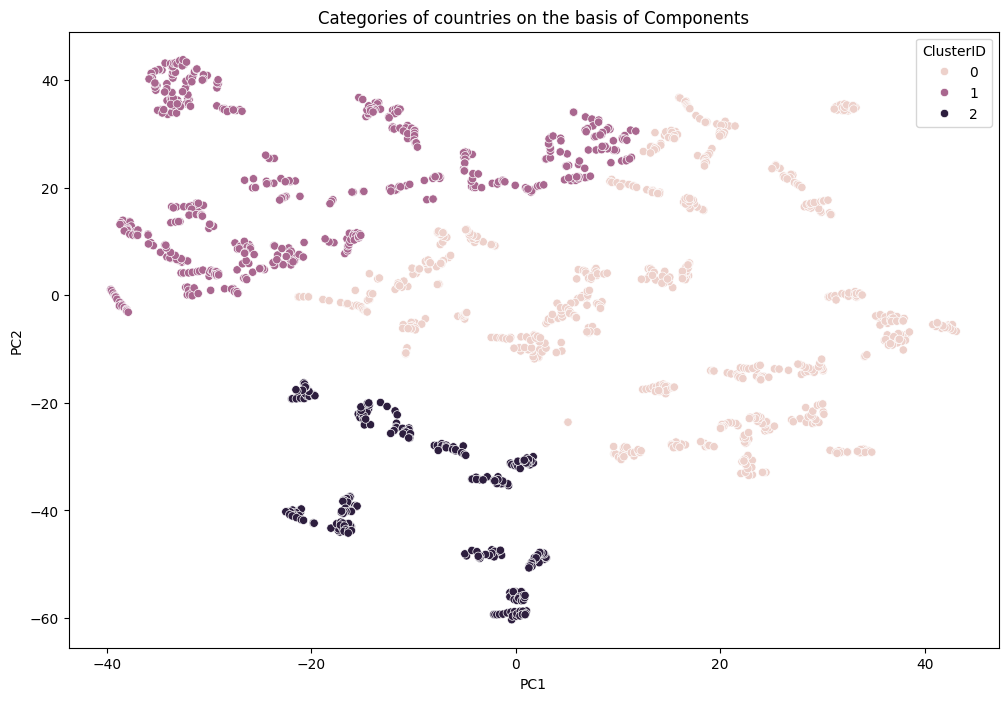

In [55]:
df = pd.DataFrame(df_tsne, columns = ['PC1','PC2'])
dat_km = pd.concat([df, pd.Series(cluster.labels_)], axis=1)
dat_km.columns = ['PC1', 'PC2','ClusterID']

fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=dat_km)

plt.title('Categories of countries on the basis of Components')
plt.show()

In [56]:
full_df["clusters"] = cluster.labels_
cluster1 = full_df.loc[full_df["clusters"]==1]
cluster2 = full_df.loc[full_df["clusters"]==2]
cluster3 = full_df.loc[full_df["clusters"]==0]

<Axes: xlabel='None', ylabel='count'>

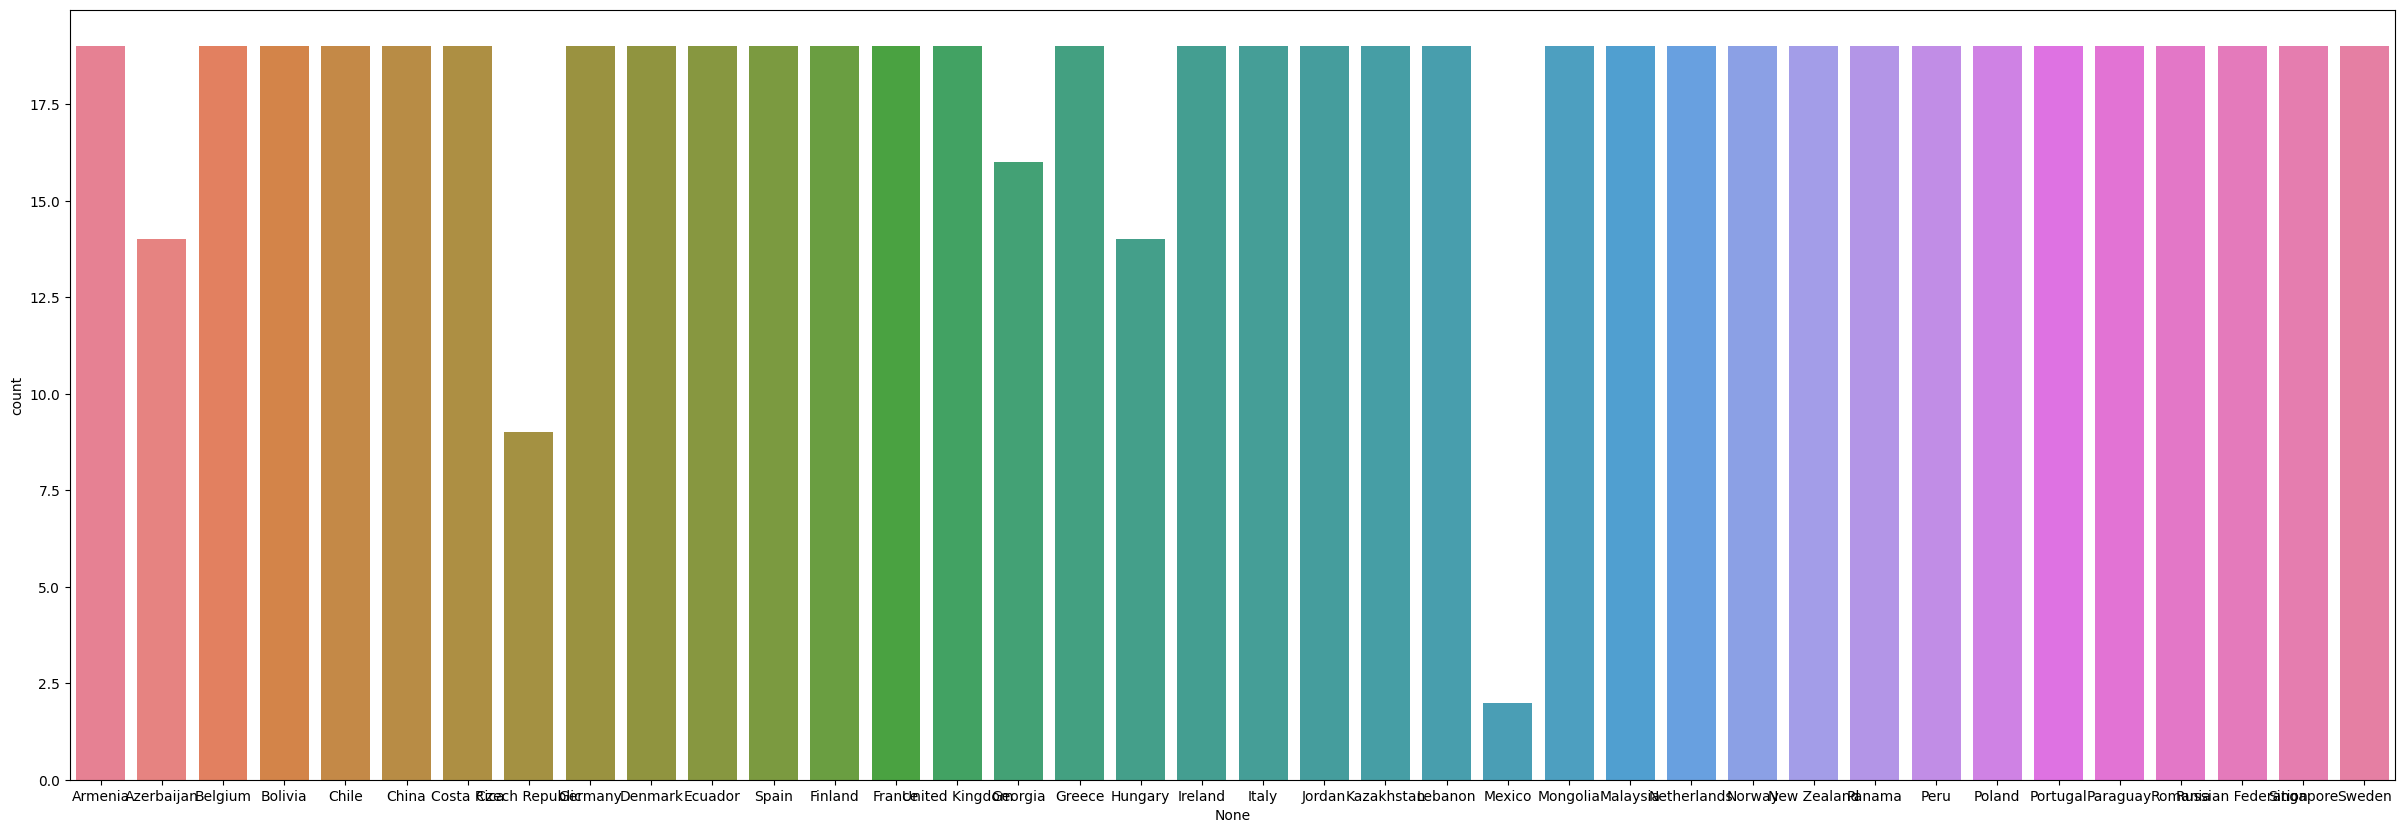

In [82]:
plt.figure(figsize=(30, 10))
sns.countplot(x = cluster3.index ,data = cluster3,hue=cluster3.index, legend = False)

In [83]:
cluster3.loc[cluster3.index == 'Mexico']

women in parlament growth  death rate  fertility rate dynamic  \
Mexico                   0.004717       5.933                   2.157   
Mexico                   0.000000       6.082                   2.103   

        gdp growth  immunization     import  inflation  labor_women  \
Mexico    2.113129          76.0  39.464176   6.712706    37.392329   
Mexico   -0.176599          73.0  39.066640   4.135024    38.439186   

        labor growth  military_expenditure  urban_population growth  \
Mexico      0.011004              0.436510                   79.867   
Mexico      0.025475              0.523482                   80.444   

        unemployment  urban_population_percentage  \
Mexico          3.42                     1.527731   
Mexico          3.48                     1.450023   

        Population in agglomerations dynamic  year  clusters  
Mexico                             40.672664  2017         0  
Mexico                             40.768054  2019         0

<Axes: xlabel='None', ylabel='count'>

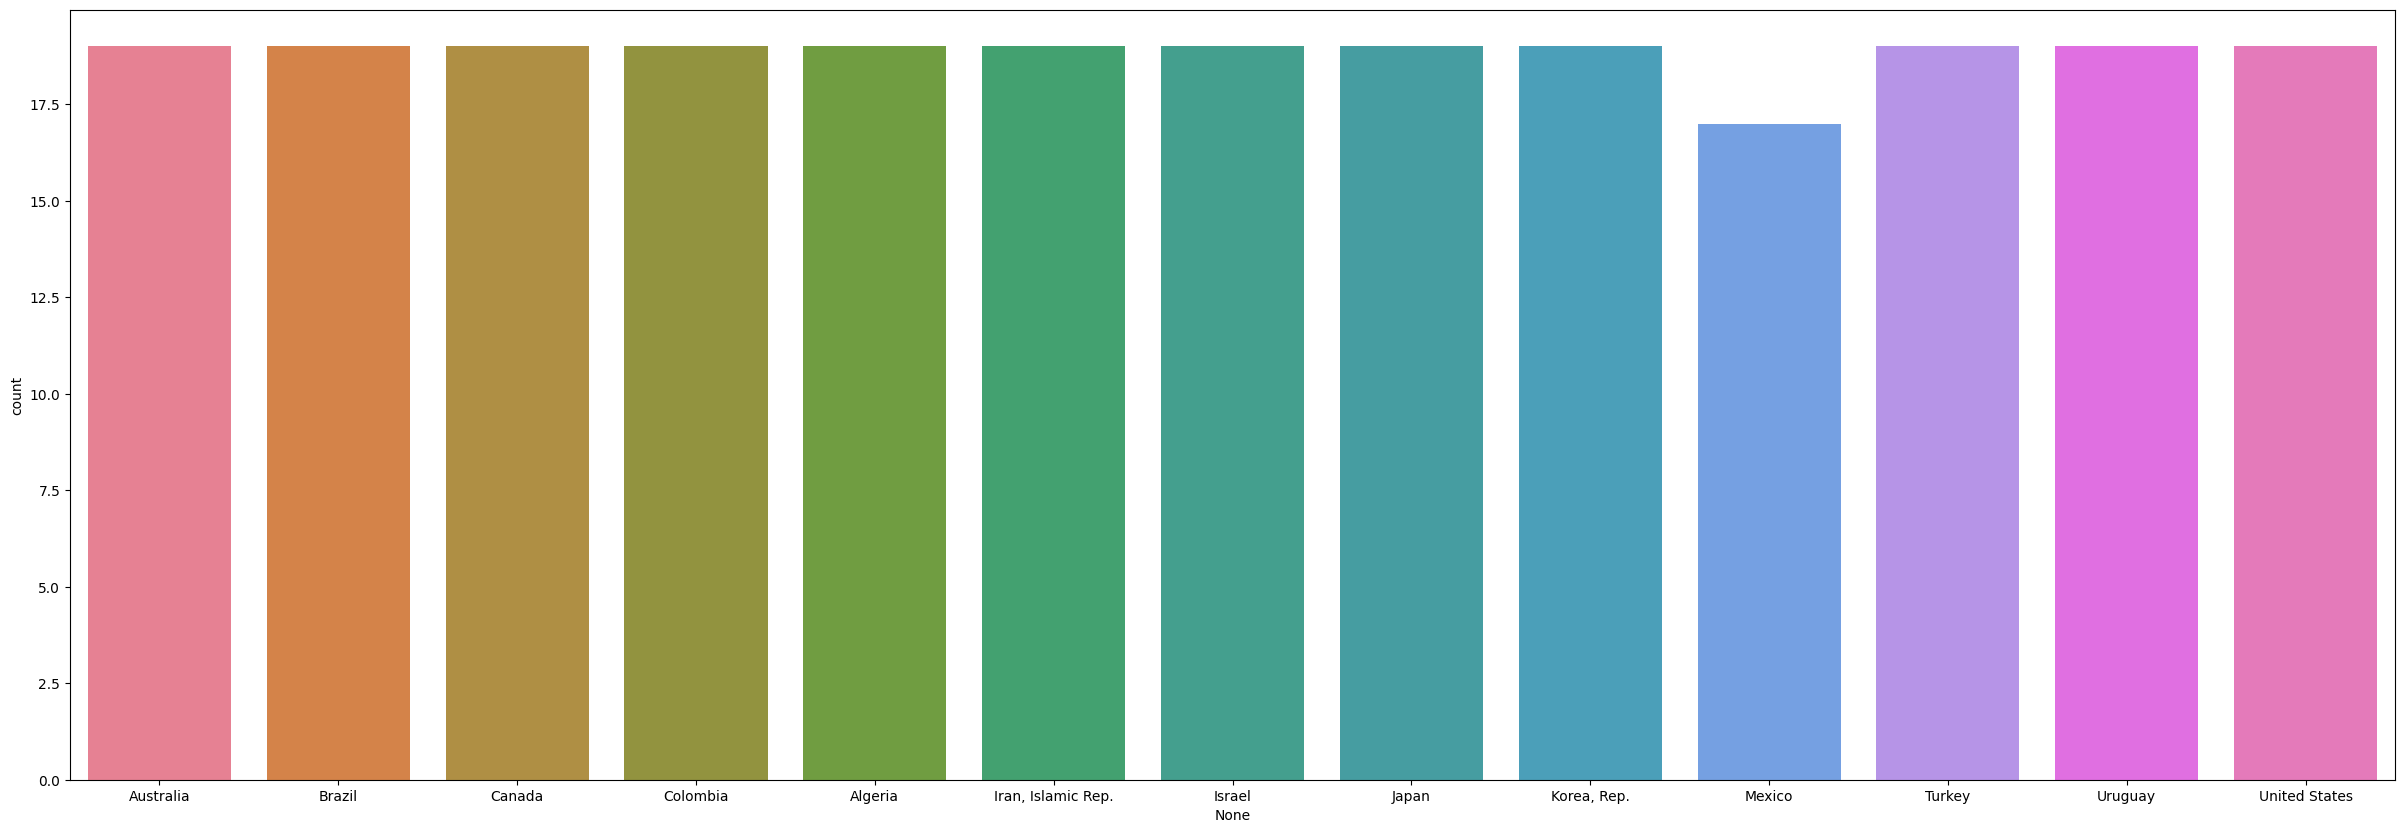

In [85]:
plt.figure(figsize=(30, 10))
sns.countplot(x = cluster2.index ,data = cluster2,hue=cluster2.index, legend = False)

<Axes: xlabel='None', ylabel='count'>

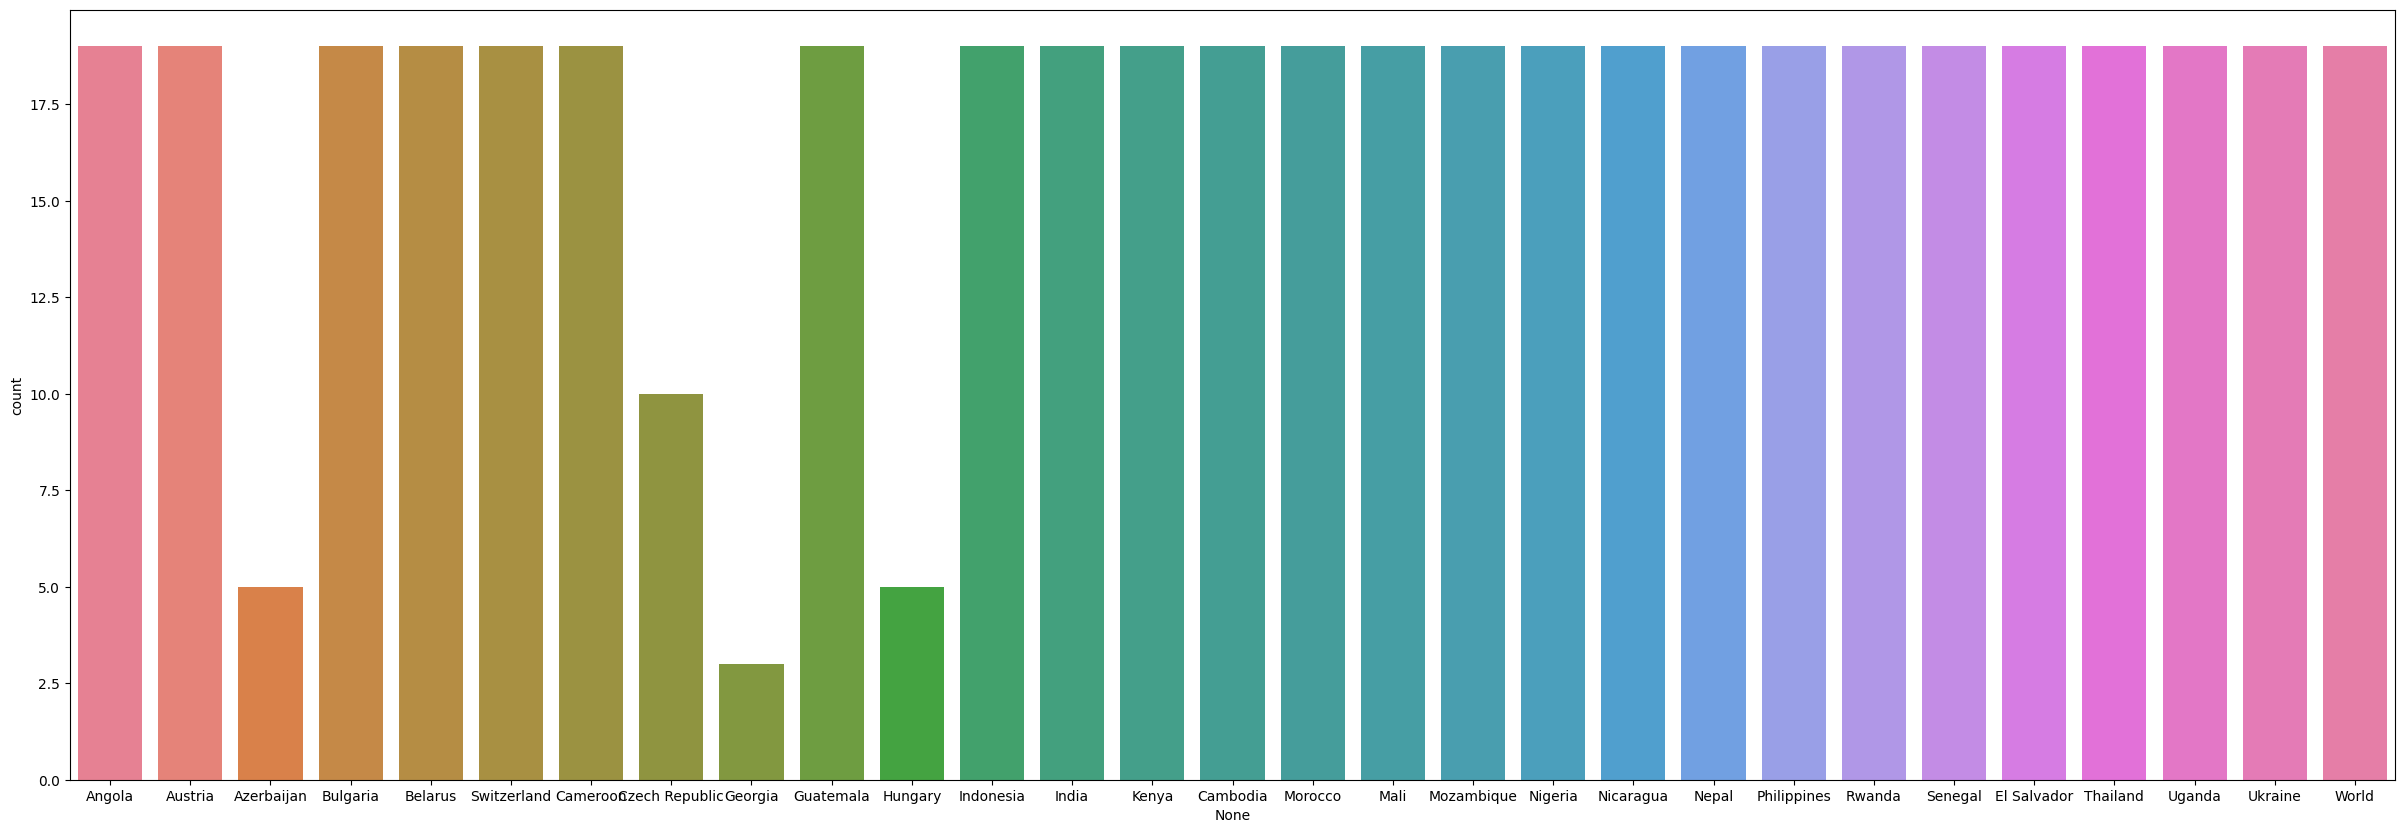

In [86]:
plt.figure(figsize=(30, 10))
sns.countplot(x = cluster1.index ,data = cluster1,hue=cluster1.index, legend = False)

# Happiness

In [94]:
km_clusterID_list = dat_km['ClusterID'].tolist()
df_merged = full_df
df_merged['ClusterID'] = km_clusterID_list
df_merged = df_merged[df_merged['year'] == str(2019)]
df_merged
# taking just the year 2019

women in parlament growth  death rate  fertility rate dynamic  \
Angola                         -0.014925     7.98100                5.442000   
Armenia                         0.297847     9.83500                1.758000   
Australia                       0.062683     6.70000                1.657000   
Austria                         0.142857     9.40000                1.460000   
Azerbaijan                      0.000400     5.60000                1.800000   
...                                  ...         ...                     ...   
Uganda                          0.016326     6.38100                4.824000   
Ukraine                         0.669131    14.70000                1.228000   
Uruguay                        -0.050000     9.47300                1.963000   
United States                  -0.002912     8.70000                1.705000   
World                           0.022356     7.52427                2.401804   

               gdp growth  immunization     import  inflation  labor_women  \
Angola          -0.624644     51.000000  24.944753  28.090677    49.690052   
Armenia          7.600000     95.000000  54.763353   1.065623    45.135644   
Australia        2.113149     95.000000  21.675312   3.418786    46.711028   
Austria          1.491211     94.000000  52.036021   1.622589    46.660825   
Azerbaijan       2.500000     98.000000  36.767518  -0.241308    48.723135   
...                   ...           ...        ...        ...          ...   
Uganda           6.438745     87.000000  22.251996   3.000012    49.471584   
Ukraine          3.199504     93.000000  49.279543   8.246226    47.809126   
Uruguay          0.350447     96.000000  21.856853   8.522967    46.266812   
United States    2.161177     90.000000  14.538130   1.785152    46.299590   
World            2.600878     85.696183  27.758059   2.381348    39.459695   

               labor growth  military_expenditure  urban_population growth  \
Angola             0.036080              1.643740                66.177000   
Armenia            0.017759              4.768968                63.219000   
Australia          0.019212              1.879743                86.124000   
Austria            0.003544              0.727409                58.515000   
Azerbaijan         0.002425              3.873412                56.031000   
...                     ...                   ...                      ...   
Uganda             0.042840              1.769798                24.361000   
Ukraine           -0.006677              3.522485                69.473000   
Uruguay            0.000449              2.059819                95.426000   
United States      0.010453              3.427080                82.459000   
World              0.012260              2.186864                55.720431   

               unemployment  urban_population_percentage  \
Angola             7.421000                     4.249824   
Armenia           18.299999                     0.313404   
Australia          5.160000                     1.651780   
Austria            4.490000                     0.817911   
Azerbaijan         4.850000                     1.475065   
...                     ...                          ...   
Uganda             1.925000                     5.981027   
Ukraine            8.190000                    -0.356674   
Uruguay            8.880000                     0.456481   
United States      3.670000                     0.701868   
World              5.357098                     1.876032   

               Population in agglomerations dynamic  year  clusters  ClusterID  
Angola                                    25.277799  2019         1          2  
Armenia                                   36.626864  2019         0          1  
Australia                                 60.895862  2019         2          0  
Austria                                   21.569316  2019         1          2  
Azerbaijan                                23.075346  2

In [101]:
df_merged

death rate  gdp growth  immunization     import  inflation  \
Armenia             9.835    7.600000          95.0  54.763353   1.065623   
Australia           6.700    2.113149          95.0  21.675312   3.418786   
Austria             9.400    1.491211          94.0  52.036021   1.622589   
Azerbaijan          5.600    2.500000          98.0  36.767518  -0.241308   
Belgium             9.500    2.149560          96.0  81.532276   1.754071   
...                   ...         ...           ...        ...        ...   
Turkey              5.443    0.889585          97.0  30.014526  13.859346   
Uganda              6.381    6.438745          87.0  22.251996   3.000012   
Ukraine            14.700    3.199504          93.0  49.279543   8.246226   
Uruguay             9.473    0.350447          96.0  21.856853   8.522967   
United States       8.700    2.161177          90.0  14.538130   1.785152   

               labor_women  labor growth  military_expenditure  \
Armenia          45.135644      0.017759              4.768968   
Australia        46.711028      0.019212              1.879743   
Austria          46.660825      0.003544              0.727409   
Azerbaijan       48.723135      0.002425              3.873412   
Belgium          46.641349      0.009096              0.893043   
...                    ...           ...                   ...   
Turkey           33.360649      0.013266              2.710274   
Uganda           49.471584      0.042840              1.769798   
Ukraine          47.809126     -0.006677              3.522485   
Uruguay          46.266812      0.000449              2.059819   
United States    46.299590      0.010453              3.427080   

               urban_population growth  unemployment  \
Armenia                         63.219     18.299999   
Australia                       86.124      5.160000   
Austria                         58.515      4.490000   
Azerbaijan                      56.031      4.850000   
Belgium                         98.041      5.360000   
...                                ...           ...   
Turkey                          75.630     13.670000   
Uganda                          24.361      1.925000   
Ukraine                         69.473      8.190000   
Uruguay                         95.426      8.880000   
United States                   82.459      3.670000   

               urban_population_percentage  \
Armenia                           0.313404   
Australia                         1.651780   
Austria                           0.817911   
Azerbaijan                        1.475065   
Belgium                           0.581272   
...                                    ...   
Turkey                            1.960520   
Uganda                            5.981027   
Ukraine                          -0.356674   
Uruguay                           0.456481   
United States                     0.701868   

               Population in agglomerations dynamic  clusters  ClusterID  
Armenia                                   36.626864         0          1  
Australia                                 60.895862         2          0  
Austria                                   21.569316         1          2  
Azerbaijan                                23.075346         0          2  
Belgium                                   27.004965         0          1  
...                                             ...       ...        ...  
Turkey                                    36.961403         2          0  
Uganda                                     7.087688         1          2  
Ukraine                                   12.201929         1          0  
Uruguay                                   50.399641         2          0  
United States                             46.473733         2          0  

[73 rows x 14 columns]

In [100]:
df_merged = df_merged.drop(['year', 'fertility rate dynamic', 'women in parlament growth'],axis=1)
df_merged = df_merged.drop(['World','Angola'], axis=0)

In [102]:
happiness = pd.read_csv('2019.csv', index_col = 1)
happiness = happiness[happiness.index.isin(countries)]
happiness

Overall rank  Score  GDP per capita  Social support  \
Country or region                                                        
Finland                       1  7.769           1.340           1.587   
Denmark                       2  7.600           1.383           1.573   
Norway                        3  7.554           1.488           1.582   
Netherlands                   5  7.488           1.396           1.522   
Switzerland                   6  7.480           1.452           1.526   
...                         ...    ...             ...             ...   
Mali                        128  4.390           0.385           1.105   
Ukraine                     133  4.332           0.820           1.390   
Uganda                      136  4.189           0.332           1.069   
India                       140  4.015           0.755           0.765   
Rwanda                      152  3.334           0.359           0.711   

                   Healthy life expectancy  Freedom to make life choices  \
Country or region                                                          
Finland                              0.986                         0.596   
Denmark                              0.996                         0.592   
Norway                               1.028                         0.603   
Netherlands                          0.999                         0.557   
Switzerland                          1.052                         0.572   
...                                    ...                           ...   
Mali                                 0.308                         0.327   
Ukraine                              0.739                         0.178   
Uganda                               0.443                         0.356   
India                                0.588                         0.498   
Rwanda                               0.614                         0.555   

                   Generosity  Perceptions of corruption  
Country or region                                         
Finland                 0.153                      0.393  
Denmark                 0.252                      0.410  
Norway                  0.271                      0.341  
Netherlands             0.322                      0.298  
Switzerland             0.263                      0.343  
...                       ...                        ...  
Mali                    0.153                      0.052  
Ukraine                 0.187                      0.010  
Uganda                  0.252                      0.060  
India                   0.200                      0.085  
Rwanda                  0.217                      0.411  

[70 rows x 8 columns]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


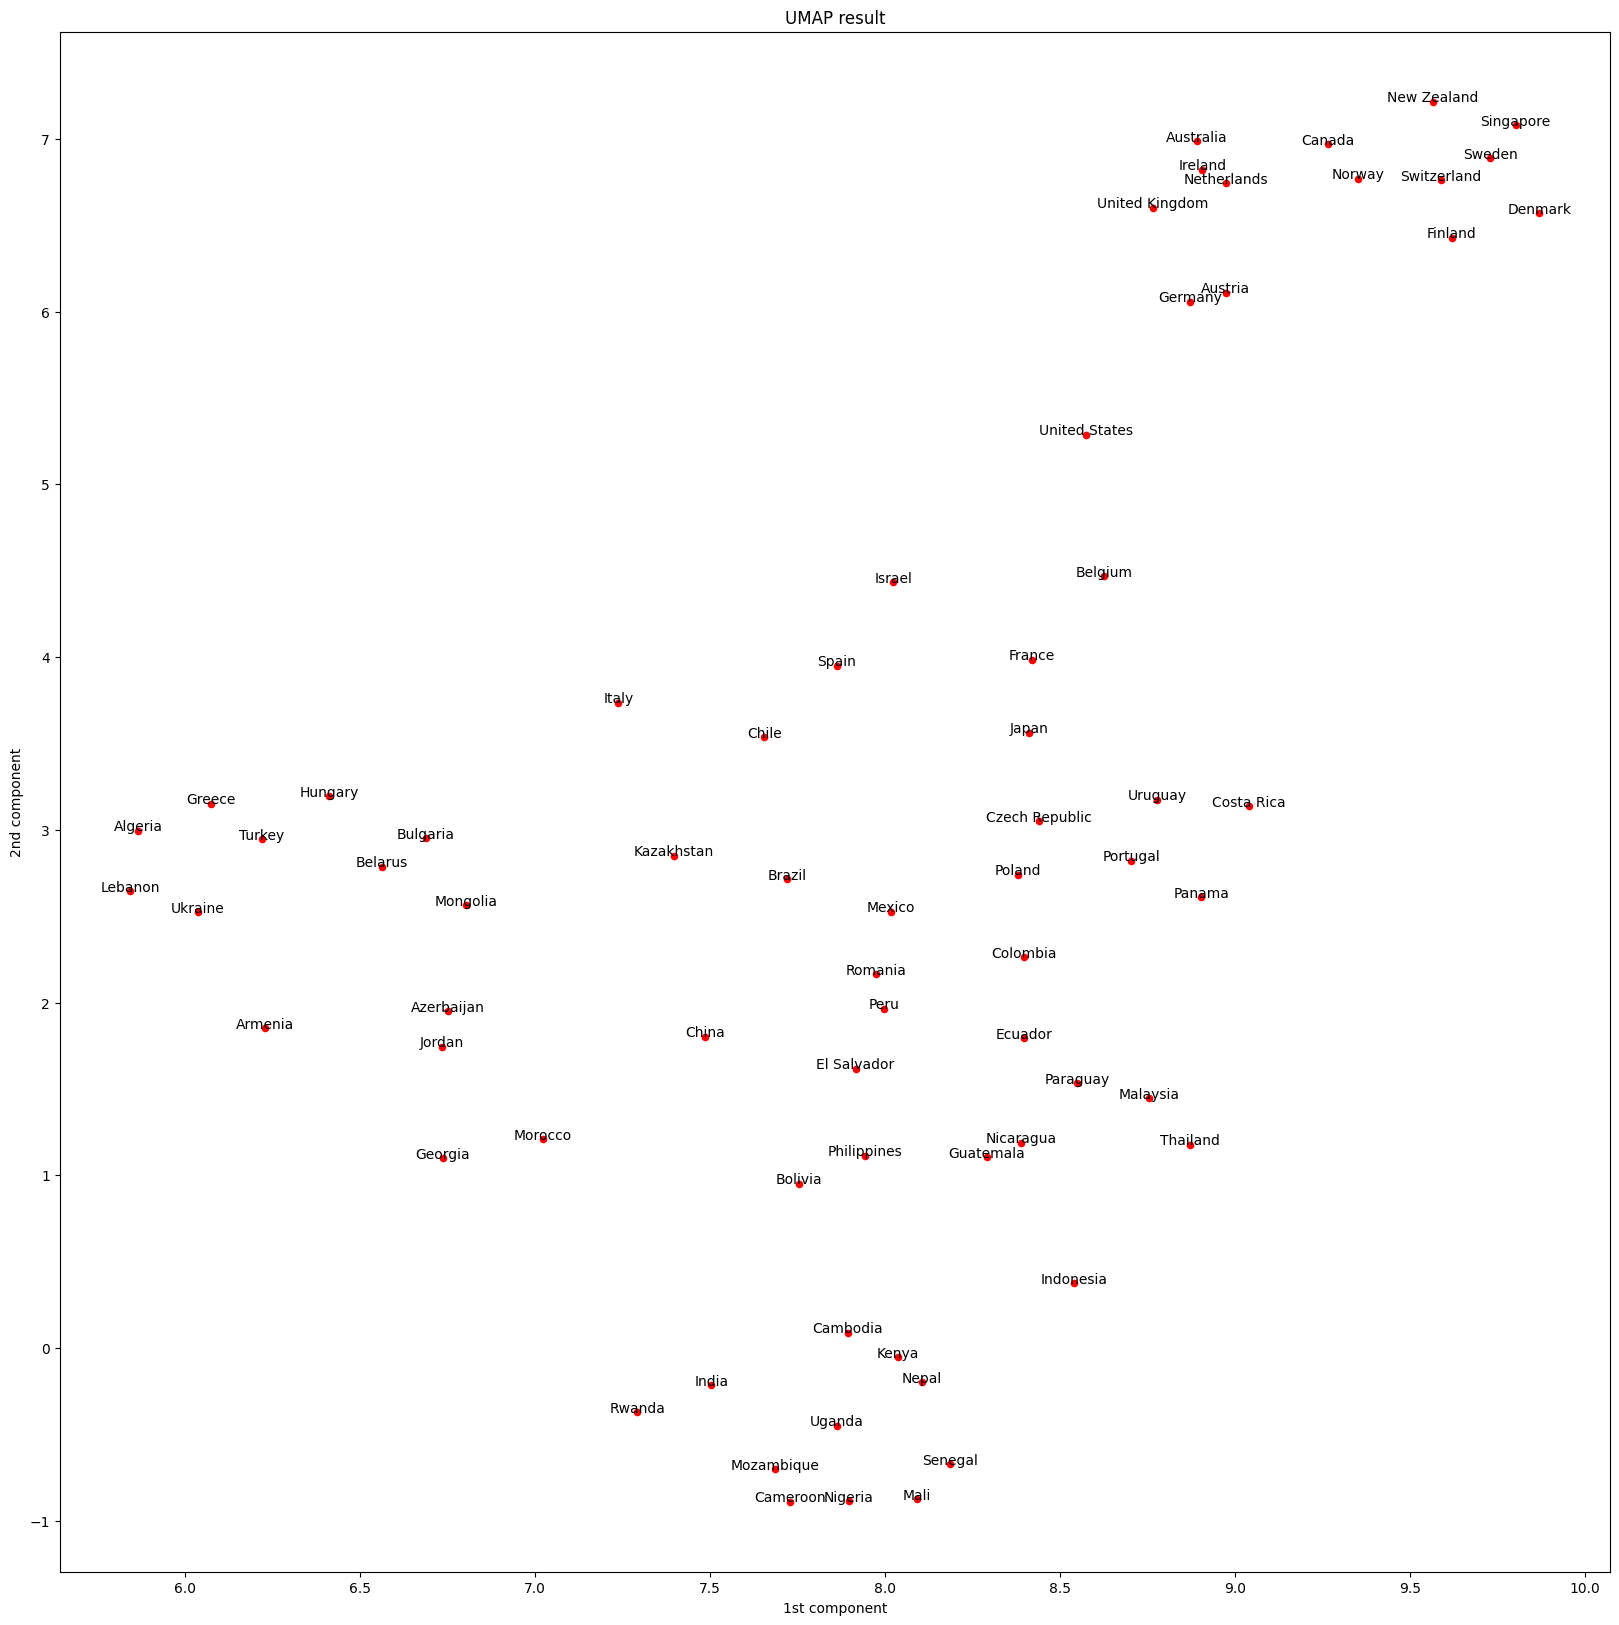

In [105]:
happ = happiness.drop('Overall rank', axis=1)

scaled = preprocessing.scale(happ)
model = umap.UMAP(n_components=2)
umap_df = model.fit_transform(scaled)


plt.figure(figsize=(20,20))
x = umap_df[:, 0]
y = umap_df[:, 1]
plt.scatter(x, y, c='r', s=20)
plt.title('UMAP result')
plt.xlabel('1st component')
plt.ylabel('2nd component')
labels = list(happ.index)
for i, txt in enumerate(labels):
 plt.annotate(txt, (x[i], y[i]), ha='center', size=10)
plt.show()

In [106]:
happiness_by_cluster = pd.concat([df_merged, happiness], axis=1)
happiness_by_cluster.sort_values(by = ['Overall rank'])


death rate  gdp growth  immunization     import  \
Finland                  9.800    1.220754          96.0  39.725748   
Denmark                  9.300    2.114664          96.0  51.607469   
Norway                   7.600    0.745798          97.0  34.781298   
Netherlands              8.800    1.955588          94.0  72.732964   
Switzerland              7.900    1.210992          95.0  53.683832   
...                        ...         ...           ...        ...   
India                    7.265    4.041554          95.0  20.957385   
Rwanda                   5.123    9.460682          96.0  36.122585   
Iran, Islamic Rep.       4.842   -6.784224          99.0  30.906547   
Korea, Rep.              5.700    2.243978          98.0  36.481278   
Russian Federation      13.300    2.032983          98.0  20.907981   

                    inflation  labor_women  labor growth  \
Finland              1.495412    47.937108      0.002303   
Denmark              0.742103    47.045304      0.013211   
Norway              -0.472598    48.103378      0.009379   
Netherlands          3.032734    46.605803      0.017118   
Switzerland         -0.105745    46.794373      0.003131   
...                       ...          ...           ...   
India                3.566001    21.213170      0.019597   
Rwanda               2.501055    51.831778      0.029604   
Iran, Islamic Rep.  36.910083    19.272582      0.003416   
Korea, Rep.         -0.839325    42.378667      0.007927   
Russian Federation   3.084174    48.686413     -0.013733   

                    military_expenditure  urban_population growth  \
Finland                         1.347711                   85.446   
Denmark                         1.301455                   87.994   
Norway                          1.853082                   82.616   
Netherlands                     1.322930                   91.876   
Switzerland                     0.699251                   73.849   
...                                  ...                      ...   
India                           2.519121                   34.472   
Rwanda                          1.239645                   17.313   
Iran, Islamic Rep.              2.100567                   75.391   
Korea, Rep.                     2.673128                   81.430   
Russian Federation              3.832116                   74.587   

                    unemployment  ...  clusters  ClusterID  Overall rank  \
Finland                    6.690  ...         0          0           1.0   
Denmark                    5.020  ...         0          0           2.0   
Norway                     3.690  ...         0          0           3.0   
Netherlands                3.380  ...         0          1           5.0   
Switzerland                4.390  ...         1          1           6.0   
...                          ...  ...       ...        ...           ...   
India                      5.270  ...         1          2         140.0   
Rwanda                     1.098  ...         1          2         152.0   
Iran, Islamic Rep.        10.740  ...         2          0           NaN   
Korea, Rep.                3.750  ...         2          0           NaN   
Russian Federation         4.500  ...         0          0           NaN   

                    Score  GDP per capita  Social support  \
Finland             7.769           1.340           1.587   
Denmark             7.600           1.383           1.573   
Norway              7.554           1.488           1.582   
Netherlands         7.488           1.396           1.522   
Switzerland         7.480           1.452           1.526   
...                   ...             ...             ...   
India               4.015           0.755           0.765   
Rwanda              3.334           0.359           0.711   
Iran, Islamic Rep.    NaN             NaN             NaN   
Korea, Rep.           NaN             NaN             NaN   
Russian Federation    NaN        

In [107]:
Developing = happiness_by_cluster.loc[happiness_by_cluster['ClusterID'] == 1].sort_values(by = ['Overall rank'])
Developing

death rate  gdp growth  immunization      import  inflation  \
Netherlands          8.800    1.955588          94.0   72.732964   3.032734   
Switzerland          7.900    1.210992          95.0   53.683832  -0.105745   
Ireland              6.300    4.917007          91.0  124.407132   4.224789   
Belgium              9.500    2.149560          96.0   81.532276   1.754071   
Czech Republic      10.500    3.029478          92.0   67.904727   3.889772   
Singapore            5.000    1.345217          95.0  147.625337  -0.624194   
Hungary             13.300    4.554063          99.0   79.460287   4.765537   
Malaysia             5.170    4.439471          97.0   57.734789   0.074344   
Belarus             12.800    1.400000          98.0   65.755822   8.626733   
Mongolia             6.335    5.602244          98.0   65.179281   9.972213   
Bulgaria            15.500    4.037592          93.0   60.706087   5.236819   
Armenia              9.835    7.600000          95.0   54.763353   1.065623   
Georgia             12.791    4.982350          99.0   63.780875   5.192391   

                labor_women  labor growth  military_expenditure  \
Netherlands       46.605803      0.017118              1.322930   
Switzerland       46.794373      0.003131              0.699251   
Ireland           45.846162      0.019854              0.279145   
Belgium           46.641349      0.009096              0.893043   
Czech Republic    44.587489     -0.000655              1.160878   
Singapore         41.810944      0.012999              2.865347   
Hungary           45.321851      0.005817              1.254386   
Malaysia          38.605420      0.023331              1.033023   
Belarus           49.267944     -0.006870              1.226168   
Mongolia          45.141616      0.029002              0.707610   
Bulgaria          46.123701      0.014533              3.148476   
Armenia           45.135644      0.017759              4.768968   
Georgia           46.274374     -0.020224              1.749924   

                urban_population growth  unemployment  ...  clusters  \
Netherlands                      91.876      3.380000  ...         0   
Switzerland                      73.849      4.390000  ...         1   
Ireland                          63.405      4.950000  ...         0   
Belgium                          98.041      5.360000  ...         0   
Czech Republic                   73.921      2.010000  ...         0   
Singapore                       100.000      3.100000  ...         0   
Hungary                          71.644      3.420000  ...         0   
Malaysia                         76.607      3.260000  ...         0   
Belarus                          79.044      4.160000  ...         1   
Mongolia                         68.543      5.439000  ...         0   
Bulgaria                         75.347      4.230000  ...         1   
Armenia                          63.219     18.299999  ...         0   
Georgia                          59.039     11.570000  ...         0   

                ClusterID  Overall rank  Score  GDP per capita  \
Netherlands             1           5.0  7.488           1.396   
Switzerland             1           6.0  7.480           1.452   
Ireland                 1          16.0  7.021           1.499   
Belgium                 1          18.0  6.923           1.356   
Czech Republic          1          20.0  6.852           1.269   
Singapore               1          34.0  6.262           1.572   
Hungary                 1          62.0  5.758           1.201   
Malaysia                1          80.0  5.339           1.221   
Belarus                 1          81.0  5.323           1.067   
Mongolia                1          83.0  5.285           0.948   
Bulgaria                1          97.0  5.011           1.092   
Armenia                 1         116.0  4.559           0.850   
Georgia                 1         119.0  4.519           0.886   

                Social support  Heal

In [108]:
Developed = happiness_by_cluster.loc[happiness_by_cluster['ClusterID'] == 0].sort_values(by = ['Overall rank'])
Developed

death rate  gdp growth  immunization     import  \
Finland                  9.800    1.220754          96.0  39.725748   
Denmark                  9.300    2.114664          96.0  51.607469   
Norway                   7.600    0.745798          97.0  34.781298   
Sweden                   8.600    1.986196          97.0  43.624618   
New Zealand              6.870    1.633933          92.0  27.104802   
Canada                   7.600    1.879592          90.0  33.503829   
Australia                6.700    2.113149          95.0  21.675312   
Costa Rica               5.152    2.256315          95.0  32.132127   
Israel                   5.100    3.773590          98.0  27.321924   
United Kingdom           9.000    1.671944          91.0  31.922291   
Germany                 11.300    1.055508          97.0  40.975427   
United States            8.700    2.161177          90.0  14.538130   
Mexico                   6.082   -0.176599          73.0  39.066640   
France                   9.100    1.842972          90.0  32.549418   
Chile                    6.254    0.942005          95.0  28.851351   
Spain                    8.800    2.085191          98.0  32.024671   
Panama                   5.108    2.979715          97.0  43.774347   
Brazil                   6.531    1.411153          91.0  14.350575   
Uruguay                  9.473    0.350447          96.0  21.856853   
El Salvador              7.070    2.382581          82.0  46.300991   
Italy                   10.500    0.410278          94.0  28.320281   
Colombia                 5.630    3.281117          95.0  21.669012   
Ecuador                  5.121    0.012105          83.0  23.028454   
Japan                   11.100    0.270305          96.0  17.396052   
Bolivia                  6.762    2.216706          79.0  31.430044   
Paraguay                 5.539   -0.401855          87.0  35.162269   
Peru                     5.579    2.203975          85.0  22.893311   
Portugal                10.900    2.682760          99.0  43.056296   
Turkey                   5.443    0.889585          97.0  30.014526   
Greece                  11.700    1.803595          97.0  41.858679   
Algeria                  4.716    1.000000          80.0  29.128253   
Morocco                  5.057    2.607935          99.0  47.908581   
Lebanon                  4.457   -7.157247          82.0  40.713036   
China                    7.100    5.949714          99.0  17.480104   
Jordan                   3.889    1.955466          87.0  49.353016   
Ukraine                 14.700    3.199504          93.0  49.279543   
Iran, Islamic Rep.       4.842   -6.784224          99.0  30.906547   
Korea, Rep.              5.700    2.243978          98.0  36.481278   
Russian Federation      13.300    2.032983          98.0  20.907981   

                    inflation  labor_women  labor growth  \
Finland              1.495412    47.937108      0.002303   
Denmark              0.742103    47.045304      0.013211   
Norway              -0.472598    48.103378      0.009379   
Sweden               2.546875    47.676672      0.010280   
New Zealand          3.659991    47.969628      0.012136   
Canada               1.475198    47.381804      0.019197   
Australia            3.418786    46.711028      0.019212   
Costa Rica           2.178618    40.758018      0.047759   
Israel               1.884951    47.718404      0.012975   
United Kingdom       2.015103    47.155043      0.007673   
Germany              2.055057    46.577786      0.010633   
United States        1.785152    46.299590      0.010453   
Mexico               4.135024    38.439186      0.025475   
France               1.278592    48.393166     -0.002243   
Chile                1.949877    42.439703      0.010763   
Spain                1.304657    46.657908      0.008239   
Panama               0.179927    41.302552      0.045660   
Brazil               4.280505    43.837288      0.017556   
Uruguay              8.522967    46.266

In [109]:
Under_developed = happiness_by_cluster.loc[happiness_by_cluster['ClusterID'] == 2].sort_values(by = ['Overall rank'])
Under_developed

death rate  gdp growth  immunization     import  inflation  \
Austria           9.400    1.491211          94.0  52.036021   1.622589   
Guatemala         4.720    3.866857          90.0  27.947399   3.680606   
Poland           10.800    4.744950          93.0  50.639478   3.193978   
Nicaragua         5.075   -3.674795          99.0  49.525862   5.511692   
Romania          13.400    4.188260          90.0  44.504573   6.795538   
Thailand          7.786    2.266434          96.0  50.144164   0.946225   
Kazakhstan        7.190    4.500000          99.0  28.419629   7.633286   
Philippines       5.920    6.118526          67.0  40.458922   0.697076   
Nigeria          11.630    2.208429          54.0  19.802951  10.384779   
Azerbaijan        5.600    2.500000          98.0  36.767518  -0.241308   
Indonesia         6.510    5.018160          88.0  19.002476   1.598798   
Cameroon          9.059    3.475060          60.0  23.528423   1.169772   
Nepal             6.322    6.657055          92.0  41.469590   4.691156   
Cambodia          5.992    7.054107          84.0  62.465227   3.235372   
Senegal           5.596    4.402407          90.0  38.520532   1.864955   
Kenya             5.393    4.981133          89.0  20.295931   4.590191   
Mozambique        8.208    2.314606          87.0  75.077972   5.055708   
Mali              9.412    4.756161          70.0  37.953412   1.930542   
Uganda            6.381    6.438745          87.0  22.251996   3.000012   
India             7.265    4.041554          95.0  20.957385   3.566001   
Rwanda            5.123    9.460682          96.0  36.122585   2.501055   

             labor_women  labor growth  military_expenditure  \
Austria        46.660825      0.003544              0.727409   
Guatemala      33.440351      0.026011              0.465832   
Poland         44.567714     -0.004291              1.975746   
Nicaragua      38.286838      0.014296              0.606876   
Romania        42.897541     -0.002825              1.842512   
Thailand       45.710611     -0.006438              1.352708   
Kazakhstan     48.123254      0.006305              1.062379   
Philippines    39.285656      0.028854              0.920263   
Nigeria        44.402957      0.028168              0.459171   
Azerbaijan     48.723135      0.002425              3.873412   
Indonesia      39.491377      0.024073              0.804335   
Cameroon       46.855725      0.030334              1.086759   
Nepal          55.822213      0.030447              1.376595   
Cambodia       48.932465      0.014689              2.228561   
Senegal        40.197560      0.030431              1.513479   
Kenya          49.464803      0.031054              1.167691   
Mozambique     52.349259      0.034528              1.419987   
Mali           42.630863      0.034238              2.713526   
Uganda         49.471584      0.042840              1.769798   
India          21.213170      0.019597              2.519121   
Rwanda         51.831778      0.029604              1.239645   

             urban_population growth  unemployment  ...  clusters  ClusterID  \
Austria                       58.515         4.490  ...         1          2   
Guatemala                     51.439         2.190  ...         1          2   
Poland                        60.037         3.280  ...         0          2   
Nicaragua                     58.760         5.211  ...         1          2   
Romania                       54.084         3.910  ...         0          2   
Thailand                      50.692         0.720  ...         1          2   
Kazakhstan                    57.540         4.800  ...         0          2   
Philippines                   47.149         2.240  ...         1          2   
Nigeria                       51.157         8.530  ...         1          2   
Azerbaijan                    56.031         4.850  ...         0          2   
Indonesia                     55.985         3.620  ...         1        

In [110]:
#best by cluster
best = happiness_by_cluster.sort_values(by = ['Overall rank'])
top_5 = best.head(5)
top_10 = best.head(10)
top_15 = best.head(15)
top_25 = best.head(25)

In [111]:
developed_best = {'top_5': len(top_5[(top_5['ClusterID'] == 0)]),
                  'top_10': len(top_10[top_10['ClusterID'] == 0]),
                  'top_15': len(top_15[top_15['ClusterID'] == 0]),
                  'top_25': len(top_25[top_25['ClusterID'] == 0])}

developing_best = {'top_5': len(top_5[(top_5['ClusterID'] == 1)]),
                  'top_10': len(top_10[top_10['ClusterID'] == 1]),
                  'top_15': len(top_15[top_15['ClusterID'] == 1]),
                  'top_25': len(top_25[top_25['ClusterID'] == 1])}

under_developed_best = {'top_5': len(top_5[(top_5['ClusterID'] == 2)]),
                  'top_10': len(top_10[top_10['ClusterID'] == 2]),
                  'top_15': len(top_15[top_15['ClusterID'] == 2]),
                  'top_25': len(top_25[top_25['ClusterID'] == 2])}

idxes = list(developed_best.keys())
vals_developed = list(developed_best.values())
vals_developing = list(developing_best.values())
vals_under_developed = list(under_developed_best.values())

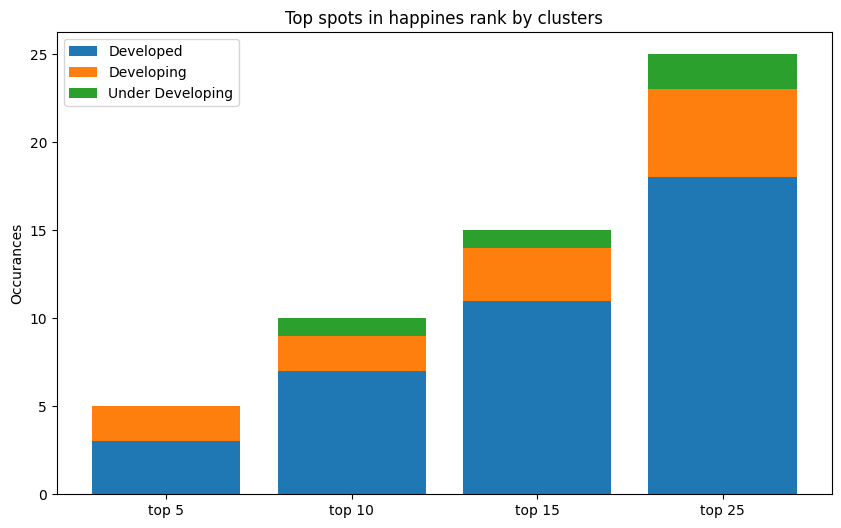

In [114]:
fig = plt.figure(figsize = (10,6))
p1 = plt.bar(idxes, vals_developed, label = 'Developed')
p2 = plt.bar(idxes, vals_developing, bottom = vals_developed, label = 'Developing')
p3 = plt.bar(idxes, vals_under_developed, bottom=np.array(vals_developed)+np.array(vals_developing),label = 'Under Developing')

plt.ylabel('Occurances')
plt.title('Top spots in happines rank by clusters')
plt.xticks(idxes, ('top 5', 'top 10', 'top 15', 'top 25'))
plt.legend()
plt.show()

In [113]:
#worst by custer
bottom_5 = best.tail(5)
bottom_10 = best.tail(10)
bottom_15 = best.tail(15)
bottom_25 = best.tail(25)

In [115]:
developed_worst = {'top_5': len(bottom_5[(bottom_5['ClusterID'] == 0)]),
                  'top_10': len(bottom_10[bottom_10['ClusterID'] == 0]),
                  'top_15': len(bottom_15[bottom_15['ClusterID'] == 0]),
                  'top_25': len(bottom_25[bottom_25['ClusterID'] == 0])}

developing_worst = {'top_5': len(bottom_5[(bottom_5['ClusterID'] == 1)]),
                  'top_10': len(bottom_10[bottom_10['ClusterID'] == 1]),
                  'top_15': len(bottom_15[bottom_15['ClusterID'] == 1]),
                  'top_25': len(bottom_25[bottom_25['ClusterID'] == 1])}

under_developed_worst = {'top_5': len(bottom_5[(bottom_5['ClusterID'] == 2)]),
                  'top_10': len(bottom_10[bottom_10['ClusterID'] == 2]),
                  'top_15': len(bottom_15[bottom_15['ClusterID'] == 2]),
                  'top_25': len(bottom_25[bottom_25['ClusterID'] == 2])}

vals_developed_worst = list(developed_worst.values())
vals_developing_worst = list(developing_worst.values())
vals_under_developed_worst = list(under_developed_worst.values())

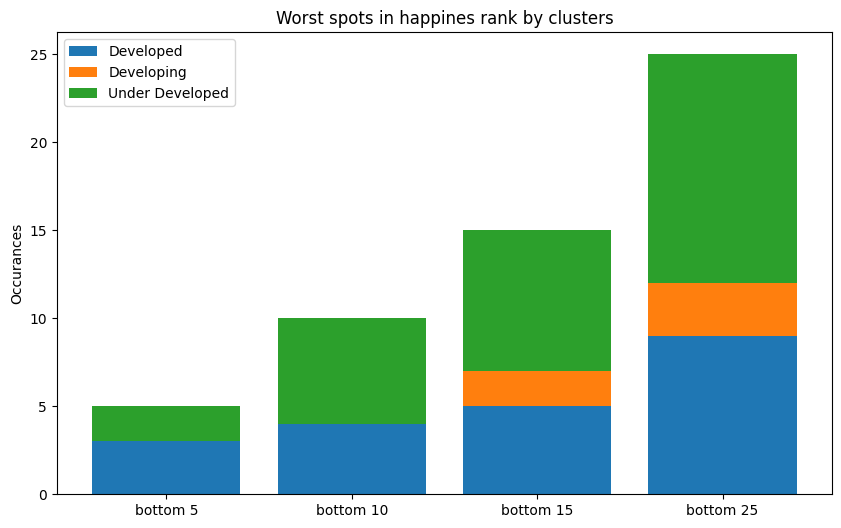

In [116]:
fig = plt.figure(figsize = (10,6))
p1 = plt.bar(idxes, vals_developed_worst, label = 'Developed')
p2 = plt.bar(idxes, vals_developing_worst, bottom = vals_developed_worst, label = 'Developing')
p3 = plt.bar(idxes, vals_under_developed_worst, bottom=np.array(vals_developed_worst)+np.array(vals_developing_worst),label = 'Under Developed')

plt.ylabel('Occurances')
plt.title('Worst spots in happines rank by clusters')
plt.xticks(idxes, ('bottom 5', 'bottom 10', 'bottom 15', 'bottom 25'))
plt.legend()
plt.show()

In [117]:
index_developed = Developed.index
score = Developed['Score']
Developed['Score'].mean()

6.287416666666667

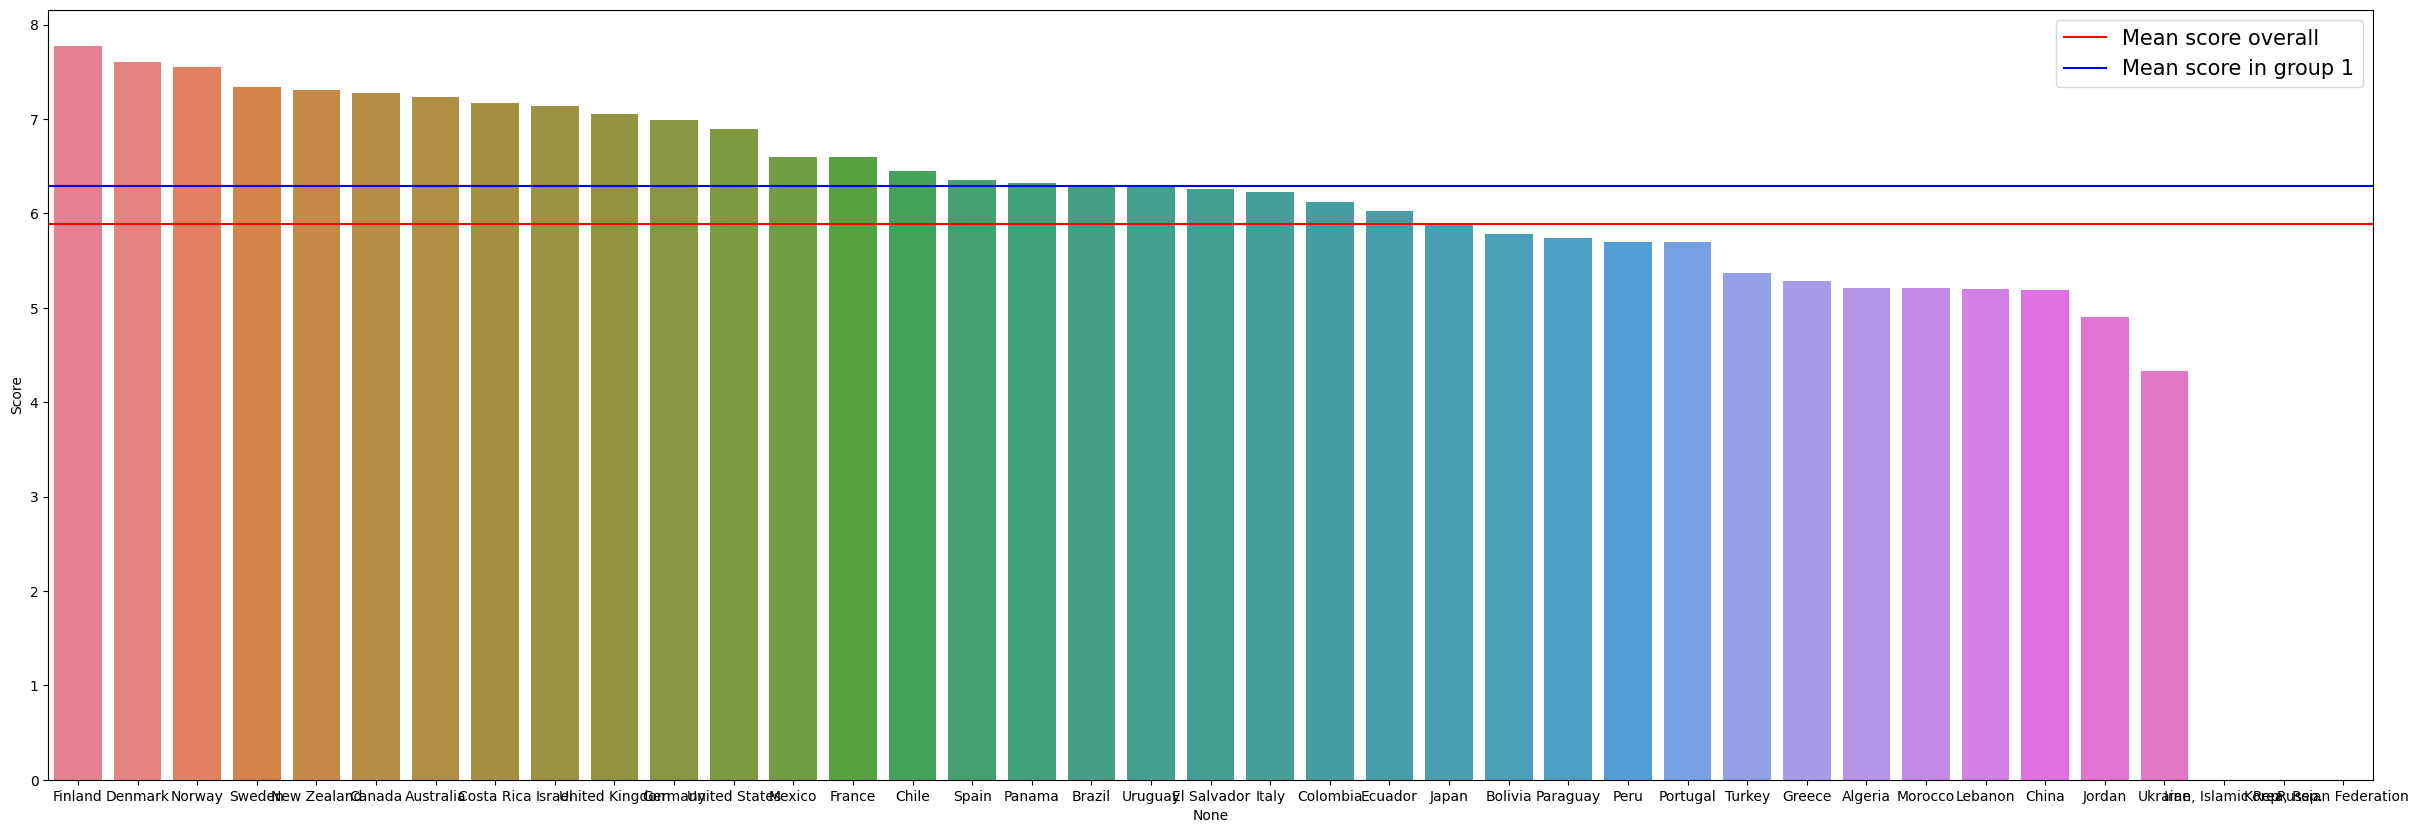

In [120]:
# Developed = Developed.drop('Angola', 0)
plt.figure(figsize=(30, 10))
graph = sns.barplot(x = index_developed , y = score, hue = index_developed, legend = False)
graph.axhline(5.886, c='r', label='Mean score overall')
graph.axhline(Developed['Score'].mean(), c='b', label='Mean score in group 1')
graph.legend(fontsize=15)

In [126]:
index_developing = Developing.index
score = Developing['Score']
Developing['Score'].mean()

5.986153846153846

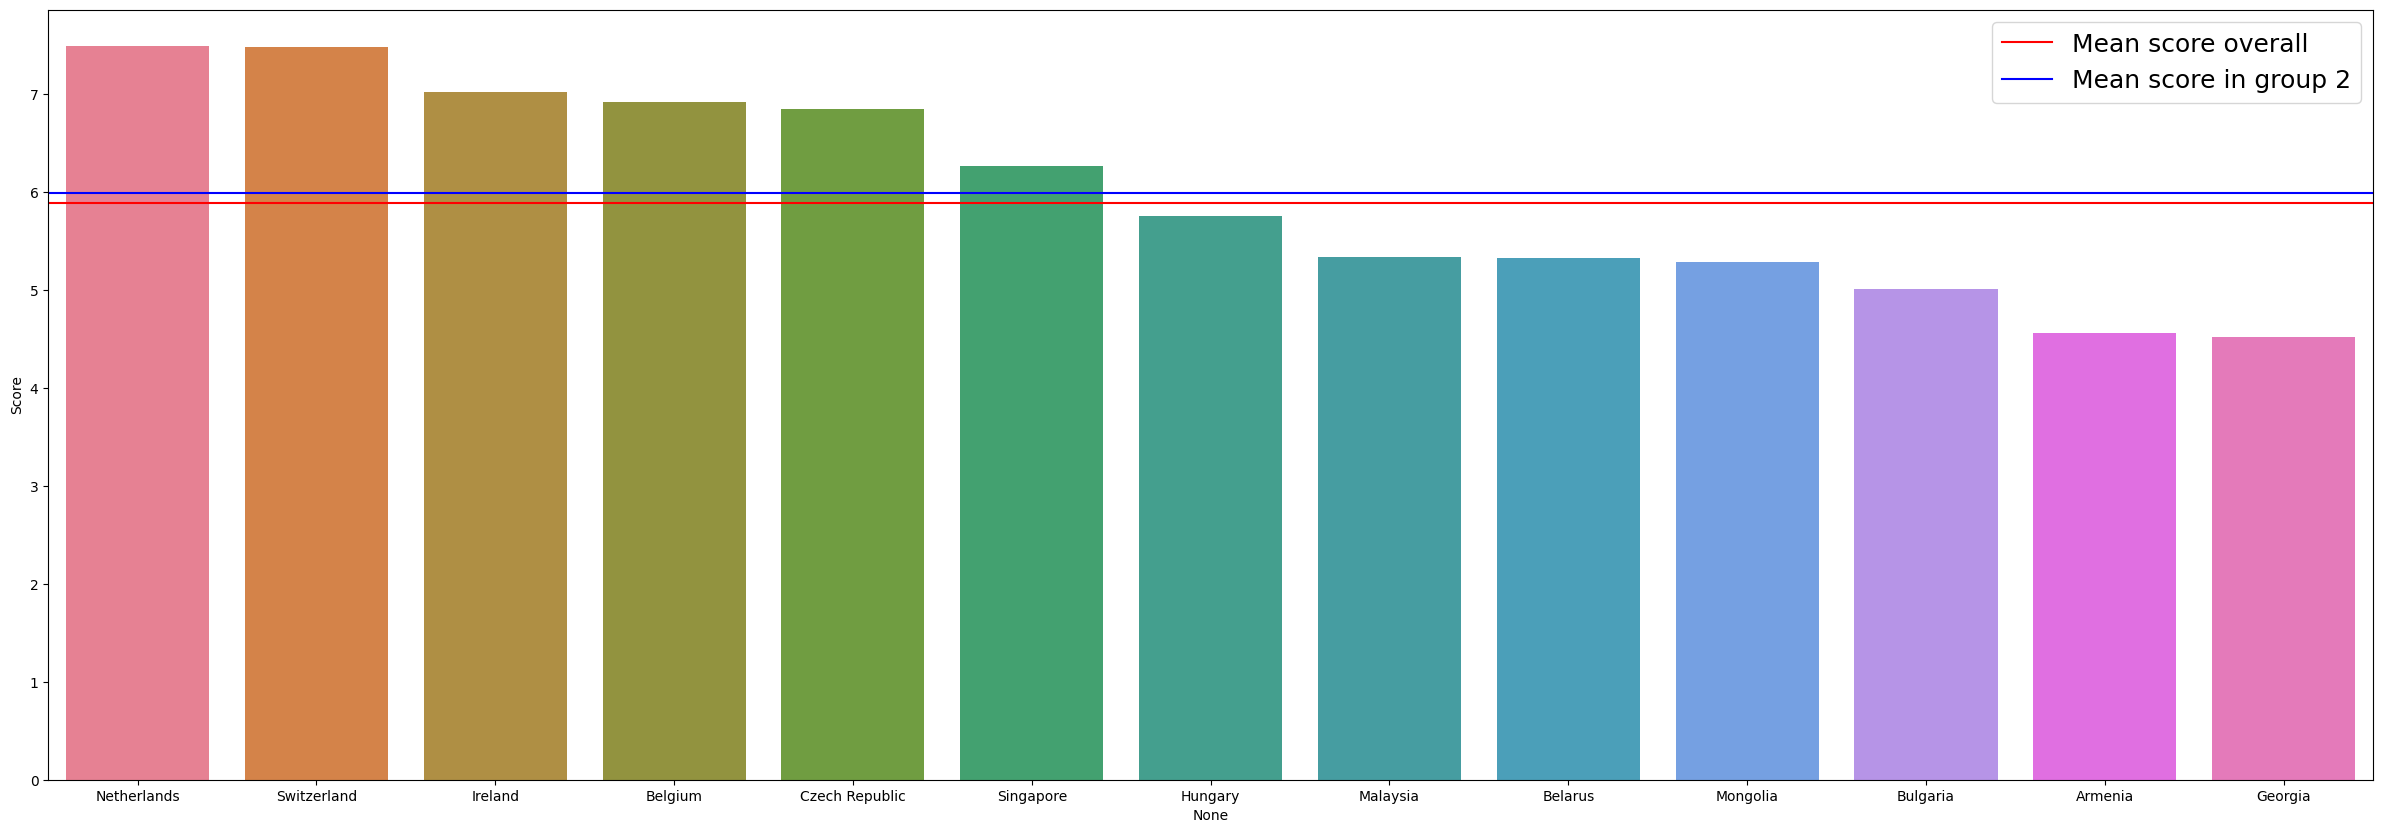

In [127]:
plt.figure(figsize=(30, 10))
graph = sns.barplot(x = index_developing , y = score,  hue = index_developing, legend = False)
graph.axhline(5.886, c='r', label='Mean score overall')
graph.axhline(Developing['Score'].mean(), c='b', label='Mean score in group 2')
graph.legend(fontsize=18)

In [128]:
index_under = Under_developed.index
score = Under_developed['Score']
Under_developed['Score'].mean()

5.209190476190477

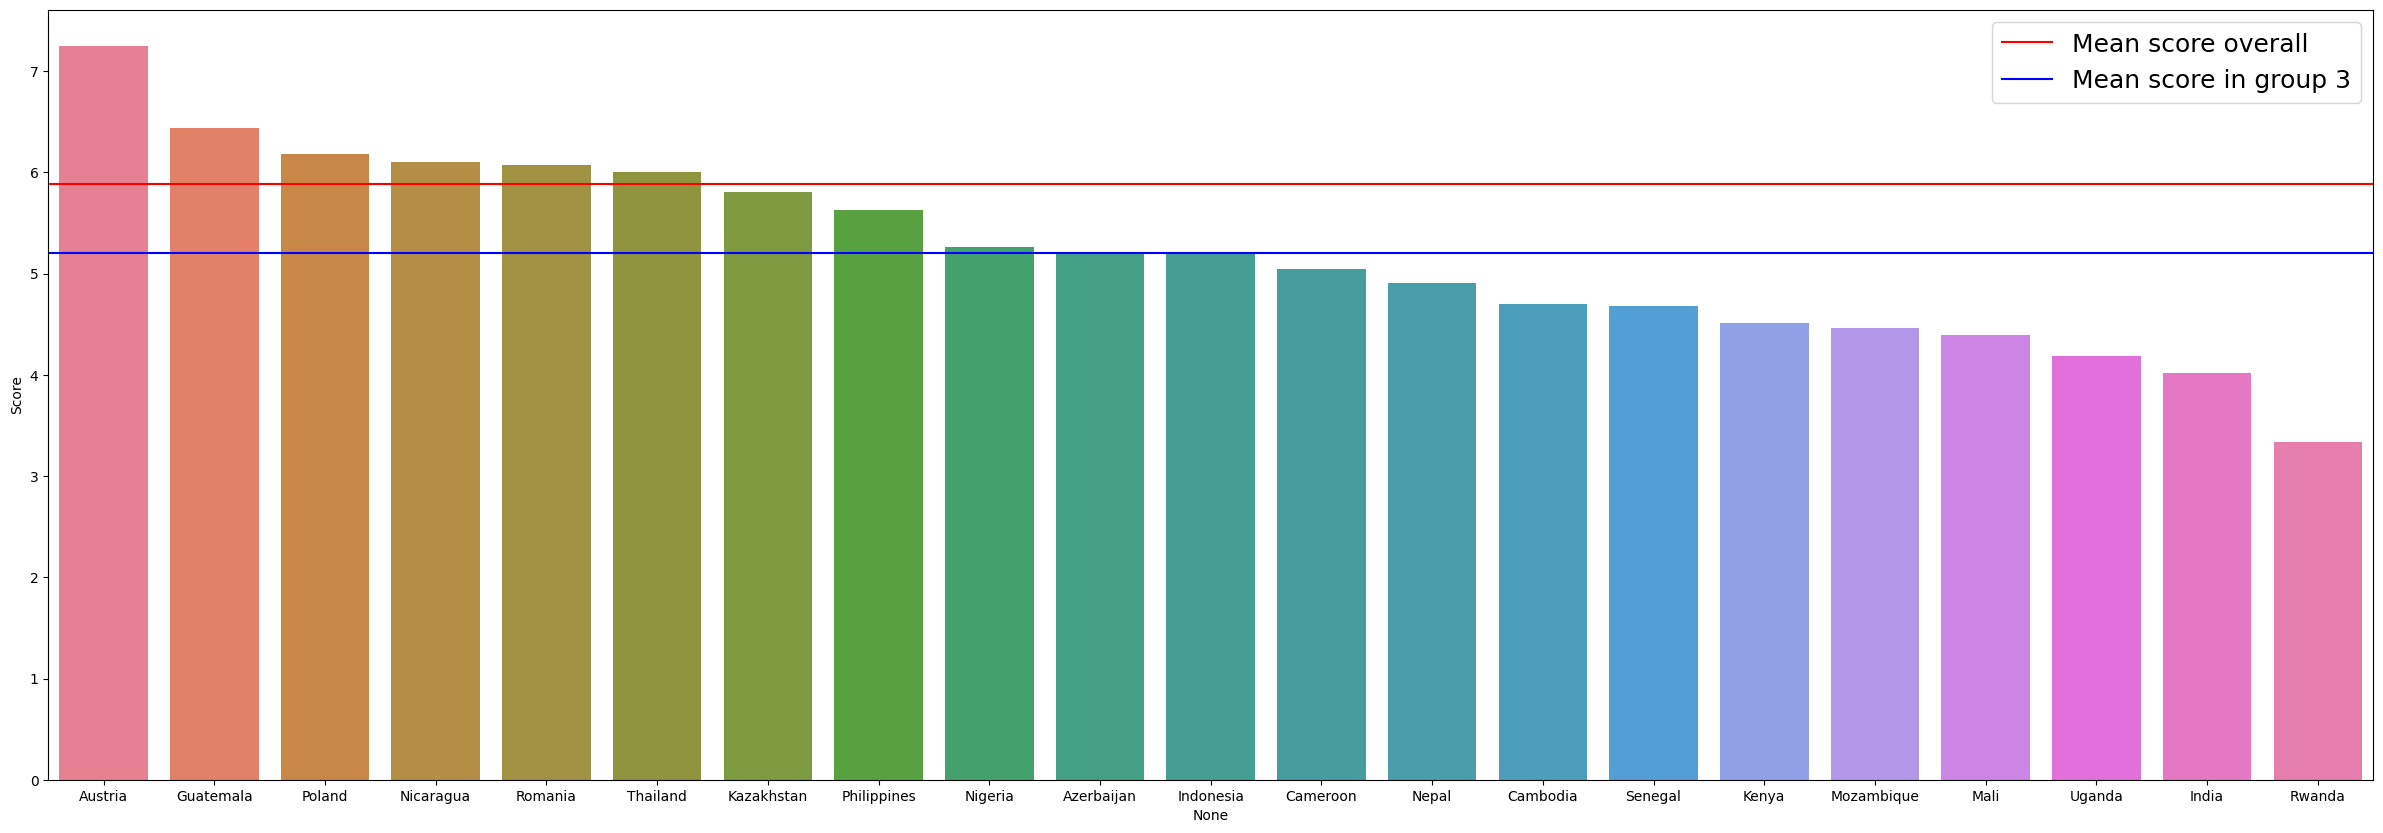

In [129]:
plt.figure(figsize=(30, 10))
graph =sns.barplot(x = index_under , y = score, hue = index_under, legend = False)
graph.axhline(5.886, c='r', label='Mean score overall')
graph.axhline(Under_developed['Score'].mean(), c='b', label='Mean score in group 3')
graph.legend(fontsize=18)